# Fashion Products Recommendation System
Recommendation System Project

------------------------------------------------

In [1]:
#!rm -r /content/sample_data

# Import Libraries

In [3]:
# Import necessary libraries
import tensorflow
import cv2
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from numpy.linalg import norm
from tqdm import tqdm
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

# Loading the data from Kaggle

In [8]:
# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d hiteshsuthar101/myntra-fashion-product-dataset

100% 2.89G/2.90G [00:25<00:00, 160MB/s]
100% 2.90G/2.90G [00:25<00:00, 121MB/s]


In [10]:
!unzip /content/myntra-fashion-product-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/Images/5499.jpg  
  inflating: Images/Images/55.jpg    
  inflating: Images/Images/550.jpg   
  inflating: Images/Images/5500.jpg  
  inflating: Images/Images/5501.jpg  
  inflating: Images/Images/5502.jpg  
  inflating: Images/Images/5503.jpg  
  inflating: Images/Images/5504.jpg  
  inflating: Images/Images/5505.jpg  
  inflating: Images/Images/5506.jpg  
  inflating: Images/Images/5507.jpg  
  inflating: Images/Images/5508.jpg  
  inflating: Images/Images/5509.jpg  
  inflating: Images/Images/551.jpg   
  inflating: Images/Images/5510.jpg  
  inflating: Images/Images/5511.jpg  
  inflating: Images/Images/5512.jpg  
  inflating: Images/Images/5513.jpg  
  inflating: Images/Images/5514.jpg  
  inflating: Images/Images/5515.jpg  
  inflating: Images/Images/5516.jpg  
  inflating: Images/Images/5517.jpg  
  inflating: Images/Images/5518.jpg  
  inflating: Images/Images/5519.jpg  
  inflating: Images/Images/552.jpg   

# Data Preprocessing

In [11]:
# Read the data from the CSV file
data = pd.read_csv('/content/Fashion Dataset.csv')

In [12]:
# Set the path to the directory containing the images
image_directory = '/content/Images/Images'

# Get a list of all image filenames in the directory
all_images = os.listdir(image_directory)

# Split the images into train, test, and validation sets
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Print the number of images in each set
print('Number of training images:', len(train_images))
print('Number of test images:', len(test_images))

Number of training images: 11584
Number of test images: 2897


# Trainig the Model

##Extract The Features

In [13]:
def extract_features(img_path,model):

    """
    Extract features from an image using a pre-trained model.

    Parameters:
    - img_path: Path to the image file.
    - model: Pre-trained model.

    Returns:
    - normalized_result: Normalized feature vector.
    """

    try:
        img = image.load_img(img_path,target_size=(224,224))
        img_array = image.img_to_array(img)
        expanded_img_array = np.expand_dims(img_array, axis=0)
        preprocessed_img = preprocess_input(expanded_img_array)
        result = model.predict(preprocessed_img).flatten()
        normalized_result = result / norm(result)

        return normalized_result

    except Exception as e:
        print(f"Error processing file '{file}': {str(e)}")
        return None

In [14]:
# Load ResNet50 model for feature extraction
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

# Create a sequential model with GlobalMaxPooling2D layer
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

# Prepare filenames for training images
filenames = []
for file in train_images:
    filenames.append(os.path.join('/content/Images/Images',file))

# Extract features from training images and save to pickle files
feature_list = []
for file in tqdm(filenames):
    features = extract_features(file, model)

    if features is not None:
        feature_list.append(features)

pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

94765736/94765736 [==============================] - 0s 0us/step


  0%|          | 0/11584 [00:00<?, ?it/s]

1/1 [==============================] - 9s 9s/step


  0%|          | 1/11584 [00:08<28:03:43,  8.72s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 2/11584 [00:08<11:44:41,  3.65s/it]

1/1 [==============================] - 0s 22ms/step


  0%|          | 4/11584 [00:08<4:32:51,  1.41s/it] 

1/1 [==============================] - 0s 21ms/step


  0%|          | 6/11584 [00:09<2:31:21,  1.27it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 8/11584 [00:09<1:37:10,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 10/11584 [00:09<1:08:06,  2.83it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 12/11584 [00:09<50:29,  3.82it/s]  

1/1 [==============================] - 0s 25ms/step


  0%|          | 14/11584 [00:09<39:15,  4.91it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 16/11584 [00:10<31:53,  6.05it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 18/11584 [00:10<27:35,  6.99it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 20/11584 [00:10<24:06,  7.99it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 22/11584 [00:10<21:53,  8.80it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 24/11584 [00:10<19:42,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 26/11584 [00:10<18:53, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 28/11584 [00:11<18:44, 10.28it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 30/11584 [00:11<18:05, 10.65it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 32/11584 [00:11<19:51,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 34/11584 [00:11<20:44,  9.28it/s]

1/1 [==============================] - 0s 54ms/step


  0%|          | 35/11584 [00:11<22:00,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 36/11584 [00:12<22:27,  8.57it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 37/11584 [00:12<22:19,  8.62it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 39/11584 [00:12<19:55,  9.65it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 41/11584 [00:12<18:35, 10.35it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 43/11584 [00:12<17:52, 10.76it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 45/11584 [00:12<17:48, 10.80it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 47/11584 [00:13<17:56, 10.72it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 49/11584 [00:13<17:40, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 51/11584 [00:13<18:09, 10.59it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 53/11584 [00:13<19:38,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 54/11584 [00:13<20:17,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 55/11584 [00:13<20:28,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 56/11584 [00:13<21:52,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 57/11584 [00:14<22:30,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 58/11584 [00:14<22:28,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 59/11584 [00:14<21:41,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 60/11584 [00:14<22:58,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 61/11584 [00:14<23:06,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 62/11584 [00:14<24:01,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 63/11584 [00:14<25:05,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 64/11584 [00:15<24:59,  7.68it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 65/11584 [00:15<24:47,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 66/11584 [00:15<24:58,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 67/11584 [00:15<24:09,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 68/11584 [00:15<23:05,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 69/11584 [00:15<22:11,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 70/11584 [00:15<22:36,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 71/11584 [00:15<21:51,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 72/11584 [00:15<22:18,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 73/11584 [00:16<23:11,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 74/11584 [00:16<22:52,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 75/11584 [00:16<22:07,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 76/11584 [00:16<22:51,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 77/11584 [00:16<22:40,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 78/11584 [00:16<22:39,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 79/11584 [00:16<22:38,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 80/11584 [00:16<24:15,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 81/11584 [00:17<24:12,  7.92it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 83/11584 [00:17<20:52,  9.18it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 85/11584 [00:17<19:25,  9.86it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 86/11584 [00:17<19:22,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 88/11584 [00:17<18:01, 10.63it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 90/11584 [00:17<18:01, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 92/11584 [00:18<18:10, 10.53it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 94/11584 [00:18<18:27, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 96/11584 [00:18<17:42, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 98/11584 [00:18<17:04, 11.21it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 100/11584 [00:18<17:46, 10.77it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 102/11584 [00:18<17:49, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 104/11584 [00:19<17:29, 10.94it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 106/11584 [00:19<17:30, 10.92it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 108/11584 [00:19<17:31, 10.91it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 110/11584 [00:19<17:50, 10.72it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 112/11584 [00:19<18:08, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 114/11584 [00:20<18:01, 10.61it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 116/11584 [00:20<17:57, 10.64it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 118/11584 [00:20<18:08, 10.54it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 120/11584 [00:20<17:32, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 122/11584 [00:20<17:59, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 124/11584 [00:21<17:42, 10.79it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 126/11584 [00:21<17:53, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 128/11584 [00:21<17:51, 10.69it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 130/11584 [00:21<17:55, 10.65it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 132/11584 [00:21<18:02, 10.58it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 134/11584 [00:21<17:39, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 136/11584 [00:22<17:37, 10.83it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 138/11584 [00:22<18:01, 10.59it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 140/11584 [00:22<17:26, 10.94it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 142/11584 [00:22<16:55, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 144/11584 [00:22<16:59, 11.22it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 146/11584 [00:23<16:52, 11.30it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 148/11584 [00:23<16:41, 11.42it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 150/11584 [00:23<16:29, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 152/11584 [00:23<16:07, 11.82it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 154/11584 [00:23<16:18, 11.68it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 156/11584 [00:23<16:37, 11.46it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 158/11584 [00:24<16:29, 11.55it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 160/11584 [00:24<16:33, 11.49it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 162/11584 [00:24<16:36, 11.46it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 164/11584 [00:24<16:21, 11.63it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 166/11584 [00:24<16:15, 11.71it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 168/11584 [00:24<15:51, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 170/11584 [00:25<16:39, 11.42it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 172/11584 [00:25<16:56, 11.23it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 174/11584 [00:25<16:51, 11.28it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 176/11584 [00:25<16:12, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 178/11584 [00:25<16:10, 11.75it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 180/11584 [00:25<16:23, 11.60it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 182/11584 [00:26<15:56, 11.92it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 184/11584 [00:26<16:29, 11.53it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 186/11584 [00:26<16:26, 11.56it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 188/11584 [00:26<16:23, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 190/11584 [00:26<16:31, 11.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 192/11584 [00:26<16:27, 11.53it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 194/11584 [00:27<17:52, 10.62it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 196/11584 [00:27<19:15,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 198/11584 [00:27<20:35,  9.21it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 199/11584 [00:27<20:54,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 200/11584 [00:27<21:00,  9.03it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 201/11584 [00:28<21:28,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 202/11584 [00:28<21:26,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 203/11584 [00:28<21:17,  8.91it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 204/11584 [00:28<22:10,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 205/11584 [00:28<22:08,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 206/11584 [00:28<22:10,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 207/11584 [00:28<22:34,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 208/11584 [00:28<21:34,  8.79it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 209/11584 [00:28<22:03,  8.60it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 210/11584 [00:29<22:50,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 211/11584 [00:29<22:34,  8.40it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 212/11584 [00:29<24:00,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 213/11584 [00:29<23:59,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 214/11584 [00:29<23:27,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 215/11584 [00:29<23:00,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 216/11584 [00:29<23:38,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 217/11584 [00:29<23:40,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 218/11584 [00:30<23:01,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 219/11584 [00:30<22:59,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 220/11584 [00:30<23:31,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 221/11584 [00:30<23:37,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 222/11584 [00:30<23:13,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 223/11584 [00:30<23:36,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 224/11584 [00:30<22:23,  8.46it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 225/11584 [00:30<23:42,  7.99it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 227/11584 [00:31<19:40,  9.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 229/11584 [00:31<17:58, 10.53it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 231/11584 [00:31<17:09, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 233/11584 [00:31<17:14, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 235/11584 [00:31<17:01, 11.11it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 237/11584 [00:32<17:13, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 239/11584 [00:32<16:36, 11.39it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 241/11584 [00:32<16:30, 11.46it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 243/11584 [00:32<16:36, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 245/11584 [00:32<16:25, 11.50it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 247/11584 [00:32<16:28, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 249/11584 [00:33<16:42, 11.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 251/11584 [00:33<16:40, 11.33it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 253/11584 [00:33<16:36, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 255/11584 [00:33<16:46, 11.25it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 257/11584 [00:33<16:34, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 259/11584 [00:33<16:35, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 261/11584 [00:34<16:11, 11.65it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 263/11584 [00:34<16:08, 11.69it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 265/11584 [00:34<16:11, 11.65it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 267/11584 [00:34<16:03, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 269/11584 [00:34<16:18, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 271/11584 [00:34<16:11, 11.64it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 273/11584 [00:35<16:16, 11.58it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 275/11584 [00:35<16:22, 11.51it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 277/11584 [00:35<16:12, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 279/11584 [00:35<16:34, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 281/11584 [00:35<16:22, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 283/11584 [00:35<16:11, 11.63it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 285/11584 [00:36<17:05, 11.02it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 287/11584 [00:36<16:35, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 289/11584 [00:36<16:59, 11.08it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 291/11584 [00:36<16:42, 11.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 293/11584 [00:36<16:24, 11.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 295/11584 [00:37<15:44, 11.96it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 297/11584 [00:37<15:56, 11.79it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 299/11584 [00:37<16:12, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 301/11584 [00:37<16:41, 11.26it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 303/11584 [00:37<16:07, 11.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 305/11584 [00:37<15:58, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 307/11584 [00:38<15:44, 11.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 309/11584 [00:38<15:55, 11.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 311/11584 [00:38<16:06, 11.67it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 313/11584 [00:38<16:14, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 315/11584 [00:38<16:29, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 317/11584 [00:38<16:47, 11.18it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 319/11584 [00:39<16:27, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 321/11584 [00:39<15:57, 11.76it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 323/11584 [00:39<16:36, 11.30it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 325/11584 [00:39<16:31, 11.36it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 327/11584 [00:39<16:28, 11.39it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 329/11584 [00:39<16:11, 11.59it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 331/11584 [00:40<15:43, 11.93it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 333/11584 [00:40<15:55, 11.77it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 335/11584 [00:40<15:54, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 337/11584 [00:40<15:55, 11.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 339/11584 [00:40<15:58, 11.74it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 341/11584 [00:41<17:31, 10.69it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 343/11584 [00:41<19:08,  9.78it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 345/11584 [00:41<20:05,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 346/11584 [00:41<20:17,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 347/11584 [00:41<20:39,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 348/11584 [00:41<21:25,  8.74it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 349/11584 [00:42<21:29,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 350/11584 [00:42<21:55,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 351/11584 [00:42<22:31,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 352/11584 [00:42<22:17,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 353/11584 [00:42<23:11,  8.07it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 354/11584 [00:42<23:46,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 355/11584 [00:42<23:51,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 356/11584 [00:42<22:57,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 357/11584 [00:43<26:11,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 358/11584 [00:43<24:10,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 359/11584 [00:43<23:47,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 360/11584 [00:43<23:39,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 361/11584 [00:43<23:54,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 362/11584 [00:43<24:15,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 363/11584 [00:43<23:49,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 364/11584 [00:43<23:55,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 365/11584 [00:44<24:02,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 366/11584 [00:44<22:50,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 367/11584 [00:44<22:07,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 368/11584 [00:44<22:41,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 369/11584 [00:44<23:13,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 370/11584 [00:44<24:07,  7.75it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 371/11584 [00:44<23:55,  7.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 373/11584 [00:44<20:01,  9.33it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 375/11584 [00:45<18:45,  9.96it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 377/11584 [00:45<17:33, 10.64it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 379/11584 [00:45<17:02, 10.96it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 381/11584 [00:45<16:50, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 383/11584 [00:45<16:29, 11.32it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 385/11584 [00:46<16:09, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 387/11584 [00:46<16:23, 11.39it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 389/11584 [00:46<16:21, 11.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 391/11584 [00:46<16:33, 11.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 393/11584 [00:46<16:10, 11.54it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 395/11584 [00:46<16:45, 11.13it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 397/11584 [00:47<16:48, 11.09it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 399/11584 [00:47<16:38, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 401/11584 [00:47<16:03, 11.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 403/11584 [00:47<16:18, 11.43it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 405/11584 [00:47<16:03, 11.60it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 407/11584 [00:47<15:55, 11.70it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 409/11584 [00:48<15:43, 11.84it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 411/11584 [00:48<15:26, 12.06it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 413/11584 [00:48<15:36, 11.93it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 415/11584 [00:48<15:47, 11.79it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 417/11584 [00:48<15:43, 11.84it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 419/11584 [00:48<16:13, 11.47it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 421/11584 [00:49<16:08, 11.53it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 423/11584 [00:49<16:15, 11.44it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 425/11584 [00:49<16:19, 11.39it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 427/11584 [00:49<15:52, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 429/11584 [00:49<16:07, 11.53it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 431/11584 [00:50<16:18, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 433/11584 [00:50<16:14, 11.44it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 435/11584 [00:50<16:33, 11.23it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 437/11584 [00:50<15:56, 11.66it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 439/11584 [00:50<15:49, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 441/11584 [00:50<16:08, 11.50it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 443/11584 [00:51<16:33, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 445/11584 [00:51<16:19, 11.37it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 447/11584 [00:51<16:09, 11.49it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 449/11584 [00:51<15:56, 11.64it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 451/11584 [00:51<16:06, 11.52it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 453/11584 [00:51<16:23, 11.32it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 455/11584 [00:52<16:09, 11.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 457/11584 [00:52<15:53, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 459/11584 [00:52<15:59, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 461/11584 [00:52<23:53,  7.76it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 462/11584 [00:53<23:13,  7.98it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 463/11584 [00:53<22:27,  8.25it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 465/11584 [00:53<20:10,  9.19it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 467/11584 [00:53<19:51,  9.33it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 468/11584 [00:53<19:56,  9.29it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 470/11584 [00:53<18:42,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 472/11584 [00:53<18:40,  9.92it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 474/11584 [00:54<17:49, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 476/11584 [00:54<17:28, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 478/11584 [00:54<17:19, 10.68it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 480/11584 [00:54<17:05, 10.83it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 482/11584 [00:54<17:54, 10.34it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 484/11584 [00:55<19:51,  9.31it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 485/11584 [00:55<20:19,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 486/11584 [00:55<21:40,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 487/11584 [00:55<21:40,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 488/11584 [00:55<21:32,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 489/11584 [00:55<22:23,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 490/11584 [00:55<23:03,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 491/11584 [00:56<24:23,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 492/11584 [00:56<23:58,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 493/11584 [00:56<24:37,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 494/11584 [00:56<24:17,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 495/11584 [00:56<24:08,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 496/11584 [00:56<23:49,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 497/11584 [00:56<23:34,  7.84it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 498/11584 [00:56<22:58,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 499/11584 [00:57<23:24,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 500/11584 [00:57<23:14,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 501/11584 [00:57<22:54,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 502/11584 [00:57<22:17,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 503/11584 [00:57<21:51,  8.45it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 504/11584 [00:57<22:58,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 505/11584 [00:57<22:13,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 506/11584 [00:57<22:04,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 507/11584 [00:58<22:36,  8.17it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 508/11584 [00:58<23:21,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 509/11584 [00:58<24:07,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 510/11584 [00:58<23:30,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 511/11584 [00:58<22:51,  8.07it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 512/11584 [00:58<23:15,  7.94it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 514/11584 [00:58<20:10,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 515/11584 [00:59<20:19,  9.08it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 517/11584 [00:59<18:40,  9.87it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 518/11584 [00:59<18:45,  9.84it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 519/11584 [00:59<18:42,  9.85it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 520/11584 [00:59<18:44,  9.84it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 522/11584 [00:59<17:45, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 524/11584 [00:59<17:27, 10.56it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 526/11584 [01:00<16:42, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 528/11584 [01:00<16:27, 11.20it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 530/11584 [01:00<16:54, 10.90it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 532/11584 [01:00<16:37, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 534/11584 [01:00<16:06, 11.44it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 536/11584 [01:00<15:58, 11.53it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 538/11584 [01:01<15:44, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 540/11584 [01:01<16:45, 10.98it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 542/11584 [01:01<16:02, 11.48it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 544/11584 [01:01<16:01, 11.48it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 546/11584 [01:01<15:58, 11.52it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 548/11584 [01:01<15:42, 11.71it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 550/11584 [01:02<15:46, 11.65it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 552/11584 [01:02<16:36, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 554/11584 [01:02<16:18, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 556/11584 [01:02<16:15, 11.30it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 558/11584 [01:02<16:00, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 560/11584 [01:03<16:17, 11.28it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 562/11584 [01:03<16:10, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 564/11584 [01:03<16:10, 11.35it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 566/11584 [01:03<16:13, 11.32it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 568/11584 [01:03<16:17, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 570/11584 [01:03<16:11, 11.34it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 572/11584 [01:04<16:12, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 574/11584 [01:04<16:35, 11.06it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 576/11584 [01:04<16:14, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 578/11584 [01:04<16:12, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 580/11584 [01:04<16:09, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 582/11584 [01:04<15:47, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 584/11584 [01:05<16:15, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 586/11584 [01:05<16:54, 10.84it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 588/11584 [01:05<16:28, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 590/11584 [01:05<16:18, 11.23it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 592/11584 [01:05<15:58, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 594/11584 [01:06<16:05, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 596/11584 [01:06<16:07, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 598/11584 [01:06<15:54, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 600/11584 [01:06<16:05, 11.38it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 602/11584 [01:06<16:22, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 604/11584 [01:06<16:47, 10.90it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 606/11584 [01:07<16:43, 10.94it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 608/11584 [01:07<16:32, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 610/11584 [01:07<16:37, 11.00it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 612/11584 [01:07<16:23, 11.15it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 614/11584 [01:07<16:10, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 616/11584 [01:07<16:17, 11.23it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 618/11584 [01:08<15:44, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 620/11584 [01:08<16:03, 11.38it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 622/11584 [01:08<16:15, 11.24it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 624/11584 [01:08<16:12, 11.27it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 626/11584 [01:08<18:04, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 628/11584 [01:09<21:01,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 629/11584 [01:09<22:00,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 630/11584 [01:09<22:04,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 631/11584 [01:09<22:03,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 632/11584 [01:09<22:12,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 633/11584 [01:09<22:29,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 634/11584 [01:10<22:06,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 635/11584 [01:10<21:57,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 636/11584 [01:10<22:07,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 637/11584 [01:10<21:31,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 638/11584 [01:10<21:57,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 639/11584 [01:10<22:32,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 640/11584 [01:10<21:50,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 641/11584 [01:10<21:07,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 642/11584 [01:10<21:28,  8.49it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 643/11584 [01:11<22:21,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 644/11584 [01:11<23:54,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 645/11584 [01:11<23:13,  7.85it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 646/11584 [01:11<24:12,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 647/11584 [01:11<23:41,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 648/11584 [01:11<24:02,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 649/11584 [01:11<23:26,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 650/11584 [01:12<24:12,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 651/11584 [01:12<25:11,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 652/11584 [01:12<24:09,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 653/11584 [01:12<23:40,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 654/11584 [01:12<23:38,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 655/11584 [01:12<22:35,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 656/11584 [01:12<22:08,  8.23it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 658/11584 [01:12<19:08,  9.51it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 660/11584 [01:13<17:42, 10.28it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 662/11584 [01:13<17:29, 10.41it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 664/11584 [01:13<17:01, 10.69it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 666/11584 [01:13<16:46, 10.85it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 668/11584 [01:13<16:35, 10.97it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 670/11584 [01:14<16:05, 11.31it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 672/11584 [01:14<16:14, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 674/11584 [01:14<15:53, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 676/11584 [01:14<15:50, 11.48it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 678/11584 [01:14<16:26, 11.05it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 680/11584 [01:14<16:40, 10.90it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 682/11584 [01:15<16:19, 11.13it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 684/11584 [01:15<16:32, 10.98it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 686/11584 [01:15<16:23, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 688/11584 [01:15<16:15, 11.17it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 690/11584 [01:15<15:55, 11.40it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 692/11584 [01:15<15:43, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 694/11584 [01:16<16:16, 11.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 696/11584 [01:16<15:55, 11.40it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 698/11584 [01:16<16:02, 11.31it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 700/11584 [01:16<16:16, 11.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 702/11584 [01:16<15:52, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 704/11584 [01:17<16:08, 11.23it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 706/11584 [01:17<16:10, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 708/11584 [01:17<16:54, 10.72it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 710/11584 [01:17<17:04, 10.61it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 712/11584 [01:17<17:22, 10.43it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 714/11584 [01:17<17:06, 10.59it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 716/11584 [01:18<17:07, 10.58it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 718/11584 [01:18<17:10, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 720/11584 [01:18<17:18, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 722/11584 [01:18<17:39, 10.25it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 724/11584 [01:18<18:04, 10.02it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 726/11584 [01:19<18:13,  9.93it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 728/11584 [01:19<17:53, 10.11it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 730/11584 [01:19<18:07,  9.98it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 732/11584 [01:19<18:04, 10.01it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 734/11584 [01:19<17:34, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 736/11584 [01:20<17:36, 10.27it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 738/11584 [01:20<17:45, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 740/11584 [01:20<17:12, 10.50it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 742/11584 [01:20<17:00, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 744/11584 [01:20<16:49, 10.74it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 746/11584 [01:21<16:19, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▋         | 748/11584 [01:21<17:15, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 750/11584 [01:21<17:18, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 752/11584 [01:21<17:15, 10.46it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 754/11584 [01:21<17:19, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 756/11584 [01:22<17:00, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 758/11584 [01:22<16:49, 10.72it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 760/11584 [01:22<16:50, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 762/11584 [01:22<16:18, 11.06it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 764/11584 [01:22<16:00, 11.26it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 766/11584 [01:23<18:34,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 768/11584 [01:23<20:27,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 769/11584 [01:23<20:53,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 770/11584 [01:23<20:48,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 771/11584 [01:23<21:03,  8.56it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 772/11584 [01:23<22:44,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 773/11584 [01:23<22:40,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 774/11584 [01:24<23:49,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 775/11584 [01:24<24:08,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 776/11584 [01:24<24:09,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 777/11584 [01:24<23:48,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 778/11584 [01:24<23:00,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 779/11584 [01:24<22:20,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 780/11584 [01:24<24:06,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 781/11584 [01:25<24:37,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 782/11584 [01:25<25:13,  7.14it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 783/11584 [01:25<25:17,  7.12it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 784/11584 [01:25<25:22,  7.09it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 785/11584 [01:25<23:50,  7.55it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 786/11584 [01:25<22:59,  7.83it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 787/11584 [01:25<22:43,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 788/11584 [01:25<23:09,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 789/11584 [01:26<22:44,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 790/11584 [01:26<23:02,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 791/11584 [01:26<22:42,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 792/11584 [01:26<23:03,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 793/11584 [01:26<22:41,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 794/11584 [01:26<22:42,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 795/11584 [01:26<22:37,  7.95it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 797/11584 [01:26<19:35,  9.18it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 799/11584 [01:27<17:28, 10.28it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 801/11584 [01:27<16:51, 10.66it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 803/11584 [01:27<16:28, 10.91it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 805/11584 [01:27<16:04, 11.18it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 807/11584 [01:27<16:15, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 809/11584 [01:28<16:07, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 811/11584 [01:28<16:08, 11.12it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 813/11584 [01:28<16:30, 10.88it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 815/11584 [01:28<15:46, 11.37it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 817/11584 [01:28<16:07, 11.13it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 819/11584 [01:28<15:59, 11.22it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 821/11584 [01:29<16:09, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 823/11584 [01:29<16:21, 10.96it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 825/11584 [01:29<16:21, 10.96it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 827/11584 [01:29<16:00, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 829/11584 [01:29<15:57, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 831/11584 [01:30<15:38, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 833/11584 [01:30<15:27, 11.59it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 835/11584 [01:30<15:24, 11.63it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 837/11584 [01:30<15:29, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 839/11584 [01:30<15:08, 11.83it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 841/11584 [01:30<15:14, 11.75it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 843/11584 [01:31<15:52, 11.28it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 845/11584 [01:31<15:57, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 847/11584 [01:31<16:12, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 849/11584 [01:31<16:13, 11.02it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 851/11584 [01:31<16:10, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 853/11584 [01:31<16:10, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 855/11584 [01:32<16:12, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 857/11584 [01:32<15:50, 11.29it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 859/11584 [01:32<16:14, 11.00it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 861/11584 [01:32<16:14, 11.00it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 863/11584 [01:32<16:07, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 865/11584 [01:33<16:07, 11.08it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 867/11584 [01:33<16:11, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 869/11584 [01:33<16:11, 11.03it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 871/11584 [01:33<15:55, 11.22it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 873/11584 [01:33<16:07, 11.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 875/11584 [01:33<16:28, 10.83it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 877/11584 [01:34<16:35, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 879/11584 [01:34<16:26, 10.85it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 881/11584 [01:34<16:08, 11.05it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 883/11584 [01:34<16:17, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 885/11584 [01:34<16:40, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 887/11584 [01:35<16:37, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 889/11584 [01:35<16:40, 10.69it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 891/11584 [01:35<16:40, 10.69it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 893/11584 [01:35<16:18, 10.93it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 895/11584 [01:35<15:54, 11.19it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 897/11584 [01:35<16:10, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 899/11584 [01:36<16:21, 10.89it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 901/11584 [01:36<16:51, 10.56it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 903/11584 [01:36<16:24, 10.85it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 905/11584 [01:36<15:52, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 907/11584 [01:36<17:01, 10.46it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 909/11584 [01:37<18:55,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 910/11584 [01:37<19:30,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 911/11584 [01:37<20:08,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 912/11584 [01:37<20:40,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 913/11584 [01:37<20:44,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 914/11584 [01:37<21:13,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 915/11584 [01:37<21:01,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 916/11584 [01:38<21:43,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 917/11584 [01:38<23:10,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 918/11584 [01:38<23:52,  7.45it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 919/11584 [01:38<24:20,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 920/11584 [01:38<23:16,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 921/11584 [01:38<22:39,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 922/11584 [01:38<21:54,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 923/11584 [01:38<21:21,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 924/11584 [01:39<21:49,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 925/11584 [01:39<22:29,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 926/11584 [01:39<21:57,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 927/11584 [01:39<22:10,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 928/11584 [01:39<21:48,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 929/11584 [01:39<21:49,  8.14it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 930/11584 [01:39<22:01,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 931/11584 [01:39<22:59,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 932/11584 [01:40<22:16,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 933/11584 [01:40<21:52,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 934/11584 [01:40<22:06,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 935/11584 [01:40<22:44,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 936/11584 [01:40<23:38,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 937/11584 [01:40<23:34,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 938/11584 [01:40<23:13,  7.64it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 939/11584 [01:40<22:16,  7.97it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 940/11584 [01:41<22:16,  7.96it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 942/11584 [01:41<19:31,  9.09it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 943/11584 [01:41<19:05,  9.29it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 944/11584 [01:41<18:44,  9.46it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 946/11584 [01:41<17:41, 10.02it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 948/11584 [01:41<17:20, 10.22it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 950/11584 [01:42<16:54, 10.49it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 952/11584 [01:42<17:02, 10.40it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 954/11584 [01:42<16:57, 10.44it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 956/11584 [01:42<17:29, 10.12it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 958/11584 [01:42<16:44, 10.58it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 960/11584 [01:42<15:59, 11.07it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 962/11584 [01:43<16:14, 10.90it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 964/11584 [01:43<16:10, 10.95it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 966/11584 [01:43<15:47, 11.21it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 968/11584 [01:43<15:47, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 970/11584 [01:43<15:05, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 972/11584 [01:44<15:05, 11.72it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 974/11584 [01:44<15:29, 11.41it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 976/11584 [01:44<15:44, 11.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 978/11584 [01:44<15:23, 11.48it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 980/11584 [01:44<15:32, 11.37it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 982/11584 [01:44<15:41, 11.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 984/11584 [01:45<15:27, 11.43it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 986/11584 [01:45<15:39, 11.28it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 988/11584 [01:45<15:40, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 990/11584 [01:45<15:58, 11.05it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 992/11584 [01:45<15:59, 11.04it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 994/11584 [01:46<17:21, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 996/11584 [01:46<16:44, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 998/11584 [01:46<16:21, 10.78it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 1000/11584 [01:46<16:24, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1002/11584 [01:46<16:29, 10.69it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▊         | 1004/11584 [01:46<16:38, 10.60it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1006/11584 [01:47<16:05, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 1008/11584 [01:47<16:03, 10.97it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1010/11584 [01:47<16:04, 10.97it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1012/11584 [01:47<16:35, 10.62it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1014/11584 [01:47<16:14, 10.84it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1016/11584 [01:48<16:05, 10.94it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1018/11584 [01:48<16:27, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 1020/11584 [01:48<16:23, 10.74it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1022/11584 [01:48<16:24, 10.73it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1024/11584 [01:48<15:50, 11.11it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1026/11584 [01:48<15:36, 11.28it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1028/11584 [01:49<16:01, 10.98it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1030/11584 [01:49<16:06, 10.92it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1032/11584 [01:49<16:24, 10.72it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1034/11584 [01:49<16:34, 10.61it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1036/11584 [01:49<16:13, 10.83it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1038/11584 [01:50<15:53, 11.06it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1040/11584 [01:50<16:02, 10.96it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1042/11584 [01:50<16:18, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1044/11584 [01:50<16:37, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1046/11584 [01:50<16:23, 10.72it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1048/11584 [01:50<15:49, 11.10it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 1050/11584 [01:51<17:03, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1052/11584 [01:51<18:40,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 1053/11584 [01:51<19:28,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1054/11584 [01:51<19:51,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 1055/11584 [01:51<22:02,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1056/11584 [01:52<21:29,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 1057/11584 [01:52<22:16,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 1058/11584 [01:52<23:07,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 1059/11584 [01:52<22:35,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 1060/11584 [01:52<22:48,  7.69it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 1061/11584 [01:52<22:38,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 1062/11584 [01:52<22:54,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 1063/11584 [01:52<22:30,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 1064/11584 [01:53<22:31,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1065/11584 [01:53<22:23,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1066/11584 [01:53<21:45,  8.06it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 1067/11584 [01:53<22:34,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1068/11584 [01:53<22:13,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1069/11584 [01:53<21:23,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 1070/11584 [01:53<21:00,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 1071/11584 [01:53<21:39,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 1072/11584 [01:54<22:16,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 1073/11584 [01:54<21:41,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 1074/11584 [01:54<21:51,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 1075/11584 [01:54<22:03,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 1076/11584 [01:54<21:45,  8.05it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 1077/11584 [01:54<23:22,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 1078/11584 [01:54<23:23,  7.49it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 1079/11584 [01:54<22:56,  7.63it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 1080/11584 [01:55<23:59,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 1081/11584 [01:55<23:53,  7.32it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1082/11584 [01:55<22:52,  7.65it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1084/11584 [01:55<19:33,  8.95it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1086/11584 [01:55<18:07,  9.65it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1088/11584 [01:55<16:54, 10.34it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1090/11584 [01:56<16:49, 10.39it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1092/11584 [01:56<16:21, 10.69it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1094/11584 [01:56<16:19, 10.71it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1096/11584 [01:56<15:49, 11.05it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1098/11584 [01:56<16:02, 10.89it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1100/11584 [01:56<15:36, 11.19it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1102/11584 [01:57<15:46, 11.07it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1104/11584 [01:57<15:35, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1106/11584 [01:57<15:56, 10.95it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1108/11584 [01:57<16:31, 10.56it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1110/11584 [01:57<17:02, 10.25it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1112/11584 [01:58<16:49, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1114/11584 [01:58<16:18, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1116/11584 [01:58<16:22, 10.65it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1118/11584 [01:58<16:28, 10.58it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1120/11584 [01:58<16:04, 10.85it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1122/11584 [01:59<15:30, 11.24it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1124/11584 [01:59<15:31, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1126/11584 [01:59<16:17, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1128/11584 [01:59<16:27, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1130/11584 [01:59<16:29, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1132/11584 [01:59<16:30, 10.55it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1134/11584 [02:00<16:11, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1136/11584 [02:00<15:59, 10.89it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1138/11584 [02:00<15:55, 10.93it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1140/11584 [02:00<15:41, 11.09it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1142/11584 [02:00<15:33, 11.18it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1144/11584 [02:01<15:40, 11.10it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1146/11584 [02:01<15:52, 10.96it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1148/11584 [02:01<15:44, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1150/11584 [02:01<15:46, 11.02it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 1152/11584 [02:01<15:59, 10.87it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1154/11584 [02:01<15:41, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 1156/11584 [02:02<16:08, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1158/11584 [02:02<15:42, 11.07it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1160/11584 [02:02<15:38, 11.11it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1162/11584 [02:02<15:53, 10.92it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1164/11584 [02:02<15:48, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1166/11584 [02:03<16:15, 10.68it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1168/11584 [02:03<15:55, 10.90it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1170/11584 [02:03<16:06, 10.78it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1172/11584 [02:03<16:23, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1174/11584 [02:03<15:38, 11.09it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1176/11584 [02:03<15:48, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1178/11584 [02:04<15:41, 11.06it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1180/11584 [02:04<16:06, 10.77it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1182/11584 [02:04<16:07, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1184/11584 [02:04<16:21, 10.60it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1186/11584 [02:04<16:42, 10.38it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1188/11584 [02:05<16:29, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1190/11584 [02:05<16:19, 10.62it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 1192/11584 [02:05<18:03,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 1193/11584 [02:05<18:20,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 1194/11584 [02:05<19:34,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 10%|█         | 1195/11584 [02:05<20:35,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1196/11584 [02:06<20:39,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1197/11584 [02:06<20:50,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 1198/11584 [02:06<21:38,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 1199/11584 [02:06<21:44,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1200/11584 [02:06<21:27,  8.06it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 1201/11584 [02:06<22:32,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1202/11584 [02:06<21:37,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1203/11584 [02:06<22:06,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 1204/11584 [02:07<21:11,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1205/11584 [02:07<20:59,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1206/11584 [02:07<21:05,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 1207/11584 [02:07<21:05,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1208/11584 [02:07<22:26,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 1209/11584 [02:07<22:51,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 1210/11584 [02:07<22:28,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1211/11584 [02:08<23:00,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 1212/11584 [02:08<23:56,  7.22it/s]

1/1 [==============================] - 0s 36ms/step


 10%|█         | 1213/11584 [02:08<24:04,  7.18it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1214/11584 [02:08<23:52,  7.24it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1215/11584 [02:08<22:46,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1216/11584 [02:08<22:03,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 1217/11584 [02:08<21:50,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1218/11584 [02:08<21:31,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█         | 1219/11584 [02:09<22:08,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 1220/11584 [02:09<22:18,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 1221/11584 [02:09<22:16,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 1222/11584 [02:09<22:36,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1223/11584 [02:09<23:06,  7.47it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1224/11584 [02:09<23:17,  7.41it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1226/11584 [02:09<20:03,  8.61it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1227/11584 [02:10<19:27,  8.87it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1228/11584 [02:10<19:28,  8.86it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1230/11584 [02:10<17:39,  9.78it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1231/11584 [02:10<17:34,  9.82it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1232/11584 [02:10<17:52,  9.65it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1234/11584 [02:10<17:18,  9.97it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1235/11584 [02:10<17:27,  9.88it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1236/11584 [02:10<17:25,  9.90it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1237/11584 [02:11<17:55,  9.62it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1239/11584 [02:11<17:13, 10.01it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1241/11584 [02:11<16:23, 10.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1243/11584 [02:11<16:43, 10.31it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1245/11584 [02:11<16:42, 10.31it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1247/11584 [02:11<16:29, 10.45it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1249/11584 [02:12<16:40, 10.33it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1251/11584 [02:12<16:51, 10.21it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1253/11584 [02:12<16:22, 10.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1255/11584 [02:12<16:18, 10.55it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1257/11584 [02:12<15:46, 10.91it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1259/11584 [02:13<15:21, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1261/11584 [02:13<15:29, 11.11it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1263/11584 [02:13<15:30, 11.09it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1265/11584 [02:13<15:50, 10.86it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1267/11584 [02:13<15:36, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1269/11584 [02:13<15:39, 10.98it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1271/11584 [02:14<15:58, 10.76it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1273/11584 [02:14<16:07, 10.66it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1275/11584 [02:14<16:32, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1277/11584 [02:14<16:03, 10.69it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1279/11584 [02:14<16:11, 10.61it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1281/11584 [02:15<16:17, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1283/11584 [02:15<16:42, 10.28it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1285/11584 [02:15<16:57, 10.13it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1287/11584 [02:15<16:12, 10.59it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1289/11584 [02:15<16:34, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1291/11584 [02:16<16:08, 10.63it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1293/11584 [02:16<16:03, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1295/11584 [02:16<15:36, 10.99it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1297/11584 [02:16<15:23, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1299/11584 [02:16<15:31, 11.04it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1301/11584 [02:17<16:25, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1303/11584 [02:17<16:48, 10.20it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1305/11584 [02:17<17:08,  9.99it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1307/11584 [02:17<17:45,  9.64it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1308/11584 [02:17<17:43,  9.67it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1309/11584 [02:17<17:38,  9.70it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1311/11584 [02:18<17:33,  9.75it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1312/11584 [02:18<17:42,  9.67it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1313/11584 [02:18<17:51,  9.59it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1314/11584 [02:18<17:50,  9.59it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 1315/11584 [02:18<18:33,  9.22it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1316/11584 [02:18<18:14,  9.39it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1318/11584 [02:18<17:42,  9.66it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 1319/11584 [02:18<17:46,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1321/11584 [02:19<17:16,  9.91it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1322/11584 [02:19<17:22,  9.84it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1323/11584 [02:19<17:19,  9.87it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1324/11584 [02:19<18:02,  9.48it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1325/11584 [02:19<17:51,  9.57it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1327/11584 [02:19<17:08,  9.97it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█▏        | 1328/11584 [02:19<19:17,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█▏        | 1329/11584 [02:20<20:36,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 1330/11584 [02:20<21:57,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█▏        | 1331/11584 [02:20<23:06,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█▏        | 1332/11584 [02:20<23:29,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1333/11584 [02:20<24:13,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1334/11584 [02:20<24:49,  6.88it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1335/11584 [02:20<24:59,  6.83it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1336/11584 [02:21<24:53,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1337/11584 [02:21<25:15,  6.76it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 1338/11584 [02:21<25:36,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1339/11584 [02:21<25:20,  6.74it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1340/11584 [02:21<25:24,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1341/11584 [02:21<24:22,  7.00it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1342/11584 [02:21<23:39,  7.21it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1343/11584 [02:22<23:43,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1344/11584 [02:22<23:28,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1345/11584 [02:22<22:29,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1346/11584 [02:22<24:54,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1347/11584 [02:22<24:30,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1348/11584 [02:22<23:36,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1349/11584 [02:22<22:47,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1350/11584 [02:23<21:46,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1351/11584 [02:23<21:28,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1352/11584 [02:23<21:49,  7.81it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1353/11584 [02:23<22:35,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1354/11584 [02:23<23:13,  7.34it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1355/11584 [02:23<23:03,  7.39it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 1356/11584 [02:23<22:35,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1357/11584 [02:23<21:45,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█▏        | 1358/11584 [02:24<21:57,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1359/11584 [02:24<22:36,  7.54it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1360/11584 [02:24<23:22,  7.29it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 1361/11584 [02:24<21:37,  7.88it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1362/11584 [02:24<20:20,  8.37it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1364/11584 [02:24<18:20,  9.29it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1365/11584 [02:24<18:27,  9.23it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1367/11584 [02:25<17:22,  9.80it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1369/11584 [02:25<16:53, 10.08it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1371/11584 [02:25<15:54, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1373/11584 [02:25<15:54, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1375/11584 [02:25<16:02, 10.61it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1377/11584 [02:25<16:19, 10.42it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1379/11584 [02:26<16:09, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1381/11584 [02:26<15:43, 10.81it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 1383/11584 [02:26<15:36, 10.90it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1385/11584 [02:26<15:26, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1387/11584 [02:26<15:38, 10.87it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1389/11584 [02:27<15:36, 10.89it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1391/11584 [02:27<15:52, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1393/11584 [02:27<15:55, 10.66it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1395/11584 [02:27<16:21, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1397/11584 [02:27<16:25, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1399/11584 [02:28<16:24, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1401/11584 [02:28<16:25, 10.33it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1403/11584 [02:28<16:28, 10.30it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1405/11584 [02:28<16:21, 10.37it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1407/11584 [02:28<15:55, 10.66it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1409/11584 [02:28<16:10, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1411/11584 [02:29<16:01, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1413/11584 [02:29<15:57, 10.62it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1415/11584 [02:29<16:02, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1417/11584 [02:29<15:41, 10.80it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1419/11584 [02:29<15:40, 10.81it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1421/11584 [02:30<15:09, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1423/11584 [02:30<15:43, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1425/11584 [02:30<15:28, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1427/11584 [02:30<16:04, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1429/11584 [02:30<15:51, 10.67it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1431/11584 [02:31<15:30, 10.91it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1433/11584 [02:31<15:38, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1435/11584 [02:31<15:36, 10.84it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1437/11584 [02:31<15:54, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1439/11584 [02:31<15:36, 10.83it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1441/11584 [02:31<15:42, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1443/11584 [02:32<15:58, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1445/11584 [02:32<16:07, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1447/11584 [02:32<15:57, 10.59it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1449/11584 [02:32<16:05, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1451/11584 [02:32<16:11, 10.43it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1453/11584 [02:33<15:46, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1455/11584 [02:33<15:26, 10.93it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1457/11584 [02:33<15:24, 10.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1459/11584 [02:33<15:40, 10.76it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1461/11584 [02:33<15:46, 10.70it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1463/11584 [02:34<15:47, 10.68it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1465/11584 [02:34<15:29, 10.89it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1467/11584 [02:34<16:16, 10.36it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1469/11584 [02:34<18:09,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1470/11584 [02:34<18:30,  9.11it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1471/11584 [02:34<19:34,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1472/11584 [02:35<20:08,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1473/11584 [02:35<21:01,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1474/11584 [02:35<21:06,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1475/11584 [02:35<21:23,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1476/11584 [02:35<20:34,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1477/11584 [02:35<20:27,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1478/11584 [02:35<21:31,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1479/11584 [02:35<22:15,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1480/11584 [02:36<21:51,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1481/11584 [02:36<21:54,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1482/11584 [02:36<22:11,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1483/11584 [02:36<22:24,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1484/11584 [02:36<21:57,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1485/11584 [02:36<22:15,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1486/11584 [02:36<22:17,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1487/11584 [02:37<22:06,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1488/11584 [02:37<21:54,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1489/11584 [02:37<21:46,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1490/11584 [02:37<22:32,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1491/11584 [02:37<21:32,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1492/11584 [02:37<21:31,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1493/11584 [02:37<21:37,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1494/11584 [02:37<22:02,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1495/11584 [02:38<23:04,  7.29it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1496/11584 [02:38<45:09,  3.72it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1497/11584 [02:38<38:50,  4.33it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1498/11584 [02:38<33:49,  4.97it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1499/11584 [02:39<29:08,  5.77it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1500/11584 [02:39<25:53,  6.49it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1501/11584 [02:39<23:10,  7.25it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1502/11584 [02:39<21:30,  7.81it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1503/11584 [02:39<20:10,  8.33it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1504/11584 [02:39<19:50,  8.46it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1506/11584 [02:39<18:11,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1508/11584 [02:39<17:24,  9.65it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1509/11584 [02:40<18:22,  9.14it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1510/11584 [02:40<18:02,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1512/11584 [02:40<17:21,  9.67it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1513/11584 [02:40<17:41,  9.49it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1514/11584 [02:40<17:55,  9.37it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1515/11584 [02:40<17:53,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1517/11584 [02:40<17:38,  9.51it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1518/11584 [02:41<17:45,  9.45it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1519/11584 [02:41<17:34,  9.54it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1520/11584 [02:41<17:51,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1522/11584 [02:41<17:36,  9.52it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1523/11584 [02:41<17:29,  9.59it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1524/11584 [02:41<17:36,  9.52it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1525/11584 [02:41<17:34,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1526/11584 [02:41<17:58,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1527/11584 [02:41<18:44,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1528/11584 [02:42<18:44,  8.94it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1529/11584 [02:42<19:03,  8.79it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1531/11584 [02:42<18:03,  9.28it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1533/11584 [02:42<17:56,  9.34it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1535/11584 [02:42<17:24,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1536/11584 [02:42<17:35,  9.52it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1537/11584 [02:43<18:00,  9.30it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1539/11584 [02:43<17:06,  9.78it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1540/11584 [02:43<18:03,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1541/11584 [02:43<18:03,  9.27it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1543/11584 [02:43<17:32,  9.54it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1544/11584 [02:43<17:32,  9.54it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1545/11584 [02:43<17:28,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1546/11584 [02:44<17:59,  9.30it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1547/11584 [02:44<17:55,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1548/11584 [02:44<17:49,  9.38it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1549/11584 [02:44<18:01,  9.28it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1550/11584 [02:44<18:10,  9.20it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1551/11584 [02:44<18:37,  8.98it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1552/11584 [02:44<18:24,  9.09it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1554/11584 [02:44<16:57,  9.86it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1555/11584 [02:44<17:06,  9.77it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1556/11584 [02:45<17:22,  9.62it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1557/11584 [02:45<17:50,  9.36it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1558/11584 [02:45<17:43,  9.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1560/11584 [02:45<17:08,  9.75it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1561/11584 [02:45<17:08,  9.74it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1563/11584 [02:45<16:46,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1564/11584 [02:45<16:52,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1566/11584 [02:46<17:06,  9.76it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▎        | 1567/11584 [02:46<17:41,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 1568/11584 [02:46<17:53,  9.33it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 1569/11584 [02:46<18:26,  9.05it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 1570/11584 [02:46<18:19,  9.11it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1572/11584 [02:46<17:01,  9.80it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1573/11584 [02:46<17:27,  9.56it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 1574/11584 [02:46<17:19,  9.63it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 1575/11584 [02:47<17:22,  9.60it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1576/11584 [02:47<18:16,  9.12it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 1578/11584 [02:47<17:01,  9.80it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 1579/11584 [02:47<17:18,  9.63it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1581/11584 [02:47<16:36, 10.04it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1583/11584 [02:47<16:05, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 1585/11584 [02:48<16:24, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1587/11584 [02:48<16:26, 10.14it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1589/11584 [02:48<15:53, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 1591/11584 [02:48<16:18, 10.21it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1593/11584 [02:48<16:10, 10.29it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▍        | 1595/11584 [02:49<17:24,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 1596/11584 [02:49<18:47,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1597/11584 [02:49<19:39,  8.47it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1598/11584 [02:49<20:23,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1599/11584 [02:49<20:20,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1600/11584 [02:49<19:56,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1601/11584 [02:49<19:32,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▍        | 1602/11584 [02:49<20:14,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1603/11584 [02:50<20:02,  8.30it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 1604/11584 [02:50<20:15,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1605/11584 [02:50<20:33,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1606/11584 [02:50<20:33,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1607/11584 [02:50<20:22,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1608/11584 [02:50<20:33,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 1609/11584 [02:50<21:53,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1610/11584 [02:50<21:24,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1611/11584 [02:51<21:04,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1612/11584 [02:51<22:17,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1613/11584 [02:51<22:56,  7.25it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1614/11584 [02:51<22:28,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1615/11584 [02:51<22:50,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1616/11584 [02:51<22:04,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1617/11584 [02:51<20:59,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1618/11584 [02:52<20:18,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1619/11584 [02:52<21:20,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1620/11584 [02:52<22:11,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1621/11584 [02:52<23:09,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1622/11584 [02:52<23:37,  7.03it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 1623/11584 [02:52<23:06,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1624/11584 [02:52<22:22,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▍        | 1625/11584 [02:53<22:49,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 1626/11584 [02:53<22:39,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1627/11584 [02:53<22:20,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1628/11584 [02:53<23:35,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1629/11584 [02:53<23:26,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1630/11584 [02:53<23:48,  6.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1632/11584 [02:53<20:04,  8.26it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1634/11584 [02:54<18:28,  8.98it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1635/11584 [02:54<18:09,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1637/11584 [02:54<17:07,  9.68it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1638/11584 [02:54<17:04,  9.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1639/11584 [02:54<17:34,  9.43it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1641/11584 [02:54<16:37,  9.97it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1643/11584 [02:54<15:57, 10.38it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1645/11584 [02:55<15:19, 10.81it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1647/11584 [02:55<15:26, 10.73it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1649/11584 [02:55<15:35, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1651/11584 [02:55<15:29, 10.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1653/11584 [02:55<15:30, 10.67it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1655/11584 [02:56<15:17, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1657/11584 [02:56<15:26, 10.71it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1659/11584 [02:56<15:47, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1661/11584 [02:56<15:56, 10.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1663/11584 [02:56<15:25, 10.71it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1665/11584 [02:57<15:36, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1667/11584 [02:57<15:48, 10.46it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1669/11584 [02:57<15:49, 10.45it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1671/11584 [02:57<15:52, 10.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1673/11584 [02:57<15:36, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1675/11584 [02:57<15:39, 10.54it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1677/11584 [02:58<15:51, 10.41it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1679/11584 [02:58<15:19, 10.77it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1681/11584 [02:58<15:21, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1683/11584 [02:58<15:40, 10.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1685/11584 [02:58<16:14, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1687/11584 [02:59<16:29, 10.00it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1689/11584 [02:59<16:52,  9.77it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1690/11584 [02:59<17:13,  9.58it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1692/11584 [02:59<16:46,  9.83it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1693/11584 [02:59<17:16,  9.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1695/11584 [02:59<16:13, 10.16it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1697/11584 [03:00<15:37, 10.54it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1699/11584 [03:00<15:34, 10.57it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1701/11584 [03:00<15:21, 10.72it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1703/11584 [03:00<15:37, 10.54it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1705/11584 [03:00<15:50, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1707/11584 [03:01<16:21, 10.07it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1709/11584 [03:01<16:01, 10.27it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1711/11584 [03:01<16:15, 10.12it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1713/11584 [03:01<15:47, 10.42it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1715/11584 [03:01<15:52, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1717/11584 [03:02<15:42, 10.47it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1719/11584 [03:02<15:54, 10.33it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1721/11584 [03:02<15:58, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1723/11584 [03:02<16:32,  9.93it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1725/11584 [03:02<16:10, 10.16it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1727/11584 [03:03<15:41, 10.47it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1729/11584 [03:03<15:48, 10.39it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1731/11584 [03:03<16:14, 10.11it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1733/11584 [03:03<15:36, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1735/11584 [03:03<16:57,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 1736/11584 [03:04<17:50,  9.20it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 1737/11584 [03:04<19:01,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1738/11584 [03:04<20:18,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1739/11584 [03:04<21:04,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 1740/11584 [03:04<20:56,  7.84it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1741/11584 [03:04<21:46,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1742/11584 [03:04<21:59,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1743/11584 [03:05<22:40,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1744/11584 [03:05<22:11,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1745/11584 [03:05<22:11,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1746/11584 [03:05<21:52,  7.49it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1747/11584 [03:05<22:40,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1748/11584 [03:05<22:35,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1749/11584 [03:05<22:52,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1750/11584 [03:05<22:25,  7.31it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1751/11584 [03:06<21:12,  7.73it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 1752/11584 [03:06<20:48,  7.87it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1753/11584 [03:06<20:41,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1754/11584 [03:06<21:10,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1755/11584 [03:06<22:31,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1756/11584 [03:06<23:09,  7.07it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1757/11584 [03:06<23:19,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1758/11584 [03:07<22:48,  7.18it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1759/11584 [03:07<22:19,  7.33it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1760/11584 [03:07<21:29,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1761/11584 [03:07<22:26,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1762/11584 [03:07<22:10,  7.38it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1763/11584 [03:07<21:41,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 1764/11584 [03:07<21:09,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 1765/11584 [03:07<22:08,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1766/11584 [03:08<23:03,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1767/11584 [03:08<22:39,  7.22it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 1768/11584 [03:08<22:20,  7.32it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1769/11584 [03:08<20:45,  7.88it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1771/11584 [03:08<17:28,  9.36it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1773/11584 [03:08<16:32,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1774/11584 [03:08<17:08,  9.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1776/11584 [03:09<16:13, 10.07it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1778/11584 [03:09<15:30, 10.54it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1780/11584 [03:09<15:22, 10.62it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 1782/11584 [03:09<15:39, 10.44it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1784/11584 [03:09<16:02, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1786/11584 [03:10<16:10, 10.10it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1788/11584 [03:10<15:50, 10.31it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1790/11584 [03:10<15:38, 10.43it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1792/11584 [03:10<15:23, 10.60it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1794/11584 [03:10<16:22,  9.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1796/11584 [03:11<16:19,  9.99it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1798/11584 [03:11<16:36,  9.82it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1800/11584 [03:11<16:05, 10.14it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1802/11584 [03:11<16:19,  9.99it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1804/11584 [03:11<16:43,  9.74it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1805/11584 [03:12<16:52,  9.66it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1807/11584 [03:12<16:19,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1808/11584 [03:12<16:38,  9.79it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1809/11584 [03:12<16:35,  9.82it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1810/11584 [03:12<16:33,  9.84it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1812/11584 [03:12<16:17, 10.00it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1814/11584 [03:12<15:54, 10.23it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1816/11584 [03:13<15:49, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1818/11584 [03:13<15:23, 10.57it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1820/11584 [03:13<16:11, 10.05it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1822/11584 [03:13<15:52, 10.24it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1824/11584 [03:13<16:03, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1826/11584 [03:14<16:07, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1828/11584 [03:14<15:57, 10.18it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1830/11584 [03:14<16:13, 10.01it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1832/11584 [03:14<16:34,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1833/11584 [03:14<16:40,  9.75it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1834/11584 [03:14<16:55,  9.61it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1836/11584 [03:15<16:52,  9.62it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1838/11584 [03:15<17:20,  9.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1839/11584 [03:15<17:26,  9.31it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1841/11584 [03:15<16:09, 10.05it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1843/11584 [03:15<16:23,  9.90it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1845/11584 [03:16<15:59, 10.14it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1847/11584 [03:16<15:56, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1849/11584 [03:16<16:46,  9.68it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1851/11584 [03:16<16:16,  9.96it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1853/11584 [03:16<16:14,  9.98it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1855/11584 [03:17<16:43,  9.69it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1856/11584 [03:17<16:56,  9.57it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1857/11584 [03:17<18:26,  8.79it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1858/11584 [03:17<18:09,  8.92it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1859/11584 [03:17<18:19,  8.84it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1860/11584 [03:17<17:56,  9.03it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1861/11584 [03:17<18:44,  8.65it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1863/11584 [03:17<18:55,  8.56it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 1864/11584 [03:18<19:53,  8.15it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1865/11584 [03:18<20:42,  7.82it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 1866/11584 [03:18<22:48,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 1867/11584 [03:18<23:46,  6.81it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 1868/11584 [03:18<25:08,  6.44it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 1869/11584 [03:18<24:50,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 1870/11584 [03:19<25:12,  6.42it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 1871/11584 [03:19<26:01,  6.22it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 1872/11584 [03:19<26:53,  6.02it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1873/11584 [03:19<25:36,  6.32it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1874/11584 [03:19<23:57,  6.76it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1875/11584 [03:19<24:29,  6.61it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 1876/11584 [03:20<25:50,  6.26it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1877/11584 [03:20<24:53,  6.50it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1878/11584 [03:20<25:08,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 1879/11584 [03:20<25:03,  6.46it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 1880/11584 [03:20<24:46,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 1881/11584 [03:20<24:54,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1882/11584 [03:20<24:42,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1883/11584 [03:21<25:14,  6.41it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1884/11584 [03:21<26:33,  6.09it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1885/11584 [03:21<24:47,  6.52it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▋        | 1886/11584 [03:21<27:42,  5.83it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 1887/11584 [03:21<25:07,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1888/11584 [03:21<23:07,  6.99it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1889/11584 [03:22<22:11,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1890/11584 [03:22<21:53,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 1891/11584 [03:22<22:08,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1892/11584 [03:22<22:38,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1893/11584 [03:22<22:28,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▋        | 1894/11584 [03:22<22:11,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 1895/11584 [03:22<21:40,  7.45it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 1896/11584 [03:23<24:08,  6.69it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 1897/11584 [03:23<22:59,  7.02it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1898/11584 [03:23<22:32,  7.16it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 1899/11584 [03:23<23:05,  6.99it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 1900/11584 [03:23<22:38,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 1901/11584 [03:23<21:58,  7.34it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1902/11584 [03:23<21:32,  7.49it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1903/11584 [03:23<20:00,  8.07it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1905/11584 [03:24<18:03,  8.94it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1907/11584 [03:24<17:08,  9.41it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1908/11584 [03:24<16:56,  9.51it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1909/11584 [03:24<16:54,  9.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1910/11584 [03:24<16:55,  9.52it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1912/11584 [03:24<16:12,  9.95it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1913/11584 [03:24<16:17,  9.90it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1915/11584 [03:25<15:53, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1917/11584 [03:25<15:23, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1919/11584 [03:25<15:27, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1921/11584 [03:25<15:40, 10.28it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1923/11584 [03:25<15:35, 10.32it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1925/11584 [03:26<15:34, 10.33it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1927/11584 [03:26<15:10, 10.61it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1929/11584 [03:26<15:37, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1931/11584 [03:26<15:40, 10.26it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1933/11584 [03:26<15:17, 10.52it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1935/11584 [03:27<15:21, 10.47it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1937/11584 [03:27<15:52, 10.12it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1939/11584 [03:27<15:16, 10.52it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1941/11584 [03:27<15:49, 10.16it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1943/11584 [03:27<15:43, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1945/11584 [03:27<15:36, 10.29it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1947/11584 [03:28<15:44, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1949/11584 [03:28<15:47, 10.16it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1951/11584 [03:28<15:51, 10.12it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1953/11584 [03:28<15:29, 10.36it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1955/11584 [03:28<15:41, 10.23it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1957/11584 [03:29<15:43, 10.21it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1959/11584 [03:29<15:40, 10.24it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1961/11584 [03:29<16:22,  9.79it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1962/11584 [03:29<16:30,  9.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1963/11584 [03:29<16:26,  9.76it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1965/11584 [03:29<16:05,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1966/11584 [03:30<16:08,  9.93it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1968/11584 [03:30<15:53, 10.08it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1970/11584 [03:30<15:25, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1972/11584 [03:30<15:04, 10.63it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1974/11584 [03:30<14:56, 10.72it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1976/11584 [03:31<15:16, 10.48it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1978/11584 [03:31<15:48, 10.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1980/11584 [03:31<15:14, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1982/11584 [03:31<15:35, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1984/11584 [03:31<15:26, 10.36it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1986/11584 [03:32<15:32, 10.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1988/11584 [03:32<16:07,  9.92it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1990/11584 [03:32<15:20, 10.42it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1992/11584 [03:32<14:58, 10.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1994/11584 [03:32<15:15, 10.48it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1996/11584 [03:32<15:10, 10.53it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1998/11584 [03:33<15:17, 10.45it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2000/11584 [03:33<14:55, 10.70it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2002/11584 [03:33<15:13, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2004/11584 [03:33<15:07, 10.56it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 2006/11584 [03:33<15:49, 10.09it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2008/11584 [03:34<17:02,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2009/11584 [03:34<18:05,  8.82it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 2010/11584 [03:34<19:02,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 2011/11584 [03:34<20:36,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 2012/11584 [03:34<20:45,  7.68it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 2013/11584 [03:34<21:06,  7.56it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 2014/11584 [03:35<22:31,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 2015/11584 [03:35<21:34,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 2016/11584 [03:35<22:19,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2017/11584 [03:35<21:36,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2018/11584 [03:35<20:54,  7.63it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 2019/11584 [03:35<21:01,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2020/11584 [03:35<22:13,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 2021/11584 [03:36<22:09,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 2022/11584 [03:36<22:42,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 2023/11584 [03:36<21:50,  7.30it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 2024/11584 [03:36<22:01,  7.24it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 2025/11584 [03:36<21:14,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 2026/11584 [03:36<22:20,  7.13it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 2027/11584 [03:36<21:54,  7.27it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2028/11584 [03:36<20:10,  7.90it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2029/11584 [03:37<19:11,  8.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2030/11584 [03:37<18:37,  8.55it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2032/11584 [03:37<16:25,  9.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2034/11584 [03:37<16:11,  9.83it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2035/11584 [03:37<16:11,  9.83it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2036/11584 [03:37<16:15,  9.78it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2037/11584 [03:37<16:45,  9.49it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2038/11584 [03:37<16:51,  9.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2040/11584 [03:38<16:07,  9.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2042/11584 [03:38<15:35, 10.20it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2044/11584 [03:38<15:40, 10.14it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2046/11584 [03:38<15:47, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2047/11584 [03:38<16:26,  9.66it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2049/11584 [03:39<15:48, 10.06it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 2050/11584 [03:39<16:00,  9.93it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2052/11584 [03:39<16:00,  9.92it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2054/11584 [03:39<15:39, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2056/11584 [03:39<15:34, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2058/11584 [03:39<15:42, 10.11it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2060/11584 [03:40<15:47, 10.06it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2062/11584 [03:40<15:22, 10.32it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2064/11584 [03:40<15:32, 10.21it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2066/11584 [03:40<15:21, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 2068/11584 [03:40<15:15, 10.39it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2070/11584 [03:41<15:45, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2072/11584 [03:41<15:18, 10.35it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2074/11584 [03:41<15:25, 10.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2076/11584 [03:41<15:27, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 2078/11584 [03:41<15:45, 10.05it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2080/11584 [03:42<15:26, 10.26it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2082/11584 [03:42<15:26, 10.25it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2084/11584 [03:42<16:05,  9.84it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2086/11584 [03:42<15:42, 10.07it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2088/11584 [03:42<15:11, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2090/11584 [03:43<15:53,  9.96it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2092/11584 [03:43<15:32, 10.18it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2094/11584 [03:43<15:17, 10.34it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2096/11584 [03:43<15:16, 10.35it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2098/11584 [03:43<15:28, 10.21it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2100/11584 [03:44<15:24, 10.26it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2102/11584 [03:44<15:56,  9.91it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2104/11584 [03:44<15:25, 10.25it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2106/11584 [03:44<15:12, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2108/11584 [03:44<15:35, 10.13it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2110/11584 [03:45<15:45, 10.02it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2112/11584 [03:45<15:38, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2114/11584 [03:45<15:30, 10.18it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2116/11584 [03:45<15:28, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2118/11584 [03:45<15:36, 10.10it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2120/11584 [03:46<15:57,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2121/11584 [03:46<16:04,  9.81it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2122/11584 [03:46<16:10,  9.75it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2123/11584 [03:46<16:11,  9.74it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2125/11584 [03:46<15:52,  9.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2127/11584 [03:46<15:27, 10.20it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 2129/11584 [03:46<16:41,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 2130/11584 [03:47<17:26,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 2131/11584 [03:47<17:56,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 2132/11584 [03:47<17:57,  8.77it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 2133/11584 [03:47<18:41,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 2134/11584 [03:47<19:20,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 2135/11584 [03:47<19:15,  8.18it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 2136/11584 [03:47<20:58,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 2137/11584 [03:48<21:15,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 2138/11584 [03:48<20:47,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 2139/11584 [03:48<20:40,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 2140/11584 [03:48<20:26,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 2141/11584 [03:48<20:43,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 2142/11584 [03:48<20:39,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 2143/11584 [03:48<20:34,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 2144/11584 [03:48<21:01,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▊        | 2145/11584 [03:49<20:28,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▊        | 2146/11584 [03:49<22:16,  7.06it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 2147/11584 [03:49<22:51,  6.88it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▊        | 2148/11584 [03:49<21:49,  7.21it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 2149/11584 [03:49<22:55,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 2150/11584 [03:49<22:30,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▊        | 2151/11584 [03:49<22:23,  7.02it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 2152/11584 [03:50<23:17,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2153/11584 [03:50<22:50,  6.88it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2154/11584 [03:50<22:41,  6.93it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 2155/11584 [03:50<21:39,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▊        | 2156/11584 [03:50<21:09,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2157/11584 [03:50<21:38,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2158/11584 [03:50<21:27,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 2159/11584 [03:51<21:07,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 2160/11584 [03:51<21:26,  7.32it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 2161/11584 [03:51<21:26,  7.33it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 2162/11584 [03:51<22:11,  7.07it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2163/11584 [03:51<21:47,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▊        | 2164/11584 [03:51<21:03,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 2165/11584 [03:51<21:49,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 2166/11584 [03:52<21:07,  7.43it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 2167/11584 [03:52<20:44,  7.57it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2168/11584 [03:52<19:23,  8.09it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 2169/11584 [03:52<19:26,  8.07it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 2170/11584 [03:52<19:13,  8.16it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 2172/11584 [03:52<16:49,  9.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2173/11584 [03:52<16:45,  9.36it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2174/11584 [03:52<17:04,  9.19it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2176/11584 [03:53<16:07,  9.72it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2178/11584 [03:53<15:37, 10.03it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2179/11584 [03:53<15:48,  9.92it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2180/11584 [03:53<15:57,  9.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2182/11584 [03:53<15:22, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2184/11584 [03:53<15:07, 10.35it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2186/11584 [03:54<15:52,  9.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2188/11584 [03:54<15:27, 10.13it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2190/11584 [03:54<15:09, 10.33it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2192/11584 [03:54<15:25, 10.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2194/11584 [03:54<14:59, 10.44it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2196/11584 [03:55<15:29, 10.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2198/11584 [03:55<15:39,  9.99it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2200/11584 [03:55<15:34, 10.04it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2202/11584 [03:55<15:19, 10.20it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2204/11584 [03:55<15:19, 10.20it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2206/11584 [03:56<15:24, 10.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2208/11584 [03:56<15:20, 10.18it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 2210/11584 [03:56<15:23, 10.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2212/11584 [03:56<16:18,  9.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2214/11584 [03:56<15:25, 10.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2216/11584 [03:57<15:25, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2218/11584 [03:57<15:20, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 2220/11584 [03:57<15:28, 10.08it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 2222/11584 [03:57<15:39,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2223/11584 [03:57<15:55,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2225/11584 [03:57<15:40,  9.95it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2227/11584 [03:58<15:24, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2229/11584 [03:58<16:23,  9.52it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 2230/11584 [03:58<16:19,  9.55it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2232/11584 [03:58<15:34, 10.01it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2234/11584 [03:58<15:23, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2236/11584 [03:59<15:31, 10.03it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2238/11584 [03:59<15:39,  9.94it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2239/11584 [03:59<15:50,  9.84it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 2240/11584 [03:59<16:42,  9.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2241/11584 [03:59<17:05,  9.11it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2243/11584 [03:59<16:13,  9.59it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2245/11584 [03:59<15:36,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2246/11584 [04:00<16:07,  9.65it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2247/11584 [04:00<16:17,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2248/11584 [04:00<16:27,  9.45it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2249/11584 [04:00<16:26,  9.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2250/11584 [04:00<16:26,  9.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2251/11584 [04:00<16:23,  9.49it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2252/11584 [04:00<16:39,  9.33it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2253/11584 [04:00<16:20,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2255/11584 [04:01<16:04,  9.67it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 2256/11584 [04:01<16:26,  9.45it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2258/11584 [04:01<15:42,  9.89it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2260/11584 [04:01<15:51,  9.80it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2262/11584 [04:01<15:39,  9.92it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 2264/11584 [04:01<15:49,  9.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2265/11584 [04:02<16:03,  9.67it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 2266/11584 [04:02<16:42,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2267/11584 [04:02<17:36,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2268/11584 [04:02<18:51,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2269/11584 [04:02<20:13,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2270/11584 [04:02<19:58,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 20%|█▉        | 2271/11584 [04:02<20:40,  7.51it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2272/11584 [04:03<20:50,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2273/11584 [04:03<21:47,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 2274/11584 [04:03<20:57,  7.40it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 2275/11584 [04:03<20:29,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2276/11584 [04:03<20:05,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 2277/11584 [04:03<19:38,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2278/11584 [04:03<20:49,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2279/11584 [04:03<20:39,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 2280/11584 [04:04<21:07,  7.34it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 2281/11584 [04:04<21:26,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2282/11584 [04:04<21:51,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 2283/11584 [04:04<21:58,  7.06it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 2284/11584 [04:04<22:37,  6.85it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2285/11584 [04:04<21:58,  7.05it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 2286/11584 [04:04<21:42,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 20%|█▉        | 2287/11584 [04:05<22:16,  6.96it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 2288/11584 [04:05<24:14,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 20%|█▉        | 2289/11584 [04:05<23:12,  6.68it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 2290/11584 [04:05<23:24,  6.62it/s]

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 2291/11584 [04:05<24:31,  6.32it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 2292/11584 [04:05<23:57,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


 20%|█▉        | 2293/11584 [04:06<23:48,  6.50it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 2294/11584 [04:06<23:03,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 2295/11584 [04:06<22:53,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 2296/11584 [04:06<22:24,  6.91it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 2297/11584 [04:06<22:17,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 2298/11584 [04:06<22:16,  6.95it/s]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 2299/11584 [04:06<22:51,  6.77it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 2300/11584 [04:07<22:55,  6.75it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 2301/11584 [04:07<23:14,  6.66it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2302/11584 [04:07<21:10,  7.30it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2303/11584 [04:07<19:34,  7.90it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 2304/11584 [04:07<19:21,  7.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2305/11584 [04:07<18:14,  8.48it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2307/11584 [04:07<16:44,  9.24it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2308/11584 [04:07<16:27,  9.39it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2309/11584 [04:08<16:39,  9.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2310/11584 [04:08<17:05,  9.04it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2312/11584 [04:08<15:37,  9.89it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2314/11584 [04:08<15:07, 10.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2316/11584 [04:08<14:53, 10.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2318/11584 [04:08<15:20, 10.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2320/11584 [04:09<15:21, 10.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2322/11584 [04:09<15:04, 10.24it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2324/11584 [04:09<15:12, 10.15it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2326/11584 [04:09<14:57, 10.31it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2328/11584 [04:09<15:33,  9.91it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 2329/11584 [04:10<15:47,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 2330/11584 [04:10<16:00,  9.64it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2331/11584 [04:10<16:08,  9.55it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 2332/11584 [04:10<16:36,  9.28it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2333/11584 [04:10<16:32,  9.32it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2335/11584 [04:10<15:24, 10.00it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2336/11584 [04:10<15:52,  9.71it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2338/11584 [04:10<15:15, 10.10it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2339/11584 [04:11<15:24, 10.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2340/11584 [04:11<15:26,  9.98it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2341/11584 [04:11<15:28,  9.95it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2342/11584 [04:11<15:55,  9.68it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2343/11584 [04:11<15:53,  9.69it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2344/11584 [04:11<15:52,  9.71it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2345/11584 [04:11<15:51,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2346/11584 [04:11<15:45,  9.77it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 2347/11584 [04:11<16:00,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 2348/11584 [04:12<18:23,  8.37it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2350/11584 [04:12<16:16,  9.46it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2352/11584 [04:12<15:42,  9.80it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2353/11584 [04:12<15:50,  9.71it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2354/11584 [04:12<16:28,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2355/11584 [04:12<16:41,  9.22it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2356/11584 [04:12<16:33,  9.29it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2357/11584 [04:13<17:32,  8.77it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2359/11584 [04:13<16:56,  9.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2361/11584 [04:13<16:23,  9.38it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2362/11584 [04:13<16:30,  9.31it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2363/11584 [04:13<16:31,  9.30it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2364/11584 [04:13<16:36,  9.25it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2365/11584 [04:13<17:28,  8.79it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2366/11584 [04:13<17:04,  9.00it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2367/11584 [04:14<16:48,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2368/11584 [04:14<16:49,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2370/11584 [04:14<15:51,  9.68it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2371/11584 [04:14<15:53,  9.66it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2372/11584 [04:14<16:02,  9.57it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2373/11584 [04:14<16:06,  9.53it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2375/11584 [04:14<15:13, 10.08it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 2376/11584 [04:15<16:10,  9.49it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2377/11584 [04:15<16:51,  9.10it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2378/11584 [04:15<16:41,  9.19it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2380/11584 [04:15<15:23,  9.97it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2381/11584 [04:15<15:40,  9.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2382/11584 [04:15<16:01,  9.57it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2383/11584 [04:15<16:33,  9.26it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2385/11584 [04:15<15:26,  9.93it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2386/11584 [04:16<15:53,  9.64it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2388/11584 [04:16<15:29,  9.90it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2389/11584 [04:16<15:39,  9.79it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2390/11584 [04:16<15:45,  9.73it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2392/11584 [04:16<15:00, 10.21it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2394/11584 [04:16<15:00, 10.20it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 2396/11584 [04:17<15:05, 10.14it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2398/11584 [04:17<15:06, 10.13it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 2400/11584 [04:17<17:32,  8.72it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2401/11584 [04:17<18:48,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 2402/11584 [04:17<19:14,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2403/11584 [04:17<20:06,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 2404/11584 [04:18<21:47,  7.02it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 2405/11584 [04:18<23:15,  6.58it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 2406/11584 [04:18<22:53,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 2407/11584 [04:18<22:53,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2408/11584 [04:18<23:02,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 2409/11584 [04:18<24:04,  6.35it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 2410/11584 [04:19<24:41,  6.19it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 2411/11584 [04:19<26:54,  5.68it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 2412/11584 [04:19<25:50,  5.92it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 2413/11584 [04:19<26:02,  5.87it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2414/11584 [04:19<24:52,  6.14it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2415/11584 [04:19<23:27,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2416/11584 [04:20<22:37,  6.76it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 2417/11584 [04:20<22:59,  6.64it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2418/11584 [04:20<23:55,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2419/11584 [04:20<24:51,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2420/11584 [04:20<23:34,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 2421/11584 [04:20<22:39,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2422/11584 [04:20<22:15,  6.86it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2423/11584 [04:21<22:52,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 2424/11584 [04:21<23:06,  6.61it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2425/11584 [04:21<23:18,  6.55it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 2426/11584 [04:21<24:35,  6.21it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2427/11584 [04:21<25:00,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 2428/11584 [04:21<25:54,  5.89it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 2429/11584 [04:22<24:45,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 2430/11584 [04:22<25:12,  6.05it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2431/11584 [04:22<23:57,  6.37it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 2432/11584 [04:22<22:46,  6.70it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2433/11584 [04:22<21:17,  7.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2434/11584 [04:22<19:43,  7.73it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2435/11584 [04:22<20:03,  7.60it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2436/11584 [04:23<19:07,  7.97it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2438/11584 [04:23<17:10,  8.87it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2439/11584 [04:23<17:06,  8.91it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2441/11584 [04:23<16:04,  9.48it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2442/11584 [04:23<16:03,  9.49it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2443/11584 [04:23<15:54,  9.58it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2444/11584 [04:23<16:00,  9.51it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2446/11584 [04:24<15:50,  9.61it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2447/11584 [04:24<16:19,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2448/11584 [04:24<16:34,  9.18it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2449/11584 [04:24<16:57,  8.98it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2450/11584 [04:24<17:18,  8.79it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2451/11584 [04:24<17:02,  8.93it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2453/11584 [04:24<16:19,  9.33it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2454/11584 [04:24<17:23,  8.75it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2455/11584 [04:25<17:19,  8.79it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2456/11584 [04:25<16:52,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2457/11584 [04:25<16:57,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2458/11584 [04:25<17:31,  8.68it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2459/11584 [04:25<17:03,  8.92it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2461/11584 [04:25<15:27,  9.83it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2462/11584 [04:25<16:02,  9.48it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2463/11584 [04:25<16:19,  9.31it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2464/11584 [04:26<16:24,  9.26it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2466/11584 [04:26<15:16,  9.94it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2467/11584 [04:26<15:35,  9.74it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2468/11584 [04:26<15:59,  9.50it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2469/11584 [04:26<15:57,  9.52it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2470/11584 [04:26<16:02,  9.47it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2471/11584 [04:26<16:12,  9.38it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2472/11584 [04:26<16:00,  9.49it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 2473/11584 [04:26<16:23,  9.27it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 2474/11584 [04:27<16:16,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2476/11584 [04:27<15:49,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 2477/11584 [04:27<15:52,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2478/11584 [04:27<16:18,  9.31it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2479/11584 [04:27<16:15,  9.33it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2481/11584 [04:27<16:00,  9.48it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2482/11584 [04:27<16:22,  9.27it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2483/11584 [04:28<16:18,  9.31it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2485/11584 [04:28<15:22,  9.86it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2486/11584 [04:28<16:06,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██▏       | 2487/11584 [04:28<16:13,  9.34it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2488/11584 [04:28<16:21,  9.27it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2489/11584 [04:28<16:06,  9.41it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2490/11584 [04:28<16:17,  9.30it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2491/11584 [04:28<16:05,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2492/11584 [04:29<16:17,  9.30it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2493/11584 [04:29<16:41,  9.07it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2495/11584 [04:29<15:32,  9.75it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2496/11584 [04:29<15:55,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2497/11584 [04:29<16:14,  9.33it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2498/11584 [04:29<16:33,  9.15it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2499/11584 [04:29<16:48,  9.01it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2500/11584 [04:29<16:49,  9.00it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2502/11584 [04:30<15:42,  9.64it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2504/11584 [04:30<15:16,  9.91it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2505/11584 [04:30<15:26,  9.80it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2506/11584 [04:30<15:32,  9.73it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2507/11584 [04:30<16:00,  9.45it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2508/11584 [04:30<15:54,  9.51it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2509/11584 [04:30<15:48,  9.57it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2511/11584 [04:30<14:34, 10.37it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2513/11584 [04:31<14:59, 10.09it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2515/11584 [04:31<15:16,  9.89it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2517/11584 [04:31<15:30,  9.74it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2518/11584 [04:31<15:49,  9.55it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2520/11584 [04:31<15:18,  9.87it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2521/11584 [04:32<15:26,  9.79it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2523/11584 [04:32<15:16,  9.89it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2525/11584 [04:32<15:24,  9.80it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2526/11584 [04:32<15:52,  9.51it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2527/11584 [04:32<17:08,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2528/11584 [04:32<18:03,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 2529/11584 [04:32<19:14,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2530/11584 [04:33<19:03,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 2531/11584 [04:33<18:21,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 2532/11584 [04:33<20:30,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2533/11584 [04:33<19:52,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 2534/11584 [04:33<21:09,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2535/11584 [04:33<21:52,  6.89it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2536/11584 [04:34<40:14,  3.75it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▏       | 2537/11584 [04:34<35:23,  4.26it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2538/11584 [04:34<31:11,  4.83it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2539/11584 [04:34<28:46,  5.24it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 2540/11584 [04:34<26:56,  5.59it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2541/11584 [04:35<25:19,  5.95it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 2542/11584 [04:35<24:11,  6.23it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 2543/11584 [04:35<24:08,  6.24it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2544/11584 [04:35<26:59,  5.58it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2545/11584 [04:35<25:35,  5.89it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2546/11584 [04:35<25:01,  6.02it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 2547/11584 [04:36<24:13,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 2548/11584 [04:36<24:27,  6.16it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 2549/11584 [04:36<24:50,  6.06it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2550/11584 [04:36<24:59,  6.02it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2551/11584 [04:36<25:10,  5.98it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2552/11584 [04:36<24:19,  6.19it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 2553/11584 [04:37<25:11,  5.97it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2554/11584 [04:37<24:15,  6.21it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2555/11584 [04:37<24:30,  6.14it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2556/11584 [04:37<23:47,  6.33it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2557/11584 [04:37<22:04,  6.82it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2558/11584 [04:37<20:19,  7.40it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2559/11584 [04:37<19:28,  7.73it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2560/11584 [04:38<18:32,  8.11it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2561/11584 [04:38<18:13,  8.25it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2562/11584 [04:38<18:27,  8.14it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2563/11584 [04:38<17:27,  8.61it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2564/11584 [04:38<17:27,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2565/11584 [04:38<17:06,  8.79it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2566/11584 [04:38<17:00,  8.84it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2567/11584 [04:38<17:32,  8.57it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2568/11584 [04:38<17:45,  8.46it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2569/11584 [04:39<17:38,  8.52it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2570/11584 [04:39<17:28,  8.60it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2571/11584 [04:39<17:34,  8.54it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 2572/11584 [04:39<16:58,  8.85it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2573/11584 [04:39<17:44,  8.46it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2574/11584 [04:39<17:30,  8.58it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2575/11584 [04:39<16:47,  8.94it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2576/11584 [04:39<17:11,  8.73it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2577/11584 [04:39<18:01,  8.33it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2578/11584 [04:40<17:15,  8.69it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2579/11584 [04:40<16:58,  8.84it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2580/11584 [04:40<16:37,  9.02it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2581/11584 [04:40<16:41,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2582/11584 [04:40<17:16,  8.68it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2583/11584 [04:40<17:50,  8.41it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2584/11584 [04:40<17:22,  8.63it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2585/11584 [04:40<17:38,  8.50it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2586/11584 [04:41<17:29,  8.57it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2587/11584 [04:41<17:01,  8.81it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2588/11584 [04:41<16:35,  9.04it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2589/11584 [04:41<19:22,  7.74it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2590/11584 [04:41<18:12,  8.23it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2591/11584 [04:41<18:15,  8.21it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2592/11584 [04:41<17:47,  8.42it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2593/11584 [04:41<17:47,  8.42it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2594/11584 [04:41<17:53,  8.37it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2595/11584 [04:42<17:42,  8.46it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2596/11584 [04:42<17:13,  8.70it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2598/11584 [04:42<16:12,  9.24it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2599/11584 [04:42<16:19,  9.17it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2601/11584 [04:42<15:50,  9.45it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2602/11584 [04:42<15:51,  9.44it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2603/11584 [04:42<16:04,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2604/11584 [04:43<15:53,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2605/11584 [04:43<15:39,  9.56it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2606/11584 [04:43<16:13,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2607/11584 [04:43<16:13,  9.22it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2608/11584 [04:43<16:56,  8.83it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2609/11584 [04:43<17:04,  8.76it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 2610/11584 [04:43<16:33,  9.03it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2612/11584 [04:43<15:46,  9.48it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2613/11584 [04:44<15:58,  9.36it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2614/11584 [04:44<16:08,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2615/11584 [04:44<16:40,  8.96it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2616/11584 [04:44<16:52,  8.86it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2617/11584 [04:44<16:34,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2619/11584 [04:44<15:44,  9.50it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2620/11584 [04:44<15:42,  9.52it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2621/11584 [04:44<16:07,  9.27it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2622/11584 [04:44<15:52,  9.41it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2624/11584 [04:45<15:21,  9.73it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2625/11584 [04:45<16:10,  9.23it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2626/11584 [04:45<16:18,  9.15it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2627/11584 [04:45<16:30,  9.05it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2628/11584 [04:45<16:20,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2630/11584 [04:45<15:30,  9.62it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2631/11584 [04:45<15:40,  9.52it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2632/11584 [04:46<16:11,  9.21it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2633/11584 [04:46<16:09,  9.23it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2634/11584 [04:46<16:40,  8.95it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2635/11584 [04:46<16:32,  9.02it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2636/11584 [04:46<17:09,  8.70it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2637/11584 [04:46<16:34,  9.00it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2638/11584 [04:46<16:34,  8.99it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2639/11584 [04:46<16:27,  9.06it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2641/11584 [04:47<15:13,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2642/11584 [04:47<15:57,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2643/11584 [04:47<16:20,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2644/11584 [04:47<15:59,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 2645/11584 [04:47<16:40,  8.93it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2646/11584 [04:47<18:09,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 2647/11584 [04:47<19:13,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2648/11584 [04:47<18:41,  7.97it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 2649/11584 [04:48<20:34,  7.24it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2650/11584 [04:48<21:09,  7.04it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2651/11584 [04:48<21:15,  7.00it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2652/11584 [04:48<21:59,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2653/11584 [04:48<22:11,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2654/11584 [04:48<21:58,  6.77it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2655/11584 [04:48<22:26,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2656/11584 [04:49<21:21,  6.97it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 2657/11584 [04:49<24:13,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 2658/11584 [04:49<23:07,  6.43it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2659/11584 [04:49<22:19,  6.66it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2660/11584 [04:49<22:16,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2661/11584 [04:49<22:38,  6.57it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2662/11584 [04:50<22:53,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2663/11584 [04:50<22:32,  6.60it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 2664/11584 [04:50<23:42,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2665/11584 [04:50<22:47,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2666/11584 [04:50<22:48,  6.52it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2667/11584 [04:50<22:21,  6.65it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2668/11584 [04:50<21:40,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2669/11584 [04:51<21:35,  6.88it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2670/11584 [04:51<22:28,  6.61it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2671/11584 [04:51<22:00,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2672/11584 [04:51<20:11,  7.36it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2673/11584 [04:51<20:35,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 2674/11584 [04:51<20:46,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 2675/11584 [04:51<22:38,  6.56it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2676/11584 [04:52<22:35,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2677/11584 [04:52<21:47,  6.81it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2678/11584 [04:52<21:47,  6.81it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2679/11584 [04:52<23:30,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2680/11584 [04:52<22:11,  6.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2681/11584 [04:52<20:07,  7.37it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2683/11584 [04:53<17:20,  8.56it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2685/11584 [04:53<15:38,  9.48it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2686/11584 [04:53<15:30,  9.56it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2687/11584 [04:53<15:35,  9.51it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2688/11584 [04:53<16:12,  9.15it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2689/11584 [04:53<15:55,  9.31it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2691/11584 [04:53<15:04,  9.84it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2693/11584 [04:54<15:02,  9.85it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2694/11584 [04:54<15:20,  9.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2695/11584 [04:54<15:48,  9.37it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2697/11584 [04:54<15:33,  9.52it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2698/11584 [04:54<15:31,  9.54it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2699/11584 [04:54<15:43,  9.41it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2700/11584 [04:54<15:31,  9.54it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2701/11584 [04:54<15:51,  9.34it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2702/11584 [04:54<15:53,  9.31it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2703/11584 [04:55<16:24,  9.02it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2704/11584 [04:55<16:41,  8.87it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2705/11584 [04:55<16:31,  8.95it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2706/11584 [04:55<16:34,  8.93it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2707/11584 [04:55<16:41,  8.86it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2708/11584 [04:55<16:25,  9.01it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2709/11584 [04:55<17:05,  8.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2710/11584 [04:55<16:24,  9.01it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 2711/11584 [04:56<16:34,  8.92it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2712/11584 [04:56<16:30,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2713/11584 [04:56<16:10,  9.14it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2714/11584 [04:56<16:35,  8.91it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2715/11584 [04:56<16:48,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 2716/11584 [04:56<16:34,  8.92it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2717/11584 [04:56<16:28,  8.97it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2718/11584 [04:56<16:38,  8.88it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2719/11584 [04:56<16:25,  8.99it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2720/11584 [04:57<16:21,  9.03it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2721/11584 [04:57<16:03,  9.19it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2722/11584 [04:57<15:46,  9.36it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2723/11584 [04:57<15:36,  9.46it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2724/11584 [04:57<15:49,  9.33it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2726/11584 [04:57<15:09,  9.74it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2727/11584 [04:57<15:15,  9.68it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2729/11584 [04:57<15:10,  9.73it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2730/11584 [04:58<15:22,  9.60it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▎       | 2731/11584 [04:58<15:29,  9.52it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2732/11584 [04:58<15:48,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2733/11584 [04:58<15:56,  9.25it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 2734/11584 [04:58<16:13,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▎       | 2735/11584 [04:58<17:49,  8.27it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2737/11584 [04:58<15:47,  9.34it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2738/11584 [04:58<15:55,  9.25it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2739/11584 [04:59<15:42,  9.39it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2740/11584 [04:59<15:58,  9.23it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2741/11584 [04:59<16:25,  8.97it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2742/11584 [04:59<16:37,  8.86it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2743/11584 [04:59<16:30,  8.93it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2744/11584 [04:59<16:03,  9.17it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2745/11584 [04:59<16:23,  8.98it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2746/11584 [04:59<17:57,  8.21it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2748/11584 [05:00<16:07,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2749/11584 [05:00<17:46,  8.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2750/11584 [05:00<17:01,  8.64it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2751/11584 [05:00<17:26,  8.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2752/11584 [05:00<16:58,  8.67it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2753/11584 [05:00<16:54,  8.71it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2754/11584 [05:00<16:44,  8.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2755/11584 [05:00<16:59,  8.66it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2756/11584 [05:00<16:41,  8.82it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2757/11584 [05:01<16:24,  8.97it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2758/11584 [05:01<15:56,  9.23it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2759/11584 [05:01<15:56,  9.22it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2760/11584 [05:01<18:10,  8.09it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2762/11584 [05:01<16:27,  8.94it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 2763/11584 [05:01<16:30,  8.90it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2764/11584 [05:01<16:36,  8.86it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2766/11584 [05:02<15:17,  9.62it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2767/11584 [05:02<15:29,  9.49it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2768/11584 [05:02<15:21,  9.56it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2769/11584 [05:02<16:04,  9.14it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2770/11584 [05:02<16:20,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2771/11584 [05:02<16:11,  9.07it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 2772/11584 [05:02<18:24,  7.98it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 2773/11584 [05:02<18:44,  7.84it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2774/11584 [05:03<18:55,  7.76it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2775/11584 [05:03<19:12,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2776/11584 [05:03<19:31,  7.52it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2777/11584 [05:03<20:05,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2778/11584 [05:03<20:31,  7.15it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2779/11584 [05:03<20:53,  7.02it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2780/11584 [05:03<20:46,  7.06it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2781/11584 [05:04<19:55,  7.37it/s]

1/1 [==============================] - 0s 69ms/step


 24%|██▍       | 2782/11584 [05:04<20:47,  7.05it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2783/11584 [05:04<20:56,  7.00it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2784/11584 [05:04<20:18,  7.22it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2785/11584 [05:04<20:52,  7.03it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2786/11584 [05:04<20:51,  7.03it/s]

1/1 [==============================] - 0s 70ms/step


 24%|██▍       | 2787/11584 [05:04<23:43,  6.18it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2788/11584 [05:05<23:51,  6.14it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 2789/11584 [05:05<23:40,  6.19it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 2790/11584 [05:05<22:37,  6.48it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2791/11584 [05:05<21:33,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2792/11584 [05:05<21:33,  6.80it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2793/11584 [05:05<21:27,  6.83it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2794/11584 [05:06<21:20,  6.87it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2795/11584 [05:06<20:03,  7.30it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2796/11584 [05:06<21:00,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 2797/11584 [05:06<22:11,  6.60it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2798/11584 [05:06<24:31,  5.97it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2799/11584 [05:06<23:51,  6.14it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 2800/11584 [05:06<24:32,  5.97it/s]

1/1 [==============================] - 0s 78ms/step


 24%|██▍       | 2801/11584 [05:07<25:21,  5.77it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 2802/11584 [05:07<24:16,  6.03it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2803/11584 [05:07<23:45,  6.16it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2804/11584 [05:07<22:43,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2805/11584 [05:07<21:58,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2806/11584 [05:07<21:28,  6.81it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 2807/11584 [05:08<21:07,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2808/11584 [05:08<21:25,  6.83it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2809/11584 [05:08<19:38,  7.44it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2810/11584 [05:08<18:46,  7.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2811/11584 [05:08<17:42,  8.26it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2812/11584 [05:08<17:04,  8.56it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2813/11584 [05:08<16:57,  8.62it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2814/11584 [05:08<16:52,  8.66it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2815/11584 [05:08<17:04,  8.56it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2816/11584 [05:09<17:18,  8.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2817/11584 [05:09<16:47,  8.70it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2818/11584 [05:09<16:47,  8.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2819/11584 [05:09<16:29,  8.85it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2821/11584 [05:09<15:04,  9.69it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2822/11584 [05:09<14:58,  9.75it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2823/11584 [05:09<15:09,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2824/11584 [05:09<15:09,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2825/11584 [05:10<15:51,  9.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2826/11584 [05:10<16:21,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2827/11584 [05:10<16:42,  8.73it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2828/11584 [05:10<16:07,  9.05it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2829/11584 [05:10<15:59,  9.13it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2830/11584 [05:10<15:44,  9.27it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2831/11584 [05:10<16:21,  8.92it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2832/11584 [05:10<15:50,  9.20it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2833/11584 [05:10<16:19,  8.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2834/11584 [05:11<16:19,  8.93it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 2835/11584 [05:11<16:16,  8.96it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2836/11584 [05:11<15:46,  9.24it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2837/11584 [05:11<15:52,  9.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2838/11584 [05:11<15:47,  9.23it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2839/11584 [05:11<15:39,  9.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2840/11584 [05:11<15:25,  9.45it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2841/11584 [05:11<15:40,  9.30it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2842/11584 [05:11<16:02,  9.08it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2843/11584 [05:12<16:27,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 2844/11584 [05:12<16:44,  8.70it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2845/11584 [05:12<16:30,  8.82it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2846/11584 [05:12<15:56,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2847/11584 [05:12<16:01,  9.09it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2848/11584 [05:12<15:50,  9.20it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2849/11584 [05:12<15:35,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2850/11584 [05:12<15:49,  9.19it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2852/11584 [05:12<15:04,  9.65it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2853/11584 [05:13<15:29,  9.40it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2854/11584 [05:13<15:38,  9.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2855/11584 [05:13<15:37,  9.31it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2856/11584 [05:13<15:43,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2857/11584 [05:13<15:37,  9.31it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2858/11584 [05:13<15:34,  9.34it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2859/11584 [05:13<15:32,  9.36it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2860/11584 [05:13<16:10,  8.99it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2861/11584 [05:13<16:32,  8.79it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2862/11584 [05:14<16:02,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▍       | 2863/11584 [05:14<16:34,  8.77it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2864/11584 [05:14<16:01,  9.07it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2865/11584 [05:14<16:16,  8.93it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2866/11584 [05:14<15:54,  9.13it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2867/11584 [05:14<15:34,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2868/11584 [05:14<16:24,  8.85it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2870/11584 [05:14<15:43,  9.24it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2871/11584 [05:15<15:41,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2872/11584 [05:15<15:42,  9.24it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2873/11584 [05:15<15:59,  9.08it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2874/11584 [05:15<16:01,  9.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2875/11584 [05:15<16:16,  8.92it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2876/11584 [05:15<16:13,  8.94it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2877/11584 [05:15<15:50,  9.16it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2878/11584 [05:15<16:40,  8.70it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2879/11584 [05:15<16:13,  8.94it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2880/11584 [05:16<15:45,  9.21it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2881/11584 [05:16<16:01,  9.05it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2882/11584 [05:16<16:30,  8.78it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2883/11584 [05:16<16:26,  8.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2884/11584 [05:16<16:24,  8.84it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2886/11584 [05:16<14:54,  9.73it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2887/11584 [05:16<15:27,  9.38it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2888/11584 [05:16<15:47,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2889/11584 [05:17<15:53,  9.12it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2890/11584 [05:17<16:37,  8.71it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2891/11584 [05:17<17:27,  8.30it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2892/11584 [05:17<16:48,  8.62it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2893/11584 [05:17<16:54,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 2894/11584 [05:17<17:00,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2895/11584 [05:17<17:10,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 2896/11584 [05:17<18:02,  8.02it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2897/11584 [05:18<17:41,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2898/11584 [05:18<17:56,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 2899/11584 [05:18<18:24,  7.87it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 2900/11584 [05:18<19:45,  7.33it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 2901/11584 [05:18<21:03,  6.87it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2902/11584 [05:18<20:59,  6.89it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 2903/11584 [05:18<21:44,  6.66it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 2904/11584 [05:19<21:29,  6.73it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 2905/11584 [05:19<22:20,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 2906/11584 [05:19<22:26,  6.44it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 2907/11584 [05:19<27:17,  5.30it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 2908/11584 [05:19<24:52,  5.81it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 2909/11584 [05:19<24:28,  5.91it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▌       | 2910/11584 [05:20<25:59,  5.56it/s]

1/1 [==============================] - 0s 79ms/step


 25%|██▌       | 2911/11584 [05:20<28:03,  5.15it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▌       | 2912/11584 [05:20<25:58,  5.57it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 2913/11584 [05:20<24:17,  5.95it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 2914/11584 [05:20<23:53,  6.05it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 2915/11584 [05:21<24:18,  5.94it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▌       | 2916/11584 [05:21<26:30,  5.45it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 2917/11584 [05:21<28:18,  5.10it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 2918/11584 [05:21<26:42,  5.41it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 2919/11584 [05:21<25:00,  5.77it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2920/11584 [05:21<23:58,  6.02it/s]

1/1 [==============================] - 0s 70ms/step


 25%|██▌       | 2921/11584 [05:22<23:47,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2922/11584 [05:22<22:22,  6.45it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 2923/11584 [05:22<21:21,  6.76it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2924/11584 [05:22<21:56,  6.58it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 2925/11584 [05:22<21:53,  6.59it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 2926/11584 [05:22<21:47,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 2927/11584 [05:22<22:06,  6.53it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 2928/11584 [05:23<22:59,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2929/11584 [05:23<21:29,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2930/11584 [05:23<21:02,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2931/11584 [05:23<20:12,  7.14it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2932/11584 [05:23<20:41,  6.97it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2933/11584 [05:23<20:43,  6.96it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 2934/11584 [05:23<19:44,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2935/11584 [05:24<18:44,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 2936/11584 [05:24<17:57,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2937/11584 [05:24<17:38,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2938/11584 [05:24<17:09,  8.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2939/11584 [05:24<17:02,  8.46it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2940/11584 [05:24<16:25,  8.77it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2941/11584 [05:24<16:37,  8.67it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2942/11584 [05:24<16:18,  8.83it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2943/11584 [05:24<16:26,  8.76it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2944/11584 [05:25<16:04,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2945/11584 [05:25<16:19,  8.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2946/11584 [05:25<16:04,  8.96it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2947/11584 [05:25<16:12,  8.88it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2948/11584 [05:25<16:04,  8.95it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2949/11584 [05:25<15:35,  9.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2950/11584 [05:25<16:32,  8.70it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2951/11584 [05:25<16:45,  8.59it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2952/11584 [05:25<16:08,  8.92it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2953/11584 [05:26<16:04,  8.95it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2954/11584 [05:26<16:10,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2955/11584 [05:26<16:35,  8.67it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2956/11584 [05:26<16:37,  8.65it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2957/11584 [05:26<16:35,  8.67it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2958/11584 [05:26<16:25,  8.75it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2959/11584 [05:26<16:17,  8.83it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2960/11584 [05:26<16:46,  8.57it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2962/11584 [05:27<16:08,  8.90it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2963/11584 [05:27<16:08,  8.91it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2965/11584 [05:27<15:11,  9.46it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2966/11584 [05:27<15:11,  9.46it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2967/11584 [05:27<15:10,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2968/11584 [05:27<15:41,  9.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2969/11584 [05:27<15:26,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2970/11584 [05:27<16:21,  8.77it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2971/11584 [05:28<16:10,  8.88it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2972/11584 [05:28<16:23,  8.76it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2973/11584 [05:28<16:37,  8.64it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2974/11584 [05:28<17:05,  8.39it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 2975/11584 [05:28<17:27,  8.22it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2976/11584 [05:28<17:07,  8.38it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2977/11584 [05:28<16:54,  8.48it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2978/11584 [05:28<16:59,  8.44it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2979/11584 [05:29<17:04,  8.40it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2980/11584 [05:29<16:23,  8.75it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2981/11584 [05:29<16:09,  8.88it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2983/11584 [05:29<15:39,  9.16it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2984/11584 [05:29<16:14,  8.83it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2985/11584 [05:29<16:12,  8.84it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2986/11584 [05:29<16:30,  8.68it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2987/11584 [05:29<15:58,  8.97it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2988/11584 [05:30<16:58,  8.44it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2989/11584 [05:30<16:49,  8.52it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2991/11584 [05:30<16:29,  8.68it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2992/11584 [05:30<16:40,  8.59it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2994/11584 [05:30<15:24,  9.29it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2995/11584 [05:30<15:34,  9.20it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2996/11584 [05:30<15:37,  9.16it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2997/11584 [05:31<16:05,  8.89it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2998/11584 [05:31<16:11,  8.84it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3000/11584 [05:31<15:01,  9.52it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 3001/11584 [05:31<15:18,  9.34it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3002/11584 [05:31<15:35,  9.17it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3004/11584 [05:31<14:43,  9.71it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 3005/11584 [05:31<15:04,  9.48it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 3006/11584 [05:32<15:07,  9.46it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 3007/11584 [05:32<14:56,  9.56it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3008/11584 [05:32<15:19,  9.33it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 3010/11584 [05:32<14:35,  9.79it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 3011/11584 [05:32<14:40,  9.74it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3012/11584 [05:32<15:00,  9.52it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 3013/11584 [05:32<15:22,  9.29it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3014/11584 [05:32<15:25,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 3015/11584 [05:32<16:24,  8.71it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 3016/11584 [05:33<16:34,  8.61it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3018/11584 [05:33<16:47,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3019/11584 [05:33<16:21,  8.72it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3020/11584 [05:33<16:17,  8.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3021/11584 [05:33<15:51,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 3022/11584 [05:33<16:05,  8.87it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 3023/11584 [05:33<16:27,  8.67it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 3024/11584 [05:34<18:12,  7.83it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 3025/11584 [05:34<18:37,  7.66it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 3026/11584 [05:34<19:42,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 3027/11584 [05:34<19:54,  7.16it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 3028/11584 [05:34<19:16,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 3029/11584 [05:34<19:52,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 3030/11584 [05:34<20:12,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▌       | 3031/11584 [05:35<21:07,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 3032/11584 [05:35<20:37,  6.91it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 3033/11584 [05:35<20:15,  7.03it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 3034/11584 [05:35<19:34,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 3035/11584 [05:35<18:39,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 3036/11584 [05:35<19:15,  7.40it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 3037/11584 [05:35<18:37,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 3038/11584 [05:35<18:13,  7.82it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 3039/11584 [05:36<18:30,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 3040/11584 [05:36<19:46,  7.20it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▋       | 3041/11584 [05:36<21:54,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▋       | 3042/11584 [05:36<22:11,  6.42it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 3043/11584 [05:36<21:24,  6.65it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▋       | 3044/11584 [05:36<21:59,  6.47it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▋       | 3045/11584 [05:37<21:40,  6.56it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 3046/11584 [05:37<21:32,  6.61it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▋       | 3047/11584 [05:37<20:52,  6.82it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▋       | 3048/11584 [05:37<21:47,  6.53it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▋       | 3049/11584 [05:37<22:12,  6.41it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 3050/11584 [05:37<21:19,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▋       | 3051/11584 [05:37<20:41,  6.87it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▋       | 3052/11584 [05:38<20:29,  6.94it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▋       | 3053/11584 [05:38<23:01,  6.18it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▋       | 3054/11584 [05:38<23:43,  5.99it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▋       | 3055/11584 [05:38<21:59,  6.46it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██▋       | 3056/11584 [05:38<22:02,  6.45it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 3057/11584 [05:38<21:37,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 3058/11584 [05:39<21:18,  6.67it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▋       | 3059/11584 [05:39<22:06,  6.43it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▋       | 3060/11584 [05:39<22:05,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 3061/11584 [05:39<19:57,  7.12it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 3062/11584 [05:39<18:55,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 3063/11584 [05:39<17:45,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▋       | 3064/11584 [05:39<17:30,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 3065/11584 [05:39<17:25,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 3066/11584 [05:40<17:13,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 3067/11584 [05:40<16:43,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 3068/11584 [05:40<16:57,  8.37it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 3069/11584 [05:40<16:32,  8.58it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3070/11584 [05:40<16:17,  8.71it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3071/11584 [05:40<16:12,  8.75it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3072/11584 [05:40<16:04,  8.83it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3073/11584 [05:40<16:21,  8.67it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3074/11584 [05:40<16:02,  8.84it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3075/11584 [05:41<16:04,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 3076/11584 [05:41<15:49,  8.96it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3077/11584 [05:41<16:25,  8.63it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3078/11584 [05:41<16:11,  8.76it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3079/11584 [05:41<15:59,  8.87it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3080/11584 [05:41<15:51,  8.93it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3081/11584 [05:41<16:07,  8.79it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3082/11584 [05:41<16:21,  8.66it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3083/11584 [05:42<16:26,  8.62it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3084/11584 [05:42<16:03,  8.82it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3085/11584 [05:42<15:39,  9.05it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3086/11584 [05:42<16:14,  8.72it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3087/11584 [05:42<16:15,  8.71it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3088/11584 [05:42<15:44,  9.00it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3089/11584 [05:42<15:44,  8.99it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3090/11584 [05:42<15:34,  9.09it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3091/11584 [05:42<15:55,  8.89it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3092/11584 [05:42<15:40,  9.03it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3093/11584 [05:43<15:24,  9.19it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3094/11584 [05:43<15:24,  9.18it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3095/11584 [05:43<15:17,  9.25it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3096/11584 [05:43<15:50,  8.93it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 3097/11584 [05:43<15:35,  9.07it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3098/11584 [05:43<16:06,  8.78it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3099/11584 [05:43<15:58,  8.85it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3101/11584 [05:43<15:09,  9.33it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3102/11584 [05:44<15:22,  9.20it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3103/11584 [05:44<15:26,  9.15it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3104/11584 [05:44<15:21,  9.20it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3105/11584 [05:44<16:05,  8.78it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3106/11584 [05:44<15:51,  8.91it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3107/11584 [05:44<16:14,  8.70it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3108/11584 [05:44<15:50,  8.92it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3109/11584 [05:44<15:21,  9.20it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3110/11584 [05:44<15:34,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3111/11584 [05:45<15:28,  9.12it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3113/11584 [05:45<14:49,  9.52it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3114/11584 [05:45<15:29,  9.12it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3115/11584 [05:45<15:12,  9.28it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3116/11584 [05:45<14:57,  9.43it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3117/11584 [05:45<15:46,  8.95it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3118/11584 [05:45<16:04,  8.78it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3119/11584 [05:45<15:47,  8.93it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3121/11584 [05:46<14:41,  9.60it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3122/11584 [05:46<14:51,  9.49it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3123/11584 [05:46<14:56,  9.44it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 3124/11584 [05:46<15:30,  9.09it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 3125/11584 [05:46<15:59,  8.81it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3126/11584 [05:46<15:35,  9.04it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 3127/11584 [05:46<15:51,  8.89it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3128/11584 [05:46<16:04,  8.77it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3130/11584 [05:47<14:39,  9.61it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3131/11584 [05:47<14:59,  9.40it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3132/11584 [05:47<15:08,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 3133/11584 [05:47<15:16,  9.22it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 3134/11584 [05:47<15:12,  9.26it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 3135/11584 [05:47<14:55,  9.43it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3136/11584 [05:47<15:22,  9.16it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3137/11584 [05:47<15:11,  9.27it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3138/11584 [05:48<15:19,  9.19it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3139/11584 [05:48<15:27,  9.11it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3140/11584 [05:48<15:30,  9.08it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3141/11584 [05:48<16:11,  8.69it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3142/11584 [05:48<15:57,  8.82it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3143/11584 [05:48<16:26,  8.56it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3144/11584 [05:48<16:19,  8.61it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3145/11584 [05:48<16:33,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3146/11584 [05:48<16:30,  8.52it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3147/11584 [05:49<16:12,  8.68it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3148/11584 [05:49<16:10,  8.69it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3149/11584 [05:49<15:55,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 3150/11584 [05:49<18:08,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 3151/11584 [05:49<19:00,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 3152/11584 [05:49<19:21,  7.26it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 3153/11584 [05:49<20:36,  6.82it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 3154/11584 [05:50<21:15,  6.61it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 3155/11584 [05:50<20:36,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 3156/11584 [05:50<20:12,  6.95it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 3157/11584 [05:50<21:21,  6.58it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 3158/11584 [05:50<21:17,  6.60it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 3159/11584 [05:50<21:15,  6.60it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 3160/11584 [05:50<21:23,  6.56it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 3161/11584 [05:51<21:11,  6.62it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 3162/11584 [05:51<20:02,  7.00it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 3163/11584 [05:51<20:58,  6.69it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 3164/11584 [05:51<20:11,  6.95it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 3165/11584 [05:51<19:54,  7.05it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██▋       | 3166/11584 [05:51<21:26,  6.54it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 3167/11584 [05:52<20:49,  6.73it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 3168/11584 [05:52<20:43,  6.77it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 3169/11584 [05:52<22:38,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 3170/11584 [05:52<22:11,  6.32it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 3171/11584 [05:52<22:25,  6.25it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 3172/11584 [05:52<21:29,  6.52it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 3173/11584 [05:52<21:51,  6.41it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 3174/11584 [05:53<22:27,  6.24it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 3175/11584 [05:53<20:43,  6.76it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 3176/11584 [05:53<21:08,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 3177/11584 [05:53<21:01,  6.67it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 3178/11584 [05:53<19:37,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 3179/11584 [05:53<20:18,  6.90it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 3180/11584 [05:53<20:25,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 3181/11584 [05:54<19:52,  7.04it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 3182/11584 [05:54<20:26,  6.85it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██▋       | 3183/11584 [05:54<21:16,  6.58it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 3184/11584 [05:54<20:13,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 3185/11584 [05:54<19:41,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 3186/11584 [05:54<19:49,  7.06it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 3187/11584 [05:54<18:32,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 3188/11584 [05:55<18:01,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 3189/11584 [05:55<17:10,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 3190/11584 [05:55<16:44,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 3191/11584 [05:55<16:58,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 3192/11584 [05:55<16:41,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 3193/11584 [05:55<16:29,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 3194/11584 [05:55<15:49,  8.84it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3195/11584 [05:55<16:42,  8.37it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3196/11584 [05:55<16:26,  8.50it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3198/11584 [05:56<15:38,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 3199/11584 [05:56<15:32,  8.99it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3200/11584 [05:56<15:39,  8.93it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3201/11584 [05:56<16:24,  8.52it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3203/11584 [05:56<15:29,  9.02it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 3204/11584 [05:56<15:51,  8.81it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3205/11584 [05:56<15:30,  9.00it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3206/11584 [05:57<15:34,  8.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3207/11584 [05:57<15:28,  9.02it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3208/11584 [05:57<15:46,  8.85it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3209/11584 [05:57<15:21,  9.09it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3210/11584 [05:57<15:18,  9.11it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3211/11584 [05:57<15:49,  8.82it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3212/11584 [05:57<15:28,  9.02it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 3213/11584 [05:57<15:30,  8.99it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 3214/11584 [05:58<16:07,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 3215/11584 [05:58<15:40,  8.90it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3216/11584 [05:58<15:55,  8.76it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3217/11584 [05:58<15:28,  9.01it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3218/11584 [05:58<15:23,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 3219/11584 [05:58<15:27,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 3220/11584 [05:58<15:45,  8.84it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3221/11584 [05:58<15:34,  8.95it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3222/11584 [05:58<15:22,  9.06it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3223/11584 [05:59<16:17,  8.56it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3224/11584 [05:59<16:19,  8.54it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3225/11584 [05:59<15:41,  8.88it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3226/11584 [05:59<16:00,  8.70it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 3227/11584 [05:59<16:50,  8.27it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3228/11584 [05:59<16:20,  8.52it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3229/11584 [05:59<16:15,  8.56it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3230/11584 [05:59<16:15,  8.57it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3231/11584 [05:59<16:51,  8.26it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3232/11584 [06:00<16:40,  8.35it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3233/11584 [06:00<16:30,  8.43it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3234/11584 [06:00<15:46,  8.82it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3235/11584 [06:00<15:41,  8.87it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3236/11584 [06:00<15:54,  8.74it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3237/11584 [06:00<15:20,  9.07it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3238/11584 [06:00<15:17,  9.10it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3239/11584 [06:00<15:32,  8.95it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 3240/11584 [06:00<15:47,  8.81it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3241/11584 [06:01<16:38,  8.36it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3242/11584 [06:01<16:21,  8.50it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3243/11584 [06:01<16:12,  8.58it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3244/11584 [06:01<16:37,  8.36it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 3245/11584 [06:01<16:22,  8.48it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3246/11584 [06:01<16:02,  8.66it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3247/11584 [06:01<15:38,  8.89it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3248/11584 [06:01<15:08,  9.17it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3249/11584 [06:02<15:49,  8.77it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3250/11584 [06:02<16:21,  8.49it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3251/11584 [06:02<16:15,  8.55it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3252/11584 [06:02<16:24,  8.47it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3253/11584 [06:02<16:10,  8.59it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3254/11584 [06:02<16:05,  8.63it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 3255/11584 [06:02<16:05,  8.63it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3256/11584 [06:02<15:55,  8.71it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3257/11584 [06:02<15:40,  8.85it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 3258/11584 [06:03<16:55,  8.20it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 3259/11584 [06:03<17:31,  7.92it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3260/11584 [06:03<17:03,  8.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3261/11584 [06:03<16:44,  8.29it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3262/11584 [06:03<16:31,  8.39it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3263/11584 [06:03<15:55,  8.71it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3264/11584 [06:03<15:33,  8.92it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3265/11584 [06:03<15:20,  9.04it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 3266/11584 [06:03<15:18,  9.05it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 3267/11584 [06:04<15:31,  8.93it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 3268/11584 [06:04<15:46,  8.78it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3269/11584 [06:04<16:01,  8.65it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 3270/11584 [06:04<16:08,  8.58it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3272/11584 [06:04<14:59,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 3273/11584 [06:04<16:01,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 3274/11584 [06:04<17:08,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 3275/11584 [06:05<17:06,  8.10it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 3276/11584 [06:05<20:39,  6.71it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 3277/11584 [06:05<21:06,  6.56it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 3278/11584 [06:05<22:07,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 3279/11584 [06:05<21:00,  6.59it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 3280/11584 [06:05<19:40,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 3281/11584 [06:06<20:09,  6.86it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 3282/11584 [06:06<20:41,  6.69it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 3283/11584 [06:06<22:24,  6.18it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 3284/11584 [06:06<22:29,  6.15it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 3285/11584 [06:06<20:38,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 3286/11584 [06:06<21:09,  6.53it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 3287/11584 [06:06<20:09,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 3288/11584 [06:07<20:05,  6.88it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 3289/11584 [06:07<19:48,  6.98it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 3290/11584 [06:07<19:51,  6.96it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 3291/11584 [06:07<19:27,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 3292/11584 [06:07<20:02,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 3293/11584 [06:07<19:07,  7.23it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 3294/11584 [06:07<19:26,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 3295/11584 [06:08<19:40,  7.02it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 3296/11584 [06:08<19:22,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 3297/11584 [06:08<19:46,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 3298/11584 [06:08<20:07,  6.86it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 3299/11584 [06:08<19:39,  7.02it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 3300/11584 [06:08<20:09,  6.85it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 3301/11584 [06:09<22:21,  6.17it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▊       | 3302/11584 [06:09<23:27,  5.88it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▊       | 3303/11584 [06:09<22:49,  6.05it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▊       | 3304/11584 [06:09<24:30,  5.63it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▊       | 3305/11584 [06:09<23:48,  5.79it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▊       | 3306/11584 [06:09<22:45,  6.06it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▊       | 3307/11584 [06:10<22:40,  6.09it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▊       | 3308/11584 [06:10<22:44,  6.06it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 3309/11584 [06:10<22:47,  6.05it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▊       | 3310/11584 [06:10<21:59,  6.27it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▊       | 3311/11584 [06:10<22:34,  6.11it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 3312/11584 [06:10<21:59,  6.27it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▊       | 3313/11584 [06:10<21:57,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 3314/11584 [06:11<20:29,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▊       | 3315/11584 [06:11<18:53,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 3316/11584 [06:11<17:53,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▊       | 3317/11584 [06:11<17:36,  7.83it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▊       | 3318/11584 [06:11<18:11,  7.57it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 3319/11584 [06:11<17:58,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 3320/11584 [06:11<16:56,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▊       | 3321/11584 [06:11<16:39,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▊       | 3322/11584 [06:12<16:53,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▊       | 3323/11584 [06:12<16:42,  8.24it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 3324/11584 [06:12<16:52,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▊       | 3325/11584 [06:12<16:48,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 3326/11584 [06:12<17:16,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 3327/11584 [06:12<17:15,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 3328/11584 [06:12<16:19,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 3329/11584 [06:12<16:40,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 3330/11584 [06:13<16:52,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3331/11584 [06:13<16:42,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3332/11584 [06:13<16:35,  8.29it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 3333/11584 [06:13<16:24,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3334/11584 [06:13<17:02,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3335/11584 [06:13<16:37,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3336/11584 [06:13<16:38,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3337/11584 [06:13<16:43,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3338/11584 [06:14<17:00,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3339/11584 [06:14<16:55,  8.12it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3340/11584 [06:14<16:10,  8.49it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3341/11584 [06:14<15:52,  8.66it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 3342/11584 [06:14<15:37,  8.79it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3343/11584 [06:14<15:49,  8.68it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3344/11584 [06:14<15:38,  8.78it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3345/11584 [06:14<15:22,  8.93it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3346/11584 [06:14<15:49,  8.67it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3347/11584 [06:15<15:40,  8.76it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3348/11584 [06:15<15:38,  8.78it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 3349/11584 [06:15<16:24,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3350/11584 [06:15<16:05,  8.53it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3351/11584 [06:15<15:30,  8.85it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3352/11584 [06:15<16:09,  8.49it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3353/11584 [06:15<16:45,  8.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3354/11584 [06:15<16:52,  8.13it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3355/11584 [06:16<16:18,  8.41it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3356/11584 [06:16<16:15,  8.43it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3357/11584 [06:16<15:53,  8.63it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 3358/11584 [06:16<16:31,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3359/11584 [06:16<16:09,  8.48it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3360/11584 [06:16<15:48,  8.67it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3361/11584 [06:16<17:09,  7.99it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 3362/11584 [06:16<17:12,  7.97it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 3363/11584 [06:16<17:11,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3364/11584 [06:17<17:02,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 3365/11584 [06:17<17:04,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 3366/11584 [06:17<17:22,  7.89it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3367/11584 [06:17<19:06,  7.17it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 3368/11584 [06:17<18:06,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3369/11584 [06:17<17:53,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3370/11584 [06:17<18:16,  7.49it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 3371/11584 [06:18<18:15,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 3372/11584 [06:18<18:25,  7.43it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 3373/11584 [06:18<18:24,  7.43it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3374/11584 [06:18<18:46,  7.28it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3375/11584 [06:18<18:13,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 3376/11584 [06:18<18:20,  7.46it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3377/11584 [06:18<18:52,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3378/11584 [06:18<18:22,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3379/11584 [06:19<18:25,  7.42it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3380/11584 [06:19<18:18,  7.47it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 3381/11584 [06:19<18:01,  7.59it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3382/11584 [06:19<17:32,  7.79it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 3383/11584 [06:19<17:22,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 3384/11584 [06:19<17:41,  7.72it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3385/11584 [06:19<17:34,  7.77it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3386/11584 [06:20<17:47,  7.68it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3387/11584 [06:20<18:07,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 3388/11584 [06:20<17:33,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3389/11584 [06:20<16:53,  8.09it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3390/11584 [06:20<16:51,  8.10it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3391/11584 [06:20<17:19,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 3392/11584 [06:20<18:02,  7.57it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3393/11584 [06:20<17:46,  7.68it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 3394/11584 [06:21<18:35,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 3395/11584 [06:21<19:59,  6.83it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 3396/11584 [06:21<20:50,  6.55it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 3397/11584 [06:21<20:30,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3398/11584 [06:21<19:41,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3399/11584 [06:21<20:44,  6.58it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 3400/11584 [06:21<20:01,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 3401/11584 [06:22<20:26,  6.67it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3402/11584 [06:22<20:22,  6.69it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 3403/11584 [06:22<19:49,  6.88it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 3404/11584 [06:22<21:29,  6.34it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 3405/11584 [06:22<21:16,  6.41it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 3406/11584 [06:22<20:34,  6.63it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3407/11584 [06:23<19:54,  6.84it/s]

1/1 [==============================] - 0s 78ms/step


 29%|██▉       | 3408/11584 [06:23<22:19,  6.10it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 3409/11584 [06:23<21:43,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 3410/11584 [06:23<20:56,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 3411/11584 [06:23<20:17,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 3412/11584 [06:23<20:09,  6.76it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 3413/11584 [06:23<20:23,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 3414/11584 [06:24<20:43,  6.57it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 3415/11584 [06:24<20:01,  6.80it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 3416/11584 [06:24<19:40,  6.92it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 3417/11584 [06:24<19:55,  6.83it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 3418/11584 [06:24<20:56,  6.50it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 3419/11584 [06:24<20:54,  6.51it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 3420/11584 [06:25<21:56,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 3421/11584 [06:25<20:43,  6.56it/s]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 3422/11584 [06:25<21:32,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 3423/11584 [06:25<21:32,  6.31it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 3424/11584 [06:25<20:41,  6.57it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3425/11584 [06:25<19:38,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 3426/11584 [06:25<19:55,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 3427/11584 [06:26<19:32,  6.96it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 3428/11584 [06:26<19:12,  7.08it/s]

1/1 [==============================] - 0s 64ms/step


 30%|██▉       | 3429/11584 [06:26<20:11,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 3430/11584 [06:26<21:14,  6.40it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 3431/11584 [06:26<20:53,  6.50it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3432/11584 [06:26<19:54,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 3433/11584 [06:26<19:16,  7.05it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 3434/11584 [06:27<18:28,  7.35it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 3435/11584 [06:27<17:40,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3436/11584 [06:27<17:00,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3437/11584 [06:27<17:14,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 3438/11584 [06:27<16:39,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3439/11584 [06:27<16:38,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 3440/11584 [06:27<17:12,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3441/11584 [06:27<17:11,  7.89it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 3442/11584 [06:28<17:30,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3443/11584 [06:28<18:01,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 3444/11584 [06:28<16:58,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3445/11584 [06:28<17:15,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3446/11584 [06:28<16:32,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3447/11584 [06:28<16:36,  8.16it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 3448/11584 [06:28<17:05,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3449/11584 [06:28<18:03,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 3450/11584 [06:29<17:22,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3451/11584 [06:29<16:46,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 3452/11584 [06:29<16:10,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 3453/11584 [06:29<16:23,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3454/11584 [06:29<15:36,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 3455/11584 [06:29<16:08,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 3456/11584 [06:29<15:56,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3457/11584 [06:29<15:40,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3458/11584 [06:30<16:16,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 3459/11584 [06:30<16:03,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3460/11584 [06:30<16:27,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3461/11584 [06:30<15:51,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 3462/11584 [06:30<16:27,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3463/11584 [06:30<16:03,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 3464/11584 [06:30<16:00,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3465/11584 [06:30<16:11,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3466/11584 [06:31<16:44,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3467/11584 [06:31<16:28,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3468/11584 [06:31<17:17,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 3469/11584 [06:31<17:27,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3470/11584 [06:31<16:51,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 3471/11584 [06:31<16:18,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 3472/11584 [06:31<16:09,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 3473/11584 [06:31<16:49,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 3474/11584 [06:31<16:43,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 3475/11584 [06:32<16:24,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3476/11584 [06:32<16:12,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3477/11584 [06:32<16:20,  8.27it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3478/11584 [06:32<16:39,  8.11it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3479/11584 [06:32<16:04,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3480/11584 [06:32<15:56,  8.47it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3481/11584 [06:32<15:24,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3482/11584 [06:32<15:37,  8.64it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3483/11584 [06:33<15:47,  8.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3484/11584 [06:33<15:37,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3485/11584 [06:33<16:00,  8.43it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3486/11584 [06:33<16:09,  8.35it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3487/11584 [06:33<16:19,  8.27it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 3488/11584 [06:33<16:16,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3489/11584 [06:33<16:08,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3490/11584 [06:33<15:36,  8.65it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 3491/11584 [06:33<15:18,  8.81it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3492/11584 [06:34<14:57,  9.02it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3493/11584 [06:34<17:10,  7.85it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3494/11584 [06:34<17:02,  7.92it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3495/11584 [06:34<16:51,  8.00it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3496/11584 [06:34<16:38,  8.10it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3497/11584 [06:34<16:34,  8.13it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3498/11584 [06:34<15:51,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3499/11584 [06:34<15:47,  8.53it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3500/11584 [06:35<16:16,  8.28it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3501/11584 [06:35<15:35,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3502/11584 [06:35<15:27,  8.72it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3503/11584 [06:35<16:16,  8.28it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3504/11584 [06:35<16:20,  8.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3505/11584 [06:35<16:20,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3506/11584 [06:35<15:56,  8.45it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3507/11584 [06:35<16:08,  8.34it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3508/11584 [06:36<16:14,  8.29it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3510/11584 [06:36<15:13,  8.84it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3511/11584 [06:36<15:34,  8.64it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3512/11584 [06:36<16:05,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3513/11584 [06:36<15:31,  8.66it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3514/11584 [06:36<16:03,  8.37it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3515/11584 [06:36<17:18,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3516/11584 [06:37<16:50,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3517/11584 [06:37<17:03,  7.88it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3518/11584 [06:37<17:25,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3519/11584 [06:37<18:50,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3520/11584 [06:37<18:44,  7.17it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3521/11584 [06:37<21:01,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3522/11584 [06:37<20:45,  6.47it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 3523/11584 [06:38<21:34,  6.23it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3524/11584 [06:38<20:57,  6.41it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 3525/11584 [06:38<21:41,  6.19it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 3526/11584 [06:38<21:26,  6.26it/s]

1/1 [==============================] - 0s 67ms/step


 30%|███       | 3527/11584 [06:38<21:57,  6.11it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3528/11584 [06:38<20:42,  6.49it/s]

1/1 [==============================] - 0s 72ms/step


 30%|███       | 3529/11584 [06:39<21:48,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3530/11584 [06:39<21:46,  6.17it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 3531/11584 [06:39<22:05,  6.08it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3532/11584 [06:39<22:15,  6.03it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3533/11584 [06:39<21:54,  6.12it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3534/11584 [06:39<20:41,  6.48it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3535/11584 [06:40<20:33,  6.53it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3536/11584 [06:40<21:09,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3537/11584 [06:40<20:41,  6.48it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3538/11584 [06:40<20:09,  6.65it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3539/11584 [06:40<20:57,  6.40it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3540/11584 [06:40<20:22,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3541/11584 [06:40<20:04,  6.68it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3542/11584 [06:41<19:03,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3543/11584 [06:41<18:44,  7.15it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3544/11584 [06:41<19:13,  6.97it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3545/11584 [06:41<20:15,  6.62it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3546/11584 [06:41<20:16,  6.61it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 3547/11584 [06:41<21:26,  6.25it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 3548/11584 [06:41<21:46,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3549/11584 [06:42<20:47,  6.44it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3550/11584 [06:42<20:49,  6.43it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3551/11584 [06:42<19:51,  6.74it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3552/11584 [06:42<19:30,  6.86it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3553/11584 [06:42<19:15,  6.95it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3554/11584 [06:42<18:21,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3555/11584 [06:42<17:51,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3556/11584 [06:43<17:03,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3557/11584 [06:43<17:08,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3558/11584 [06:43<35:22,  3.78it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3559/11584 [06:43<30:18,  4.41it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3560/11584 [06:44<26:08,  5.12it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3561/11584 [06:44<23:37,  5.66it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3562/11584 [06:44<21:30,  6.22it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3563/11584 [06:44<20:02,  6.67it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3564/11584 [06:44<19:40,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3565/11584 [06:44<18:36,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3566/11584 [06:44<19:17,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3567/11584 [06:44<19:07,  6.99it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3568/11584 [06:45<18:21,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3569/11584 [06:45<18:04,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3570/11584 [06:45<18:54,  7.06it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3571/11584 [06:45<17:17,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3572/11584 [06:45<17:00,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3573/11584 [06:45<17:05,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3574/11584 [06:45<17:14,  7.74it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3575/11584 [06:46<18:04,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3576/11584 [06:46<17:51,  7.47it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3577/11584 [06:46<17:34,  7.59it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3578/11584 [06:46<17:54,  7.45it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3579/11584 [06:46<17:25,  7.66it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3580/11584 [06:46<17:32,  7.60it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3581/11584 [06:46<17:08,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3582/11584 [06:46<17:24,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3583/11584 [06:47<17:38,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3584/11584 [06:47<17:37,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3585/11584 [06:47<17:13,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3586/11584 [06:47<16:36,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3587/11584 [06:47<17:07,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3588/11584 [06:47<16:35,  8.03it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3589/11584 [06:47<16:20,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3590/11584 [06:47<16:57,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3591/11584 [06:48<17:20,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3592/11584 [06:48<17:27,  7.63it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3593/11584 [06:48<17:44,  7.51it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3594/11584 [06:48<17:29,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3595/11584 [06:48<17:23,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3596/11584 [06:48<17:02,  7.81it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3597/11584 [06:48<17:14,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3598/11584 [06:49<17:50,  7.46it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3599/11584 [06:49<17:57,  7.41it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3600/11584 [06:49<17:51,  7.45it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3601/11584 [06:49<17:26,  7.63it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3602/11584 [06:49<17:23,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3603/11584 [06:49<16:57,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3604/11584 [06:49<16:35,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3605/11584 [06:49<17:02,  7.81it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3606/11584 [06:50<17:42,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3607/11584 [06:50<17:21,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3608/11584 [06:50<16:36,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3609/11584 [06:50<17:00,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3610/11584 [06:50<16:35,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3611/11584 [06:50<17:04,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3612/11584 [06:50<16:54,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3613/11584 [06:50<16:54,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3614/11584 [06:51<16:59,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3615/11584 [06:51<16:50,  7.89it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3616/11584 [06:51<17:21,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3617/11584 [06:51<16:37,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3618/11584 [06:51<16:40,  7.96it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3619/11584 [06:51<16:21,  8.12it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3620/11584 [06:51<16:15,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 3621/11584 [06:51<15:43,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███▏      | 3622/11584 [06:52<15:58,  8.31it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3623/11584 [06:52<16:34,  8.00it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 3624/11584 [06:52<16:07,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 3625/11584 [06:52<16:03,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███▏      | 3626/11584 [06:52<16:47,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 3627/11584 [06:52<17:19,  7.65it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3628/11584 [06:52<18:19,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3629/11584 [06:52<18:41,  7.09it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███▏      | 3630/11584 [06:53<20:58,  6.32it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███▏      | 3631/11584 [06:53<21:29,  6.17it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███▏      | 3632/11584 [06:53<20:20,  6.51it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 3633/11584 [06:53<19:59,  6.63it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 3634/11584 [06:53<20:04,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 3635/11584 [06:53<18:54,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███▏      | 3636/11584 [06:54<17:36,  7.53it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███▏      | 3637/11584 [06:54<17:49,  7.43it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███▏      | 3638/11584 [06:54<18:23,  7.20it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███▏      | 3639/11584 [06:54<19:35,  6.76it/s]

1/1 [==============================] - 0s 70ms/step


 31%|███▏      | 3640/11584 [06:54<22:22,  5.92it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 3641/11584 [06:54<20:14,  6.54it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███▏      | 3642/11584 [06:54<20:08,  6.57it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███▏      | 3643/11584 [06:55<20:55,  6.32it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███▏      | 3644/11584 [06:55<20:30,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 3645/11584 [06:55<19:52,  6.66it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 3646/11584 [06:55<19:10,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 3647/11584 [06:55<19:34,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3648/11584 [06:55<19:06,  6.92it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3649/11584 [06:56<20:48,  6.36it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3650/11584 [06:56<20:34,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3651/11584 [06:56<19:25,  6.81it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3652/11584 [06:56<19:42,  6.71it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3653/11584 [06:56<19:36,  6.74it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 3654/11584 [06:56<20:43,  6.38it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3655/11584 [06:56<19:28,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3656/11584 [06:57<20:15,  6.52it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 3657/11584 [06:57<19:38,  6.72it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3658/11584 [06:57<19:53,  6.64it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3659/11584 [06:57<19:36,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3660/11584 [06:57<19:42,  6.70it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 3661/11584 [06:57<21:39,  6.10it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3662/11584 [06:58<21:30,  6.14it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3663/11584 [06:58<21:46,  6.06it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 3664/11584 [06:58<20:41,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3665/11584 [06:58<19:29,  6.77it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3666/11584 [06:58<19:13,  6.86it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3667/11584 [06:58<18:26,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3668/11584 [06:58<17:28,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3669/11584 [06:58<18:12,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3670/11584 [06:59<17:36,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3671/11584 [06:59<17:09,  7.69it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3672/11584 [06:59<17:26,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3673/11584 [06:59<17:28,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3674/11584 [06:59<17:19,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3675/11584 [06:59<17:13,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3676/11584 [06:59<16:42,  7.89it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3677/11584 [07:00<16:56,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3678/11584 [07:00<16:09,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3679/11584 [07:00<16:29,  7.99it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3680/11584 [07:00<16:56,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3681/11584 [07:00<16:37,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3682/11584 [07:00<16:21,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3683/11584 [07:00<15:33,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3684/11584 [07:00<16:21,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3685/11584 [07:00<16:09,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3686/11584 [07:01<16:26,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3687/11584 [07:01<15:41,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3688/11584 [07:01<15:58,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3689/11584 [07:01<15:43,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3690/11584 [07:01<15:30,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3691/11584 [07:01<15:33,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3692/11584 [07:01<15:52,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3693/11584 [07:01<15:56,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3694/11584 [07:02<15:35,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3695/11584 [07:02<15:31,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3696/11584 [07:02<15:39,  8.40it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3697/11584 [07:02<15:03,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3698/11584 [07:02<15:50,  8.29it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3699/11584 [07:02<15:33,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3701/11584 [07:02<15:10,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3702/11584 [07:03<15:59,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3703/11584 [07:03<17:24,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3704/11584 [07:03<17:03,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3705/11584 [07:03<17:15,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3706/11584 [07:03<17:34,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3707/11584 [07:03<18:10,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3708/11584 [07:03<17:31,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3709/11584 [07:03<17:04,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3710/11584 [07:04<16:36,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3711/11584 [07:04<16:49,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3712/11584 [07:04<16:35,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3713/11584 [07:04<15:53,  8.25it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3714/11584 [07:04<15:48,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3715/11584 [07:04<15:20,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3716/11584 [07:04<15:06,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3717/11584 [07:04<15:16,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3718/11584 [07:05<16:13,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3719/11584 [07:05<15:43,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3720/11584 [07:05<15:36,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3721/11584 [07:05<15:44,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3722/11584 [07:05<16:00,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3723/11584 [07:05<16:27,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3724/11584 [07:05<16:14,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3725/11584 [07:05<15:33,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3726/11584 [07:06<15:23,  8.50it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3727/11584 [07:06<15:03,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3728/11584 [07:06<14:50,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3729/11584 [07:06<14:53,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3730/11584 [07:06<14:52,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3731/11584 [07:06<15:09,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3732/11584 [07:06<15:23,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3733/11584 [07:06<15:17,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3734/11584 [07:06<15:44,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3735/11584 [07:07<15:54,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3736/11584 [07:07<16:15,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3737/11584 [07:07<16:22,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3738/11584 [07:07<16:35,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3739/11584 [07:07<16:22,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3740/11584 [07:07<16:18,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3741/11584 [07:07<16:18,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3742/11584 [07:07<16:52,  7.75it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3743/11584 [07:08<16:51,  7.75it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3744/11584 [07:08<16:44,  7.81it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 3745/11584 [07:08<19:54,  6.56it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3746/11584 [07:08<20:03,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3747/11584 [07:08<19:21,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3748/11584 [07:08<18:38,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3749/11584 [07:08<18:27,  7.07it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3750/11584 [07:09<19:25,  6.72it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3751/11584 [07:09<18:41,  6.99it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 3752/11584 [07:09<20:03,  6.51it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 3753/11584 [07:09<19:47,  6.59it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 3754/11584 [07:09<21:38,  6.03it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3755/11584 [07:09<21:13,  6.15it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3756/11584 [07:10<20:32,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3757/11584 [07:10<20:47,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3758/11584 [07:10<19:46,  6.60it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3759/11584 [07:10<19:04,  6.84it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3760/11584 [07:10<17:58,  7.26it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3761/11584 [07:10<17:31,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3762/11584 [07:10<16:55,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3763/11584 [07:11<16:55,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3764/11584 [07:11<16:49,  7.75it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3765/11584 [07:11<17:18,  7.53it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3766/11584 [07:11<17:24,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3767/11584 [07:11<16:56,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3768/11584 [07:11<16:59,  7.67it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 3769/11584 [07:11<18:41,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3770/11584 [07:12<19:02,  6.84it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3771/11584 [07:12<18:49,  6.92it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3772/11584 [07:12<17:40,  7.37it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 3773/11584 [07:12<18:46,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3774/11584 [07:12<18:38,  6.98it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3775/11584 [07:12<18:19,  7.10it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3776/11584 [07:12<18:12,  7.15it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 3777/11584 [07:13<18:38,  6.98it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3778/11584 [07:13<18:49,  6.91it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3779/11584 [07:13<18:35,  6.99it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 3780/11584 [07:13<19:39,  6.62it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 3781/11584 [07:13<20:03,  6.48it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 3782/11584 [07:13<20:48,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3783/11584 [07:13<19:15,  6.75it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3784/11584 [07:14<18:51,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3785/11584 [07:14<18:33,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3786/11584 [07:14<17:38,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3787/11584 [07:14<17:02,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3788/11584 [07:14<16:36,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3789/11584 [07:14<16:20,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3790/11584 [07:14<16:00,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3791/11584 [07:14<16:06,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3792/11584 [07:15<16:32,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3793/11584 [07:15<16:45,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3794/11584 [07:15<18:04,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3795/11584 [07:15<18:15,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3796/11584 [07:15<18:07,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3797/11584 [07:15<17:30,  7.41it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3798/11584 [07:15<18:18,  7.09it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3799/11584 [07:16<18:00,  7.20it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3800/11584 [07:16<17:16,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3801/11584 [07:16<17:36,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3802/11584 [07:16<17:50,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3803/11584 [07:16<16:59,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3804/11584 [07:16<16:55,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3805/11584 [07:16<16:49,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3806/11584 [07:16<17:14,  7.52it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3807/11584 [07:17<17:56,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3808/11584 [07:17<17:41,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3809/11584 [07:17<16:55,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3810/11584 [07:17<17:12,  7.53it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3811/11584 [07:17<16:56,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3812/11584 [07:17<17:01,  7.61it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3813/11584 [07:17<16:43,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3814/11584 [07:18<16:59,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3815/11584 [07:18<17:25,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3816/11584 [07:18<16:58,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3817/11584 [07:18<16:56,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3818/11584 [07:18<17:03,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3819/11584 [07:18<16:49,  7.69it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3820/11584 [07:18<16:55,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3821/11584 [07:18<17:13,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3822/11584 [07:19<17:05,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3823/11584 [07:19<17:24,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3824/11584 [07:19<16:45,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3825/11584 [07:19<16:48,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3826/11584 [07:19<16:59,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3827/11584 [07:19<16:33,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3828/11584 [07:19<16:39,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3829/11584 [07:19<17:07,  7.55it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3830/11584 [07:20<17:12,  7.51it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3831/11584 [07:20<17:41,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3832/11584 [07:20<17:30,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3833/11584 [07:20<17:19,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3834/11584 [07:20<17:17,  7.47it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3835/11584 [07:20<16:55,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 3836/11584 [07:20<17:05,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3837/11584 [07:21<17:02,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3838/11584 [07:21<17:27,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3839/11584 [07:21<17:19,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3840/11584 [07:21<16:57,  7.61it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3841/11584 [07:21<16:50,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3842/11584 [07:21<16:49,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3843/11584 [07:21<16:14,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3844/11584 [07:21<15:44,  8.20it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3845/11584 [07:22<15:31,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3846/11584 [07:22<16:10,  7.98it/s]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 3847/11584 [07:22<15:56,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3848/11584 [07:22<16:11,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3849/11584 [07:22<15:39,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3850/11584 [07:22<15:28,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3851/11584 [07:22<15:38,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3852/11584 [07:22<15:29,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3853/11584 [07:23<14:53,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3854/11584 [07:23<15:39,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3855/11584 [07:23<15:20,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3856/11584 [07:23<15:20,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3857/11584 [07:23<15:44,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3858/11584 [07:23<15:34,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3859/11584 [07:23<16:16,  7.91it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3860/11584 [07:23<17:25,  7.39it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3861/11584 [07:24<18:28,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3862/11584 [07:24<17:58,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3863/11584 [07:24<19:05,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3864/11584 [07:24<17:53,  7.19it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3865/11584 [07:24<17:49,  7.22it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3866/11584 [07:24<18:16,  7.04it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3867/11584 [07:24<19:49,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3868/11584 [07:25<20:21,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3869/11584 [07:25<20:18,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3870/11584 [07:25<20:03,  6.41it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 3871/11584 [07:25<19:42,  6.52it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3872/11584 [07:25<19:33,  6.57it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3873/11584 [07:25<18:42,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3874/11584 [07:26<18:51,  6.82it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3875/11584 [07:26<18:07,  7.09it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 3876/11584 [07:26<18:53,  6.80it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3877/11584 [07:26<19:07,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3878/11584 [07:26<19:34,  6.56it/s]

1/1 [==============================] - 0s 69ms/step


 33%|███▎      | 3879/11584 [07:26<20:29,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3880/11584 [07:26<19:49,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3881/11584 [07:27<18:48,  6.83it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 3882/11584 [07:27<18:34,  6.91it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 3883/11584 [07:27<18:51,  6.81it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 3884/11584 [07:27<18:53,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3885/11584 [07:27<18:50,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3886/11584 [07:27<18:15,  7.02it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▎      | 3887/11584 [07:27<18:29,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3888/11584 [07:28<18:53,  6.79it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▎      | 3889/11584 [07:28<19:29,  6.58it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 3890/11584 [07:28<19:02,  6.74it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▎      | 3891/11584 [07:28<19:12,  6.67it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3892/11584 [07:28<18:26,  6.95it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3893/11584 [07:28<17:43,  7.23it/s]

1/1 [==============================] - 0s 77ms/step


 34%|███▎      | 3894/11584 [07:29<19:44,  6.49it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3895/11584 [07:29<19:00,  6.74it/s]

1/1 [==============================] - 0s 71ms/step


 34%|███▎      | 3896/11584 [07:29<20:18,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▎      | 3897/11584 [07:29<19:51,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3898/11584 [07:29<18:36,  6.88it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 3899/11584 [07:29<18:39,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3900/11584 [07:29<17:43,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▎      | 3901/11584 [07:29<17:39,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3902/11584 [07:30<16:36,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3903/11584 [07:30<17:19,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3904/11584 [07:30<16:54,  7.57it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3905/11584 [07:30<16:37,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3906/11584 [07:30<16:52,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 3907/11584 [07:30<16:47,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3908/11584 [07:30<16:08,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 3909/11584 [07:30<15:25,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3910/11584 [07:31<15:39,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3912/11584 [07:31<14:44,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3913/11584 [07:31<15:00,  8.52it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3914/11584 [07:31<15:07,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3915/11584 [07:31<15:51,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3916/11584 [07:31<15:22,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3917/11584 [07:31<15:20,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3918/11584 [07:32<15:54,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3919/11584 [07:32<15:17,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3920/11584 [07:32<16:11,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3921/11584 [07:32<16:41,  7.65it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3922/11584 [07:32<16:33,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3923/11584 [07:32<16:47,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3924/11584 [07:32<15:53,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3925/11584 [07:32<16:34,  7.70it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3926/11584 [07:33<16:15,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3927/11584 [07:33<15:35,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3928/11584 [07:33<15:26,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3929/11584 [07:33<15:06,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3930/11584 [07:33<15:26,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 3931/11584 [07:33<16:03,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3932/11584 [07:33<15:51,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3933/11584 [07:33<15:59,  7.97it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3934/11584 [07:34<15:54,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3935/11584 [07:34<15:17,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3936/11584 [07:34<14:52,  8.57it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 3937/11584 [07:34<16:51,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3938/11584 [07:34<16:49,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3939/11584 [07:34<16:44,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3940/11584 [07:34<16:33,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3941/11584 [07:34<15:54,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3942/11584 [07:35<15:37,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3943/11584 [07:35<15:05,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3944/11584 [07:35<15:05,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3945/11584 [07:35<15:13,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3946/11584 [07:35<15:16,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3947/11584 [07:35<15:28,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3948/11584 [07:35<16:40,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3949/11584 [07:35<16:47,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3950/11584 [07:36<16:16,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3951/11584 [07:36<16:06,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3952/11584 [07:36<16:44,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3953/11584 [07:36<16:27,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3954/11584 [07:36<15:35,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3955/11584 [07:36<15:30,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3956/11584 [07:36<15:26,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3957/11584 [07:36<16:05,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3958/11584 [07:37<15:56,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3959/11584 [07:37<16:00,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3960/11584 [07:37<16:27,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3961/11584 [07:37<15:45,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3962/11584 [07:37<15:48,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3963/11584 [07:37<15:38,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3964/11584 [07:37<15:08,  8.39it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3965/11584 [07:37<16:10,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3966/11584 [07:38<15:19,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3967/11584 [07:38<15:55,  7.97it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3968/11584 [07:38<15:14,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3969/11584 [07:38<16:03,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3970/11584 [07:38<16:02,  7.91it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3971/11584 [07:38<15:24,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 3972/11584 [07:38<15:35,  8.14it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3973/11584 [07:38<15:56,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3974/11584 [07:39<15:54,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3975/11584 [07:39<16:06,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3976/11584 [07:39<15:39,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3977/11584 [07:39<15:59,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3978/11584 [07:39<16:55,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3979/11584 [07:39<17:25,  7.28it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 3980/11584 [07:39<17:46,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3981/11584 [07:40<18:15,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3982/11584 [07:40<19:02,  6.65it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 3983/11584 [07:40<19:35,  6.47it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3984/11584 [07:40<19:41,  6.43it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3985/11584 [07:40<18:54,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3986/11584 [07:40<18:43,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3987/11584 [07:40<17:36,  7.19it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3988/11584 [07:41<17:35,  7.20it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 3989/11584 [07:41<19:10,  6.60it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3990/11584 [07:41<18:40,  6.78it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 3991/11584 [07:41<18:58,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3992/11584 [07:41<18:49,  6.72it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 3993/11584 [07:41<19:49,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3994/11584 [07:42<18:57,  6.67it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3995/11584 [07:42<18:38,  6.78it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 3996/11584 [07:42<18:34,  6.81it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▍      | 3997/11584 [07:42<18:32,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3998/11584 [07:42<18:42,  6.76it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 3999/11584 [07:42<18:06,  6.98it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 4000/11584 [07:42<17:50,  7.09it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4001/11584 [07:43<17:48,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 4002/11584 [07:43<19:38,  6.44it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4003/11584 [07:43<19:03,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4004/11584 [07:43<19:33,  6.46it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 4005/11584 [07:43<19:29,  6.48it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 4006/11584 [07:43<18:55,  6.67it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▍      | 4007/11584 [07:43<19:47,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4008/11584 [07:44<18:46,  6.72it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▍      | 4009/11584 [07:44<19:40,  6.42it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▍      | 4010/11584 [07:44<20:43,  6.09it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 4011/11584 [07:44<20:30,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4012/11584 [07:44<18:59,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4013/11584 [07:44<19:06,  6.60it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 4014/11584 [07:45<19:29,  6.47it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4015/11584 [07:45<18:03,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▍      | 4016/11584 [07:45<17:18,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▍      | 4017/11584 [07:45<19:33,  6.45it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4018/11584 [07:45<18:43,  6.73it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 4019/11584 [07:45<17:45,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4020/11584 [07:45<17:39,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4021/11584 [07:46<17:29,  7.20it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4022/11584 [07:46<17:43,  7.11it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 4023/11584 [07:46<17:01,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 4024/11584 [07:46<17:03,  7.38it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4025/11584 [07:46<16:44,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4026/11584 [07:46<16:11,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4027/11584 [07:46<15:50,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▍      | 4028/11584 [07:46<15:43,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4029/11584 [07:47<16:03,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4030/11584 [07:47<15:39,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4031/11584 [07:47<16:07,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4032/11584 [07:47<16:40,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4033/11584 [07:47<16:27,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4034/11584 [07:47<15:25,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4035/11584 [07:47<15:13,  8.26it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 4036/11584 [07:47<15:20,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 4037/11584 [07:48<14:35,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4038/11584 [07:48<14:26,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 4039/11584 [07:48<15:55,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 4040/11584 [07:48<15:17,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4041/11584 [07:48<15:53,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4042/11584 [07:48<15:57,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4043/11584 [07:48<15:15,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4044/11584 [07:48<15:31,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 4045/11584 [07:48<14:47,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 4046/11584 [07:49<14:16,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 4047/11584 [07:49<15:01,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 4048/11584 [07:49<14:54,  8.43it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 4049/11584 [07:49<15:34,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 4050/11584 [07:49<15:26,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 4051/11584 [07:49<15:08,  8.29it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 4052/11584 [07:49<15:43,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 4053/11584 [07:49<15:19,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▍      | 4054/11584 [07:50<15:10,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4055/11584 [07:50<15:26,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4056/11584 [07:50<15:17,  8.20it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 4057/11584 [07:50<16:12,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4058/11584 [07:50<15:52,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 4059/11584 [07:50<15:02,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 4060/11584 [07:50<15:04,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4061/11584 [07:50<14:43,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4062/11584 [07:51<15:01,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4063/11584 [07:51<14:52,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 4064/11584 [07:51<14:42,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4065/11584 [07:51<15:11,  8.25it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 4066/11584 [07:51<16:17,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 4067/11584 [07:51<16:50,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4068/11584 [07:51<15:46,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 4069/11584 [07:51<15:10,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4070/11584 [07:52<14:59,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4072/11584 [07:52<14:01,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4073/11584 [07:52<14:21,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4074/11584 [07:52<14:27,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 4075/11584 [07:52<15:14,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4076/11584 [07:52<15:00,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4077/11584 [07:52<14:52,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 4078/11584 [07:52<15:09,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4079/11584 [07:53<14:36,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4080/11584 [07:53<14:35,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4081/11584 [07:53<14:12,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4082/11584 [07:53<14:19,  8.73it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 4083/11584 [07:53<15:53,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4084/11584 [07:53<16:45,  7.46it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 4085/11584 [07:53<16:49,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 4086/11584 [07:54<16:44,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4087/11584 [07:54<15:47,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4088/11584 [07:54<15:28,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 4089/11584 [07:54<15:18,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 4090/11584 [07:54<15:19,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 4091/11584 [07:54<15:43,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 4092/11584 [07:54<15:41,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4093/11584 [07:54<16:45,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 4094/11584 [07:55<16:36,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4095/11584 [07:55<16:12,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 4096/11584 [07:55<15:30,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 4097/11584 [07:55<15:26,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4098/11584 [07:55<15:57,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 4099/11584 [07:55<15:38,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 4100/11584 [07:55<17:03,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 4101/11584 [07:55<16:50,  7.40it/s]

1/1 [==============================] - 0s 82ms/step


 35%|███▌      | 4102/11584 [07:56<19:12,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4103/11584 [07:56<18:27,  6.76it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 4104/11584 [07:56<18:40,  6.67it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 4105/11584 [07:56<19:48,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4106/11584 [07:56<18:52,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 4107/11584 [07:56<18:44,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 4108/11584 [07:57<18:17,  6.81it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 4109/11584 [07:57<18:18,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 4110/11584 [07:57<17:31,  7.11it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 4111/11584 [07:57<17:43,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 4112/11584 [07:57<18:13,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 4113/11584 [07:57<18:26,  6.75it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4114/11584 [07:57<18:22,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 4115/11584 [07:58<18:03,  6.89it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4116/11584 [07:58<17:35,  7.07it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4117/11584 [07:58<17:56,  6.93it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 4118/11584 [07:58<19:09,  6.49it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 4119/11584 [07:58<19:20,  6.43it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 4120/11584 [07:58<19:31,  6.37it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4121/11584 [07:58<20:39,  6.02it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 4122/11584 [07:59<20:52,  5.96it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 4123/11584 [07:59<19:58,  6.23it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 4124/11584 [07:59<19:54,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 4125/11584 [07:59<20:04,  6.19it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4126/11584 [07:59<18:57,  6.56it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▌      | 4127/11584 [07:59<19:27,  6.39it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 4128/11584 [08:00<20:48,  5.97it/s]

1/1 [==============================] - 0s 79ms/step


 36%|███▌      | 4129/11584 [08:00<21:33,  5.76it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 4130/11584 [08:00<20:50,  5.96it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 4131/11584 [08:00<20:07,  6.17it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 4132/11584 [08:00<20:18,  6.12it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 4133/11584 [08:00<19:22,  6.41it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 4134/11584 [08:01<19:26,  6.39it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4135/11584 [08:01<19:01,  6.53it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 4136/11584 [08:01<18:53,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4137/11584 [08:01<17:59,  6.90it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4138/11584 [08:01<17:11,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4139/11584 [08:01<17:03,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 4140/11584 [08:01<16:17,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4141/11584 [08:02<16:22,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4142/11584 [08:02<15:41,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4143/11584 [08:02<15:13,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4144/11584 [08:02<15:17,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4145/11584 [08:02<15:43,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4146/11584 [08:02<15:44,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4147/11584 [08:02<15:33,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4148/11584 [08:02<15:54,  7.79it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 4149/11584 [08:03<17:29,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4150/11584 [08:03<16:49,  7.37it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 4151/11584 [08:03<16:25,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4152/11584 [08:03<16:17,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 4153/11584 [08:03<16:21,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4154/11584 [08:03<16:44,  7.40it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4155/11584 [08:03<15:31,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4156/11584 [08:03<15:15,  8.11it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 4157/11584 [08:04<15:58,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4158/11584 [08:04<16:05,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4159/11584 [08:04<15:52,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4160/11584 [08:04<15:44,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4161/11584 [08:04<15:30,  7.98it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 4162/11584 [08:04<15:37,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4163/11584 [08:04<15:40,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4164/11584 [08:04<15:47,  7.83it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 4165/11584 [08:05<15:37,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4166/11584 [08:05<15:41,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4167/11584 [08:05<15:45,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4168/11584 [08:05<15:31,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4169/11584 [08:05<16:28,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4170/11584 [08:05<15:52,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4171/11584 [08:05<15:43,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4172/11584 [08:05<15:00,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4173/11584 [08:06<15:02,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4174/11584 [08:06<15:40,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4175/11584 [08:06<15:15,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4176/11584 [08:06<14:50,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4177/11584 [08:06<15:16,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4178/11584 [08:06<15:29,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 4179/11584 [08:06<16:59,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4180/11584 [08:07<16:35,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 4181/11584 [08:07<15:46,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4182/11584 [08:07<15:15,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 4183/11584 [08:07<15:16,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4184/11584 [08:07<15:06,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 4185/11584 [08:07<15:10,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4186/11584 [08:07<15:09,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4187/11584 [08:07<14:55,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4188/11584 [08:07<15:20,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4189/11584 [08:08<15:28,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 4190/11584 [08:08<15:25,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 4191/11584 [08:08<15:22,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4192/11584 [08:08<15:06,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4193/11584 [08:08<14:44,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4194/11584 [08:08<15:04,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 4195/11584 [08:08<14:25,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 4196/11584 [08:08<14:32,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 4197/11584 [08:09<14:38,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 4198/11584 [08:09<14:38,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 4199/11584 [08:09<14:55,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 4200/11584 [08:09<14:35,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 4201/11584 [08:09<14:32,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▋      | 4202/11584 [08:09<15:08,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 4203/11584 [08:09<15:32,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 4204/11584 [08:09<14:47,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 4205/11584 [08:10<14:26,  8.52it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 4206/11584 [08:10<13:55,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 4207/11584 [08:10<13:53,  8.85it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 4208/11584 [08:10<14:05,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▋      | 4209/11584 [08:10<14:21,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 4210/11584 [08:10<15:12,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 4211/11584 [08:10<15:38,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 4212/11584 [08:10<15:42,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 4213/11584 [08:10<15:06,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 4214/11584 [08:11<15:10,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 4215/11584 [08:11<15:17,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 4216/11584 [08:11<15:23,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 4217/11584 [08:11<16:13,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 4218/11584 [08:11<16:11,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▋      | 4219/11584 [08:11<16:08,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▋      | 4220/11584 [08:11<16:13,  7.57it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▋      | 4221/11584 [08:12<16:46,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 4222/11584 [08:12<17:22,  7.06it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▋      | 4223/11584 [08:12<18:41,  6.57it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 4224/11584 [08:12<18:58,  6.46it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▋      | 4225/11584 [08:12<20:41,  5.93it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 4226/11584 [08:12<19:50,  6.18it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 4227/11584 [08:13<18:24,  6.66it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▋      | 4228/11584 [08:13<18:11,  6.74it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 4229/11584 [08:13<18:41,  6.56it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 4230/11584 [08:13<19:08,  6.40it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 4231/11584 [08:13<19:49,  6.18it/s]

1/1 [==============================] - 0s 71ms/step


 37%|███▋      | 4232/11584 [08:13<20:24,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4233/11584 [08:13<20:01,  6.12it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 4234/11584 [08:14<20:07,  6.09it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 4235/11584 [08:14<19:49,  6.18it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 4236/11584 [08:14<20:05,  6.10it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4237/11584 [08:14<19:10,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4238/11584 [08:14<18:06,  6.76it/s]

1/1 [==============================] - 0s 72ms/step


 37%|███▋      | 4239/11584 [08:14<19:40,  6.22it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 4240/11584 [08:15<19:54,  6.15it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 4241/11584 [08:15<19:20,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4242/11584 [08:15<19:24,  6.30it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4243/11584 [08:15<18:12,  6.72it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 4244/11584 [08:15<17:50,  6.86it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 4245/11584 [08:15<18:22,  6.66it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4246/11584 [08:15<17:42,  6.90it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 4247/11584 [08:16<18:00,  6.79it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4248/11584 [08:16<17:55,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4249/11584 [08:16<18:15,  6.70it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 4250/11584 [08:16<20:07,  6.07it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4251/11584 [08:16<20:00,  6.11it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4252/11584 [08:16<19:09,  6.38it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 4253/11584 [08:17<19:24,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4254/11584 [08:17<18:08,  6.74it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 4255/11584 [08:17<20:09,  6.06it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4256/11584 [08:17<19:13,  6.35it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 4257/11584 [08:17<20:33,  5.94it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4258/11584 [08:17<19:48,  6.17it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4259/11584 [08:18<18:22,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4260/11584 [08:18<17:57,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4261/11584 [08:18<17:11,  7.10it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4262/11584 [08:18<17:03,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4263/11584 [08:18<16:37,  7.34it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 4264/11584 [08:18<16:57,  7.19it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4265/11584 [08:18<16:32,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4266/11584 [08:18<16:50,  7.24it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4267/11584 [08:19<16:27,  7.41it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4268/11584 [08:19<16:06,  7.57it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4269/11584 [08:19<15:35,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4270/11584 [08:19<15:07,  8.06it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 4271/11584 [08:19<15:50,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4272/11584 [08:19<15:32,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4273/11584 [08:19<15:33,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4274/11584 [08:19<14:46,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 4275/11584 [08:20<16:26,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4276/11584 [08:20<16:13,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 4277/11584 [08:20<16:53,  7.21it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4278/11584 [08:20<17:14,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4279/11584 [08:20<17:02,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 4280/11584 [08:20<16:54,  7.20it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 4281/11584 [08:20<16:55,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4282/11584 [08:21<16:36,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4283/11584 [08:21<16:26,  7.40it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4284/11584 [08:21<15:50,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4285/11584 [08:21<16:59,  7.16it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4286/11584 [08:21<16:23,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4287/11584 [08:21<16:12,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4288/11584 [08:21<16:07,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4289/11584 [08:22<16:16,  7.47it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4290/11584 [08:22<16:03,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 4291/11584 [08:22<15:29,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4292/11584 [08:22<15:17,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4293/11584 [08:22<15:23,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4294/11584 [08:22<15:39,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4295/11584 [08:22<15:23,  7.90it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 4296/11584 [08:22<15:23,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4297/11584 [08:23<15:04,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4298/11584 [08:23<15:10,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4299/11584 [08:23<14:42,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4300/11584 [08:23<15:14,  7.96it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 4301/11584 [08:23<15:11,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 4302/11584 [08:23<14:47,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4303/11584 [08:23<15:02,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 4304/11584 [08:23<14:57,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4305/11584 [08:24<15:27,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4306/11584 [08:24<14:40,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4307/11584 [08:24<14:27,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4308/11584 [08:24<14:51,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4309/11584 [08:24<15:07,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4310/11584 [08:24<14:32,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4311/11584 [08:24<14:35,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4312/11584 [08:24<14:27,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 4313/11584 [08:25<15:22,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4314/11584 [08:25<15:08,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4315/11584 [08:25<14:26,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 4316/11584 [08:25<14:34,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4317/11584 [08:25<14:19,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4318/11584 [08:25<15:22,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4319/11584 [08:25<14:44,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4320/11584 [08:25<14:50,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4321/11584 [08:25<14:15,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 4322/11584 [08:26<15:36,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4323/11584 [08:26<15:33,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4324/11584 [08:26<14:52,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 4325/11584 [08:26<14:08,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4326/11584 [08:26<13:58,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4327/11584 [08:26<13:55,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4328/11584 [08:26<14:26,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 4329/11584 [08:26<14:29,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4330/11584 [08:27<14:59,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 4331/11584 [08:27<14:37,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 4332/11584 [08:27<14:42,  8.22it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 4333/11584 [08:27<15:38,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4334/11584 [08:27<15:59,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 4335/11584 [08:27<18:28,  6.54it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 4336/11584 [08:27<17:42,  6.82it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 4337/11584 [08:28<19:27,  6.21it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 4338/11584 [08:28<18:20,  6.58it/s]

1/1 [==============================] - 0s 73ms/step


 37%|███▋      | 4339/11584 [08:28<19:19,  6.25it/s]

1/1 [==============================] - 0s 71ms/step


 37%|███▋      | 4340/11584 [08:28<19:32,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 4341/11584 [08:28<18:25,  6.55it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 4342/11584 [08:28<19:42,  6.13it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 4343/11584 [08:29<18:37,  6.48it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 4344/11584 [08:29<18:36,  6.49it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 4345/11584 [08:29<18:11,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4346/11584 [08:29<17:37,  6.85it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4347/11584 [08:29<17:38,  6.83it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 4348/11584 [08:29<19:04,  6.32it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 4349/11584 [08:29<19:22,  6.22it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4350/11584 [08:30<20:31,  5.87it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4351/11584 [08:30<19:43,  6.11it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4352/11584 [08:30<19:48,  6.08it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 4353/11584 [08:30<19:37,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4354/11584 [08:30<18:39,  6.46it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 4355/11584 [08:30<19:49,  6.08it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4356/11584 [08:31<18:45,  6.42it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4357/11584 [08:31<17:46,  6.78it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4358/11584 [08:31<17:33,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4359/11584 [08:31<18:23,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4360/11584 [08:31<17:18,  6.95it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4361/11584 [08:31<16:29,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4362/11584 [08:31<16:34,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4363/11584 [08:32<17:04,  7.05it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4364/11584 [08:32<17:10,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4365/11584 [08:32<17:20,  6.94it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 4366/11584 [08:32<18:12,  6.61it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 4367/11584 [08:32<18:45,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4368/11584 [08:32<18:05,  6.65it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 4369/11584 [08:33<19:25,  6.19it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4370/11584 [08:33<19:04,  6.31it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 4371/11584 [08:33<18:50,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4372/11584 [08:33<18:50,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4373/11584 [08:33<17:52,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4374/11584 [08:33<17:40,  6.80it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 4375/11584 [08:33<16:48,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4376/11584 [08:34<16:23,  7.33it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4377/11584 [08:34<16:16,  7.38it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4378/11584 [08:34<15:58,  7.52it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 4379/11584 [08:34<16:17,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4380/11584 [08:34<15:38,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4381/11584 [08:34<15:12,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4382/11584 [08:34<14:28,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4383/11584 [08:34<13:58,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4384/11584 [08:34<14:00,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4385/11584 [08:35<13:53,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4386/11584 [08:35<13:59,  8.57it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4387/11584 [08:35<14:41,  8.16it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4388/11584 [08:35<15:15,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4389/11584 [08:35<15:22,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4390/11584 [08:35<15:07,  7.93it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 4391/11584 [08:35<15:22,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4392/11584 [08:35<14:24,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4393/11584 [08:36<14:13,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4394/11584 [08:36<14:28,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4395/11584 [08:36<14:13,  8.43it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4396/11584 [08:36<14:46,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4397/11584 [08:36<14:34,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4398/11584 [08:36<14:48,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4399/11584 [08:36<14:03,  8.52it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4400/11584 [08:36<13:58,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4401/11584 [08:37<14:22,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4402/11584 [08:37<14:06,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4403/11584 [08:37<13:54,  8.61it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4404/11584 [08:37<14:28,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 4405/11584 [08:37<15:02,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4406/11584 [08:37<14:25,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4407/11584 [08:37<14:15,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4408/11584 [08:37<14:11,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4409/11584 [08:38<14:03,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4410/11584 [08:38<13:31,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4411/11584 [08:38<14:02,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4412/11584 [08:38<13:31,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4413/11584 [08:38<14:44,  8.11it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 4414/11584 [08:38<14:44,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4415/11584 [08:38<14:17,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4416/11584 [08:38<14:16,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4417/11584 [08:38<14:33,  8.20it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 4418/11584 [08:39<14:19,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4419/11584 [08:39<15:00,  7.96it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4420/11584 [08:39<14:39,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4421/11584 [08:39<14:03,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4422/11584 [08:39<14:13,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4423/11584 [08:39<14:47,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4424/11584 [08:39<15:03,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4425/11584 [08:39<14:57,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4426/11584 [08:40<14:45,  8.09it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 4428/11584 [08:40<14:12,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 4429/11584 [08:40<13:50,  8.62it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 4430/11584 [08:40<13:44,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 4431/11584 [08:40<14:17,  8.35it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4432/11584 [08:40<14:07,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4433/11584 [08:40<14:18,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4434/11584 [08:41<14:47,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4435/11584 [08:41<14:43,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4436/11584 [08:41<14:41,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 4437/11584 [08:41<15:07,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4438/11584 [08:41<14:56,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 4439/11584 [08:41<14:46,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4440/11584 [08:41<15:20,  7.76it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4441/11584 [08:41<15:40,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4442/11584 [08:42<15:03,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4443/11584 [08:42<15:13,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4444/11584 [08:42<15:05,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4445/11584 [08:42<15:32,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4446/11584 [08:42<14:52,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4447/11584 [08:42<14:44,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4448/11584 [08:42<14:45,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 4449/11584 [08:42<14:47,  8.04it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 4450/11584 [08:43<14:45,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 4451/11584 [08:43<14:13,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4452/11584 [08:43<13:41,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 4453/11584 [08:43<13:43,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 4454/11584 [08:43<14:10,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 4455/11584 [08:43<14:09,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 4456/11584 [08:43<13:54,  8.54it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 4457/11584 [08:43<14:52,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 4458/11584 [08:44<14:57,  7.94it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 4459/11584 [08:44<14:52,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 4460/11584 [08:44<15:23,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 4461/11584 [08:44<14:57,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▊      | 4462/11584 [08:44<15:26,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 4463/11584 [08:44<14:49,  8.01it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 4464/11584 [08:44<16:05,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 4465/11584 [08:44<16:30,  7.19it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▊      | 4466/11584 [08:45<18:27,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 4467/11584 [08:45<18:14,  6.50it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 4468/11584 [08:45<18:01,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 4469/11584 [08:45<17:02,  6.96it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▊      | 4470/11584 [08:45<18:42,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 4471/11584 [08:45<17:23,  6.82it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▊      | 4472/11584 [08:46<17:35,  6.74it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 4473/11584 [08:46<16:50,  7.04it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▊      | 4474/11584 [08:46<16:28,  7.19it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▊      | 4475/11584 [08:46<17:51,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 4476/11584 [08:46<17:15,  6.87it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 4477/11584 [08:46<18:56,  6.25it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▊      | 4478/11584 [08:46<18:24,  6.44it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▊      | 4479/11584 [08:47<18:07,  6.53it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▊      | 4480/11584 [08:47<18:07,  6.53it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███▊      | 4481/11584 [08:47<18:12,  6.50it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 4482/11584 [08:47<17:26,  6.78it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 4483/11584 [08:47<16:50,  7.03it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 4484/11584 [08:47<16:31,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▊      | 4485/11584 [08:47<16:50,  7.02it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 4486/11584 [08:48<18:53,  6.26it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▊      | 4487/11584 [08:48<17:54,  6.61it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▊      | 4488/11584 [08:48<17:32,  6.74it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 4489/11584 [08:48<17:47,  6.65it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 4490/11584 [08:48<17:44,  6.66it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4491/11584 [08:48<17:26,  6.78it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4492/11584 [08:48<17:06,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 4493/11584 [08:49<18:18,  6.46it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 4494/11584 [08:49<18:35,  6.36it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4495/11584 [08:49<18:05,  6.53it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 4496/11584 [08:49<19:36,  6.02it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4497/11584 [08:49<17:40,  6.69it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4498/11584 [08:49<16:55,  6.98it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4499/11584 [08:50<16:16,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4500/11584 [08:50<15:52,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4501/11584 [08:50<15:05,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4502/11584 [08:50<14:28,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4503/11584 [08:50<14:22,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4504/11584 [08:50<15:03,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4505/11584 [08:50<14:49,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4506/11584 [08:50<14:29,  8.14it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 4507/11584 [08:51<14:25,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4508/11584 [08:51<15:34,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4509/11584 [08:51<14:45,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4510/11584 [08:51<14:08,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4511/11584 [08:51<13:51,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4512/11584 [08:51<14:07,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4513/11584 [08:51<14:39,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4514/11584 [08:51<14:51,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 4515/11584 [08:52<14:40,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4516/11584 [08:52<14:22,  8.19it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 4517/11584 [08:52<14:40,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4518/11584 [08:52<14:46,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4519/11584 [08:52<15:19,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4520/11584 [08:52<14:49,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4521/11584 [08:52<14:40,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4522/11584 [08:52<14:54,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4523/11584 [08:53<14:53,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4524/11584 [08:53<14:05,  8.35it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 4525/11584 [08:53<14:01,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4526/11584 [08:53<13:43,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4527/11584 [08:53<13:38,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4528/11584 [08:53<13:55,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4529/11584 [08:53<14:21,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4530/11584 [08:53<13:56,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4531/11584 [08:53<14:07,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4532/11584 [08:54<13:44,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4533/11584 [08:54<13:41,  8.58it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 4534/11584 [08:54<14:27,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4535/11584 [08:54<14:29,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 4536/11584 [08:54<14:09,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4537/11584 [08:54<14:11,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4538/11584 [08:54<14:28,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4539/11584 [08:54<14:12,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4540/11584 [08:55<14:40,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4541/11584 [08:55<15:03,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4542/11584 [08:55<14:19,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4543/11584 [08:55<13:45,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4544/11584 [08:55<13:40,  8.58it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 4545/11584 [08:55<13:46,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4546/11584 [08:55<13:56,  8.42it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 4547/11584 [08:55<14:06,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4548/11584 [08:56<14:45,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4549/11584 [08:56<15:12,  7.71it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4550/11584 [08:56<14:51,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4551/11584 [08:56<14:35,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4552/11584 [08:56<14:58,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4553/11584 [08:56<14:22,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4554/11584 [08:56<14:38,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4555/11584 [08:56<14:30,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 4556/11584 [08:57<14:46,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4557/11584 [08:57<14:23,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4558/11584 [08:57<15:01,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4559/11584 [08:57<14:57,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4560/11584 [08:57<14:35,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 4561/11584 [08:57<14:12,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 4562/11584 [08:57<14:25,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4563/11584 [08:57<14:15,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4564/11584 [08:58<14:34,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4565/11584 [08:58<14:34,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 4566/11584 [08:58<14:59,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 4567/11584 [08:58<16:25,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4568/11584 [08:58<15:53,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 4569/11584 [08:58<15:12,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4570/11584 [08:58<14:44,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4571/11584 [08:58<14:46,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 4572/11584 [08:59<15:03,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 4573/11584 [08:59<15:09,  7.71it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 4574/11584 [08:59<15:22,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 4575/11584 [08:59<16:13,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4576/11584 [08:59<15:50,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4577/11584 [08:59<15:54,  7.34it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 4578/11584 [08:59<15:44,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 4579/11584 [09:00<16:22,  7.13it/s]

1/1 [==============================] - 0s 85ms/step


 40%|███▉      | 4580/11584 [09:00<18:51,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 4581/11584 [09:00<17:20,  6.73it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 4582/11584 [09:00<17:56,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 4583/11584 [09:00<17:30,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4584/11584 [09:00<17:26,  6.69it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 4585/11584 [09:00<17:22,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 4586/11584 [09:01<16:41,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 4587/11584 [09:01<16:19,  7.14it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 4588/11584 [09:01<16:12,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4589/11584 [09:01<16:36,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 4590/11584 [09:01<15:26,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 4591/11584 [09:01<15:05,  7.72it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 4592/11584 [09:01<15:09,  7.68it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 4593/11584 [09:02<15:03,  7.74it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 4594/11584 [09:02<16:11,  7.20it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 4595/11584 [09:02<35:09,  3.31it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 4596/11584 [09:03<30:08,  3.86it/s]

1/1 [==============================] - 0s 99ms/step


 40%|███▉      | 4597/11584 [09:03<28:39,  4.06it/s]

1/1 [==============================] - 0s 65ms/step


 40%|███▉      | 4598/11584 [09:03<26:06,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 4599/11584 [09:03<24:42,  4.71it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 4600/11584 [09:03<23:27,  4.96it/s]

1/1 [==============================] - 0s 65ms/step


 40%|███▉      | 4601/11584 [09:03<22:26,  5.19it/s]

1/1 [==============================] - 0s 71ms/step


 40%|███▉      | 4602/11584 [09:04<22:06,  5.26it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 4603/11584 [09:04<21:41,  5.36it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 4604/11584 [09:04<20:17,  5.74it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4605/11584 [09:04<19:19,  6.02it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 4606/11584 [09:04<19:16,  6.03it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4607/11584 [09:04<18:26,  6.31it/s]

1/1 [==============================] - 0s 76ms/step


 40%|███▉      | 4608/11584 [09:05<19:29,  5.96it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 4609/11584 [09:05<19:00,  6.12it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 4610/11584 [09:05<19:20,  6.01it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 4611/11584 [09:05<20:10,  5.76it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 4612/11584 [09:05<21:30,  5.40it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 4613/11584 [09:05<19:29,  5.96it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███▉      | 4614/11584 [09:06<18:12,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4615/11584 [09:06<17:18,  6.71it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4616/11584 [09:06<16:39,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4617/11584 [09:06<16:18,  7.12it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4618/11584 [09:06<16:22,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 4619/11584 [09:06<16:31,  7.02it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 4620/11584 [09:06<16:47,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███▉      | 4621/11584 [09:07<17:18,  6.71it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4622/11584 [09:07<16:19,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4623/11584 [09:07<15:29,  7.49it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4624/11584 [09:07<15:51,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4625/11584 [09:07<15:16,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 4626/11584 [09:07<15:12,  7.63it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4627/11584 [09:07<15:18,  7.57it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 4628/11584 [09:07<15:25,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 4629/11584 [09:08<15:48,  7.33it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4630/11584 [09:08<16:08,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 4631/11584 [09:08<15:58,  7.25it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 4632/11584 [09:08<15:44,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 4633/11584 [09:08<16:06,  7.19it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4634/11584 [09:08<15:42,  7.37it/s]

1/1 [==============================] - 0s 65ms/step


 40%|████      | 4635/11584 [09:08<16:06,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4636/11584 [09:09<15:46,  7.34it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4637/11584 [09:09<15:15,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4638/11584 [09:09<15:02,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4639/11584 [09:09<15:36,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4640/11584 [09:09<15:09,  7.63it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4641/11584 [09:09<15:31,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4642/11584 [09:09<15:43,  7.36it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 4643/11584 [09:10<17:33,  6.59it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4644/11584 [09:10<17:33,  6.59it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4645/11584 [09:10<16:49,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4646/11584 [09:10<16:13,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4647/11584 [09:10<15:44,  7.35it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4648/11584 [09:10<15:42,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4649/11584 [09:10<15:30,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 4650/11584 [09:11<16:04,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4651/11584 [09:11<15:27,  7.48it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4652/11584 [09:11<14:48,  7.81it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 4653/11584 [09:11<15:26,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4654/11584 [09:11<15:31,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4655/11584 [09:11<15:50,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4656/11584 [09:11<15:17,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 4657/11584 [09:12<17:33,  6.58it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4658/11584 [09:12<16:54,  6.83it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4659/11584 [09:12<16:06,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4660/11584 [09:12<16:09,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4661/11584 [09:12<16:27,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4662/11584 [09:12<16:16,  7.09it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4663/11584 [09:12<15:41,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4664/11584 [09:12<16:42,  6.91it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4665/11584 [09:13<16:27,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4666/11584 [09:13<16:20,  7.06it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 4667/11584 [09:13<17:49,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4668/11584 [09:13<16:17,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4669/11584 [09:13<15:41,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4670/11584 [09:13<15:05,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4671/11584 [09:13<14:39,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4672/11584 [09:14<14:58,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4673/11584 [09:14<14:56,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4674/11584 [09:14<15:04,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4675/11584 [09:14<15:18,  7.52it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 4676/11584 [09:14<15:13,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4677/11584 [09:14<14:55,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4678/11584 [09:14<15:02,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4679/11584 [09:14<15:19,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4680/11584 [09:15<14:42,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4681/11584 [09:15<14:43,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4682/11584 [09:15<14:08,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4683/11584 [09:15<14:40,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4684/11584 [09:15<15:06,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4685/11584 [09:15<14:30,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4686/11584 [09:15<14:34,  7.88it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 4687/11584 [09:16<15:37,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 4688/11584 [09:16<16:06,  7.14it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4689/11584 [09:16<16:39,  6.90it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4690/11584 [09:16<16:11,  7.10it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4691/11584 [09:16<16:34,  6.93it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4692/11584 [09:16<16:57,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4693/11584 [09:16<17:39,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4694/11584 [09:17<17:16,  6.65it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4695/11584 [09:17<16:56,  6.78it/s]

1/1 [==============================] - 0s 85ms/step


 41%|████      | 4696/11584 [09:17<19:53,  5.77it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4697/11584 [09:17<19:00,  6.04it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 4698/11584 [09:17<19:12,  5.97it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4699/11584 [09:17<17:38,  6.51it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4700/11584 [09:18<17:56,  6.39it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4701/11584 [09:18<17:49,  6.44it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4702/11584 [09:18<19:20,  5.93it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4703/11584 [09:18<18:56,  6.05it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4704/11584 [09:18<19:25,  5.90it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 4705/11584 [09:18<19:14,  5.96it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 4706/11584 [09:19<19:28,  5.89it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4707/11584 [09:19<20:25,  5.61it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 4708/11584 [09:19<20:40,  5.54it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4709/11584 [09:19<21:35,  5.31it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4710/11584 [09:19<20:59,  5.46it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4711/11584 [09:19<20:01,  5.72it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4712/11584 [09:20<21:37,  5.29it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 4713/11584 [09:20<21:31,  5.32it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4714/11584 [09:20<20:20,  5.63it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4715/11584 [09:20<20:10,  5.68it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4716/11584 [09:20<20:28,  5.59it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████      | 4717/11584 [09:21<20:17,  5.64it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4718/11584 [09:21<19:10,  5.97it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4719/11584 [09:21<19:10,  5.97it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4720/11584 [09:21<18:33,  6.16it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4721/11584 [09:21<16:58,  6.74it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4722/11584 [09:21<16:03,  7.12it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4723/11584 [09:21<15:19,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4724/11584 [09:22<14:31,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4725/11584 [09:22<13:58,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4726/11584 [09:22<14:04,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4727/11584 [09:22<13:42,  8.34it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 4728/11584 [09:22<14:48,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4729/11584 [09:22<15:10,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4730/11584 [09:22<14:49,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4731/11584 [09:22<14:35,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4732/11584 [09:23<14:56,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4733/11584 [09:23<15:02,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4734/11584 [09:23<14:22,  7.94it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4735/11584 [09:23<13:51,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4736/11584 [09:23<14:45,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4737/11584 [09:23<15:01,  7.60it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4738/11584 [09:23<14:33,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4739/11584 [09:23<13:59,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4740/11584 [09:24<14:15,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4741/11584 [09:24<13:56,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4742/11584 [09:24<13:57,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4743/11584 [09:24<13:45,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4744/11584 [09:24<13:48,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4745/11584 [09:24<14:04,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4746/11584 [09:24<13:26,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4747/11584 [09:24<13:36,  8.38it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4748/11584 [09:25<14:23,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4749/11584 [09:25<13:41,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4750/11584 [09:25<13:56,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4751/11584 [09:25<14:22,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4752/11584 [09:25<13:57,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4753/11584 [09:25<13:58,  8.15it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4754/11584 [09:25<14:04,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4755/11584 [09:25<13:39,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4756/11584 [09:25<13:36,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4757/11584 [09:26<14:14,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4758/11584 [09:26<13:50,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4759/11584 [09:26<13:34,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4760/11584 [09:26<13:14,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4761/11584 [09:26<13:29,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4762/11584 [09:26<13:48,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4763/11584 [09:26<14:12,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4764/11584 [09:26<13:45,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4765/11584 [09:27<14:39,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4766/11584 [09:27<14:04,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4767/11584 [09:27<14:27,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4768/11584 [09:27<14:12,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4769/11584 [09:27<14:51,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4770/11584 [09:27<15:14,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4771/11584 [09:27<14:27,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4772/11584 [09:27<14:24,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4773/11584 [09:28<14:13,  7.98it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4774/11584 [09:28<14:22,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4775/11584 [09:28<13:51,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4776/11584 [09:28<13:28,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4777/11584 [09:28<14:12,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4778/11584 [09:28<14:26,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4779/11584 [09:28<13:43,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4780/11584 [09:28<13:29,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 4781/11584 [09:29<13:47,  8.22it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4782/11584 [09:29<14:02,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4783/11584 [09:29<14:11,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4784/11584 [09:29<14:10,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4785/11584 [09:29<14:22,  7.89it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 4786/11584 [09:29<15:33,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4787/11584 [09:29<15:08,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4788/11584 [09:29<14:36,  7.75it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 4789/11584 [09:30<15:44,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4790/11584 [09:30<15:14,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4791/11584 [09:30<15:11,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4792/11584 [09:30<15:01,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4793/11584 [09:30<14:29,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 4794/11584 [09:30<13:58,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4795/11584 [09:30<13:31,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4796/11584 [09:31<13:29,  8.39it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████▏     | 4797/11584 [09:31<13:37,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4798/11584 [09:31<13:26,  8.41it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████▏     | 4799/11584 [09:31<13:31,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████▏     | 4800/11584 [09:31<15:02,  7.51it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4801/11584 [09:31<15:29,  7.29it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 4802/11584 [09:31<15:57,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4803/11584 [09:31<16:05,  7.02it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████▏     | 4804/11584 [09:32<15:54,  7.10it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████▏     | 4805/11584 [09:32<16:41,  6.77it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████▏     | 4806/11584 [09:32<17:30,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 4807/11584 [09:32<17:59,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4808/11584 [09:32<17:18,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4809/11584 [09:32<17:20,  6.51it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4810/11584 [09:33<17:22,  6.50it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4811/11584 [09:33<17:05,  6.61it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4812/11584 [09:33<17:10,  6.57it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████▏     | 4813/11584 [09:33<18:34,  6.08it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4814/11584 [09:33<18:08,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4815/11584 [09:33<17:46,  6.35it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4816/11584 [09:34<18:34,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4817/11584 [09:34<17:45,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 4818/11584 [09:34<16:49,  6.70it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 4819/11584 [09:34<17:42,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4820/11584 [09:34<17:25,  6.47it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4821/11584 [09:34<16:41,  6.75it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 4822/11584 [09:34<17:40,  6.38it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4823/11584 [09:35<18:02,  6.25it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4824/11584 [09:35<17:53,  6.30it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 4825/11584 [09:35<18:17,  6.16it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4826/11584 [09:35<17:34,  6.41it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4827/11584 [09:35<16:16,  6.92it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4828/11584 [09:35<17:11,  6.55it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4829/11584 [09:36<16:35,  6.79it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 4830/11584 [09:36<16:08,  6.97it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4831/11584 [09:36<16:14,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4832/11584 [09:36<16:30,  6.81it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 4833/11584 [09:36<17:25,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4834/11584 [09:36<16:17,  6.90it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4835/11584 [09:36<16:26,  6.84it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4836/11584 [09:37<15:35,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4837/11584 [09:37<15:37,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4838/11584 [09:37<15:19,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4839/11584 [09:37<14:50,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4840/11584 [09:37<14:42,  7.64it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4841/11584 [09:37<14:07,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4843/11584 [09:37<13:05,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4844/11584 [09:37<13:07,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4845/11584 [09:38<12:53,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4846/11584 [09:38<13:26,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4847/11584 [09:38<13:54,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4848/11584 [09:38<14:06,  7.96it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4849/11584 [09:38<14:25,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4850/11584 [09:38<14:25,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4851/11584 [09:38<14:23,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4852/11584 [09:38<14:40,  7.65it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4853/11584 [09:39<14:18,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4854/11584 [09:39<13:33,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4855/11584 [09:39<13:14,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4856/11584 [09:39<13:26,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4857/11584 [09:39<13:10,  8.51it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4858/11584 [09:39<13:13,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4859/11584 [09:39<13:37,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4860/11584 [09:39<13:46,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4861/11584 [09:40<13:25,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4862/11584 [09:40<13:25,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4863/11584 [09:40<13:49,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4864/11584 [09:40<14:15,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4865/11584 [09:40<14:32,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4866/11584 [09:40<14:15,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4867/11584 [09:40<13:29,  8.29it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4868/11584 [09:40<13:36,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4869/11584 [09:41<13:47,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4870/11584 [09:41<13:30,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4871/11584 [09:41<14:03,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4872/11584 [09:41<13:46,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4873/11584 [09:41<13:30,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4874/11584 [09:41<13:48,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4875/11584 [09:41<13:16,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4876/11584 [09:41<14:00,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4877/11584 [09:42<13:55,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4878/11584 [09:42<13:58,  7.99it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4879/11584 [09:42<14:00,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4880/11584 [09:42<13:55,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4881/11584 [09:42<13:57,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4882/11584 [09:42<13:34,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4883/11584 [09:42<13:38,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4884/11584 [09:42<14:10,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4885/11584 [09:43<14:02,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4886/11584 [09:43<13:50,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4887/11584 [09:43<13:54,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4888/11584 [09:43<13:41,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4889/11584 [09:43<13:43,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4890/11584 [09:43<13:11,  8.46it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4891/11584 [09:43<13:08,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4892/11584 [09:43<13:15,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4893/11584 [09:43<13:17,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4894/11584 [09:44<13:36,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4895/11584 [09:44<13:34,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4896/11584 [09:44<13:38,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4897/11584 [09:44<13:40,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4898/11584 [09:44<13:15,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4899/11584 [09:44<13:22,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4900/11584 [09:44<13:31,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4901/11584 [09:44<14:05,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4902/11584 [09:45<13:53,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4903/11584 [09:45<13:40,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4904/11584 [09:45<13:01,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4905/11584 [09:45<13:51,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4906/11584 [09:45<13:35,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4907/11584 [09:45<13:05,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4908/11584 [09:45<13:26,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4909/11584 [09:45<13:17,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4910/11584 [09:46<13:27,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4911/11584 [09:46<14:00,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4912/11584 [09:46<13:37,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4913/11584 [09:46<13:13,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4914/11584 [09:46<13:49,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4915/11584 [09:46<13:46,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4916/11584 [09:46<14:06,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4917/11584 [09:46<15:19,  7.25it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4918/11584 [09:47<15:44,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4919/11584 [09:47<15:11,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4920/11584 [09:47<15:22,  7.23it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4921/11584 [09:47<15:50,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4922/11584 [09:47<15:09,  7.33it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4923/11584 [09:47<15:08,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4924/11584 [09:47<14:33,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4925/11584 [09:48<15:05,  7.36it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4926/11584 [09:48<15:19,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4927/11584 [09:48<14:20,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4928/11584 [09:48<14:28,  7.67it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4929/11584 [09:48<14:54,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4930/11584 [09:48<15:27,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4931/11584 [09:48<15:28,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4932/11584 [09:49<15:29,  7.15it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4933/11584 [09:49<15:32,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4934/11584 [09:49<15:26,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4935/11584 [09:49<15:50,  7.00it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4936/11584 [09:49<16:38,  6.66it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4937/11584 [09:49<17:37,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4938/11584 [09:49<17:44,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4939/11584 [09:50<16:31,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4940/11584 [09:50<15:43,  7.04it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4941/11584 [09:50<15:25,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4942/11584 [09:50<15:02,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4943/11584 [09:50<14:38,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4944/11584 [09:50<15:05,  7.33it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4945/11584 [09:50<15:40,  7.06it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4946/11584 [09:51<16:58,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4947/11584 [09:51<16:43,  6.61it/s]

1/1 [==============================] - 0s 70ms/step


 43%|████▎     | 4948/11584 [09:51<17:30,  6.32it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 4949/11584 [09:51<17:09,  6.45it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 4950/11584 [09:51<17:25,  6.34it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4951/11584 [09:51<17:57,  6.15it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4952/11584 [09:52<17:18,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4953/11584 [09:52<16:53,  6.54it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4954/11584 [09:52<17:01,  6.49it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4955/11584 [09:52<17:35,  6.28it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4956/11584 [09:52<17:56,  6.16it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4957/11584 [09:52<17:02,  6.48it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████▎     | 4958/11584 [09:52<17:24,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4959/11584 [09:53<16:54,  6.53it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4960/11584 [09:53<15:56,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4961/11584 [09:53<15:12,  7.26it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4962/11584 [09:53<14:51,  7.42it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4963/11584 [09:53<14:20,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4965/11584 [09:53<13:16,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4966/11584 [09:53<13:50,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4967/11584 [09:54<13:43,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4968/11584 [09:54<13:27,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4969/11584 [09:54<13:44,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4970/11584 [09:54<13:43,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4971/11584 [09:54<13:19,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4972/11584 [09:54<13:29,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4973/11584 [09:54<13:45,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4974/11584 [09:54<13:22,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4975/11584 [09:55<13:43,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4976/11584 [09:55<13:49,  7.96it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4977/11584 [09:55<13:11,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4978/11584 [09:55<13:21,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4979/11584 [09:55<12:50,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4980/11584 [09:55<12:47,  8.61it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4981/11584 [09:55<12:24,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4982/11584 [09:55<12:57,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4983/11584 [09:56<13:02,  8.43it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4984/11584 [09:56<13:17,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4985/11584 [09:56<13:03,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4986/11584 [09:56<13:11,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4987/11584 [09:56<13:27,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4988/11584 [09:56<12:59,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4989/11584 [09:56<12:53,  8.53it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4990/11584 [09:56<13:08,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4991/11584 [09:56<12:56,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4992/11584 [09:57<13:07,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4993/11584 [09:57<12:57,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4994/11584 [09:57<12:50,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4995/11584 [09:57<12:48,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4996/11584 [09:57<12:40,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4997/11584 [09:57<12:47,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4998/11584 [09:57<12:53,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4999/11584 [09:57<13:24,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5000/11584 [09:58<13:01,  8.43it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 5001/11584 [09:58<13:36,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 5002/11584 [09:58<13:44,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5003/11584 [09:58<13:32,  8.09it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 5005/11584 [09:58<12:46,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5006/11584 [09:58<12:21,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 5007/11584 [09:58<12:20,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 5008/11584 [09:58<12:25,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 5009/11584 [09:59<12:46,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5010/11584 [09:59<12:55,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5011/11584 [09:59<13:18,  8.23it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 5012/11584 [09:59<13:54,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 5013/11584 [09:59<13:54,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 5014/11584 [09:59<14:11,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 5015/11584 [09:59<14:52,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5016/11584 [10:00<14:39,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5017/11584 [10:00<14:37,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5018/11584 [10:00<13:39,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 5019/11584 [10:00<13:06,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5020/11584 [10:00<14:07,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5021/11584 [10:00<13:54,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5022/11584 [10:00<13:39,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5023/11584 [10:00<13:29,  8.10it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 5024/11584 [10:01<13:50,  7.90it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 5025/11584 [10:01<13:32,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 5026/11584 [10:01<13:22,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 5027/11584 [10:01<13:12,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5028/11584 [10:01<13:00,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5029/11584 [10:01<13:26,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5030/11584 [10:01<13:08,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5031/11584 [10:01<12:57,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5032/11584 [10:01<13:22,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5033/11584 [10:02<13:36,  8.02it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 5034/11584 [10:02<13:28,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5035/11584 [10:02<12:50,  8.50it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 5036/11584 [10:02<12:59,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 5037/11584 [10:02<13:18,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5038/11584 [10:02<13:06,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 5039/11584 [10:02<12:54,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 5040/11584 [10:02<13:12,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 5041/11584 [10:03<13:24,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 5042/11584 [10:03<14:53,  7.33it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▎     | 5043/11584 [10:03<16:11,  6.73it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 5044/11584 [10:03<16:37,  6.56it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▎     | 5045/11584 [10:03<17:01,  6.40it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▎     | 5046/11584 [10:03<16:00,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 5047/11584 [10:04<15:47,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 5048/11584 [10:04<16:49,  6.47it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 5049/11584 [10:04<16:34,  6.57it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 5050/11584 [10:04<17:03,  6.39it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▎     | 5051/11584 [10:04<17:17,  6.30it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▎     | 5052/11584 [10:04<17:10,  6.34it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▎     | 5053/11584 [10:05<17:55,  6.07it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 5054/11584 [10:05<17:15,  6.31it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 5055/11584 [10:05<16:48,  6.48it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 5056/11584 [10:05<16:50,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 5057/11584 [10:05<16:01,  6.79it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 5058/11584 [10:05<16:13,  6.70it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 5059/11584 [10:05<16:48,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 5060/11584 [10:06<16:45,  6.49it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▎     | 5061/11584 [10:06<17:31,  6.20it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 5062/11584 [10:06<17:05,  6.36it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▎     | 5063/11584 [10:06<16:27,  6.61it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▎     | 5064/11584 [10:06<16:48,  6.46it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▎     | 5065/11584 [10:06<17:49,  6.09it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 5066/11584 [10:07<17:15,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 5067/11584 [10:07<16:07,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 5068/11584 [10:07<16:27,  6.60it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 5069/11584 [10:07<17:05,  6.35it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5070/11584 [10:07<15:40,  6.92it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▍     | 5071/11584 [10:07<16:47,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5072/11584 [10:07<16:45,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5073/11584 [10:08<16:38,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5074/11584 [10:08<15:59,  6.78it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 5075/11584 [10:08<16:32,  6.56it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▍     | 5076/11584 [10:08<17:07,  6.34it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 5077/11584 [10:08<16:33,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5078/11584 [10:08<16:17,  6.66it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5079/11584 [10:08<15:09,  7.15it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5080/11584 [10:09<14:49,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5081/11584 [10:09<14:22,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5082/11584 [10:09<14:20,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5083/11584 [10:09<14:42,  7.36it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 5084/11584 [10:09<14:01,  7.73it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 5085/11584 [10:09<14:00,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5086/11584 [10:09<13:46,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5087/11584 [10:09<13:17,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5088/11584 [10:10<13:36,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 5089/11584 [10:10<13:43,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5090/11584 [10:10<13:17,  8.14it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 5091/11584 [10:10<13:57,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5092/11584 [10:10<13:36,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 5093/11584 [10:10<13:55,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5094/11584 [10:10<14:14,  7.59it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 5095/11584 [10:11<15:32,  6.96it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5096/11584 [10:11<15:14,  7.10it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5097/11584 [10:11<15:03,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5098/11584 [10:11<14:17,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5099/11584 [10:11<13:50,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5100/11584 [10:11<14:02,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5101/11584 [10:11<13:27,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5102/11584 [10:11<14:21,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5103/11584 [10:12<13:48,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5104/11584 [10:12<13:52,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5105/11584 [10:12<13:43,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5106/11584 [10:12<13:41,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 5107/11584 [10:12<14:18,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5108/11584 [10:12<15:22,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5109/11584 [10:12<14:52,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5110/11584 [10:12<14:26,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5111/11584 [10:13<14:12,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5112/11584 [10:13<14:00,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5113/11584 [10:13<13:50,  7.79it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 5114/11584 [10:13<13:45,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5115/11584 [10:13<13:50,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5116/11584 [10:13<13:03,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5117/11584 [10:13<12:56,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5118/11584 [10:13<12:46,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5120/11584 [10:14<12:35,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5121/11584 [10:14<12:53,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5122/11584 [10:14<12:52,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5123/11584 [10:14<12:59,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5124/11584 [10:14<12:42,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5125/11584 [10:14<12:17,  8.76it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5126/11584 [10:14<12:26,  8.65it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 5127/11584 [10:15<12:36,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5128/11584 [10:15<12:35,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 5129/11584 [10:15<12:55,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 5130/11584 [10:15<12:37,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5131/11584 [10:15<12:29,  8.60it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 5132/11584 [10:15<12:51,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 5133/11584 [10:15<13:09,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5134/11584 [10:15<13:09,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 5135/11584 [10:15<13:14,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5136/11584 [10:16<13:07,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5137/11584 [10:16<13:11,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 5138/11584 [10:16<13:26,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5139/11584 [10:16<13:21,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5140/11584 [10:16<12:57,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 5141/11584 [10:16<13:25,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 5142/11584 [10:16<13:06,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5143/11584 [10:16<13:11,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 5144/11584 [10:17<12:58,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 5145/11584 [10:17<13:50,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 5146/11584 [10:17<14:22,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5147/11584 [10:17<13:37,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 5148/11584 [10:17<14:38,  7.32it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5149/11584 [10:17<15:38,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 5150/11584 [10:17<15:05,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 5151/11584 [10:18<14:42,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 5152/11584 [10:18<14:25,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 5153/11584 [10:18<13:50,  7.74it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 5154/11584 [10:18<14:00,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 5155/11584 [10:18<14:22,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5156/11584 [10:18<13:57,  7.67it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 5157/11584 [10:18<15:03,  7.11it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 5158/11584 [10:19<15:36,  6.86it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 5159/11584 [10:19<16:47,  6.37it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 5160/11584 [10:19<18:12,  5.88it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 5161/11584 [10:19<18:22,  5.83it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▍     | 5162/11584 [10:19<18:53,  5.66it/s]

1/1 [==============================] - 0s 74ms/step


 45%|████▍     | 5163/11584 [10:19<19:11,  5.58it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 5164/11584 [10:20<19:21,  5.53it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 5165/11584 [10:20<17:58,  5.95it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 5166/11584 [10:20<17:46,  6.02it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 5167/11584 [10:20<16:42,  6.40it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 5168/11584 [10:20<16:01,  6.67it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 5169/11584 [10:20<14:58,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 5170/11584 [10:20<15:04,  7.09it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5171/11584 [10:21<14:49,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 5172/11584 [10:21<15:53,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 5173/11584 [10:21<16:28,  6.48it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▍     | 5174/11584 [10:21<17:36,  6.07it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▍     | 5175/11584 [10:21<17:54,  5.96it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 5176/11584 [10:21<17:09,  6.22it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 5177/11584 [10:22<16:20,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5178/11584 [10:22<15:55,  6.71it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 5179/11584 [10:22<16:41,  6.39it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 5180/11584 [10:22<17:12,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5181/11584 [10:22<16:34,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5182/11584 [10:22<15:40,  6.81it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▍     | 5183/11584 [10:23<16:25,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5184/11584 [10:23<16:16,  6.55it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 5185/11584 [10:23<15:48,  6.74it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 5186/11584 [10:23<15:15,  6.99it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 5187/11584 [10:23<16:02,  6.64it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 5188/11584 [10:23<16:19,  6.53it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 5189/11584 [10:23<15:49,  6.73it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 5190/11584 [10:24<16:55,  6.30it/s]

1/1 [==============================] - 0s 68ms/step


 45%|████▍     | 5191/11584 [10:24<17:34,  6.06it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 5192/11584 [10:24<17:20,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5193/11584 [10:24<16:07,  6.61it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▍     | 5194/11584 [10:24<16:33,  6.43it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▍     | 5195/11584 [10:24<15:53,  6.70it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 5196/11584 [10:25<16:41,  6.38it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 5197/11584 [10:25<16:03,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5198/11584 [10:25<15:52,  6.71it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5199/11584 [10:25<15:27,  6.88it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5200/11584 [10:25<14:50,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 5201/11584 [10:25<14:28,  7.35it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 5202/11584 [10:25<13:20,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5203/11584 [10:25<13:26,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 5204/11584 [10:26<12:52,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 5205/11584 [10:26<13:22,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 5206/11584 [10:26<13:16,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 5207/11584 [10:26<12:45,  8.33it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 5208/11584 [10:26<12:23,  8.58it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 5209/11584 [10:26<12:48,  8.30it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 5210/11584 [10:26<13:05,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 5211/11584 [10:26<13:03,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 5212/11584 [10:27<13:37,  7.79it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 5213/11584 [10:27<13:49,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5214/11584 [10:27<13:20,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5215/11584 [10:27<13:20,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5216/11584 [10:27<12:46,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 5217/11584 [10:27<13:25,  7.90it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 5218/11584 [10:27<13:58,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5219/11584 [10:27<14:14,  7.45it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 5220/11584 [10:28<14:23,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 5221/11584 [10:28<14:18,  7.41it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 5222/11584 [10:28<14:05,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5223/11584 [10:28<14:04,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5224/11584 [10:28<13:31,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5225/11584 [10:28<12:56,  8.19it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 5226/11584 [10:28<13:03,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5227/11584 [10:28<12:44,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5228/11584 [10:29<13:13,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 5229/11584 [10:29<13:20,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5230/11584 [10:29<14:00,  7.56it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 5231/11584 [10:29<14:01,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5232/11584 [10:29<13:39,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5233/11584 [10:29<13:22,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5234/11584 [10:29<13:00,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 5235/11584 [10:29<13:05,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 5236/11584 [10:30<13:14,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5237/11584 [10:30<13:06,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5238/11584 [10:30<13:27,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5239/11584 [10:30<14:12,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5240/11584 [10:30<14:05,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5241/11584 [10:30<13:42,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5242/11584 [10:30<13:38,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 5243/11584 [10:30<13:00,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5244/11584 [10:31<13:05,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5245/11584 [10:31<12:48,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5246/11584 [10:31<13:51,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5247/11584 [10:31<14:00,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5248/11584 [10:31<14:09,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 5249/11584 [10:31<14:26,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5250/11584 [10:31<14:03,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5251/11584 [10:32<13:35,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5252/11584 [10:32<13:53,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5253/11584 [10:32<13:39,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5254/11584 [10:32<14:04,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5255/11584 [10:32<13:17,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5256/11584 [10:32<13:06,  8.04it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 5257/11584 [10:32<13:25,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5258/11584 [10:32<13:19,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 5259/11584 [10:33<12:44,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5260/11584 [10:33<12:35,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5261/11584 [10:33<12:46,  8.24it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 5262/11584 [10:33<12:54,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 5263/11584 [10:33<12:50,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5264/11584 [10:33<13:17,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5265/11584 [10:33<13:27,  7.82it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 5266/11584 [10:33<13:55,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 5267/11584 [10:34<13:25,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5268/11584 [10:34<13:43,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 5269/11584 [10:34<13:44,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 5270/11584 [10:34<14:13,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5271/11584 [10:34<14:12,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 5272/11584 [10:34<13:40,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 5273/11584 [10:34<13:46,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5274/11584 [10:34<13:15,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5275/11584 [10:35<12:44,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5276/11584 [10:35<14:00,  7.51it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 5277/11584 [10:35<13:56,  7.54it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 5278/11584 [10:35<15:03,  6.98it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 5279/11584 [10:35<14:52,  7.07it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 5280/11584 [10:35<14:58,  7.01it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 5281/11584 [10:35<14:55,  7.04it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 5282/11584 [10:36<15:37,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 5283/11584 [10:36<15:16,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 5284/11584 [10:36<16:05,  6.53it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 5285/11584 [10:36<16:10,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 5286/11584 [10:36<15:33,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5287/11584 [10:36<15:33,  6.75it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 5288/11584 [10:37<15:32,  6.75it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 5289/11584 [10:37<16:09,  6.49it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 5290/11584 [10:37<15:40,  6.69it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 5291/11584 [10:37<15:26,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 5292/11584 [10:37<15:24,  6.81it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 5293/11584 [10:37<15:40,  6.69it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 5294/11584 [10:37<16:39,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5295/11584 [10:38<15:54,  6.59it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 5296/11584 [10:38<16:21,  6.41it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5297/11584 [10:38<15:47,  6.64it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5298/11584 [10:38<16:01,  6.54it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 5299/11584 [10:38<16:01,  6.54it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 5300/11584 [10:38<16:34,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5301/11584 [10:39<15:42,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 5302/11584 [10:39<16:28,  6.36it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 5303/11584 [10:39<16:05,  6.51it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 5304/11584 [10:39<16:34,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 5305/11584 [10:39<16:46,  6.24it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 5306/11584 [10:39<16:56,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5307/11584 [10:39<16:04,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5308/11584 [10:40<15:20,  6.82it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5309/11584 [10:40<14:18,  7.31it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▌     | 5310/11584 [10:40<15:01,  6.96it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 5311/11584 [10:40<15:47,  6.62it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 5312/11584 [10:40<15:38,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 5313/11584 [10:40<15:56,  6.56it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5314/11584 [10:40<15:16,  6.84it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5315/11584 [10:41<14:04,  7.43it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 5316/11584 [10:41<14:02,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5317/11584 [10:41<13:46,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5318/11584 [10:41<13:15,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 5319/11584 [10:41<12:50,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5320/11584 [10:41<12:31,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5321/11584 [10:41<13:40,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5322/11584 [10:41<13:10,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5323/11584 [10:42<12:45,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 5324/11584 [10:42<12:47,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 5325/11584 [10:42<12:21,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5326/11584 [10:42<12:08,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 5327/11584 [10:42<12:27,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5328/11584 [10:42<12:26,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 5329/11584 [10:42<11:54,  8.75it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 5330/11584 [10:42<12:00,  8.67it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 5331/11584 [10:43<12:23,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5332/11584 [10:43<12:41,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 5333/11584 [10:43<12:48,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 5334/11584 [10:43<12:59,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5336/11584 [10:43<12:15,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5337/11584 [10:43<12:32,  8.30it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 5338/11584 [10:43<12:51,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5339/11584 [10:43<13:00,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5340/11584 [10:44<12:50,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5341/11584 [10:44<12:31,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5342/11584 [10:44<12:04,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5343/11584 [10:44<12:11,  8.54it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 5344/11584 [10:44<12:08,  8.57it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 5345/11584 [10:44<12:25,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5346/11584 [10:44<12:33,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 5347/11584 [10:44<13:17,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 5348/11584 [10:45<13:07,  7.91it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 5349/11584 [10:45<13:04,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 5350/11584 [10:45<12:36,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 5351/11584 [10:45<12:25,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 5352/11584 [10:45<12:25,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 5353/11584 [10:45<12:16,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 5354/11584 [10:45<12:13,  8.49it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5355/11584 [10:45<11:53,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 5356/11584 [10:46<11:40,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 5357/11584 [10:46<12:45,  8.14it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▋     | 5358/11584 [10:46<12:53,  8.05it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▋     | 5359/11584 [10:46<13:43,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 5360/11584 [10:46<13:22,  7.75it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 5361/11584 [10:46<13:16,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 5362/11584 [10:46<12:55,  8.03it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 5363/11584 [10:46<12:56,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▋     | 5364/11584 [10:47<13:04,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5365/11584 [10:47<12:54,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5366/11584 [10:47<12:50,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 5367/11584 [10:47<13:09,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 5368/11584 [10:47<13:15,  7.82it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 5369/11584 [10:47<13:23,  7.74it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 5370/11584 [10:47<13:01,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5371/11584 [10:47<13:00,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▋     | 5372/11584 [10:48<13:28,  7.68it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▋     | 5373/11584 [10:48<13:38,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 5374/11584 [10:48<12:46,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 5375/11584 [10:48<12:33,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 5376/11584 [10:48<12:53,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 5377/11584 [10:48<12:12,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5378/11584 [10:48<12:35,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 5379/11584 [10:48<12:45,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5380/11584 [10:49<12:10,  8.50it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 5381/11584 [10:49<12:51,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 5382/11584 [10:49<12:56,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 5383/11584 [10:49<12:58,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 5384/11584 [10:49<13:13,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 5385/11584 [10:49<13:13,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 5386/11584 [10:49<13:50,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5387/11584 [10:49<13:56,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5388/11584 [10:50<12:51,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5389/11584 [10:50<13:19,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5390/11584 [10:50<13:29,  7.65it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 5391/11584 [10:50<13:42,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5392/11584 [10:50<13:12,  7.81it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 5393/11584 [10:50<13:31,  7.63it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 5394/11584 [10:50<13:31,  7.63it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 5395/11584 [10:51<15:08,  6.81it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 5396/11584 [10:51<15:41,  6.57it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5397/11584 [10:51<15:08,  6.81it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5398/11584 [10:51<15:13,  6.77it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 5399/11584 [10:51<15:04,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5400/11584 [10:51<14:29,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5401/11584 [10:51<13:49,  7.45it/s]

1/1 [==============================] - 0s 71ms/step


 47%|████▋     | 5402/11584 [10:52<15:08,  6.80it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 5403/11584 [10:52<15:49,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5404/11584 [10:52<15:42,  6.56it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5405/11584 [10:52<15:44,  6.54it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 5406/11584 [10:52<17:23,  5.92it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 5407/11584 [10:52<16:41,  6.17it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 5408/11584 [10:53<16:01,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 5409/11584 [10:53<15:17,  6.73it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 5410/11584 [10:53<14:55,  6.89it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 5411/11584 [10:53<15:34,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5412/11584 [10:53<15:31,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 5413/11584 [10:53<14:58,  6.86it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 5414/11584 [10:53<15:26,  6.66it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 5415/11584 [10:54<16:01,  6.41it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 5416/11584 [10:54<15:44,  6.53it/s]

1/1 [==============================] - 0s 85ms/step


 47%|████▋     | 5417/11584 [10:54<16:22,  6.28it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 5418/11584 [10:54<15:52,  6.47it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5419/11584 [10:54<15:29,  6.63it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5420/11584 [10:54<15:15,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5421/11584 [10:54<15:14,  6.74it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 5422/11584 [10:55<15:59,  6.42it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5423/11584 [10:55<15:30,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 5424/11584 [10:55<15:39,  6.56it/s]

1/1 [==============================] - 0s 67ms/step


 47%|████▋     | 5425/11584 [10:55<15:37,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5426/11584 [10:55<14:59,  6.84it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 5427/11584 [10:55<14:28,  7.09it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 5428/11584 [10:55<14:38,  7.01it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5429/11584 [10:56<14:40,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 5430/11584 [10:56<14:19,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 5431/11584 [10:56<15:38,  6.56it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5432/11584 [10:56<15:30,  6.61it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 5433/11584 [10:56<15:45,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5434/11584 [10:56<14:58,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5435/11584 [10:56<13:37,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5436/11584 [10:57<13:32,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5437/11584 [10:57<13:14,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5438/11584 [10:57<12:54,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5439/11584 [10:57<14:17,  7.17it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5440/11584 [10:57<14:03,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5441/11584 [10:57<13:57,  7.34it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5442/11584 [10:57<14:06,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5443/11584 [10:58<13:18,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 5444/11584 [10:58<13:03,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5445/11584 [10:58<12:34,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5446/11584 [10:58<12:43,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5447/11584 [10:58<12:50,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5448/11584 [10:58<12:47,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5449/11584 [10:58<13:16,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5450/11584 [10:58<12:44,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5451/11584 [10:59<13:02,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5452/11584 [10:59<12:22,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5453/11584 [10:59<11:55,  8.57it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 5454/11584 [10:59<12:13,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 5455/11584 [10:59<13:19,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5456/11584 [10:59<13:16,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5457/11584 [10:59<13:27,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5458/11584 [10:59<13:13,  7.72it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 5459/11584 [11:00<13:07,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5460/11584 [11:00<12:43,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5461/11584 [11:00<12:30,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 5462/11584 [11:00<13:48,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 5463/11584 [11:00<13:37,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5464/11584 [11:00<13:00,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5465/11584 [11:00<12:39,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5466/11584 [11:00<12:40,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5467/11584 [11:01<12:36,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 5468/11584 [11:01<13:30,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5469/11584 [11:01<13:05,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5470/11584 [11:01<13:26,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5471/11584 [11:01<13:42,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5472/11584 [11:01<12:57,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 5473/11584 [11:01<12:59,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5474/11584 [11:01<12:59,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5475/11584 [11:02<12:44,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5476/11584 [11:02<12:33,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5477/11584 [11:02<12:32,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5478/11584 [11:02<12:37,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5479/11584 [11:02<12:47,  7.96it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 5480/11584 [11:02<12:24,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5481/11584 [11:02<12:22,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5482/11584 [11:02<12:52,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5483/11584 [11:03<12:16,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5484/11584 [11:03<12:22,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5485/11584 [11:03<12:30,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5486/11584 [11:03<12:15,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5487/11584 [11:03<12:21,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 5488/11584 [11:03<12:09,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5489/11584 [11:03<12:37,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5490/11584 [11:03<12:31,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 5491/11584 [11:04<12:20,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 5492/11584 [11:04<12:26,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5493/11584 [11:04<12:33,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5494/11584 [11:04<12:58,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5495/11584 [11:04<12:51,  7.90it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 5496/11584 [11:04<12:35,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5497/11584 [11:04<12:06,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5498/11584 [11:04<12:20,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5499/11584 [11:05<12:34,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5500/11584 [11:05<12:26,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 5501/11584 [11:05<12:08,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 5502/11584 [11:05<11:55,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5503/11584 [11:05<12:27,  8.13it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 5504/11584 [11:05<12:49,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5505/11584 [11:05<13:15,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5506/11584 [11:05<13:21,  7.58it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 5507/11584 [11:06<13:00,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5508/11584 [11:06<12:18,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5509/11584 [11:06<12:18,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5510/11584 [11:06<12:35,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5511/11584 [11:06<12:44,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5512/11584 [11:06<12:30,  8.09it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5513/11584 [11:06<12:26,  8.13it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5514/11584 [11:06<12:46,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5515/11584 [11:07<13:13,  7.65it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 5516/11584 [11:07<14:36,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 5517/11584 [11:07<15:29,  6.53it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 5518/11584 [11:07<16:28,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5519/11584 [11:07<16:10,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5520/11584 [11:07<15:28,  6.53it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 5521/11584 [11:08<16:52,  5.99it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 5522/11584 [11:08<17:16,  5.85it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5523/11584 [11:08<16:39,  6.07it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 5524/11584 [11:08<16:42,  6.04it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5525/11584 [11:08<16:29,  6.12it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 5526/11584 [11:08<16:25,  6.15it/s]

1/1 [==============================] - 0s 68ms/step


 48%|████▊     | 5527/11584 [11:09<16:50,  5.99it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 5528/11584 [11:09<16:28,  6.13it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 5529/11584 [11:09<16:40,  6.05it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5530/11584 [11:09<17:03,  5.91it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 5531/11584 [11:09<16:40,  6.05it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5532/11584 [11:09<15:47,  6.38it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 5533/11584 [11:10<15:44,  6.40it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5534/11584 [11:10<15:26,  6.53it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5535/11584 [11:10<15:15,  6.61it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5536/11584 [11:10<15:26,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5537/11584 [11:10<15:18,  6.58it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5538/11584 [11:10<14:31,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 5539/11584 [11:10<15:35,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 5540/11584 [11:11<15:08,  6.65it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5541/11584 [11:11<14:42,  6.85it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 5542/11584 [11:11<15:01,  6.70it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 5543/11584 [11:11<15:45,  6.39it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 5544/11584 [11:11<15:32,  6.47it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 5545/11584 [11:11<15:22,  6.55it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5546/11584 [11:12<15:28,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5547/11584 [11:12<14:41,  6.85it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5548/11584 [11:12<15:41,  6.41it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5549/11584 [11:12<14:58,  6.71it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 5550/11584 [11:12<14:34,  6.90it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5551/11584 [11:12<13:43,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5552/11584 [11:12<13:00,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5553/11584 [11:12<13:09,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 5554/11584 [11:13<13:37,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5555/11584 [11:13<13:20,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5556/11584 [11:13<13:04,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5557/11584 [11:13<13:23,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 5558/11584 [11:13<13:12,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5559/11584 [11:13<12:55,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5560/11584 [11:13<13:17,  7.55it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5561/11584 [11:14<13:00,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5562/11584 [11:14<12:58,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5563/11584 [11:14<12:46,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5564/11584 [11:14<12:59,  7.72it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5565/11584 [11:14<12:51,  7.80it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 5566/11584 [11:14<12:50,  7.81it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5567/11584 [11:14<12:49,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5568/11584 [11:14<12:26,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5569/11584 [11:15<12:47,  7.84it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5570/11584 [11:15<12:47,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 5571/11584 [11:15<12:51,  7.79it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5572/11584 [11:15<12:30,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5573/11584 [11:15<12:29,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5574/11584 [11:15<12:18,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5575/11584 [11:15<12:15,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5576/11584 [11:15<12:07,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5577/11584 [11:15<11:50,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5578/11584 [11:16<11:56,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 5579/11584 [11:16<11:47,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 5580/11584 [11:16<11:57,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5581/11584 [11:16<12:12,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 5582/11584 [11:16<11:52,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5583/11584 [11:16<12:36,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5584/11584 [11:16<12:32,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5585/11584 [11:16<12:52,  7.76it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 5586/11584 [11:17<13:15,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 5587/11584 [11:17<13:59,  7.14it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5588/11584 [11:17<13:48,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5589/11584 [11:17<14:09,  7.05it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5590/11584 [11:17<14:05,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5591/11584 [11:17<13:22,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5592/11584 [11:17<13:13,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 5593/11584 [11:18<13:26,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 5594/11584 [11:18<14:00,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5595/11584 [11:18<13:38,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5596/11584 [11:18<13:48,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5597/11584 [11:18<13:12,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5598/11584 [11:18<12:34,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 5599/11584 [11:18<12:20,  8.08it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 5600/11584 [11:19<13:04,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5601/11584 [11:19<12:47,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5602/11584 [11:19<12:28,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5603/11584 [11:19<13:19,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 5604/11584 [11:19<13:13,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5605/11584 [11:19<12:53,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5606/11584 [11:19<12:32,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5607/11584 [11:19<12:47,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5608/11584 [11:20<12:32,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 5609/11584 [11:20<12:52,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5610/11584 [11:20<12:36,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5611/11584 [11:20<13:06,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 5612/11584 [11:20<13:21,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5613/11584 [11:20<13:26,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 5614/11584 [11:20<13:33,  7.34it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 5615/11584 [11:20<13:17,  7.49it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5616/11584 [11:21<13:12,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 5617/11584 [11:21<13:05,  7.59it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 5618/11584 [11:21<13:18,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 5619/11584 [11:21<13:37,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▊     | 5620/11584 [11:21<13:38,  7.29it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 5621/11584 [11:21<13:31,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 5622/11584 [11:21<12:46,  7.78it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▊     | 5623/11584 [11:22<12:44,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 5624/11584 [11:22<11:57,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 5625/11584 [11:22<11:39,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 5626/11584 [11:22<11:14,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▊     | 5627/11584 [11:22<11:28,  8.65it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▊     | 5628/11584 [11:22<12:30,  7.94it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 5629/11584 [11:22<13:46,  7.20it/s]

1/1 [==============================] - 0s 84ms/step


 49%|████▊     | 5630/11584 [11:23<16:01,  6.19it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 5631/11584 [11:23<15:03,  6.59it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▊     | 5632/11584 [11:23<15:19,  6.48it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▊     | 5633/11584 [11:23<15:56,  6.22it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▊     | 5634/11584 [11:23<16:03,  6.17it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 5635/11584 [11:23<15:51,  6.25it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▊     | 5636/11584 [11:23<15:24,  6.43it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▊     | 5637/11584 [11:24<15:57,  6.21it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▊     | 5638/11584 [11:24<16:02,  6.18it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▊     | 5639/11584 [11:24<16:26,  6.03it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▊     | 5640/11584 [11:25<30:40,  3.23it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▊     | 5641/11584 [11:25<26:31,  3.73it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▊     | 5642/11584 [11:25<23:04,  4.29it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▊     | 5643/11584 [11:25<21:28,  4.61it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5644/11584 [11:25<19:48,  5.00it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▊     | 5645/11584 [11:25<18:35,  5.33it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▊     | 5646/11584 [11:26<17:43,  5.58it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▊     | 5647/11584 [11:26<16:45,  5.91it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5648/11584 [11:26<16:49,  5.88it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 5649/11584 [11:26<16:45,  5.90it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 5650/11584 [11:26<17:07,  5.78it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 5651/11584 [11:26<15:50,  6.24it/s]

1/1 [==============================] - 0s 89ms/step


 49%|████▉     | 5652/11584 [11:27<16:45,  5.90it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5653/11584 [11:27<16:04,  6.15it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5654/11584 [11:27<15:40,  6.31it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 5655/11584 [11:27<15:43,  6.28it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 5656/11584 [11:27<16:18,  6.06it/s]

1/1 [==============================] - 0s 71ms/step


 49%|████▉     | 5657/11584 [11:27<17:32,  5.63it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5658/11584 [11:28<16:59,  5.81it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 5659/11584 [11:28<16:00,  6.17it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 5660/11584 [11:28<15:53,  6.21it/s]

1/1 [==============================] - 0s 88ms/step


 49%|████▉     | 5661/11584 [11:28<16:19,  6.05it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 5662/11584 [11:28<16:17,  6.06it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5663/11584 [11:28<15:04,  6.55it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5664/11584 [11:28<14:46,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 5665/11584 [11:29<14:51,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5666/11584 [11:29<14:58,  6.59it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 5667/11584 [11:29<14:37,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5668/11584 [11:29<14:07,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5669/11584 [11:29<13:16,  7.43it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 5670/11584 [11:29<14:01,  7.02it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5671/11584 [11:29<14:06,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5672/11584 [11:30<13:42,  7.19it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 5673/11584 [11:30<14:32,  6.77it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 5674/11584 [11:30<14:06,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5675/11584 [11:30<14:23,  6.84it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5676/11584 [11:30<14:10,  6.95it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 5677/11584 [11:30<13:16,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 5678/11584 [11:30<13:19,  7.39it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5679/11584 [11:31<13:31,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5680/11584 [11:31<13:09,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5681/11584 [11:31<12:54,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5682/11584 [11:31<12:50,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5683/11584 [11:31<12:33,  7.83it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5684/11584 [11:31<12:50,  7.66it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 5685/11584 [11:31<12:51,  7.65it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5686/11584 [11:31<13:02,  7.54it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 5687/11584 [11:32<13:36,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5688/11584 [11:32<13:06,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5689/11584 [11:32<12:31,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5690/11584 [11:32<12:10,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5691/11584 [11:32<12:16,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5692/11584 [11:32<12:42,  7.73it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 5693/11584 [11:32<13:19,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 5694/11584 [11:33<13:36,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5695/11584 [11:33<13:15,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5696/11584 [11:33<13:13,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5697/11584 [11:33<12:31,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5698/11584 [11:33<12:30,  7.85it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 5699/11584 [11:33<12:59,  7.55it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5700/11584 [11:33<12:30,  7.84it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 5701/11584 [11:33<12:57,  7.57it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5702/11584 [11:34<13:10,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5703/11584 [11:34<13:23,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5704/11584 [11:34<12:57,  7.56it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 5705/11584 [11:34<12:52,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5706/11584 [11:34<13:00,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5707/11584 [11:34<12:43,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 5708/11584 [11:34<12:34,  7.79it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 5709/11584 [11:35<13:18,  7.36it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 5710/11584 [11:35<13:31,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5711/11584 [11:35<13:34,  7.21it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 5712/11584 [11:35<13:11,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5713/11584 [11:35<13:25,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5714/11584 [11:35<12:46,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5715/11584 [11:35<12:38,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5716/11584 [11:35<12:40,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5717/11584 [11:36<13:23,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5718/11584 [11:36<13:27,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5719/11584 [11:36<13:30,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5720/11584 [11:36<13:23,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 5721/11584 [11:36<12:47,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 5722/11584 [11:36<12:09,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5723/11584 [11:36<11:39,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5724/11584 [11:36<12:28,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5725/11584 [11:37<13:17,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5726/11584 [11:37<13:08,  7.43it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 5727/11584 [11:37<12:50,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 5728/11584 [11:37<12:20,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 5729/11584 [11:37<12:49,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 5730/11584 [11:37<12:49,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5731/11584 [11:37<12:17,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 5732/11584 [11:38<12:29,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 5733/11584 [11:38<13:11,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 5734/11584 [11:38<12:32,  7.77it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 5735/11584 [11:38<12:24,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5736/11584 [11:38<12:50,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 5737/11584 [11:38<13:31,  7.21it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 5738/11584 [11:38<14:10,  6.87it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 5739/11584 [11:39<15:03,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5740/11584 [11:39<15:02,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 5741/11584 [11:39<14:54,  6.53it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 5742/11584 [11:39<14:38,  6.65it/s]

1/1 [==============================] - 0s 84ms/step


 50%|████▉     | 5743/11584 [11:39<15:49,  6.15it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 5744/11584 [11:39<15:51,  6.14it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5745/11584 [11:40<15:32,  6.26it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 5746/11584 [11:40<16:00,  6.08it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 5747/11584 [11:40<15:54,  6.11it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 5748/11584 [11:40<16:25,  5.92it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 5749/11584 [11:40<15:51,  6.13it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5750/11584 [11:40<14:53,  6.53it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 5751/11584 [11:40<14:20,  6.78it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5752/11584 [11:41<14:05,  6.90it/s]

1/1 [==============================] - 0s 68ms/step


 50%|████▉     | 5753/11584 [11:41<15:07,  6.43it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5754/11584 [11:41<14:47,  6.57it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 5755/11584 [11:41<14:30,  6.69it/s]

1/1 [==============================] - 0s 66ms/step


 50%|████▉     | 5756/11584 [11:41<15:17,  6.35it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 5757/11584 [11:41<15:34,  6.24it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 5758/11584 [11:42<15:01,  6.46it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 5759/11584 [11:42<15:54,  6.10it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 5760/11584 [11:42<15:42,  6.18it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 5761/11584 [11:42<15:21,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5762/11584 [11:42<15:38,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 5763/11584 [11:42<14:27,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 5764/11584 [11:43<15:23,  6.30it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 5765/11584 [11:43<14:28,  6.70it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 5766/11584 [11:43<16:22,  5.92it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 5767/11584 [11:43<14:57,  6.48it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5768/11584 [11:43<14:28,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5769/11584 [11:43<13:57,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5770/11584 [11:43<13:31,  7.16it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 5771/11584 [11:44<15:25,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 5772/11584 [11:44<14:53,  6.51it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 5773/11584 [11:44<14:20,  6.75it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 5774/11584 [11:44<13:17,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5775/11584 [11:44<13:31,  7.16it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5776/11584 [11:44<12:58,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 5777/11584 [11:44<13:30,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5778/11584 [11:45<13:36,  7.11it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 5779/11584 [11:45<13:03,  7.41it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 5780/11584 [11:45<12:29,  7.74it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5781/11584 [11:45<12:51,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5782/11584 [11:45<12:29,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 5783/11584 [11:45<12:47,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5784/11584 [11:45<12:05,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5785/11584 [11:45<11:43,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 5786/11584 [11:46<12:01,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 5787/11584 [11:46<13:06,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 5788/11584 [11:46<12:47,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5789/11584 [11:46<12:43,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 5790/11584 [11:46<12:47,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 5791/11584 [11:46<12:31,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5792/11584 [11:46<13:01,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5793/11584 [11:46<12:08,  7.95it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 5794/11584 [11:47<13:41,  7.05it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5795/11584 [11:47<13:04,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5796/11584 [11:47<12:31,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5797/11584 [11:47<12:44,  7.57it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5798/11584 [11:47<12:31,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5799/11584 [11:47<12:39,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5800/11584 [11:47<11:50,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5801/11584 [11:47<11:21,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5802/11584 [11:48<11:17,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5803/11584 [11:48<11:29,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5804/11584 [11:48<11:04,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5805/11584 [11:48<11:12,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5806/11584 [11:48<11:55,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5807/11584 [11:48<11:37,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5808/11584 [11:48<11:14,  8.57it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5809/11584 [11:48<11:36,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5810/11584 [11:49<12:25,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5811/11584 [11:49<12:22,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5812/11584 [11:49<12:41,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5813/11584 [11:49<12:27,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5814/11584 [11:49<12:33,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5815/11584 [11:49<11:48,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5816/11584 [11:49<11:33,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5817/11584 [11:49<11:22,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5818/11584 [11:50<11:28,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5819/11584 [11:50<11:46,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5820/11584 [11:50<12:11,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5821/11584 [11:50<11:57,  8.04it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 5822/11584 [11:50<11:59,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5823/11584 [11:50<11:36,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5824/11584 [11:50<11:17,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5825/11584 [11:50<11:28,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5826/11584 [11:51<11:28,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5827/11584 [11:51<11:40,  8.22it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 5828/11584 [11:51<11:21,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5829/11584 [11:51<11:19,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5830/11584 [11:51<11:16,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5831/11584 [11:51<11:58,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5832/11584 [11:51<11:40,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5833/11584 [11:51<11:08,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 5834/11584 [11:51<11:15,  8.51it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5835/11584 [11:52<10:57,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5836/11584 [11:52<10:49,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5837/11584 [11:52<11:36,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5838/11584 [11:52<11:36,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5839/11584 [11:52<12:53,  7.43it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5840/11584 [11:52<13:26,  7.13it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 5841/11584 [11:52<13:49,  6.92it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5842/11584 [11:53<13:03,  7.33it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 5843/11584 [11:53<13:54,  6.88it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 5844/11584 [11:53<15:10,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5845/11584 [11:53<14:33,  6.57it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5846/11584 [11:53<13:39,  7.00it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5847/11584 [11:53<12:38,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5848/11584 [11:53<12:05,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5849/11584 [11:53<11:53,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5850/11584 [11:54<11:36,  8.24it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5851/11584 [11:54<11:48,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5852/11584 [11:54<12:35,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5853/11584 [11:54<12:28,  7.65it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 5854/11584 [11:54<13:26,  7.11it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████     | 5855/11584 [11:54<14:02,  6.80it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5856/11584 [11:54<13:53,  6.87it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5857/11584 [11:55<14:35,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5858/11584 [11:55<13:43,  6.95it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 5859/11584 [11:55<14:43,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5860/11584 [11:55<15:15,  6.25it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 5861/11584 [11:55<15:55,  5.99it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5862/11584 [11:55<15:47,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5863/11584 [11:56<14:59,  6.36it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5864/11584 [11:56<14:19,  6.66it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5865/11584 [11:56<15:03,  6.33it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5866/11584 [11:56<15:27,  6.16it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5867/11584 [11:56<14:55,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5868/11584 [11:56<14:13,  6.70it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5869/11584 [11:57<14:08,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5870/11584 [11:57<14:02,  6.78it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5871/11584 [11:57<13:55,  6.84it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 5872/11584 [11:57<15:11,  6.26it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5873/11584 [11:57<14:36,  6.51it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5874/11584 [11:57<13:56,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5875/11584 [11:57<13:47,  6.90it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 5876/11584 [11:58<14:38,  6.50it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5877/11584 [11:58<14:21,  6.63it/s]

1/1 [==============================] - 0s 79ms/step


 51%|█████     | 5878/11584 [11:58<15:36,  6.09it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 5879/11584 [11:58<16:13,  5.86it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5880/11584 [11:58<15:16,  6.22it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5881/11584 [11:58<15:12,  6.25it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5882/11584 [11:59<15:02,  6.32it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5883/11584 [11:59<13:56,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5884/11584 [11:59<13:15,  7.16it/s]

1/1 [==============================] - 0s 86ms/step


 51%|█████     | 5885/11584 [11:59<14:59,  6.33it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 5886/11584 [11:59<15:05,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5887/11584 [11:59<14:17,  6.65it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5888/11584 [11:59<14:18,  6.63it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5889/11584 [12:00<13:43,  6.92it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5890/11584 [12:00<13:24,  7.07it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5891/11584 [12:00<13:21,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5892/11584 [12:00<12:57,  7.32it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5893/11584 [12:00<12:52,  7.37it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5894/11584 [12:00<12:27,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5895/11584 [12:00<11:44,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5896/11584 [12:00<11:30,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5897/11584 [12:01<11:22,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5898/11584 [12:01<11:00,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5899/11584 [12:01<11:08,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5900/11584 [12:01<11:43,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5901/11584 [12:01<12:13,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5902/11584 [12:01<11:44,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5903/11584 [12:01<11:40,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5904/11584 [12:01<11:22,  8.32it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5905/11584 [12:02<11:41,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5906/11584 [12:02<11:50,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5907/11584 [12:02<12:24,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5908/11584 [12:02<12:05,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5909/11584 [12:02<11:58,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5910/11584 [12:02<11:41,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5911/11584 [12:02<11:51,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5912/11584 [12:02<11:51,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5913/11584 [12:03<12:46,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5914/11584 [12:03<12:34,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5915/11584 [12:03<13:14,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5916/11584 [12:03<12:37,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5917/11584 [12:03<11:59,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5918/11584 [12:03<11:38,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5919/11584 [12:03<11:13,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5920/11584 [12:03<11:33,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5921/11584 [12:04<12:12,  7.73it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 5922/11584 [12:04<11:28,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5923/11584 [12:04<11:02,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5924/11584 [12:04<11:33,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5925/11584 [12:04<11:36,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5926/11584 [12:04<11:29,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5927/11584 [12:04<11:25,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5928/11584 [12:04<11:51,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5929/11584 [12:05<11:52,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5930/11584 [12:05<11:47,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5931/11584 [12:05<11:55,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5932/11584 [12:05<11:22,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5933/11584 [12:05<10:55,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5934/11584 [12:05<11:03,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5935/11584 [12:05<11:05,  8.48it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5936/11584 [12:05<11:24,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5937/11584 [12:06<11:30,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 5938/11584 [12:06<12:09,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████▏    | 5939/11584 [12:06<12:43,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5940/11584 [12:06<12:25,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5941/11584 [12:06<12:26,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5942/11584 [12:06<11:55,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████▏    | 5943/11584 [12:06<11:45,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 5944/11584 [12:06<11:53,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5945/11584 [12:07<11:31,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5946/11584 [12:07<10:58,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5947/11584 [12:07<11:03,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5948/11584 [12:07<11:37,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5949/11584 [12:07<11:24,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5950/11584 [12:07<11:26,  8.21it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████▏    | 5951/11584 [12:07<11:25,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████▏    | 5952/11584 [12:07<11:42,  8.02it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████▏    | 5953/11584 [12:08<11:48,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5954/11584 [12:08<12:00,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5955/11584 [12:08<12:32,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5956/11584 [12:08<12:14,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 5957/11584 [12:08<12:42,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 5958/11584 [12:08<11:58,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5959/11584 [12:08<11:52,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5960/11584 [12:08<11:52,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5961/11584 [12:09<11:52,  7.90it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 5962/11584 [12:09<11:52,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 5963/11584 [12:09<11:36,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████▏    | 5964/11584 [12:09<11:52,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5965/11584 [12:09<11:18,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5966/11584 [12:09<11:36,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5967/11584 [12:09<11:53,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5968/11584 [12:09<12:03,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5969/11584 [12:10<12:02,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5970/11584 [12:10<11:38,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5971/11584 [12:10<12:31,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5972/11584 [12:10<12:51,  7.28it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 5973/11584 [12:10<14:05,  6.63it/s]

1/1 [==============================] - 0s 69ms/step


 52%|█████▏    | 5974/11584 [12:10<14:47,  6.32it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5975/11584 [12:11<15:08,  6.17it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 5976/11584 [12:11<15:26,  6.05it/s]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 5977/11584 [12:11<15:25,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5978/11584 [12:11<14:36,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5979/11584 [12:11<13:52,  6.73it/s]

1/1 [==============================] - 0s 76ms/step


 52%|█████▏    | 5980/11584 [12:11<14:29,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5981/11584 [12:11<14:20,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5982/11584 [12:12<14:17,  6.53it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5983/11584 [12:12<14:17,  6.53it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5984/11584 [12:12<13:42,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5985/11584 [12:12<13:51,  6.73it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▏    | 5986/11584 [12:12<14:46,  6.31it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5987/11584 [12:12<14:08,  6.60it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5988/11584 [12:13<14:07,  6.60it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5989/11584 [12:13<13:59,  6.66it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5990/11584 [12:13<13:29,  6.91it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5991/11584 [12:13<13:37,  6.84it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5992/11584 [12:13<13:21,  6.98it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5993/11584 [12:13<13:00,  7.17it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5994/11584 [12:13<12:53,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5995/11584 [12:13<12:39,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5996/11584 [12:14<12:45,  7.30it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5997/11584 [12:14<13:09,  7.08it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 5998/11584 [12:14<14:10,  6.57it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5999/11584 [12:14<14:04,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6000/11584 [12:14<14:20,  6.49it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 6001/11584 [12:14<13:48,  6.74it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 6002/11584 [12:15<13:47,  6.74it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 6003/11584 [12:15<13:50,  6.72it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 6004/11584 [12:15<13:36,  6.83it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 6005/11584 [12:15<14:03,  6.61it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 6006/11584 [12:15<14:26,  6.43it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6007/11584 [12:15<13:56,  6.67it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6008/11584 [12:15<13:51,  6.71it/s]

1/1 [==============================] - 0s 70ms/step


 52%|█████▏    | 6009/11584 [12:16<14:16,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6010/11584 [12:16<13:14,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 6011/11584 [12:16<14:22,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 6012/11584 [12:16<13:42,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 6013/11584 [12:16<13:39,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 6014/11584 [12:16<13:01,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 6015/11584 [12:16<13:33,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6016/11584 [12:17<12:47,  7.25it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 6017/11584 [12:17<12:49,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6018/11584 [12:17<12:26,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6019/11584 [12:17<12:27,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6020/11584 [12:17<11:51,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6021/11584 [12:17<12:45,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 6022/11584 [12:17<12:20,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6023/11584 [12:18<12:18,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6024/11584 [12:18<11:56,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6025/11584 [12:18<11:25,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6026/11584 [12:18<11:29,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6027/11584 [12:18<11:41,  7.92it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 6028/11584 [12:18<11:51,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 6029/11584 [12:18<12:05,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 6030/11584 [12:18<12:17,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 6031/11584 [12:19<12:21,  7.49it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 6032/11584 [12:19<12:21,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 6033/11584 [12:19<12:58,  7.13it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6034/11584 [12:19<13:14,  6.98it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 6035/11584 [12:19<13:48,  6.70it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6036/11584 [12:19<14:09,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6037/11584 [12:19<13:04,  7.07it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6038/11584 [12:20<13:02,  7.08it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 6039/11584 [12:20<13:04,  7.07it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 6040/11584 [12:20<12:52,  7.18it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6041/11584 [12:20<12:56,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6042/11584 [12:20<12:44,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6043/11584 [12:20<12:07,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6044/11584 [12:20<12:08,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6045/11584 [12:20<11:43,  7.87it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 6046/11584 [12:21<12:17,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6047/11584 [12:21<12:07,  7.61it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6048/11584 [12:21<12:21,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6049/11584 [12:21<12:20,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6050/11584 [12:21<12:18,  7.50it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 6051/11584 [12:21<13:17,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6052/11584 [12:21<13:01,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6053/11584 [12:22<12:17,  7.50it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 6054/11584 [12:22<11:50,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6055/11584 [12:22<12:01,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 6056/11584 [12:22<12:03,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6057/11584 [12:22<12:38,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6058/11584 [12:22<12:05,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 6059/11584 [12:22<12:10,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6060/11584 [12:23<11:54,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6061/11584 [12:23<11:51,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 6062/11584 [12:23<11:37,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6063/11584 [12:23<11:26,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 6064/11584 [12:23<11:19,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 6065/11584 [12:23<11:30,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6066/11584 [12:23<11:30,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6067/11584 [12:23<10:59,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6068/11584 [12:23<11:25,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6069/11584 [12:24<11:24,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6070/11584 [12:24<11:09,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 6071/11584 [12:24<11:01,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6072/11584 [12:24<11:38,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6073/11584 [12:24<11:45,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 6074/11584 [12:24<11:36,  7.91it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 6075/11584 [12:24<11:26,  8.03it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 6076/11584 [12:24<11:39,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 6077/11584 [12:25<11:19,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 6078/11584 [12:25<11:16,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 6079/11584 [12:25<11:17,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 6080/11584 [12:25<11:48,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 6081/11584 [12:25<11:29,  7.99it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 6082/11584 [12:25<11:15,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6083/11584 [12:25<11:21,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 6084/11584 [12:25<11:01,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6085/11584 [12:26<10:46,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6086/11584 [12:26<11:24,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6087/11584 [12:26<11:04,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 6088/11584 [12:26<10:57,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6089/11584 [12:26<10:59,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6090/11584 [12:26<11:18,  8.10it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 6091/11584 [12:26<12:26,  7.35it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 6092/11584 [12:27<13:12,  6.93it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 6093/11584 [12:27<14:14,  6.42it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 6094/11584 [12:27<15:04,  6.07it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6095/11584 [12:27<14:45,  6.20it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6096/11584 [12:27<13:48,  6.62it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 6097/11584 [12:27<14:14,  6.42it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6098/11584 [12:27<13:57,  6.55it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 6099/11584 [12:28<13:50,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6100/11584 [12:28<13:09,  6.95it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 6101/11584 [12:28<13:14,  6.90it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 6102/11584 [12:28<13:39,  6.69it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6103/11584 [12:28<13:15,  6.89it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 6104/11584 [12:28<13:19,  6.86it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6105/11584 [12:29<13:15,  6.89it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6106/11584 [12:29<12:29,  7.31it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 6107/11584 [12:29<13:18,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6108/11584 [12:29<12:38,  7.22it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 6109/11584 [12:29<14:09,  6.44it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 6110/11584 [12:29<14:17,  6.39it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 6111/11584 [12:29<14:26,  6.31it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 6112/11584 [12:30<15:33,  5.86it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 6113/11584 [12:30<15:30,  5.88it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 6114/11584 [12:30<14:50,  6.15it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 6115/11584 [12:30<15:52,  5.74it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 6116/11584 [12:30<15:17,  5.96it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 6117/11584 [12:30<14:15,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 6118/11584 [12:31<15:07,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6119/11584 [12:31<14:56,  6.10it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6120/11584 [12:31<14:03,  6.48it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 6121/11584 [12:31<13:32,  6.72it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 6122/11584 [12:31<13:42,  6.64it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 6123/11584 [12:31<14:12,  6.41it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 6124/11584 [12:32<14:25,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6125/11584 [12:32<13:33,  6.71it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 6126/11584 [12:32<14:15,  6.38it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 6127/11584 [12:32<14:24,  6.32it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6128/11584 [12:32<14:06,  6.45it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 6129/11584 [12:32<13:32,  6.71it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6130/11584 [12:32<12:56,  7.02it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6131/11584 [12:33<12:42,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6132/11584 [12:33<12:17,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6133/11584 [12:33<11:35,  7.84it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 6134/11584 [12:33<11:44,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6135/11584 [12:33<11:34,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6136/11584 [12:33<11:17,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6137/11584 [12:33<11:14,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6138/11584 [12:33<10:50,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6139/11584 [12:34<11:12,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6140/11584 [12:34<11:48,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6141/11584 [12:34<11:39,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6142/11584 [12:34<11:09,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6143/11584 [12:34<10:53,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6144/11584 [12:34<10:39,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6145/11584 [12:34<11:01,  8.22it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6146/11584 [12:34<11:19,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6147/11584 [12:34<11:02,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6148/11584 [12:35<11:23,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6149/11584 [12:35<11:38,  7.78it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 6150/11584 [12:35<11:36,  7.80it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 6151/11584 [12:35<11:23,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6152/11584 [12:35<11:32,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6153/11584 [12:35<11:08,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6154/11584 [12:35<10:47,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6155/11584 [12:35<11:00,  8.22it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 6156/11584 [12:36<10:43,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6157/11584 [12:36<11:24,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 6158/11584 [12:36<10:59,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6159/11584 [12:36<10:56,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6160/11584 [12:36<11:19,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6161/11584 [12:36<11:37,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6162/11584 [12:36<11:07,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6163/11584 [12:36<11:21,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6164/11584 [12:37<11:54,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 6165/11584 [12:37<11:07,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6166/11584 [12:37<10:52,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6167/11584 [12:37<11:17,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6168/11584 [12:37<11:45,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6169/11584 [12:37<11:27,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6170/11584 [12:37<11:02,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6171/11584 [12:37<10:44,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6172/11584 [12:38<10:39,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6173/11584 [12:38<11:02,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6174/11584 [12:38<10:50,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6175/11584 [12:38<11:23,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 6176/11584 [12:38<11:35,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 6177/11584 [12:38<11:40,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6178/11584 [12:38<11:26,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6179/11584 [12:38<11:39,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6180/11584 [12:39<11:29,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6181/11584 [12:39<11:29,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 6182/11584 [12:39<11:16,  7.98it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 6183/11584 [12:39<11:12,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6184/11584 [12:39<11:05,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 6185/11584 [12:39<12:03,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6186/11584 [12:39<11:29,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6187/11584 [12:39<11:09,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6188/11584 [12:40<10:51,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6189/11584 [12:40<10:59,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6190/11584 [12:40<10:38,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6191/11584 [12:40<10:27,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6192/11584 [12:40<10:41,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 6193/11584 [12:40<11:27,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 6194/11584 [12:40<11:08,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 6195/11584 [12:40<10:55,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6196/11584 [12:41<10:52,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 6197/11584 [12:41<10:48,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 6198/11584 [12:41<10:57,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 6199/11584 [12:41<10:50,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 6200/11584 [12:41<11:10,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 6201/11584 [12:41<10:38,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▎    | 6202/11584 [12:41<10:55,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 6203/11584 [12:41<11:24,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▎    | 6204/11584 [12:42<12:06,  7.41it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 6205/11584 [12:42<11:21,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 6206/11584 [12:42<11:29,  7.80it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 6207/11584 [12:42<11:28,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 6208/11584 [12:42<11:17,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 6209/11584 [12:42<11:04,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 6210/11584 [12:42<11:56,  7.50it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▎    | 6211/11584 [12:43<13:38,  6.56it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 6212/11584 [12:43<13:29,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 6213/11584 [12:43<12:59,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 6214/11584 [12:43<13:24,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 6215/11584 [12:43<13:47,  6.48it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▎    | 6216/11584 [12:43<13:55,  6.42it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▎    | 6217/11584 [12:43<13:18,  6.72it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 6218/11584 [12:44<13:37,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 6219/11584 [12:44<14:21,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 6220/11584 [12:44<14:06,  6.34it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 6221/11584 [12:44<14:28,  6.17it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▎    | 6222/11584 [12:44<13:43,  6.51it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▎    | 6223/11584 [12:44<13:57,  6.40it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 6224/11584 [12:45<13:56,  6.41it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▎    | 6225/11584 [12:45<14:00,  6.38it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▎    | 6226/11584 [12:45<14:24,  6.20it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 6227/11584 [12:45<14:11,  6.29it/s]

1/1 [==============================] - 0s 69ms/step


 54%|█████▍    | 6228/11584 [12:45<14:48,  6.03it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 6229/11584 [12:45<15:31,  5.75it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 6230/11584 [12:46<14:32,  6.14it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 6231/11584 [12:46<14:16,  6.25it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▍    | 6232/11584 [12:46<15:04,  5.92it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 6233/11584 [12:46<14:52,  6.00it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 6234/11584 [12:46<14:07,  6.31it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 6235/11584 [12:46<14:42,  6.06it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 6236/11584 [12:47<15:11,  5.87it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6237/11584 [12:47<14:19,  6.22it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 6238/11584 [12:47<15:00,  5.94it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 6239/11584 [12:47<14:46,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6240/11584 [12:47<14:04,  6.32it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 6241/11584 [12:47<13:48,  6.45it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 6242/11584 [12:47<13:17,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 6243/11584 [12:48<13:18,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 6244/11584 [12:48<12:37,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 6245/11584 [12:48<12:44,  6.98it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6246/11584 [12:48<12:20,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6247/11584 [12:48<12:04,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6248/11584 [12:48<11:40,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6249/11584 [12:48<11:57,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6250/11584 [12:49<11:38,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6251/11584 [12:49<11:06,  8.00it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6252/11584 [12:49<11:11,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6253/11584 [12:49<10:53,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6254/11584 [12:49<11:10,  7.95it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6255/11584 [12:49<10:59,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6256/11584 [12:49<10:47,  8.23it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 6257/11584 [12:49<11:06,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6258/11584 [12:50<11:16,  7.88it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 6259/11584 [12:50<11:45,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6260/11584 [12:50<11:18,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6261/11584 [12:50<11:16,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6262/11584 [12:50<10:58,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6263/11584 [12:50<11:27,  7.74it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 6264/11584 [12:50<10:59,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6265/11584 [12:50<10:47,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6266/11584 [12:51<11:09,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6267/11584 [12:51<11:29,  7.71it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6268/11584 [12:51<11:22,  7.79it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 6269/11584 [12:51<11:10,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6270/11584 [12:51<10:55,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6271/11584 [12:51<11:02,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6272/11584 [12:51<11:13,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6273/11584 [12:51<11:10,  7.92it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 6274/11584 [12:52<10:59,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6275/11584 [12:52<11:16,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 6276/11584 [12:52<10:49,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6277/11584 [12:52<11:03,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6278/11584 [12:52<10:37,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 6279/11584 [12:52<11:05,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6280/11584 [12:52<11:03,  7.99it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 6281/11584 [12:52<11:31,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6282/11584 [12:53<11:01,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 6283/11584 [12:53<10:49,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6284/11584 [12:53<10:28,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 6285/11584 [12:53<10:26,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6286/11584 [12:53<10:01,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6287/11584 [12:53<10:06,  8.73it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6288/11584 [12:53<10:15,  8.61it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6289/11584 [12:53<10:30,  8.39it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6290/11584 [12:53<10:43,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6291/11584 [12:54<10:29,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 6292/11584 [12:54<10:30,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6293/11584 [12:54<10:30,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 6294/11584 [12:54<10:20,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 6295/11584 [12:54<10:31,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6296/11584 [12:54<10:49,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6297/11584 [12:54<11:00,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 6298/11584 [12:54<10:37,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6299/11584 [12:55<10:36,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 6300/11584 [12:55<10:40,  8.24it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 6301/11584 [12:55<10:49,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6302/11584 [12:55<10:34,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6303/11584 [12:55<10:28,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6304/11584 [12:55<10:25,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 6305/11584 [12:55<11:04,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 6306/11584 [12:55<12:14,  7.19it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 6307/11584 [12:56<12:10,  7.22it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6308/11584 [12:56<11:37,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6309/11584 [12:56<11:53,  7.39it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 6310/11584 [12:56<12:17,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 6311/11584 [12:56<11:57,  7.35it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 6312/11584 [12:56<11:53,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 6313/11584 [12:56<11:22,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 6314/11584 [12:57<10:53,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6315/11584 [12:57<10:37,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6316/11584 [12:57<10:29,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 6317/11584 [12:57<10:54,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6318/11584 [12:57<11:09,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6319/11584 [12:57<11:01,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 6320/11584 [12:57<11:28,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6321/11584 [12:57<11:00,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 6322/11584 [12:58<11:03,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6323/11584 [12:58<10:54,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6324/11584 [12:58<10:28,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 6326/11584 [12:58<10:01,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 6327/11584 [12:58<12:03,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 6328/11584 [12:58<12:14,  7.15it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▍    | 6329/11584 [12:58<13:08,  6.67it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 6330/11584 [12:59<13:23,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 6331/11584 [12:59<13:15,  6.60it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 6332/11584 [12:59<13:36,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6333/11584 [12:59<13:05,  6.69it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 6334/11584 [12:59<12:26,  7.04it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▍    | 6335/11584 [12:59<12:56,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 6336/11584 [13:00<12:42,  6.89it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 6337/11584 [13:00<13:22,  6.54it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 6338/11584 [13:00<13:36,  6.42it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▍    | 6339/11584 [13:00<15:00,  5.82it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 6340/11584 [13:00<14:11,  6.16it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▍    | 6341/11584 [13:00<14:46,  5.91it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 6342/11584 [13:01<14:02,  6.22it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 6343/11584 [13:01<13:50,  6.31it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 6344/11584 [13:01<13:18,  6.57it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 6345/11584 [13:01<13:18,  6.56it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 6346/11584 [13:01<12:40,  6.88it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6347/11584 [13:01<11:51,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 6348/11584 [13:01<11:41,  7.46it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████▍    | 6349/11584 [13:02<12:37,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6350/11584 [13:02<11:58,  7.28it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 6351/11584 [13:02<12:56,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 6352/11584 [13:02<12:42,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 6353/11584 [13:02<12:30,  6.97it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▍    | 6354/11584 [13:02<13:06,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 6355/11584 [13:02<12:08,  7.18it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 6356/11584 [13:03<12:27,  7.00it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 6357/11584 [13:03<12:23,  7.03it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 6358/11584 [13:03<12:30,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▍    | 6359/11584 [13:03<12:46,  6.82it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▍    | 6360/11584 [13:03<13:02,  6.67it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 6361/11584 [13:03<12:12,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 6362/11584 [13:03<12:49,  6.79it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 6363/11584 [13:04<13:15,  6.56it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 6364/11584 [13:04<13:16,  6.56it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 6365/11584 [13:04<13:17,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 6366/11584 [13:04<13:06,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 6367/11584 [13:04<12:56,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 6368/11584 [13:04<12:14,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 6369/11584 [13:04<11:21,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 6370/11584 [13:05<11:47,  7.37it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 6371/11584 [13:05<12:34,  6.91it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 6372/11584 [13:05<12:23,  7.01it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6373/11584 [13:05<11:32,  7.52it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 6374/11584 [13:05<11:53,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 6375/11584 [13:05<11:23,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6376/11584 [13:05<11:32,  7.52it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▌    | 6377/11584 [13:05<11:33,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6378/11584 [13:06<11:09,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6379/11584 [13:06<11:02,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 6380/11584 [13:06<10:50,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6381/11584 [13:06<11:06,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6382/11584 [13:06<11:09,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6383/11584 [13:06<10:50,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6384/11584 [13:06<10:41,  8.10it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6385/11584 [13:06<10:28,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6386/11584 [13:07<10:16,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6387/11584 [13:07<10:21,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6388/11584 [13:07<10:35,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6389/11584 [13:07<10:19,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6390/11584 [13:07<10:02,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6391/11584 [13:07<09:46,  8.86it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6392/11584 [13:07<10:14,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 6393/11584 [13:07<10:46,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6394/11584 [13:08<10:57,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 6395/11584 [13:08<10:44,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6396/11584 [13:08<10:42,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 6397/11584 [13:08<10:19,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6398/11584 [13:08<10:19,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 6399/11584 [13:08<09:55,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6400/11584 [13:08<09:56,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6401/11584 [13:08<10:25,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6402/11584 [13:09<10:31,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6403/11584 [13:09<10:47,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 6404/11584 [13:09<10:52,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6405/11584 [13:09<10:59,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 6406/11584 [13:09<10:46,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6407/11584 [13:09<10:29,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6408/11584 [13:09<10:25,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6409/11584 [13:09<11:05,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 6410/11584 [13:10<11:29,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6411/11584 [13:10<11:04,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6412/11584 [13:10<11:06,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6413/11584 [13:10<11:25,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 6414/11584 [13:10<10:58,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6415/11584 [13:10<10:52,  7.93it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 6416/11584 [13:10<10:49,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6417/11584 [13:10<11:14,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6418/11584 [13:11<11:15,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6419/11584 [13:11<11:02,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 6420/11584 [13:11<10:49,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6421/11584 [13:11<10:42,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 6422/11584 [13:11<10:25,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6423/11584 [13:11<10:56,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 6424/11584 [13:11<10:25,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 6425/11584 [13:11<11:14,  7.65it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 6426/11584 [13:12<10:43,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6427/11584 [13:12<10:33,  8.14it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 6428/11584 [13:12<11:44,  7.32it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 6429/11584 [13:12<12:16,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6430/11584 [13:12<11:15,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6431/11584 [13:12<11:17,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6432/11584 [13:12<11:37,  7.38it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6433/11584 [13:13<11:05,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6434/11584 [13:13<10:27,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6435/11584 [13:13<10:51,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6436/11584 [13:13<10:46,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6437/11584 [13:13<10:36,  8.09it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 6438/11584 [13:13<10:38,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6439/11584 [13:13<10:33,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6440/11584 [13:13<10:48,  7.93it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 6441/11584 [13:13<10:33,  8.12it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6442/11584 [13:14<10:55,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 6443/11584 [13:14<11:16,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6444/11584 [13:14<10:47,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6445/11584 [13:14<10:26,  8.20it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 6446/11584 [13:14<11:01,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6447/11584 [13:14<10:47,  7.94it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 6448/11584 [13:14<11:01,  7.77it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 6449/11584 [13:15<11:52,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6450/11584 [13:15<11:42,  7.31it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 6451/11584 [13:15<11:59,  7.14it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 6452/11584 [13:15<12:28,  6.85it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████▌    | 6453/11584 [13:15<14:03,  6.08it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6454/11584 [13:15<14:20,  5.96it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6455/11584 [13:15<13:10,  6.49it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 6456/11584 [13:16<13:12,  6.47it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6457/11584 [13:16<12:32,  6.81it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 6458/11584 [13:16<13:09,  6.49it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 6459/11584 [13:16<13:31,  6.32it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6460/11584 [13:16<14:16,  5.98it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 6461/11584 [13:16<13:55,  6.13it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 6462/11584 [13:17<14:48,  5.76it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 6463/11584 [13:17<14:38,  5.83it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 6464/11584 [13:17<14:02,  6.07it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 6465/11584 [13:17<13:21,  6.39it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6466/11584 [13:17<13:51,  6.15it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 6467/11584 [13:17<13:56,  6.12it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 6468/11584 [13:18<14:31,  5.87it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████▌    | 6469/11584 [13:18<15:21,  5.55it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6470/11584 [13:18<14:45,  5.77it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6471/11584 [13:18<14:47,  5.76it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 6472/11584 [13:18<14:55,  5.71it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 6473/11584 [13:19<14:25,  5.91it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 6474/11584 [13:19<14:35,  5.84it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████▌    | 6475/11584 [13:19<15:05,  5.64it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 6476/11584 [13:19<15:45,  5.40it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 6477/11584 [13:19<15:17,  5.57it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 6478/11584 [13:19<15:38,  5.44it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6479/11584 [13:20<15:21,  5.54it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 6480/11584 [13:20<15:06,  5.63it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 6481/11584 [13:20<15:01,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6482/11584 [13:20<14:03,  6.05it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6483/11584 [13:20<13:05,  6.49it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6484/11584 [13:20<12:14,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6485/11584 [13:21<12:50,  6.62it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6486/11584 [13:21<12:09,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6487/11584 [13:21<11:59,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 6488/11584 [13:21<12:00,  7.07it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 6489/11584 [13:21<11:41,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6490/11584 [13:21<11:44,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 6491/11584 [13:21<11:00,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6492/11584 [13:21<10:53,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6493/11584 [13:22<11:51,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6494/11584 [13:22<12:19,  6.89it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6495/11584 [13:22<11:56,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6496/11584 [13:22<11:28,  7.39it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6497/11584 [13:22<11:03,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6498/11584 [13:22<10:53,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6499/11584 [13:22<10:22,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6500/11584 [13:22<11:09,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 6501/11584 [13:23<10:42,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6502/11584 [13:23<10:30,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 6503/11584 [13:23<09:59,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6504/11584 [13:23<10:46,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6505/11584 [13:23<11:10,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 6506/11584 [13:23<10:50,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6507/11584 [13:23<10:40,  7.93it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 6508/11584 [13:24<11:13,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6509/11584 [13:24<10:50,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6510/11584 [13:24<10:33,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 6511/11584 [13:24<10:14,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6512/11584 [13:24<10:28,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6513/11584 [13:24<10:57,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 6514/11584 [13:24<10:39,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 6515/11584 [13:24<10:27,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 6516/11584 [13:24<10:13,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 6517/11584 [13:25<10:43,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 6518/11584 [13:25<10:52,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 6519/11584 [13:25<10:45,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 6520/11584 [13:25<10:56,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▋    | 6521/11584 [13:25<10:38,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 6522/11584 [13:25<10:32,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 6523/11584 [13:25<10:14,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 6524/11584 [13:25<10:06,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 6525/11584 [13:26<10:12,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 6526/11584 [13:26<09:56,  8.48it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 6527/11584 [13:26<10:28,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 6528/11584 [13:26<10:02,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 6529/11584 [13:26<10:31,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 6530/11584 [13:26<10:11,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▋    | 6531/11584 [13:26<11:20,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 6532/11584 [13:27<11:06,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 6533/11584 [13:27<10:29,  8.02it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 6534/11584 [13:27<11:39,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 6535/11584 [13:27<11:09,  7.54it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 6536/11584 [13:27<10:41,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 6537/11584 [13:27<10:25,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 6538/11584 [13:27<10:02,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 6539/11584 [13:27<10:12,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 6540/11584 [13:27<10:02,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 6541/11584 [13:28<10:07,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 6542/11584 [13:28<10:07,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 6543/11584 [13:28<10:09,  8.27it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 6544/11584 [13:28<10:26,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6545/11584 [13:28<10:35,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6546/11584 [13:28<10:04,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6547/11584 [13:28<09:56,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6548/11584 [13:28<09:50,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6549/11584 [13:29<10:27,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6550/11584 [13:29<10:37,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6551/11584 [13:29<10:25,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6552/11584 [13:29<11:08,  7.53it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 6553/11584 [13:29<11:03,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6554/11584 [13:29<10:53,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6555/11584 [13:29<10:59,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6556/11584 [13:30<10:53,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6557/11584 [13:30<11:05,  7.55it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6558/11584 [13:30<10:44,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6559/11584 [13:30<11:16,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6560/11584 [13:30<10:53,  7.69it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 6561/11584 [13:30<11:47,  7.10it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6562/11584 [13:30<11:32,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6563/11584 [13:30<11:14,  7.45it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 6564/11584 [13:31<12:20,  6.78it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 6565/11584 [13:31<12:22,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6566/11584 [13:31<12:06,  6.91it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████▋    | 6567/11584 [13:31<13:55,  6.00it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6568/11584 [13:31<13:10,  6.34it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 6569/11584 [13:31<13:26,  6.22it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 6570/11584 [13:32<12:57,  6.45it/s]

1/1 [==============================] - 0s 71ms/step


 57%|█████▋    | 6571/11584 [13:32<14:01,  5.96it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 6572/11584 [13:32<14:18,  5.84it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 6573/11584 [13:32<13:38,  6.12it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 6574/11584 [13:32<13:12,  6.32it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 6575/11584 [13:32<13:02,  6.40it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 6576/11584 [13:33<12:41,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6577/11584 [13:33<12:58,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6578/11584 [13:33<12:17,  6.79it/s]

1/1 [==============================] - 0s 75ms/step


 57%|█████▋    | 6579/11584 [13:33<13:43,  6.07it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6580/11584 [13:33<12:56,  6.45it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 6581/11584 [13:33<13:11,  6.32it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6582/11584 [13:33<12:48,  6.51it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6583/11584 [13:34<12:49,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6584/11584 [13:34<12:52,  6.47it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 6585/11584 [13:34<12:58,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6586/11584 [13:34<13:02,  6.39it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 6587/11584 [13:34<12:58,  6.42it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 6588/11584 [13:34<13:51,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6589/11584 [13:35<12:53,  6.46it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 6590/11584 [13:35<12:16,  6.78it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 6591/11584 [13:35<12:34,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6592/11584 [13:35<11:42,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6593/11584 [13:35<11:15,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 6594/11584 [13:35<11:06,  7.48it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 6595/11584 [13:35<11:26,  7.26it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 6596/11584 [13:36<12:15,  6.78it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6597/11584 [13:36<12:09,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 6598/11584 [13:36<12:14,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 6599/11584 [13:36<12:35,  6.60it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6600/11584 [13:36<11:43,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6601/11584 [13:36<11:35,  7.17it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6602/11584 [13:36<10:52,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6603/11584 [13:37<10:50,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6604/11584 [13:37<10:31,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6605/11584 [13:37<10:39,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6606/11584 [13:37<10:46,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6607/11584 [13:37<10:12,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6608/11584 [13:37<10:22,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 6609/11584 [13:37<10:29,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6610/11584 [13:37<10:25,  7.95it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 6611/11584 [13:38<10:39,  7.78it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 6612/11584 [13:38<10:32,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6613/11584 [13:38<10:25,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6614/11584 [13:38<10:41,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6615/11584 [13:38<10:44,  7.71it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 6616/11584 [13:38<10:05,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6617/11584 [13:38<09:54,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6618/11584 [13:38<09:33,  8.66it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6619/11584 [13:38<09:49,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6620/11584 [13:39<10:11,  8.12it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 6621/11584 [13:39<10:01,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6622/11584 [13:39<10:02,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6623/11584 [13:39<10:14,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6624/11584 [13:39<10:23,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6625/11584 [13:39<10:18,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6626/11584 [13:39<10:19,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6627/11584 [13:40<10:34,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6628/11584 [13:40<10:43,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6629/11584 [13:40<10:19,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6630/11584 [13:40<10:26,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6631/11584 [13:40<10:07,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6632/11584 [13:40<10:21,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 6633/11584 [13:40<10:10,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6634/11584 [13:40<10:18,  8.01it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 6635/11584 [13:41<10:39,  7.74it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 6636/11584 [13:41<11:38,  7.08it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6637/11584 [13:41<10:47,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6638/11584 [13:41<10:47,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6639/11584 [13:41<10:02,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6640/11584 [13:41<09:43,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6641/11584 [13:41<09:58,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6642/11584 [13:41<10:01,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6643/11584 [13:41<09:43,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6644/11584 [13:42<09:37,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 6645/11584 [13:42<10:10,  8.09it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 6646/11584 [13:42<09:57,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6647/11584 [13:42<10:04,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6648/11584 [13:42<10:00,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 6649/11584 [13:42<09:32,  8.62it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 6650/11584 [13:42<10:12,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 6651/11584 [13:42<09:57,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6652/11584 [13:43<09:52,  8.32it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 6653/11584 [13:43<09:52,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6654/11584 [13:43<09:37,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6655/11584 [13:43<09:53,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6656/11584 [13:43<09:50,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 6657/11584 [13:43<09:38,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 6658/11584 [13:43<09:49,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6659/11584 [13:43<09:55,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 6660/11584 [13:44<09:41,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6661/11584 [13:44<09:51,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 6662/11584 [13:44<10:14,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6663/11584 [13:44<10:21,  7.91it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 6664/11584 [13:44<10:25,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 6665/11584 [13:44<09:59,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 6666/11584 [13:44<09:39,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6667/11584 [13:44<09:22,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6668/11584 [13:45<10:03,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 6669/11584 [13:45<10:06,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6670/11584 [13:45<09:54,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6671/11584 [13:45<09:42,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 6672/11584 [13:45<10:30,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6673/11584 [13:45<10:16,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 6674/11584 [13:45<10:01,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6675/11584 [13:45<10:00,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6676/11584 [13:46<10:33,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6677/11584 [13:46<10:22,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 6678/11584 [13:46<10:18,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 6679/11584 [13:46<10:43,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6681/11584 [13:46<11:05,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6682/11584 [13:46<11:18,  7.22it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6683/11584 [13:46<11:11,  7.30it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 6684/11584 [13:47<11:59,  6.81it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 6685/11584 [13:47<12:15,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6686/11584 [13:47<11:48,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6687/11584 [13:48<22:50,  3.57it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6688/11584 [13:48<20:07,  4.06it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6689/11584 [13:48<17:35,  4.64it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6690/11584 [13:48<15:31,  5.25it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6691/11584 [13:48<14:13,  5.73it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6692/11584 [13:48<13:13,  6.16it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 6693/11584 [13:48<12:31,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6694/11584 [13:49<11:48,  6.90it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 6695/11584 [13:49<12:17,  6.63it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 6696/11584 [13:49<12:33,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 6697/11584 [13:49<13:06,  6.21it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 6698/11584 [13:49<13:15,  6.14it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6699/11584 [13:49<12:59,  6.27it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 6700/11584 [13:50<13:34,  6.00it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6701/11584 [13:50<13:20,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6702/11584 [13:50<12:43,  6.39it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 6703/11584 [13:50<13:02,  6.24it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6704/11584 [13:50<12:54,  6.30it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6705/11584 [13:50<12:15,  6.63it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 6706/11584 [13:50<12:51,  6.32it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 6707/11584 [13:51<12:25,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 6708/11584 [13:51<12:32,  6.48it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 6709/11584 [13:51<12:32,  6.48it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 6710/11584 [13:51<13:34,  5.98it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 6711/11584 [13:51<13:54,  5.84it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6712/11584 [13:51<13:07,  6.18it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 6713/11584 [13:52<13:46,  5.89it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6714/11584 [13:52<13:34,  5.98it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6715/11584 [13:52<13:18,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6716/11584 [13:52<12:44,  6.37it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6717/11584 [13:52<12:03,  6.73it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6718/11584 [13:52<11:43,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6719/11584 [13:52<11:39,  6.95it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6720/11584 [13:53<11:08,  7.28it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6721/11584 [13:53<11:24,  7.10it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6722/11584 [13:53<11:33,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6723/11584 [13:53<11:13,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 6724/11584 [13:53<11:09,  7.26it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 6725/11584 [13:53<11:25,  7.09it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 6726/11584 [13:53<11:58,  6.76it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 6727/11584 [13:54<12:01,  6.73it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6728/11584 [13:54<11:18,  7.15it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 6729/11584 [13:54<11:05,  7.30it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6730/11584 [13:54<11:08,  7.27it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6731/11584 [13:54<11:36,  6.97it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6732/11584 [13:54<11:24,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6733/11584 [13:54<11:36,  6.97it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 6734/11584 [13:55<12:10,  6.64it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6735/11584 [13:55<12:07,  6.66it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 6736/11584 [13:55<11:17,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6737/11584 [13:55<11:35,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6738/11584 [13:55<10:40,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6739/11584 [13:55<10:45,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 6740/11584 [13:55<11:02,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6741/11584 [13:56<11:06,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6742/11584 [13:56<11:00,  7.33it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6743/11584 [13:56<10:42,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 6744/11584 [13:56<11:13,  7.19it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6745/11584 [13:56<11:09,  7.23it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6746/11584 [13:56<11:14,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 6747/11584 [13:56<11:11,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6748/11584 [13:57<11:31,  6.99it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6749/11584 [13:57<11:17,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6750/11584 [13:57<10:58,  7.34it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 6751/11584 [13:57<11:04,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6752/11584 [13:57<10:39,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6753/11584 [13:57<10:22,  7.76it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 6754/11584 [13:57<11:03,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6755/11584 [13:57<10:36,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6756/11584 [13:58<10:54,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6757/11584 [13:58<10:52,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6758/11584 [13:58<11:09,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6759/11584 [13:58<10:36,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6760/11584 [13:58<10:23,  7.74it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 6761/11584 [13:58<11:07,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 6762/11584 [13:58<10:48,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6763/11584 [13:59<11:03,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6764/11584 [13:59<10:38,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6765/11584 [13:59<10:28,  7.67it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 6766/11584 [13:59<10:49,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6767/11584 [13:59<10:38,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 6768/11584 [13:59<10:21,  7.75it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 6769/11584 [13:59<10:23,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6770/11584 [13:59<10:22,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6771/11584 [14:00<10:00,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 6772/11584 [14:00<10:04,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 6773/11584 [14:00<09:48,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 6774/11584 [14:00<09:58,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 6775/11584 [14:00<10:17,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 6776/11584 [14:00<10:36,  7.56it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▊    | 6777/11584 [14:00<11:46,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 6778/11584 [14:01<11:10,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6779/11584 [14:01<10:38,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 6780/11584 [14:01<11:13,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 6781/11584 [14:01<10:40,  7.50it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 6782/11584 [14:01<10:26,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6783/11584 [14:01<10:11,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 6784/11584 [14:01<10:16,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▊    | 6785/11584 [14:01<10:51,  7.37it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▊    | 6786/11584 [14:02<11:03,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 6787/11584 [14:02<10:47,  7.41it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6788/11584 [14:02<10:29,  7.62it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▊    | 6789/11584 [14:02<10:28,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6790/11584 [14:02<10:32,  7.58it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 6791/11584 [14:02<11:12,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▊    | 6792/11584 [14:02<11:15,  7.09it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▊    | 6793/11584 [14:03<11:16,  7.09it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▊    | 6794/11584 [14:03<11:17,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 6795/11584 [14:03<11:51,  6.73it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▊    | 6796/11584 [14:03<11:39,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 6797/11584 [14:03<12:17,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 6798/11584 [14:03<11:48,  6.75it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▊    | 6799/11584 [14:03<12:39,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 6800/11584 [14:04<12:12,  6.53it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 6801/11584 [14:04<12:05,  6.59it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 6802/11584 [14:04<11:37,  6.86it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▊    | 6803/11584 [14:04<12:17,  6.48it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 6804/11584 [14:04<12:52,  6.18it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▊    | 6805/11584 [14:04<13:02,  6.10it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 6806/11584 [14:05<12:51,  6.20it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6807/11584 [14:05<12:33,  6.34it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6808/11584 [14:05<11:46,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6809/11584 [14:05<11:17,  7.04it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 6810/11584 [14:05<10:49,  7.35it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 6811/11584 [14:05<10:58,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6812/11584 [14:05<11:17,  7.04it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6813/11584 [14:06<11:43,  6.78it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 6814/11584 [14:06<12:17,  6.47it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 6815/11584 [14:06<12:02,  6.60it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6816/11584 [14:06<11:55,  6.67it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 6817/11584 [14:06<11:59,  6.62it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6818/11584 [14:06<11:22,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▉    | 6819/11584 [14:06<12:25,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 6820/11584 [14:07<12:20,  6.44it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 6821/11584 [14:07<12:01,  6.60it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 6822/11584 [14:07<13:06,  6.05it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 6823/11584 [14:07<12:32,  6.32it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6824/11584 [14:07<12:03,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6825/11584 [14:07<11:26,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 6826/11584 [14:08<11:34,  6.85it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6827/11584 [14:08<11:26,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6828/11584 [14:08<10:52,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6829/11584 [14:08<10:48,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6830/11584 [14:08<10:09,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 6831/11584 [14:08<09:51,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6832/11584 [14:08<09:33,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 6833/11584 [14:08<09:36,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6834/11584 [14:09<10:10,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6835/11584 [14:09<10:04,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6836/11584 [14:09<09:40,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6837/11584 [14:09<10:22,  7.62it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6838/11584 [14:09<10:34,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6839/11584 [14:09<10:33,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6840/11584 [14:09<10:35,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6841/11584 [14:09<10:47,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 6842/11584 [14:10<10:44,  7.35it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6843/11584 [14:10<10:05,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6844/11584 [14:10<10:41,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6845/11584 [14:10<10:14,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6846/11584 [14:10<10:17,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6847/11584 [14:10<09:46,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6848/11584 [14:10<09:59,  7.91it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 6849/11584 [14:10<10:08,  7.78it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 6850/11584 [14:11<10:25,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6851/11584 [14:11<09:53,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6852/11584 [14:11<09:36,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6853/11584 [14:11<09:43,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6854/11584 [14:11<09:22,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6855/11584 [14:11<09:38,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6856/11584 [14:11<10:00,  7.88it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6857/11584 [14:11<10:04,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6858/11584 [14:12<09:37,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6859/11584 [14:12<09:53,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6860/11584 [14:12<09:35,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6861/11584 [14:12<10:32,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6862/11584 [14:12<10:21,  7.60it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 6863/11584 [14:12<10:21,  7.60it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 6864/11584 [14:12<10:24,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6865/11584 [14:13<10:22,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6866/11584 [14:13<10:14,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6867/11584 [14:13<10:19,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6868/11584 [14:13<09:59,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6869/11584 [14:13<10:19,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6870/11584 [14:13<09:55,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6871/11584 [14:13<10:23,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6872/11584 [14:13<09:41,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6873/11584 [14:14<10:11,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6874/11584 [14:14<09:49,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6875/11584 [14:14<09:45,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6876/11584 [14:14<09:30,  8.26it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6877/11584 [14:14<09:31,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6878/11584 [14:14<09:22,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 6879/11584 [14:14<09:25,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6880/11584 [14:14<09:26,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6881/11584 [14:15<10:12,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 6882/11584 [14:15<09:34,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6883/11584 [14:15<10:07,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6884/11584 [14:15<09:39,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 6885/11584 [14:15<10:15,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6886/11584 [14:15<09:52,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 6887/11584 [14:15<09:45,  8.02it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 6888/11584 [14:15<09:48,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 6889/11584 [14:16<09:32,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 6890/11584 [14:16<09:24,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 6891/11584 [14:16<09:44,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 6892/11584 [14:16<09:23,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6893/11584 [14:16<09:32,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 6894/11584 [14:16<09:24,  8.31it/s]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 6895/11584 [14:16<09:32,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6896/11584 [14:16<09:23,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 6897/11584 [14:17<10:07,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6898/11584 [14:17<10:16,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6899/11584 [14:17<10:34,  7.39it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6900/11584 [14:17<10:08,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6901/11584 [14:17<10:16,  7.59it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 6902/11584 [14:17<10:45,  7.26it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6903/11584 [14:17<10:46,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 6904/11584 [14:17<10:26,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6905/11584 [14:18<10:57,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


 60%|█████▉    | 6906/11584 [14:18<11:20,  6.87it/s]

1/1 [==============================] - 0s 83ms/step


 60%|█████▉    | 6907/11584 [14:18<12:49,  6.07it/s]

1/1 [==============================] - 0s 54ms/step


 60%|█████▉    | 6908/11584 [14:18<12:37,  6.18it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 6909/11584 [14:18<12:57,  6.02it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 6910/11584 [14:18<12:22,  6.29it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 6911/11584 [14:19<12:08,  6.41it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 6912/11584 [14:19<12:11,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 6913/11584 [14:19<11:40,  6.66it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 6914/11584 [14:19<12:32,  6.21it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6915/11584 [14:19<12:51,  6.05it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6916/11584 [14:19<13:17,  5.85it/s]

1/1 [==============================] - 0s 79ms/step


 60%|█████▉    | 6917/11584 [14:20<14:12,  5.47it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 6918/11584 [14:20<13:42,  5.68it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 6919/11584 [14:20<14:03,  5.53it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6920/11584 [14:20<13:23,  5.81it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 6921/11584 [14:20<12:50,  6.05it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 6922/11584 [14:21<13:42,  5.67it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 6923/11584 [14:21<14:40,  5.29it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 6924/11584 [14:21<14:43,  5.28it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6925/11584 [14:21<14:16,  5.44it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 6926/11584 [14:21<13:17,  5.84it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 6927/11584 [14:21<13:30,  5.75it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6928/11584 [14:22<12:48,  6.06it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 6929/11584 [14:22<11:53,  6.52it/s]

1/1 [==============================] - 0s 56ms/step


 60%|█████▉    | 6930/11584 [14:22<11:29,  6.75it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 6931/11584 [14:22<11:16,  6.87it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6932/11584 [14:22<10:53,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 6933/11584 [14:22<11:23,  6.80it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 6934/11584 [14:22<12:17,  6.31it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6935/11584 [14:23<11:53,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 6936/11584 [14:23<11:13,  6.90it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 6937/11584 [14:23<11:06,  6.98it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6938/11584 [14:23<11:08,  6.95it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 6939/11584 [14:23<11:13,  6.90it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 6940/11584 [14:23<12:29,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6941/11584 [14:23<11:58,  6.46it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6942/11584 [14:24<11:25,  6.77it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 6943/11584 [14:24<10:39,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 6944/11584 [14:24<10:31,  7.34it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6945/11584 [14:24<10:03,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 6946/11584 [14:24<09:42,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 6947/11584 [14:24<09:43,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6948/11584 [14:24<09:49,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 6949/11584 [14:24<10:04,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 6950/11584 [14:25<10:50,  7.13it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6951/11584 [14:25<10:17,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6952/11584 [14:25<10:21,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6953/11584 [14:25<09:38,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6955/11584 [14:25<08:56,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6956/11584 [14:25<08:53,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 6957/11584 [14:25<09:05,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6958/11584 [14:26<09:28,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6959/11584 [14:26<09:27,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6960/11584 [14:26<09:26,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6961/11584 [14:26<09:35,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6962/11584 [14:26<09:28,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6963/11584 [14:26<09:47,  7.86it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6964/11584 [14:26<09:34,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6965/11584 [14:26<09:30,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 6966/11584 [14:27<09:53,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6967/11584 [14:27<09:53,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6968/11584 [14:27<09:20,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6969/11584 [14:27<09:26,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6970/11584 [14:27<09:11,  8.37it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6971/11584 [14:27<09:42,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6972/11584 [14:27<09:15,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 6973/11584 [14:27<09:33,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6974/11584 [14:28<09:25,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6975/11584 [14:28<09:29,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6976/11584 [14:28<09:31,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6977/11584 [14:28<09:39,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6978/11584 [14:28<09:20,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6979/11584 [14:28<09:26,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6980/11584 [14:28<09:19,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6981/11584 [14:28<09:11,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6982/11584 [14:29<09:27,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6983/11584 [14:29<09:35,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6984/11584 [14:29<10:08,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6985/11584 [14:29<09:53,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6986/11584 [14:29<09:50,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6987/11584 [14:29<09:44,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6988/11584 [14:29<09:31,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 6989/11584 [14:29<09:54,  7.73it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 6990/11584 [14:30<10:06,  7.58it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6991/11584 [14:30<10:06,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6992/11584 [14:30<09:39,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6993/11584 [14:30<09:09,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6995/11584 [14:30<08:53,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6996/11584 [14:30<08:51,  8.63it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6997/11584 [14:30<09:11,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6998/11584 [14:31<10:03,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6999/11584 [14:31<10:03,  7.59it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 7000/11584 [14:31<10:01,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 7001/11584 [14:31<09:30,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 7002/11584 [14:31<09:27,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 7003/11584 [14:31<09:54,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 7004/11584 [14:31<09:28,  8.05it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 7005/11584 [14:31<09:20,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 7006/11584 [14:32<08:59,  8.48it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 7007/11584 [14:32<09:12,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 7008/11584 [14:32<09:14,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7009/11584 [14:32<09:09,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 7010/11584 [14:32<09:19,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 7011/11584 [14:32<09:02,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7012/11584 [14:32<09:01,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7013/11584 [14:32<09:47,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7014/11584 [14:33<09:51,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7015/11584 [14:33<09:57,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7016/11584 [14:33<09:53,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7017/11584 [14:33<09:48,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7018/11584 [14:33<09:32,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7019/11584 [14:33<09:49,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 7020/11584 [14:33<09:59,  7.62it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 7021/11584 [14:34<10:31,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7022/11584 [14:34<10:31,  7.23it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 7023/11584 [14:34<11:29,  6.62it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7024/11584 [14:34<11:53,  6.39it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 7025/11584 [14:34<11:59,  6.33it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 7026/11584 [14:34<12:20,  6.16it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 7027/11584 [14:34<12:30,  6.07it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 7028/11584 [14:35<13:10,  5.76it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7029/11584 [14:35<12:21,  6.14it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 7030/11584 [14:35<11:53,  6.39it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 7031/11584 [14:35<12:37,  6.01it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 7032/11584 [14:35<12:44,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7033/11584 [14:35<12:44,  5.95it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 7034/11584 [14:36<12:20,  6.14it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7035/11584 [14:36<11:28,  6.60it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 7036/11584 [14:36<11:17,  6.71it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████    | 7037/11584 [14:36<11:43,  6.46it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 7038/11584 [14:36<12:35,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7039/11584 [14:36<12:26,  6.09it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7040/11584 [14:37<11:47,  6.43it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 7041/11584 [14:37<12:17,  6.16it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 7042/11584 [14:37<12:55,  5.86it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7043/11584 [14:37<12:07,  6.24it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7044/11584 [14:37<11:46,  6.43it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 7045/11584 [14:37<11:35,  6.52it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 7046/11584 [14:38<11:41,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7047/11584 [14:38<11:25,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 7048/11584 [14:38<11:28,  6.59it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 7049/11584 [14:38<12:12,  6.19it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████    | 7050/11584 [14:38<13:10,  5.73it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7051/11584 [14:38<13:20,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7052/11584 [14:39<12:14,  6.17it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 7053/11584 [14:39<11:55,  6.33it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 7054/11584 [14:39<12:00,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7055/11584 [14:39<11:23,  6.63it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 7056/11584 [14:39<11:05,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7057/11584 [14:39<11:08,  6.77it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 7058/11584 [14:39<10:14,  7.36it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7059/11584 [14:39<09:36,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7060/11584 [14:40<09:49,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7061/11584 [14:40<09:31,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7062/11584 [14:40<09:27,  7.97it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7063/11584 [14:40<09:22,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 7064/11584 [14:40<09:11,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7065/11584 [14:40<09:34,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 7066/11584 [14:40<09:04,  8.31it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 7067/11584 [14:40<09:00,  8.36it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 7068/11584 [14:41<09:22,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7069/11584 [14:41<09:21,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7070/11584 [14:41<09:29,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7071/11584 [14:41<09:15,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 7072/11584 [14:41<09:46,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7073/11584 [14:41<09:47,  7.68it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7074/11584 [14:41<09:59,  7.52it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 7075/11584 [14:41<09:29,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7076/11584 [14:42<09:14,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7077/11584 [14:42<08:56,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 7078/11584 [14:42<09:39,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7079/11584 [14:42<09:07,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7080/11584 [14:42<09:15,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 7081/11584 [14:42<09:25,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 7082/11584 [14:42<09:21,  8.02it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 7083/11584 [14:42<09:50,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 7084/11584 [14:43<10:21,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 7085/11584 [14:43<11:17,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 7086/11584 [14:43<11:33,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 7087/11584 [14:43<11:57,  6.27it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 7088/11584 [14:43<12:08,  6.17it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 7089/11584 [14:43<12:08,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 7090/11584 [14:44<11:42,  6.40it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 7091/11584 [14:44<10:46,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 7092/11584 [14:44<10:54,  6.86it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 7093/11584 [14:44<11:08,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 7094/11584 [14:44<11:03,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 7095/11584 [14:44<10:53,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7096/11584 [14:44<10:26,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7097/11584 [14:45<10:11,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7098/11584 [14:45<10:18,  7.25it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 7099/11584 [14:45<10:12,  7.32it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7100/11584 [14:45<09:50,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 7101/11584 [14:45<09:56,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 7102/11584 [14:45<09:35,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 7103/11584 [14:45<09:35,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 7104/11584 [14:45<09:33,  7.82it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████▏   | 7105/11584 [14:46<10:01,  7.44it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 7106/11584 [14:46<09:46,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 7107/11584 [14:46<10:14,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7108/11584 [14:46<09:38,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 7109/11584 [14:46<09:33,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 7110/11584 [14:46<09:15,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7111/11584 [14:46<09:18,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7112/11584 [14:47<09:06,  8.18it/s]

1/1 [==============================] - 0s 71ms/step


 61%|██████▏   | 7113/11584 [14:47<10:15,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 7114/11584 [14:47<10:23,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7115/11584 [14:47<10:17,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7116/11584 [14:47<09:50,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 7117/11584 [14:47<09:47,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████▏   | 7118/11584 [14:47<10:30,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7119/11584 [14:48<10:22,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7120/11584 [14:48<10:19,  7.20it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 7121/11584 [14:48<09:54,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 7122/11584 [14:48<09:52,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 7123/11584 [14:48<09:58,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 7124/11584 [14:48<10:00,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7125/11584 [14:48<09:57,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7126/11584 [14:48<10:22,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7127/11584 [14:49<10:17,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7128/11584 [14:49<09:58,  7.45it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 7129/11584 [14:49<09:34,  7.76it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7130/11584 [14:49<09:50,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 7131/11584 [14:49<09:48,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7132/11584 [14:49<10:21,  7.17it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 7133/11584 [14:49<11:16,  6.58it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 7134/11584 [14:50<11:31,  6.43it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 7135/11584 [14:50<11:24,  6.49it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 7136/11584 [14:50<11:42,  6.33it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 7137/11584 [14:50<11:52,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7138/11584 [14:50<11:31,  6.43it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7139/11584 [14:50<10:53,  6.80it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 7140/11584 [14:51<11:57,  6.19it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 7141/11584 [14:51<11:51,  6.25it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 7142/11584 [14:51<12:46,  5.80it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 7143/11584 [14:51<12:34,  5.88it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 7144/11584 [14:51<12:56,  5.71it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 7145/11584 [14:51<12:40,  5.84it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 7146/11584 [14:52<12:32,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7147/11584 [14:52<11:42,  6.32it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 7148/11584 [14:52<11:03,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7149/11584 [14:52<10:48,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 7150/11584 [14:52<11:42,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7151/11584 [14:52<11:41,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7152/11584 [14:52<10:40,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 7153/11584 [14:53<10:37,  6.95it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7154/11584 [14:53<10:22,  7.11it/s]

1/1 [==============================] - 0s 83ms/step


 62%|██████▏   | 7155/11584 [14:53<11:13,  6.58it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 7156/11584 [14:53<11:18,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7157/11584 [14:53<10:35,  6.97it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 7158/11584 [14:53<10:34,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


 62%|██████▏   | 7159/11584 [14:54<12:25,  5.94it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 7160/11584 [14:54<12:18,  5.99it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7161/11584 [14:54<11:58,  6.16it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 7162/11584 [14:54<12:36,  5.85it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7163/11584 [14:54<12:21,  5.97it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7164/11584 [14:54<11:00,  6.69it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7165/11584 [14:54<10:04,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7166/11584 [14:55<10:00,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 7167/11584 [14:55<09:41,  7.60it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 7168/11584 [14:55<10:45,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 7169/11584 [14:55<11:57,  6.15it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 7170/11584 [14:55<11:41,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7171/11584 [14:55<11:30,  6.39it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7172/11584 [14:55<10:38,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7173/11584 [14:56<10:32,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7174/11584 [14:56<10:02,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7175/11584 [14:56<10:25,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7176/11584 [14:56<09:40,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 7177/11584 [14:56<09:58,  7.36it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7178/11584 [14:56<09:31,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 7179/11584 [14:56<09:29,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7180/11584 [14:57<09:06,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7181/11584 [14:57<09:34,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7182/11584 [14:57<09:01,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7183/11584 [14:57<09:43,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7184/11584 [14:57<09:38,  7.61it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 7185/11584 [14:57<10:05,  7.26it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7186/11584 [14:57<09:41,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7187/11584 [14:57<09:25,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 7188/11584 [14:58<09:27,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7189/11584 [14:58<09:08,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7190/11584 [14:58<09:06,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7191/11584 [14:58<09:05,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7192/11584 [14:58<09:13,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7193/11584 [14:58<09:39,  7.58it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 7194/11584 [14:58<09:32,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7195/11584 [14:58<10:00,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7196/11584 [14:59<09:35,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7197/11584 [14:59<09:21,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7198/11584 [14:59<09:07,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7199/11584 [14:59<09:03,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7200/11584 [14:59<08:54,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7201/11584 [14:59<08:32,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7202/11584 [14:59<08:38,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 7203/11584 [14:59<09:04,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7204/11584 [15:00<09:01,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7205/11584 [15:00<09:11,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7206/11584 [15:00<09:02,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7207/11584 [15:00<09:40,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7208/11584 [15:00<09:14,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7209/11584 [15:00<09:18,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7210/11584 [15:00<09:11,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7211/11584 [15:00<09:19,  7.82it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 7212/11584 [15:01<09:04,  8.02it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 7213/11584 [15:01<10:16,  7.09it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 7214/11584 [15:01<10:32,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7215/11584 [15:01<10:06,  7.21it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7216/11584 [15:01<09:38,  7.54it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 7217/11584 [15:01<09:17,  7.83it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 7218/11584 [15:01<09:18,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7219/11584 [15:02<08:56,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7220/11584 [15:02<08:31,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7221/11584 [15:02<08:41,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7222/11584 [15:02<08:47,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 7223/11584 [15:02<09:17,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7224/11584 [15:02<09:14,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7225/11584 [15:02<09:14,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7226/11584 [15:02<08:51,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7227/11584 [15:02<08:49,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7228/11584 [15:03<09:07,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 7229/11584 [15:03<08:54,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7230/11584 [15:03<08:32,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 7231/11584 [15:03<08:35,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7232/11584 [15:03<09:27,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 7233/11584 [15:03<08:58,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7234/11584 [15:03<08:50,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 7235/11584 [15:03<08:30,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7236/11584 [15:04<08:29,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7237/11584 [15:04<08:38,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 7238/11584 [15:04<08:36,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 7239/11584 [15:04<08:44,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▎   | 7240/11584 [15:04<09:08,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7241/11584 [15:04<09:00,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7242/11584 [15:04<08:42,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7243/11584 [15:04<08:47,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7244/11584 [15:05<08:45,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7245/11584 [15:05<08:26,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7246/11584 [15:05<08:46,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7247/11584 [15:05<09:06,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7248/11584 [15:05<08:50,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7249/11584 [15:05<09:09,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 7250/11584 [15:05<09:32,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7251/11584 [15:05<09:43,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7252/11584 [15:06<10:06,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7253/11584 [15:06<10:17,  7.02it/s]

1/1 [==============================] - 0s 76ms/step


 63%|██████▎   | 7254/11584 [15:06<11:13,  6.43it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 7255/11584 [15:06<11:15,  6.41it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 7256/11584 [15:06<11:06,  6.50it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 7257/11584 [15:06<11:08,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 7258/11584 [15:07<11:10,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 7259/11584 [15:07<11:24,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 7260/11584 [15:07<11:14,  6.41it/s]

1/1 [==============================] - 0s 72ms/step


 63%|██████▎   | 7261/11584 [15:07<12:00,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7262/11584 [15:07<11:45,  6.13it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 7263/11584 [15:07<11:47,  6.10it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 7264/11584 [15:08<11:43,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7265/11584 [15:08<10:57,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7266/11584 [15:08<10:54,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7267/11584 [15:08<10:48,  6.66it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 7268/11584 [15:08<11:15,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 7269/11584 [15:08<10:53,  6.60it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 7270/11584 [15:08<11:07,  6.46it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 7271/11584 [15:09<11:18,  6.35it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 7272/11584 [15:09<11:33,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 7273/11584 [15:09<11:59,  5.99it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 7274/11584 [15:09<12:08,  5.92it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 7275/11584 [15:09<12:00,  5.98it/s]

1/1 [==============================] - 0s 70ms/step


 63%|██████▎   | 7276/11584 [15:09<12:04,  5.94it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 7277/11584 [15:10<11:57,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7278/11584 [15:10<11:46,  6.10it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 7279/11584 [15:10<11:42,  6.13it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 7280/11584 [15:10<11:24,  6.29it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 7281/11584 [15:10<10:55,  6.57it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 7282/11584 [15:10<11:34,  6.20it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 7283/11584 [15:11<11:18,  6.34it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 7284/11584 [15:11<11:34,  6.19it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7285/11584 [15:11<11:23,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7286/11584 [15:11<10:59,  6.52it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 7287/11584 [15:11<10:46,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7288/11584 [15:11<10:36,  6.75it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7289/11584 [15:11<10:21,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7290/11584 [15:12<09:58,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7291/11584 [15:12<09:27,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7292/11584 [15:12<09:11,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7293/11584 [15:12<09:09,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7294/11584 [15:12<08:50,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7295/11584 [15:12<08:49,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7296/11584 [15:12<08:55,  8.01it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 7297/11584 [15:12<08:53,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7298/11584 [15:13<08:38,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7299/11584 [15:13<09:01,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7300/11584 [15:13<08:53,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7301/11584 [15:13<08:40,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7302/11584 [15:13<08:34,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7303/11584 [15:13<08:45,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7304/11584 [15:13<08:30,  8.38it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 7305/11584 [15:13<08:50,  8.07it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7306/11584 [15:14<09:04,  7.85it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 7307/11584 [15:14<09:25,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7308/11584 [15:14<09:02,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7309/11584 [15:14<09:26,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7310/11584 [15:14<09:15,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7311/11584 [15:14<09:03,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7312/11584 [15:14<08:30,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7313/11584 [15:14<09:10,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7314/11584 [15:15<09:30,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7315/11584 [15:15<09:09,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7316/11584 [15:15<08:33,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7317/11584 [15:15<08:58,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7318/11584 [15:15<08:44,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7319/11584 [15:15<08:45,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 7320/11584 [15:15<09:04,  7.84it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 7321/11584 [15:15<09:28,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7322/11584 [15:16<09:45,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7323/11584 [15:16<09:48,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7324/11584 [15:16<09:26,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7325/11584 [15:16<09:04,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7326/11584 [15:16<09:04,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7327/11584 [15:16<09:00,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7328/11584 [15:16<08:38,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 7329/11584 [15:17<08:42,  8.14it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 7330/11584 [15:17<09:43,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7331/11584 [15:17<09:52,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 7332/11584 [15:17<10:07,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 7333/11584 [15:17<09:49,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7334/11584 [15:17<09:42,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 7335/11584 [15:17<09:10,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7336/11584 [15:17<08:46,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7337/11584 [15:18<09:01,  7.84it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 7338/11584 [15:18<09:30,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7339/11584 [15:18<09:29,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 7340/11584 [15:18<09:05,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 7341/11584 [15:18<09:01,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7342/11584 [15:18<09:32,  7.41it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 7343/11584 [15:18<09:31,  7.42it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 7344/11584 [15:19<09:57,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 7345/11584 [15:19<10:18,  6.85it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7346/11584 [15:19<10:04,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 7347/11584 [15:19<10:18,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7348/11584 [15:19<10:04,  7.01it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 7349/11584 [15:19<10:04,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 7350/11584 [15:19<09:58,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 7351/11584 [15:20<09:47,  7.21it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 7352/11584 [15:20<10:16,  6.87it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 7353/11584 [15:20<09:53,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 7354/11584 [15:20<09:49,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 7355/11584 [15:20<09:57,  7.08it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 7356/11584 [15:20<09:52,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 7357/11584 [15:20<09:32,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 7358/11584 [15:21<09:13,  7.64it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▎   | 7359/11584 [15:21<09:50,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 7360/11584 [15:21<09:33,  7.37it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 7361/11584 [15:21<09:12,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 7362/11584 [15:21<09:09,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 7363/11584 [15:21<09:07,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 7364/11584 [15:21<08:58,  7.84it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 7365/11584 [15:21<08:59,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 7366/11584 [15:22<09:26,  7.45it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 7367/11584 [15:22<09:12,  7.64it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▎   | 7368/11584 [15:22<10:15,  6.85it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▎   | 7369/11584 [15:22<11:14,  6.25it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▎   | 7370/11584 [15:22<11:26,  6.13it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▎   | 7371/11584 [15:22<11:39,  6.02it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▎   | 7372/11584 [15:23<12:00,  5.85it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 7373/11584 [15:23<11:23,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 7374/11584 [15:23<11:00,  6.38it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▎   | 7375/11584 [15:23<11:10,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 7376/11584 [15:23<10:47,  6.49it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 7377/11584 [15:23<11:15,  6.23it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 7378/11584 [15:23<10:23,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 7379/11584 [15:24<10:36,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 7380/11584 [15:24<09:54,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 7381/11584 [15:24<09:54,  7.07it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▎   | 7382/11584 [15:24<09:50,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▎   | 7383/11584 [15:24<10:16,  6.81it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 7384/11584 [15:24<10:14,  6.84it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7385/11584 [15:24<09:31,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7386/11584 [15:25<10:22,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7387/11584 [15:25<10:11,  6.86it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 7388/11584 [15:25<10:10,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 7389/11584 [15:25<09:41,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7390/11584 [15:25<09:29,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7391/11584 [15:25<09:46,  7.15it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 7392/11584 [15:25<10:16,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 7393/11584 [15:26<09:40,  7.22it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 7394/11584 [15:26<10:04,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 7395/11584 [15:26<10:08,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 7396/11584 [15:26<10:48,  6.46it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 7397/11584 [15:26<11:02,  6.32it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 7398/11584 [15:26<10:57,  6.37it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 7399/11584 [15:27<10:52,  6.41it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 7400/11584 [15:27<10:26,  6.68it/s]

1/1 [==============================] - 0s 74ms/step


 64%|██████▍   | 7401/11584 [15:27<10:48,  6.45it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 7402/11584 [15:27<10:33,  6.60it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 7403/11584 [15:27<10:33,  6.60it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 7404/11584 [15:27<10:32,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7405/11584 [15:27<10:30,  6.62it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7406/11584 [15:28<10:19,  6.75it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7407/11584 [15:28<09:38,  7.22it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7408/11584 [15:28<09:02,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 7409/11584 [15:28<08:38,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7411/11584 [15:28<07:49,  8.88it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7412/11584 [15:28<07:51,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7413/11584 [15:28<08:05,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7414/11584 [15:28<08:10,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7415/11584 [15:29<08:34,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7416/11584 [15:29<08:18,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7417/11584 [15:29<08:33,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7418/11584 [15:29<08:26,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 7419/11584 [15:29<08:12,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 7420/11584 [15:29<08:52,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7421/11584 [15:29<08:43,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7422/11584 [15:30<08:47,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7423/11584 [15:30<09:38,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7424/11584 [15:30<09:12,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7425/11584 [15:30<09:27,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7426/11584 [15:30<08:59,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7427/11584 [15:30<08:53,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7428/11584 [15:30<08:33,  8.09it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 7429/11584 [15:30<08:38,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 7430/11584 [15:31<08:36,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 7431/11584 [15:31<08:44,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7432/11584 [15:31<08:45,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 7433/11584 [15:31<08:42,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7434/11584 [15:31<08:42,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 7435/11584 [15:31<08:56,  7.74it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 7436/11584 [15:31<08:47,  7.87it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 7437/11584 [15:31<08:30,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7438/11584 [15:32<08:18,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 7439/11584 [15:32<08:13,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7440/11584 [15:32<08:25,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7441/11584 [15:32<08:31,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7442/11584 [15:32<08:35,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7443/11584 [15:32<08:48,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7444/11584 [15:32<08:58,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7445/11584 [15:32<08:38,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7446/11584 [15:33<08:18,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7447/11584 [15:33<08:16,  8.34it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7448/11584 [15:33<08:45,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7449/11584 [15:33<08:14,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 7450/11584 [15:33<08:25,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 7451/11584 [15:33<08:04,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7452/11584 [15:33<08:09,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 7453/11584 [15:33<08:06,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 7454/11584 [15:33<08:24,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7455/11584 [15:34<08:02,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7456/11584 [15:34<07:56,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 7457/11584 [15:34<07:53,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 7458/11584 [15:34<08:10,  8.41it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 7459/11584 [15:34<08:20,  8.25it/s]

1/1 [==============================] - 0s 75ms/step


 64%|██████▍   | 7460/11584 [15:34<09:20,  7.36it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 7461/11584 [15:35<11:55,  5.76it/s]

1/1 [==============================] - 0s 102ms/step


 64%|██████▍   | 7462/11584 [15:35<14:25,  4.76it/s]

1/1 [==============================] - 0s 79ms/step


 64%|██████▍   | 7463/11584 [15:35<15:22,  4.47it/s]

1/1 [==============================] - 0s 85ms/step


 64%|██████▍   | 7464/11584 [15:35<17:15,  3.98it/s]

1/1 [==============================] - 0s 115ms/step


 64%|██████▍   | 7465/11584 [15:36<18:47,  3.65it/s]

1/1 [==============================] - 0s 113ms/step


 64%|██████▍   | 7466/11584 [15:36<19:32,  3.51it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 7467/11584 [15:36<20:09,  3.41it/s]

1/1 [==============================] - 0s 78ms/step


 64%|██████▍   | 7468/11584 [15:37<19:49,  3.46it/s]

1/1 [==============================] - 0s 110ms/step


 64%|██████▍   | 7469/11584 [15:37<20:30,  3.34it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 7470/11584 [15:37<20:03,  3.42it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 7471/11584 [15:38<21:11,  3.24it/s]

1/1 [==============================] - 0s 114ms/step


 65%|██████▍   | 7472/11584 [15:38<24:15,  2.82it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▍   | 7473/11584 [15:38<23:07,  2.96it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████▍   | 7474/11584 [15:39<20:54,  3.28it/s]

1/1 [==============================] - 0s 72ms/step


 65%|██████▍   | 7475/11584 [15:39<20:57,  3.27it/s]

1/1 [==============================] - 0s 132ms/step


 65%|██████▍   | 7476/11584 [15:39<22:18,  3.07it/s]

1/1 [==============================] - 0s 125ms/step


 65%|██████▍   | 7477/11584 [15:40<22:46,  3.00it/s]

1/1 [==============================] - 0s 120ms/step


 65%|██████▍   | 7478/11584 [15:40<22:45,  3.01it/s]

1/1 [==============================] - 0s 115ms/step


 65%|██████▍   | 7479/11584 [15:40<21:30,  3.18it/s]

1/1 [==============================] - 0s 121ms/step


 65%|██████▍   | 7480/11584 [15:40<20:31,  3.33it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▍   | 7481/11584 [15:41<19:55,  3.43it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▍   | 7482/11584 [15:41<17:31,  3.90it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 7483/11584 [15:41<15:47,  4.33it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 7484/11584 [15:41<14:43,  4.64it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7485/11584 [15:41<13:04,  5.22it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 7486/11584 [15:42<13:13,  5.16it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▍   | 7487/11584 [15:42<12:29,  5.46it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 7488/11584 [15:42<12:01,  5.68it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 7489/11584 [15:42<10:59,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7490/11584 [15:42<10:14,  6.66it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7491/11584 [15:42<09:55,  6.87it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7492/11584 [15:42<09:58,  6.83it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 7493/11584 [15:43<09:57,  6.84it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 7494/11584 [15:43<10:31,  6.47it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 7495/11584 [15:43<10:44,  6.35it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▍   | 7496/11584 [15:43<11:15,  6.05it/s]

1/1 [==============================] - 0s 48ms/step


 65%|██████▍   | 7497/11584 [15:43<11:03,  6.16it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▍   | 7498/11584 [15:43<10:59,  6.20it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 7499/11584 [15:44<10:39,  6.39it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7500/11584 [15:44<10:16,  6.62it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 7501/11584 [15:44<10:08,  6.71it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7502/11584 [15:44<10:00,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7503/11584 [15:44<09:38,  7.06it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 7504/11584 [15:44<10:07,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7505/11584 [15:44<09:31,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 7506/11584 [15:45<09:35,  7.09it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7507/11584 [15:45<09:22,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7508/11584 [15:45<09:13,  7.36it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7509/11584 [15:45<09:18,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 7510/11584 [15:45<08:59,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7511/11584 [15:45<08:26,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7512/11584 [15:45<08:36,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7513/11584 [15:45<08:41,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7514/11584 [15:46<08:51,  7.66it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7515/11584 [15:46<08:55,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7516/11584 [15:46<08:47,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7517/11584 [15:46<09:05,  7.46it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 7518/11584 [15:46<09:21,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7519/11584 [15:46<08:53,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7520/11584 [15:46<09:05,  7.44it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 7521/11584 [15:47<09:02,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▍   | 7522/11584 [15:47<09:19,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 7523/11584 [15:47<08:50,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7524/11584 [15:47<09:00,  7.51it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 7525/11584 [15:47<08:30,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 7526/11584 [15:47<08:18,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 7527/11584 [15:47<08:06,  8.34it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▍   | 7528/11584 [15:47<08:02,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 7529/11584 [15:47<08:15,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 7530/11584 [15:48<08:03,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7531/11584 [15:48<08:33,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 7532/11584 [15:48<08:46,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 7533/11584 [15:48<08:46,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7534/11584 [15:48<08:51,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7535/11584 [15:48<08:40,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7536/11584 [15:48<08:37,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7537/11584 [15:49<08:47,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7538/11584 [15:49<08:41,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7539/11584 [15:49<08:51,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 7540/11584 [15:49<09:23,  7.18it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 7541/11584 [15:49<09:22,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7542/11584 [15:49<08:47,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 7543/11584 [15:49<08:52,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7544/11584 [15:49<08:15,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7545/11584 [15:50<07:55,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 7546/11584 [15:50<07:50,  8.58it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7547/11584 [15:50<07:44,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 7548/11584 [15:50<08:12,  8.19it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 7549/11584 [15:50<08:22,  8.03it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 7550/11584 [15:50<08:12,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 7551/11584 [15:50<08:06,  8.30it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 7552/11584 [15:50<08:02,  8.35it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 7553/11584 [15:51<07:59,  8.41it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 7554/11584 [15:51<08:03,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7555/11584 [15:51<08:14,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7556/11584 [15:51<08:27,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 7557/11584 [15:51<08:54,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7558/11584 [15:51<09:01,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7559/11584 [15:51<08:54,  7.54it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 7560/11584 [15:51<08:58,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7561/11584 [15:52<08:45,  7.66it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 7562/11584 [15:52<08:30,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7563/11584 [15:52<08:25,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7564/11584 [15:52<08:12,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7565/11584 [15:52<08:02,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 7566/11584 [15:52<08:10,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7567/11584 [15:52<08:02,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7568/11584 [15:52<08:30,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7569/11584 [15:53<08:24,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 7570/11584 [15:53<08:41,  7.70it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 7572/11584 [15:53<08:19,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 7573/11584 [15:53<08:07,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 7574/11584 [15:53<08:02,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7575/11584 [15:53<07:52,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 7576/11584 [15:53<07:37,  8.77it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 7577/11584 [15:54<08:33,  7.81it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 7578/11584 [15:54<08:29,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 7579/11584 [15:54<08:34,  7.79it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 7580/11584 [15:54<09:26,  7.06it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 7581/11584 [15:54<09:44,  6.85it/s]

1/1 [==============================] - 0s 70ms/step


 65%|██████▌   | 7582/11584 [15:54<10:31,  6.34it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 7583/11584 [15:54<10:10,  6.56it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 7584/11584 [15:55<10:13,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 7585/11584 [15:55<10:12,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 7586/11584 [15:55<10:06,  6.59it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 7587/11584 [15:55<10:21,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 66%|██████▌   | 7588/11584 [15:55<11:00,  6.05it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 7589/11584 [15:55<11:02,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7590/11584 [15:56<10:30,  6.33it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 7591/11584 [15:56<10:13,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 7592/11584 [15:56<09:57,  6.68it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 7593/11584 [15:56<10:03,  6.62it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 7594/11584 [15:56<10:28,  6.35it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 7595/11584 [15:56<10:31,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 7596/11584 [15:56<10:21,  6.41it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 7597/11584 [15:57<10:06,  6.57it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 7598/11584 [15:57<10:08,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7599/11584 [15:57<09:49,  6.76it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7600/11584 [15:57<09:44,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7601/11584 [15:57<09:46,  6.79it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7602/11584 [15:57<09:18,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7603/11584 [15:57<08:54,  7.45it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 7604/11584 [15:58<09:18,  7.13it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7605/11584 [15:58<09:09,  7.24it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 7606/11584 [15:58<09:08,  7.26it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 7607/11584 [15:58<09:53,  6.70it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 7608/11584 [15:58<09:48,  6.76it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 7609/11584 [15:58<10:31,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 7610/11584 [15:59<10:03,  6.58it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 7611/11584 [15:59<10:01,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 7612/11584 [15:59<10:26,  6.34it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 7613/11584 [15:59<10:45,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7614/11584 [15:59<10:24,  6.36it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7615/11584 [15:59<10:10,  6.50it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 7616/11584 [15:59<10:22,  6.37it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 7617/11584 [16:00<10:34,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7618/11584 [16:00<10:12,  6.47it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 7619/11584 [16:00<09:42,  6.81it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 7620/11584 [16:00<09:02,  7.30it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 7621/11584 [16:00<09:00,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7622/11584 [16:00<08:44,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 7623/11584 [16:00<08:34,  7.70it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 7624/11584 [16:01<08:56,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 7625/11584 [16:01<08:28,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7626/11584 [16:01<07:55,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7627/11584 [16:01<08:26,  7.81it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 7628/11584 [16:01<08:01,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7629/11584 [16:01<07:45,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 7630/11584 [16:01<07:34,  8.70it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 7631/11584 [16:01<07:52,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 7632/11584 [16:01<07:43,  8.53it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 7633/11584 [16:02<08:28,  7.77it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 7634/11584 [16:02<08:21,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7635/11584 [16:02<08:14,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7636/11584 [16:02<08:07,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7637/11584 [16:02<08:25,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7638/11584 [16:02<08:19,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7639/11584 [16:02<08:38,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7640/11584 [16:03<08:36,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 7641/11584 [16:03<08:37,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7642/11584 [16:03<08:32,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7643/11584 [16:03<08:33,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 7644/11584 [16:03<08:32,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7645/11584 [16:03<08:31,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7646/11584 [16:03<08:02,  8.16it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 7647/11584 [16:03<08:03,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 7648/11584 [16:04<07:59,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7649/11584 [16:04<07:54,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7650/11584 [16:04<08:15,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7651/11584 [16:04<07:55,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7652/11584 [16:04<07:52,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7653/11584 [16:04<07:41,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7654/11584 [16:04<07:42,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 7655/11584 [16:04<08:12,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 7656/11584 [16:05<08:38,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7657/11584 [16:05<08:22,  7.81it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 7658/11584 [16:05<08:27,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7659/11584 [16:05<08:05,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 7660/11584 [16:05<08:01,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7661/11584 [16:05<07:49,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7662/11584 [16:05<07:32,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7663/11584 [16:05<08:04,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7664/11584 [16:05<07:51,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 7665/11584 [16:06<07:33,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7666/11584 [16:06<07:50,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▌   | 7667/11584 [16:06<08:15,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 7668/11584 [16:06<08:21,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 7669/11584 [16:06<08:33,  7.62it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 7670/11584 [16:06<08:09,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7671/11584 [16:06<08:03,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 7672/11584 [16:06<08:19,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 7673/11584 [16:07<08:23,  7.76it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 7674/11584 [16:07<09:00,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7675/11584 [16:07<09:11,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 7676/11584 [16:07<09:29,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▋   | 7677/11584 [16:07<08:57,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7678/11584 [16:07<08:47,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 7679/11584 [16:07<08:25,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 7680/11584 [16:08<08:10,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 7681/11584 [16:08<08:02,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 7682/11584 [16:08<07:51,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7683/11584 [16:08<08:22,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 7684/11584 [16:08<08:29,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7685/11584 [16:08<08:19,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 7686/11584 [16:08<08:04,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 7687/11584 [16:08<08:12,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 7688/11584 [16:09<08:07,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▋   | 7689/11584 [16:09<08:13,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 7690/11584 [16:09<08:29,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 7691/11584 [16:09<08:23,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7692/11584 [16:09<08:22,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 7693/11584 [16:09<08:08,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 7694/11584 [16:09<07:51,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 7695/11584 [16:09<07:57,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 7696/11584 [16:10<08:07,  7.98it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▋   | 7697/11584 [16:10<08:04,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 7698/11584 [16:10<07:42,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 7699/11584 [16:10<08:21,  7.75it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▋   | 7700/11584 [16:10<09:38,  6.72it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▋   | 7701/11584 [16:10<10:13,  6.33it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 7702/11584 [16:11<10:21,  6.25it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 7703/11584 [16:11<09:30,  6.80it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 7704/11584 [16:11<10:05,  6.41it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 7705/11584 [16:11<10:20,  6.25it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7706/11584 [16:11<10:02,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 7707/11584 [16:11<10:08,  6.37it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7708/11584 [16:11<09:25,  6.86it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7709/11584 [16:12<09:19,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7710/11584 [16:12<09:08,  7.07it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 7711/11584 [16:12<09:15,  6.97it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7712/11584 [16:12<09:21,  6.90it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 7713/11584 [16:12<09:48,  6.58it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████▋   | 7714/11584 [16:12<10:36,  6.08it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7715/11584 [16:12<10:01,  6.43it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7716/11584 [16:13<10:06,  6.38it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7717/11584 [16:13<09:37,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7718/11584 [16:13<09:28,  6.80it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 7719/11584 [16:13<09:36,  6.70it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7720/11584 [16:13<09:24,  6.84it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7721/11584 [16:13<08:55,  7.21it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 7722/11584 [16:14<09:48,  6.56it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7723/11584 [16:14<09:19,  6.90it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7724/11584 [16:14<09:13,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7725/11584 [16:14<09:28,  6.79it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 7726/11584 [16:14<10:41,  6.02it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 7727/11584 [16:14<10:44,  5.99it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 7728/11584 [16:14<11:01,  5.83it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 7729/11584 [16:15<10:48,  5.94it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7730/11584 [16:15<09:51,  6.51it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 7731/11584 [16:15<10:05,  6.36it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7732/11584 [16:15<10:34,  6.07it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 7733/11584 [16:16<21:41,  2.96it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████▋   | 7734/11584 [16:16<19:20,  3.32it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7735/11584 [16:16<16:05,  3.99it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7736/11584 [16:16<13:57,  4.59it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7737/11584 [16:16<12:11,  5.26it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7738/11584 [16:17<11:12,  5.72it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7739/11584 [16:17<10:05,  6.35it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 7740/11584 [16:17<09:45,  6.56it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7741/11584 [16:17<09:55,  6.45it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7742/11584 [16:17<09:19,  6.86it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 7743/11584 [16:17<09:37,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 7744/11584 [16:17<09:36,  6.66it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7745/11584 [16:18<09:48,  6.52it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 7746/11584 [16:18<09:42,  6.58it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7747/11584 [16:18<09:36,  6.66it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7748/11584 [16:18<09:42,  6.59it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 7749/11584 [16:18<09:48,  6.52it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 7750/11584 [16:18<09:56,  6.42it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 7751/11584 [16:19<09:38,  6.63it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7752/11584 [16:19<09:12,  6.93it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 7753/11584 [16:19<09:19,  6.85it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7754/11584 [16:19<09:12,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7755/11584 [16:19<09:14,  6.91it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 7756/11584 [16:19<09:20,  6.83it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 7757/11584 [16:19<09:36,  6.64it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 7758/11584 [16:20<09:44,  6.55it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7759/11584 [16:20<10:04,  6.33it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7760/11584 [16:20<09:41,  6.57it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 7761/11584 [16:20<10:02,  6.35it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7762/11584 [16:20<09:58,  6.39it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7763/11584 [16:20<09:59,  6.37it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 7764/11584 [16:21<09:51,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7765/11584 [16:21<10:03,  6.33it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7766/11584 [16:21<09:48,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7767/11584 [16:21<10:19,  6.16it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 7768/11584 [16:21<10:30,  6.05it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 7769/11584 [16:21<09:59,  6.37it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 7770/11584 [16:21<10:07,  6.28it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 7771/11584 [16:22<09:45,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7772/11584 [16:22<09:22,  6.78it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7773/11584 [16:22<09:19,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7774/11584 [16:22<08:46,  7.24it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7775/11584 [16:22<08:29,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7776/11584 [16:22<08:36,  7.38it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 7777/11584 [16:22<09:14,  6.86it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7778/11584 [16:23<09:18,  6.82it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 7779/11584 [16:23<09:00,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 7780/11584 [16:23<09:30,  6.67it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 7781/11584 [16:23<09:22,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7782/11584 [16:23<09:31,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7783/11584 [16:23<08:50,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7784/11584 [16:23<08:23,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7785/11584 [16:24<08:37,  7.33it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7786/11584 [16:24<08:53,  7.12it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 7787/11584 [16:24<08:29,  7.45it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 7788/11584 [16:24<08:28,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7789/11584 [16:24<08:19,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7790/11584 [16:24<08:28,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7791/11584 [16:24<08:53,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7792/11584 [16:25<08:41,  7.27it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7793/11584 [16:25<08:51,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 7794/11584 [16:25<08:48,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7795/11584 [16:25<09:03,  6.97it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7796/11584 [16:25<08:49,  7.15it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7797/11584 [16:25<08:29,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7798/11584 [16:25<08:20,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7799/11584 [16:25<08:33,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7800/11584 [16:26<08:18,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7801/11584 [16:26<08:33,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7802/11584 [16:26<08:36,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7803/11584 [16:26<08:35,  7.33it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 7804/11584 [16:26<09:06,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 7805/11584 [16:26<09:29,  6.63it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 7806/11584 [16:27<10:08,  6.21it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 7807/11584 [16:27<09:39,  6.52it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 7808/11584 [16:27<09:29,  6.64it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 7809/11584 [16:27<09:37,  6.54it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7810/11584 [16:27<09:11,  6.84it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7811/11584 [16:27<08:56,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 7812/11584 [16:27<08:52,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 7813/11584 [16:28<09:09,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 7814/11584 [16:28<09:02,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 7815/11584 [16:28<09:08,  6.88it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7816/11584 [16:28<08:45,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 7817/11584 [16:28<09:17,  6.75it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 7818/11584 [16:28<09:43,  6.46it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 7819/11584 [16:29<10:56,  5.73it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7820/11584 [16:29<10:43,  5.85it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7821/11584 [16:29<10:34,  5.93it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 7822/11584 [16:29<10:44,  5.84it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7823/11584 [16:29<10:41,  5.87it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7824/11584 [16:29<10:08,  6.18it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7825/11584 [16:29<09:53,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7826/11584 [16:30<09:47,  6.39it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 7827/11584 [16:30<09:37,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7828/11584 [16:30<09:32,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7829/11584 [16:30<09:19,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7830/11584 [16:30<08:49,  7.09it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 7831/11584 [16:30<09:40,  6.47it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7832/11584 [16:31<10:07,  6.18it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7833/11584 [16:31<09:59,  6.25it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 7834/11584 [16:31<10:09,  6.15it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 7835/11584 [16:31<10:15,  6.09it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7836/11584 [16:31<09:29,  6.59it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7837/11584 [16:31<09:36,  6.50it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7838/11584 [16:31<09:12,  6.79it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 7839/11584 [16:32<09:24,  6.63it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 7840/11584 [16:32<09:24,  6.64it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 7841/11584 [16:32<10:51,  5.75it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 7842/11584 [16:32<10:34,  5.90it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 7843/11584 [16:32<10:44,  5.81it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7844/11584 [16:32<09:59,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7845/11584 [16:33<09:26,  6.60it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7846/11584 [16:33<08:46,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7847/11584 [16:33<08:28,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7848/11584 [16:33<08:11,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7849/11584 [16:33<08:00,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7850/11584 [16:33<08:23,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7851/11584 [16:33<08:01,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7852/11584 [16:33<08:17,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 7853/11584 [16:34<07:49,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7854/11584 [16:34<07:40,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7855/11584 [16:34<07:51,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7856/11584 [16:34<08:00,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7857/11584 [16:34<07:54,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7858/11584 [16:34<07:50,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7859/11584 [16:34<07:41,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7860/11584 [16:34<07:46,  7.98it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 7861/11584 [16:35<08:08,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 7862/11584 [16:35<07:40,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 7863/11584 [16:35<07:21,  8.43it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 7864/11584 [16:35<07:47,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7865/11584 [16:35<07:55,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 7866/11584 [16:35<07:49,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7867/11584 [16:35<07:44,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7868/11584 [16:35<07:43,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7869/11584 [16:36<07:22,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7870/11584 [16:36<07:15,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7871/11584 [16:36<07:35,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7872/11584 [16:36<07:34,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 7873/11584 [16:36<08:07,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7874/11584 [16:36<07:57,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7875/11584 [16:36<07:51,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7876/11584 [16:36<08:05,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7877/11584 [16:37<08:05,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7878/11584 [16:37<07:35,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7879/11584 [16:37<07:22,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7880/11584 [16:37<07:20,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7881/11584 [16:37<07:34,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7882/11584 [16:37<07:14,  8.51it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 7883/11584 [16:37<07:16,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7884/11584 [16:37<07:37,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7885/11584 [16:38<07:19,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7886/11584 [16:38<08:06,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7887/11584 [16:38<07:39,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7888/11584 [16:38<07:18,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7889/11584 [16:38<07:39,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7890/11584 [16:38<07:41,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7891/11584 [16:38<07:51,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7892/11584 [16:38<07:23,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 7893/11584 [16:39<07:33,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7894/11584 [16:39<07:28,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7895/11584 [16:39<07:33,  8.14it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7896/11584 [16:39<07:17,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7897/11584 [16:39<07:03,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7898/11584 [16:39<07:11,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7899/11584 [16:39<07:06,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7900/11584 [16:39<07:12,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7901/11584 [16:40<07:22,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7902/11584 [16:40<07:13,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7903/11584 [16:40<07:33,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7904/11584 [16:40<07:50,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7905/11584 [16:40<07:45,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7906/11584 [16:40<08:01,  7.64it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 7907/11584 [16:40<08:11,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7908/11584 [16:40<08:06,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7909/11584 [16:41<07:57,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7910/11584 [16:41<08:14,  7.43it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 7911/11584 [16:41<07:39,  7.99it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7912/11584 [16:41<08:00,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7913/11584 [16:41<08:13,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7914/11584 [16:41<07:55,  7.72it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 7915/11584 [16:41<07:58,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7916/11584 [16:41<07:53,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7917/11584 [16:42<08:01,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 7918/11584 [16:42<07:32,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 7919/11584 [16:42<07:13,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 7920/11584 [16:42<07:33,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7921/11584 [16:42<07:23,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7922/11584 [16:42<07:51,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 7923/11584 [16:42<07:50,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 7924/11584 [16:42<07:48,  7.82it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 7925/11584 [16:43<08:20,  7.31it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7926/11584 [16:43<08:47,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7927/11584 [16:43<09:19,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 7928/11584 [16:43<09:03,  6.73it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7929/11584 [16:43<08:50,  6.89it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 7930/11584 [16:43<09:25,  6.46it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 7931/11584 [16:44<09:04,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 7932/11584 [16:44<09:15,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7933/11584 [16:44<08:59,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 7934/11584 [16:44<09:01,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 7935/11584 [16:44<09:04,  6.70it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▊   | 7936/11584 [16:44<08:47,  6.91it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▊   | 7937/11584 [16:44<09:27,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7938/11584 [16:45<09:09,  6.63it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 7939/11584 [16:45<09:00,  6.75it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▊   | 7940/11584 [16:45<09:19,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▊   | 7941/11584 [16:45<09:14,  6.57it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7942/11584 [16:45<09:02,  6.72it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████▊   | 7943/11584 [16:45<09:34,  6.34it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▊   | 7944/11584 [16:46<09:33,  6.34it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 7945/11584 [16:46<09:34,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 7946/11584 [16:46<09:18,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7947/11584 [16:46<08:47,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 7948/11584 [16:46<08:52,  6.83it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▊   | 7949/11584 [16:46<09:15,  6.54it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▊   | 7950/11584 [16:46<09:32,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▊   | 7951/11584 [16:47<09:31,  6.36it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▊   | 7952/11584 [16:47<09:18,  6.50it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▊   | 7953/11584 [16:47<09:57,  6.08it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 7954/11584 [16:47<09:36,  6.29it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 7955/11584 [16:47<09:19,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 7956/11584 [16:47<09:08,  6.62it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████▊   | 7957/11584 [16:48<09:23,  6.43it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▊   | 7958/11584 [16:48<09:50,  6.14it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▊   | 7959/11584 [16:48<09:46,  6.18it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▊   | 7960/11584 [16:48<09:46,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▊   | 7961/11584 [16:48<09:24,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▊   | 7962/11584 [16:48<09:23,  6.43it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▊   | 7963/11584 [16:48<09:05,  6.64it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 7964/11584 [16:49<09:16,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7965/11584 [16:49<09:37,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7966/11584 [16:49<08:39,  6.97it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7967/11584 [16:49<08:30,  7.09it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7968/11584 [16:49<07:46,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7969/11584 [16:49<07:31,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7970/11584 [16:49<07:28,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 7971/11584 [16:50<07:55,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7972/11584 [16:50<08:26,  7.13it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7973/11584 [16:50<08:21,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 7974/11584 [16:50<08:44,  6.89it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7975/11584 [16:50<08:18,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7976/11584 [16:50<08:25,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7977/11584 [16:50<07:52,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7978/11584 [16:50<07:48,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 7979/11584 [16:51<08:04,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7980/11584 [16:51<07:48,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7981/11584 [16:51<07:56,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7982/11584 [16:51<07:32,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7983/11584 [16:51<07:28,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7984/11584 [16:51<07:28,  8.03it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 7985/11584 [16:51<07:18,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7986/11584 [16:51<07:24,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7987/11584 [16:52<07:28,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 7988/11584 [16:52<07:24,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7989/11584 [16:52<07:26,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 7990/11584 [16:52<07:49,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7991/11584 [16:52<07:38,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7992/11584 [16:52<07:22,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7993/11584 [16:52<07:31,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 7994/11584 [16:53<07:36,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 7995/11584 [16:53<07:55,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 7996/11584 [16:53<07:40,  7.79it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 7997/11584 [16:53<07:29,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7998/11584 [16:53<07:34,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 7999/11584 [16:53<07:28,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8000/11584 [16:53<07:27,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8001/11584 [16:53<07:40,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8002/11584 [16:54<07:34,  7.89it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 8003/11584 [16:54<11:46,  5.07it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 8004/11584 [16:54<10:44,  5.55it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 8005/11584 [16:54<09:47,  6.09it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8006/11584 [16:54<09:10,  6.50it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 8007/11584 [16:54<10:05,  5.91it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 8008/11584 [16:55<11:28,  5.19it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 8009/11584 [16:55<10:39,  5.59it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8010/11584 [16:55<09:49,  6.06it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8011/11584 [16:55<08:59,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8012/11584 [16:55<08:28,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8013/11584 [16:55<07:49,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8014/11584 [16:55<07:55,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8015/11584 [16:56<07:43,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8016/11584 [16:56<07:37,  7.80it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 8017/11584 [16:56<07:30,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8018/11584 [16:56<07:22,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8019/11584 [16:56<07:40,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8020/11584 [16:56<07:14,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 8021/11584 [16:56<07:07,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8022/11584 [16:56<07:08,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 8023/11584 [16:57<07:14,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8024/11584 [16:57<07:28,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 8025/11584 [16:57<07:11,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 8026/11584 [16:57<07:46,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 8027/11584 [16:57<07:25,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 8028/11584 [16:57<07:15,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8029/11584 [16:57<07:23,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8030/11584 [16:57<07:23,  8.01it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 8031/11584 [16:58<07:42,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8032/11584 [16:58<07:36,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 8033/11584 [16:58<07:51,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 8034/11584 [16:58<08:07,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8035/11584 [16:58<07:57,  7.43it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 8036/11584 [16:58<08:11,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 8037/11584 [16:58<07:56,  7.45it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 8038/11584 [16:59<08:10,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8039/11584 [16:59<07:56,  7.44it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 8040/11584 [16:59<07:52,  7.51it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 8041/11584 [16:59<07:56,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 8042/11584 [16:59<08:06,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 8043/11584 [16:59<08:11,  7.21it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 8044/11584 [16:59<09:01,  6.54it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 8045/11584 [17:00<08:52,  6.65it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▉   | 8046/11584 [17:00<09:25,  6.26it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 8047/11584 [17:00<09:13,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8048/11584 [17:00<08:46,  6.72it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 8049/11584 [17:00<08:26,  6.98it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 8050/11584 [17:00<09:28,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 8051/11584 [17:01<09:04,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8052/11584 [17:01<08:33,  6.88it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8053/11584 [17:01<08:27,  6.96it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8054/11584 [17:01<08:11,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8055/11584 [17:01<07:52,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8056/11584 [17:01<07:59,  7.36it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 8057/11584 [17:01<08:05,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8058/11584 [17:01<07:49,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8059/11584 [17:02<07:55,  7.41it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8060/11584 [17:02<07:46,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8061/11584 [17:02<07:31,  7.81it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 8062/11584 [17:02<08:03,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 8063/11584 [17:02<08:35,  6.83it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8064/11584 [17:02<08:51,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 8065/11584 [17:02<09:00,  6.51it/s]

1/1 [==============================] - 0s 71ms/step


 70%|██████▉   | 8066/11584 [17:03<09:46,  5.99it/s]

1/1 [==============================] - 0s 73ms/step


 70%|██████▉   | 8067/11584 [17:03<10:25,  5.62it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 8068/11584 [17:03<10:23,  5.64it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 8069/11584 [17:03<10:23,  5.64it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 8070/11584 [17:03<10:00,  5.85it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8071/11584 [17:04<09:36,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 8072/11584 [17:04<09:37,  6.09it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 8073/11584 [17:04<09:20,  6.26it/s]

1/1 [==============================] - 0s 81ms/step


 70%|██████▉   | 8074/11584 [17:04<09:47,  5.97it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 8075/11584 [17:04<08:56,  6.54it/s]

1/1 [==============================] - 0s 70ms/step


 70%|██████▉   | 8076/11584 [17:04<09:10,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8077/11584 [17:04<09:22,  6.24it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 8078/11584 [17:05<09:03,  6.45it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 8079/11584 [17:05<09:18,  6.27it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 8080/11584 [17:05<09:03,  6.45it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 8081/11584 [17:05<09:02,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 8082/11584 [17:05<08:39,  6.74it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 8083/11584 [17:05<08:49,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 8084/11584 [17:06<08:30,  6.85it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 8085/11584 [17:06<08:08,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8086/11584 [17:06<07:58,  7.31it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 8087/11584 [17:06<07:59,  7.30it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 8088/11584 [17:06<07:38,  7.62it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8089/11584 [17:06<07:14,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 8090/11584 [17:06<07:23,  7.88it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 8091/11584 [17:06<07:41,  7.57it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8092/11584 [17:07<07:33,  7.71it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 8093/11584 [17:07<07:16,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 8094/11584 [17:07<07:29,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8095/11584 [17:07<07:33,  7.70it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 8096/11584 [17:07<07:56,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 8097/11584 [17:07<07:29,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 8098/11584 [17:07<07:44,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8099/11584 [17:07<07:41,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 8100/11584 [17:08<07:30,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8101/11584 [17:08<07:29,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 8102/11584 [17:08<07:00,  8.29it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8103/11584 [17:08<07:50,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 8104/11584 [17:08<07:47,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8105/11584 [17:08<07:29,  7.75it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 8106/11584 [17:08<07:22,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 8107/11584 [17:08<07:26,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 8108/11584 [17:09<07:34,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8109/11584 [17:09<07:11,  8.05it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 8110/11584 [17:09<07:25,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 8111/11584 [17:09<07:23,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 8112/11584 [17:09<07:08,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 8113/11584 [17:09<07:40,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8114/11584 [17:09<07:26,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 8115/11584 [17:10<08:01,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8116/11584 [17:10<07:47,  7.42it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8117/11584 [17:10<07:28,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 8118/11584 [17:10<07:22,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8119/11584 [17:10<07:07,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8120/11584 [17:10<07:18,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8121/11584 [17:10<07:13,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8122/11584 [17:10<07:24,  7.79it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 8123/11584 [17:11<07:13,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8124/11584 [17:11<07:45,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8125/11584 [17:11<07:22,  7.82it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 8126/11584 [17:11<07:20,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8127/11584 [17:11<07:21,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 8128/11584 [17:11<07:14,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8129/11584 [17:11<07:25,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 8130/11584 [17:11<07:44,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 8131/11584 [17:12<07:56,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8132/11584 [17:12<07:37,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8133/11584 [17:12<07:22,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8134/11584 [17:12<07:39,  7.51it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 8135/11584 [17:12<07:20,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8136/11584 [17:12<07:19,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8137/11584 [17:12<06:57,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8138/11584 [17:12<06:52,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 8139/11584 [17:13<07:08,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 8140/11584 [17:13<07:37,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 8141/11584 [17:13<07:32,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8142/11584 [17:13<07:18,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


 70%|███████   | 8143/11584 [17:13<07:37,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8144/11584 [17:13<07:18,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8145/11584 [17:13<07:21,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8146/11584 [17:14<07:39,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 8147/11584 [17:14<07:30,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8148/11584 [17:14<07:31,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8149/11584 [17:14<07:24,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8150/11584 [17:14<07:16,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8151/11584 [17:14<07:26,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8152/11584 [17:14<07:19,  7.82it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 8153/11584 [17:14<07:22,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 8154/11584 [17:15<07:01,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 8155/11584 [17:15<06:56,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8156/11584 [17:15<07:03,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8157/11584 [17:15<06:45,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8158/11584 [17:15<06:50,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8159/11584 [17:15<06:46,  8.43it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 8160/11584 [17:15<06:45,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 8161/11584 [17:15<07:02,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 8162/11584 [17:15<06:48,  8.38it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 8163/11584 [17:16<07:12,  7.91it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████   | 8164/11584 [17:16<07:58,  7.15it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 8165/11584 [17:16<09:11,  6.19it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 8166/11584 [17:16<08:37,  6.60it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 8167/11584 [17:16<08:56,  6.37it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 8168/11584 [17:16<09:00,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8169/11584 [17:17<09:04,  6.27it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 8170/11584 [17:17<08:56,  6.37it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 8171/11584 [17:17<09:03,  6.28it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████   | 8172/11584 [17:17<09:42,  5.85it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 8173/11584 [17:17<09:21,  6.08it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 8174/11584 [17:17<09:51,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 8175/11584 [17:18<10:27,  5.43it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 8176/11584 [17:18<10:46,  5.27it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 8177/11584 [17:18<09:56,  5.71it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 8178/11584 [17:18<09:39,  5.87it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 8179/11584 [17:18<09:10,  6.19it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8180/11584 [17:18<08:53,  6.38it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 8181/11584 [17:19<08:27,  6.70it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 8182/11584 [17:19<09:03,  6.26it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████   | 8183/11584 [17:19<08:55,  6.35it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8184/11584 [17:19<08:59,  6.30it/s]

1/1 [==============================] - 0s 83ms/step


 71%|███████   | 8185/11584 [17:19<09:47,  5.78it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 8186/11584 [17:19<09:34,  5.91it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████   | 8187/11584 [17:20<10:14,  5.53it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 8188/11584 [17:20<10:22,  5.46it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 8189/11584 [17:20<10:07,  5.59it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 8190/11584 [17:20<09:42,  5.83it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 8191/11584 [17:20<09:35,  5.90it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 8192/11584 [17:21<09:16,  6.10it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 8193/11584 [17:21<09:28,  5.97it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 8194/11584 [17:21<09:55,  5.70it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 8195/11584 [17:21<10:10,  5.55it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 8196/11584 [17:21<09:39,  5.85it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 8197/11584 [17:21<09:22,  6.03it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 8198/11584 [17:22<09:14,  6.11it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8199/11584 [17:22<08:42,  6.48it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 8200/11584 [17:22<08:19,  6.77it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8201/11584 [17:22<07:50,  7.19it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 8202/11584 [17:22<07:54,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 8203/11584 [17:22<07:31,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8204/11584 [17:22<07:25,  7.59it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 8205/11584 [17:22<07:28,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8206/11584 [17:23<07:11,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 8207/11584 [17:23<07:09,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8208/11584 [17:23<07:07,  7.89it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8209/11584 [17:23<07:05,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8210/11584 [17:23<06:48,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8211/11584 [17:23<07:07,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8212/11584 [17:23<06:52,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8213/11584 [17:23<06:56,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8214/11584 [17:24<06:48,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 8215/11584 [17:24<06:59,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 8216/11584 [17:24<07:09,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8217/11584 [17:24<06:48,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8218/11584 [17:24<07:21,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 8219/11584 [17:24<07:44,  7.24it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8220/11584 [17:24<07:49,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8221/11584 [17:25<07:33,  7.41it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 8222/11584 [17:25<07:45,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 8223/11584 [17:25<07:22,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 8224/11584 [17:25<07:24,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 8225/11584 [17:25<07:14,  7.72it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8226/11584 [17:25<07:24,  7.56it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8227/11584 [17:25<07:04,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8228/11584 [17:25<06:51,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 8229/11584 [17:26<06:50,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 8230/11584 [17:26<06:52,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 8231/11584 [17:26<06:58,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 8232/11584 [17:26<06:55,  8.08it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 8233/11584 [17:26<06:40,  8.36it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8234/11584 [17:26<06:31,  8.55it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8235/11584 [17:26<06:37,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8236/11584 [17:26<06:56,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 8237/11584 [17:26<06:53,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 8238/11584 [17:27<07:15,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8239/11584 [17:27<07:12,  7.74it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 8240/11584 [17:27<07:55,  7.03it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 8241/11584 [17:27<07:41,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 8242/11584 [17:27<08:02,  6.93it/s]

1/1 [==============================] - 0s 68ms/step


 71%|███████   | 8243/11584 [17:27<08:40,  6.41it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 8244/11584 [17:28<08:36,  6.46it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 8245/11584 [17:28<08:54,  6.25it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 8246/11584 [17:28<08:41,  6.40it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8247/11584 [17:28<08:06,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8248/11584 [17:28<07:38,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 8249/11584 [17:28<07:18,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 8250/11584 [17:28<07:21,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 8251/11584 [17:28<07:11,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8252/11584 [17:29<07:10,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 8253/11584 [17:29<07:17,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 8254/11584 [17:29<06:55,  8.01it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████▏  | 8255/11584 [17:29<07:02,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 8256/11584 [17:29<07:02,  7.88it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 8257/11584 [17:29<06:58,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 8258/11584 [17:29<07:46,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 8259/11584 [17:30<07:35,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 8260/11584 [17:30<07:16,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 8261/11584 [17:30<07:07,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████▏  | 8262/11584 [17:30<07:37,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 8263/11584 [17:30<07:19,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 8264/11584 [17:30<06:54,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 8265/11584 [17:30<07:10,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 8266/11584 [17:30<07:06,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 8267/11584 [17:31<07:25,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 8268/11584 [17:31<06:55,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████▏  | 8269/11584 [17:31<07:01,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 8270/11584 [17:31<07:05,  7.80it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 8271/11584 [17:31<07:20,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 8272/11584 [17:31<07:17,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 8273/11584 [17:31<07:08,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████▏  | 8274/11584 [17:31<07:12,  7.66it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 8275/11584 [17:32<07:27,  7.39it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████▏  | 8276/11584 [17:32<08:11,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████▏  | 8277/11584 [17:32<08:21,  6.60it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 8278/11584 [17:32<08:28,  6.50it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 8279/11584 [17:32<08:23,  6.56it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 8280/11584 [17:32<08:03,  6.84it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████▏  | 8281/11584 [17:33<08:27,  6.50it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████▏  | 8282/11584 [17:33<08:30,  6.47it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 8283/11584 [17:33<08:03,  6.82it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 8284/11584 [17:33<08:48,  6.25it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 8285/11584 [17:33<08:30,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8286/11584 [17:33<08:46,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8287/11584 [17:34<08:16,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8288/11584 [17:34<08:00,  6.85it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8289/11584 [17:34<07:53,  6.97it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 8290/11584 [17:34<08:11,  6.70it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8291/11584 [17:34<07:53,  6.96it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 8292/11584 [17:34<07:53,  6.96it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 8293/11584 [17:34<07:41,  7.13it/s]

1/1 [==============================] - 0s 71ms/step


 72%|███████▏  | 8294/11584 [17:35<08:35,  6.38it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 8295/11584 [17:35<08:43,  6.28it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 8296/11584 [17:35<08:37,  6.36it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 8297/11584 [17:35<08:32,  6.41it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8298/11584 [17:35<08:20,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8299/11584 [17:35<07:54,  6.92it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8300/11584 [17:35<07:44,  7.06it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 8301/11584 [17:36<08:28,  6.45it/s]

1/1 [==============================] - 0s 69ms/step


 72%|███████▏  | 8302/11584 [17:36<08:55,  6.12it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 8303/11584 [17:36<09:13,  5.93it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8304/11584 [17:36<08:51,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8305/11584 [17:36<08:19,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8306/11584 [17:36<08:10,  6.69it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 8307/11584 [17:37<08:10,  6.68it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8308/11584 [17:37<07:44,  7.05it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8309/11584 [17:37<07:28,  7.29it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 8310/11584 [17:37<08:36,  6.34it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 8311/11584 [17:37<08:50,  6.17it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8312/11584 [17:37<08:48,  6.19it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 8313/11584 [17:37<08:25,  6.47it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 8314/11584 [17:38<07:55,  6.87it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 8315/11584 [17:38<08:03,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8316/11584 [17:38<07:42,  7.07it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8317/11584 [17:38<07:15,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8318/11584 [17:38<07:07,  7.64it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 8319/11584 [17:38<06:58,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8320/11584 [17:38<06:49,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8321/11584 [17:38<06:47,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8322/11584 [17:39<06:50,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8323/11584 [17:39<06:48,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8324/11584 [17:39<07:04,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8325/11584 [17:39<06:53,  7.88it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 8326/11584 [17:39<07:31,  7.21it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8327/11584 [17:39<07:08,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8328/11584 [17:39<06:43,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8329/11584 [17:39<06:50,  7.93it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8330/11584 [17:40<06:51,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8331/11584 [17:40<06:51,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8332/11584 [17:40<07:01,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8333/11584 [17:40<06:47,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8334/11584 [17:40<06:28,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8335/11584 [17:40<06:19,  8.55it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8337/11584 [17:40<06:05,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8338/11584 [17:41<06:05,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8339/11584 [17:41<06:03,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8340/11584 [17:41<06:12,  8.72it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 8341/11584 [17:41<06:27,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8342/11584 [17:41<06:48,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8343/11584 [17:41<06:39,  8.11it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 8344/11584 [17:41<06:53,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8345/11584 [17:41<07:01,  7.69it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8346/11584 [17:42<06:55,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8347/11584 [17:42<07:13,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8348/11584 [17:42<06:59,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8349/11584 [17:42<07:12,  7.47it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8350/11584 [17:42<07:14,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8351/11584 [17:42<06:46,  7.95it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 8352/11584 [17:42<06:34,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 8353/11584 [17:42<06:32,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8354/11584 [17:43<06:59,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8355/11584 [17:43<06:33,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 8356/11584 [17:43<07:05,  7.58it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 8357/11584 [17:43<07:11,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 8358/11584 [17:43<06:45,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8359/11584 [17:43<06:59,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8360/11584 [17:43<06:47,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8361/11584 [17:44<07:22,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 8362/11584 [17:44<06:59,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8363/11584 [17:44<06:38,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8364/11584 [17:44<06:43,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 8365/11584 [17:44<06:45,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 8366/11584 [17:44<07:01,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8367/11584 [17:44<07:09,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8368/11584 [17:44<07:03,  7.59it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 8369/11584 [17:45<07:17,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8370/11584 [17:45<07:02,  7.60it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 8371/11584 [17:45<06:40,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8372/11584 [17:45<06:28,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 8373/11584 [17:45<06:16,  8.53it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 8374/11584 [17:45<06:45,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8375/11584 [17:45<06:41,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 8376/11584 [17:45<06:36,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8377/11584 [17:46<06:56,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8378/11584 [17:46<06:32,  8.17it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 8379/11584 [17:46<06:37,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8380/11584 [17:46<06:42,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8381/11584 [17:46<06:34,  8.12it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8382/11584 [17:46<06:49,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8383/11584 [17:46<06:44,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 8384/11584 [17:46<06:52,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8385/11584 [17:47<06:40,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 8386/11584 [17:47<06:52,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8387/11584 [17:47<06:38,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 8388/11584 [17:47<06:29,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8389/11584 [17:47<06:26,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8390/11584 [17:47<06:32,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 8391/11584 [17:47<06:25,  8.29it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 8392/11584 [17:47<06:07,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 8393/11584 [17:48<06:20,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 8394/11584 [17:48<06:12,  8.57it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 8395/11584 [17:48<06:56,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8396/11584 [17:48<06:47,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 8397/11584 [17:48<06:48,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 8398/11584 [17:48<06:41,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8399/11584 [17:48<06:29,  8.18it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 8400/11584 [17:48<07:36,  6.98it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8401/11584 [17:49<07:28,  7.09it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8402/11584 [17:49<07:58,  6.65it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8403/11584 [17:49<07:38,  6.94it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 8404/11584 [17:49<07:28,  7.10it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 8405/11584 [17:49<08:05,  6.55it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 8406/11584 [17:49<07:53,  6.71it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 8407/11584 [17:50<08:23,  6.31it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8408/11584 [17:50<08:03,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8409/11584 [17:50<07:54,  6.70it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 8410/11584 [17:50<08:05,  6.54it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8411/11584 [17:50<07:48,  6.77it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 8412/11584 [17:50<07:21,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 8413/11584 [17:50<07:19,  7.22it/s]

1/1 [==============================] - 0s 71ms/step


 73%|███████▎  | 8414/11584 [17:51<08:05,  6.53it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 8415/11584 [17:51<08:09,  6.48it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8416/11584 [17:51<07:46,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8417/11584 [17:51<07:52,  6.71it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 8418/11584 [17:51<08:10,  6.46it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 8419/11584 [17:51<08:03,  6.54it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 8420/11584 [17:51<08:22,  6.30it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 8421/11584 [17:52<08:36,  6.12it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8422/11584 [17:52<08:37,  6.11it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8423/11584 [17:52<08:35,  6.14it/s]

1/1 [==============================] - 0s 82ms/step


 73%|███████▎  | 8424/11584 [17:52<09:13,  5.71it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 8425/11584 [17:52<08:53,  5.92it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8426/11584 [17:52<08:32,  6.16it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8427/11584 [17:53<08:09,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8428/11584 [17:53<07:49,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8429/11584 [17:53<07:49,  6.72it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 8430/11584 [17:53<08:03,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 8431/11584 [17:53<07:59,  6.57it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8432/11584 [17:53<07:59,  6.57it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 8433/11584 [17:54<07:57,  6.60it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 8434/11584 [17:54<07:16,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8435/11584 [17:54<07:29,  7.00it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 8436/11584 [17:54<07:12,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8437/11584 [17:54<07:24,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8438/11584 [17:54<07:16,  7.20it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8439/11584 [17:54<06:57,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8440/11584 [17:54<06:42,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8441/11584 [17:55<06:51,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8442/11584 [17:55<06:44,  7.76it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 8443/11584 [17:55<06:39,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8444/11584 [17:55<06:48,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8445/11584 [17:55<06:43,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8446/11584 [17:55<06:53,  7.58it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8447/11584 [17:55<06:39,  7.85it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8448/11584 [17:56<07:24,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8449/11584 [17:56<07:17,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8450/11584 [17:56<07:31,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8451/11584 [17:56<07:03,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8452/11584 [17:56<06:46,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8453/11584 [17:56<06:29,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8454/11584 [17:56<06:25,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8455/11584 [17:56<06:35,  7.91it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 8456/11584 [17:57<06:37,  7.88it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 8457/11584 [17:57<06:26,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8458/11584 [17:57<06:24,  8.14it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8459/11584 [17:57<06:27,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8460/11584 [17:57<06:28,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8461/11584 [17:57<06:09,  8.46it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 8462/11584 [17:57<06:25,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8463/11584 [17:57<06:28,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8464/11584 [17:58<07:05,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8465/11584 [17:58<06:55,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8466/11584 [17:58<06:54,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8467/11584 [17:58<06:51,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8468/11584 [17:58<06:52,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8469/11584 [17:58<06:45,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 8470/11584 [17:58<06:51,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8471/11584 [17:58<06:21,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8472/11584 [17:59<06:00,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8473/11584 [17:59<06:00,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8474/11584 [17:59<06:14,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8475/11584 [17:59<06:06,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8476/11584 [17:59<06:31,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8477/11584 [17:59<06:47,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8478/11584 [17:59<07:00,  7.39it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8479/11584 [17:59<06:47,  7.62it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 8480/11584 [18:00<06:36,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8481/11584 [18:00<06:43,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8482/11584 [18:00<06:40,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8483/11584 [18:00<06:40,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8484/11584 [18:00<06:33,  7.88it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 8485/11584 [18:00<06:29,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8486/11584 [18:00<06:21,  8.11it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8487/11584 [18:00<06:43,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8488/11584 [18:01<06:56,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8489/11584 [18:01<06:36,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8490/11584 [18:01<06:30,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8491/11584 [18:01<06:32,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8492/11584 [18:01<06:33,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8493/11584 [18:01<06:48,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8494/11584 [18:01<06:39,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8495/11584 [18:01<06:30,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8496/11584 [18:02<06:42,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8497/11584 [18:02<06:44,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 8498/11584 [18:02<06:29,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 8499/11584 [18:02<06:25,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8500/11584 [18:02<06:13,  8.26it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 8501/11584 [18:02<06:04,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8502/11584 [18:02<06:10,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8503/11584 [18:02<06:03,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8504/11584 [18:03<05:55,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8505/11584 [18:03<05:57,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8506/11584 [18:03<06:00,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8507/11584 [18:03<06:23,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8508/11584 [18:03<06:20,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 8509/11584 [18:03<06:18,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 8510/11584 [18:03<06:12,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 8511/11584 [18:03<06:08,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 8512/11584 [18:04<06:44,  7.60it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 8513/11584 [18:04<07:12,  7.09it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 8514/11584 [18:04<07:49,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 8515/11584 [18:04<07:52,  6.50it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▎  | 8516/11584 [18:04<07:32,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▎  | 8517/11584 [18:04<07:44,  6.61it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 8518/11584 [18:04<07:21,  6.94it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▎  | 8519/11584 [18:05<07:45,  6.58it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▎  | 8520/11584 [18:05<07:55,  6.44it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▎  | 8521/11584 [18:05<08:04,  6.32it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 8522/11584 [18:05<07:54,  6.45it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▎  | 8523/11584 [18:05<07:52,  6.48it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▎  | 8524/11584 [18:05<07:22,  6.92it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▎  | 8525/11584 [18:06<08:03,  6.32it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▎  | 8526/11584 [18:06<08:36,  5.92it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 8527/11584 [18:06<08:29,  6.00it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 8528/11584 [18:06<08:23,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 8529/11584 [18:06<08:01,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▎  | 8530/11584 [18:06<08:34,  5.93it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 8531/11584 [18:07<08:05,  6.29it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 8532/11584 [18:07<08:28,  6.01it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 8533/11584 [18:07<08:40,  5.87it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▎  | 8534/11584 [18:07<08:51,  5.73it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▎  | 8535/11584 [18:07<08:41,  5.84it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 8536/11584 [18:07<08:22,  6.07it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 8537/11584 [18:08<07:47,  6.52it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▎  | 8538/11584 [18:08<08:00,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 74%|███████▎  | 8539/11584 [18:08<08:33,  5.93it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▎  | 8540/11584 [18:08<08:27,  6.00it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▎  | 8541/11584 [18:08<08:14,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 8542/11584 [18:08<07:57,  6.37it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▎  | 8543/11584 [18:09<07:40,  6.60it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 8544/11584 [18:09<08:12,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8545/11584 [18:09<07:38,  6.63it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 8546/11584 [18:09<07:59,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8547/11584 [18:09<07:44,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8548/11584 [18:09<07:24,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8549/11584 [18:09<07:00,  7.22it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 8550/11584 [18:10<07:28,  6.77it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 8551/11584 [18:10<07:56,  6.36it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 8552/11584 [18:10<07:40,  6.59it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8553/11584 [18:10<07:14,  6.97it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8554/11584 [18:10<06:57,  7.25it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8555/11584 [18:10<06:35,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8556/11584 [18:10<06:34,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8557/11584 [18:11<06:37,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8558/11584 [18:11<06:28,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8559/11584 [18:11<06:33,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8560/11584 [18:11<06:42,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8561/11584 [18:11<06:48,  7.41it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8562/11584 [18:11<06:43,  7.49it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 8563/11584 [18:11<06:49,  7.39it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8564/11584 [18:11<06:36,  7.63it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 8565/11584 [18:12<06:23,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8566/11584 [18:12<06:41,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8567/11584 [18:12<06:27,  7.79it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 8568/11584 [18:12<06:08,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8569/11584 [18:12<06:23,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 8570/11584 [18:12<06:22,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8571/11584 [18:12<06:29,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8572/11584 [18:12<06:18,  7.96it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8573/11584 [18:13<06:19,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8574/11584 [18:13<06:20,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8575/11584 [18:13<06:36,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8576/11584 [18:13<06:17,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8577/11584 [18:13<06:05,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8578/11584 [18:13<06:21,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8579/11584 [18:13<06:44,  7.42it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 8580/11584 [18:13<06:36,  7.58it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 8581/11584 [18:14<06:25,  7.79it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 8582/11584 [18:14<06:23,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8583/11584 [18:14<06:19,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8584/11584 [18:14<06:06,  8.19it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 8585/11584 [18:14<05:57,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8586/11584 [18:14<05:51,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8587/11584 [18:14<06:14,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8588/11584 [18:14<06:10,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8589/11584 [18:15<06:00,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8590/11584 [18:15<06:29,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 8591/11584 [18:15<06:15,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8592/11584 [18:15<06:09,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8593/11584 [18:15<05:54,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8594/11584 [18:15<05:53,  8.45it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 8595/11584 [18:15<05:53,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8596/11584 [18:15<06:03,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8597/11584 [18:16<06:05,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 8598/11584 [18:16<06:46,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8599/11584 [18:16<06:46,  7.35it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 8600/11584 [18:16<07:07,  6.98it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 8601/11584 [18:16<06:43,  7.40it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 8602/11584 [18:16<06:44,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 8603/11584 [18:16<06:59,  7.10it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8604/11584 [18:17<07:02,  7.05it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8605/11584 [18:17<07:04,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8606/11584 [18:17<06:48,  7.28it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8607/11584 [18:17<06:46,  7.33it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8608/11584 [18:17<06:43,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8609/11584 [18:17<06:39,  7.45it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 8610/11584 [18:17<06:40,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8611/11584 [18:18<06:50,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8612/11584 [18:18<07:03,  7.02it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 8613/11584 [18:18<07:01,  7.04it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8614/11584 [18:18<07:14,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 8615/11584 [18:18<07:36,  6.50it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8616/11584 [18:18<07:05,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8617/11584 [18:18<07:09,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8618/11584 [18:19<07:02,  7.02it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 8619/11584 [18:19<06:51,  7.20it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8620/11584 [18:19<06:58,  7.08it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 8621/11584 [18:19<06:48,  7.26it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 8622/11584 [18:19<06:45,  7.31it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 8623/11584 [18:19<07:31,  6.56it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 8624/11584 [18:19<07:03,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8625/11584 [18:20<07:10,  6.87it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 8626/11584 [18:20<06:52,  7.16it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 8627/11584 [18:20<06:34,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 8628/11584 [18:20<06:35,  7.47it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 8629/11584 [18:20<06:56,  7.10it/s]

1/1 [==============================] - 0s 78ms/step


 74%|███████▍  | 8630/11584 [18:20<07:31,  6.54it/s]

1/1 [==============================] - 0s 83ms/step


 75%|███████▍  | 8631/11584 [18:20<08:21,  5.89it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 8632/11584 [18:21<08:27,  5.82it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 8633/11584 [18:21<07:58,  6.17it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 8634/11584 [18:21<07:47,  6.31it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▍  | 8635/11584 [18:21<08:00,  6.14it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8636/11584 [18:21<07:37,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8637/11584 [18:21<07:18,  6.72it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 8638/11584 [18:22<07:17,  6.73it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 8639/11584 [18:22<07:11,  6.83it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 8640/11584 [18:22<06:56,  7.08it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 8641/11584 [18:22<06:57,  7.05it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▍  | 8642/11584 [18:22<07:13,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 8643/11584 [18:22<07:11,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 8644/11584 [18:22<07:18,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8645/11584 [18:23<07:15,  6.75it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 8646/11584 [18:23<07:16,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8647/11584 [18:23<07:14,  6.76it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 8648/11584 [18:23<07:02,  6.94it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 8649/11584 [18:23<07:18,  6.70it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8650/11584 [18:23<07:22,  6.63it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▍  | 8651/11584 [18:23<07:50,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 8652/11584 [18:24<07:17,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 8653/11584 [18:24<07:18,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 8654/11584 [18:24<07:06,  6.86it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 8655/11584 [18:24<07:12,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8656/11584 [18:24<06:50,  7.14it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 8657/11584 [18:24<06:57,  7.02it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▍  | 8658/11584 [18:25<07:26,  6.55it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 8659/11584 [18:25<07:30,  6.49it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 8660/11584 [18:25<07:21,  6.62it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 8661/11584 [18:25<07:10,  6.78it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 8662/11584 [18:25<07:14,  6.72it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▍  | 8663/11584 [18:25<07:27,  6.52it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 8664/11584 [18:25<07:24,  6.58it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▍  | 8665/11584 [18:26<07:41,  6.32it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 8666/11584 [18:26<07:47,  6.25it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 8667/11584 [18:26<07:29,  6.49it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 8668/11584 [18:26<07:47,  6.24it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 8669/11584 [18:26<07:42,  6.31it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 8670/11584 [18:26<07:09,  6.78it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8671/11584 [18:26<06:58,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8672/11584 [18:27<07:01,  6.90it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8673/11584 [18:27<06:44,  7.20it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 8674/11584 [18:27<06:28,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8675/11584 [18:27<06:07,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 8676/11584 [18:27<05:59,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8677/11584 [18:27<05:54,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8678/11584 [18:27<05:44,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8679/11584 [18:27<05:46,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8680/11584 [18:28<05:50,  8.29it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 8681/11584 [18:28<06:02,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 8682/11584 [18:28<06:05,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 8683/11584 [18:28<06:11,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 8684/11584 [18:28<06:16,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 8685/11584 [18:28<06:10,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 8686/11584 [18:28<06:26,  7.49it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▍  | 8687/11584 [18:28<06:26,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 8688/11584 [18:29<06:23,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 8689/11584 [18:29<06:01,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 8690/11584 [18:29<05:54,  8.16it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 8691/11584 [18:29<06:13,  7.74it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 8692/11584 [18:29<06:07,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 8693/11584 [18:29<06:18,  7.64it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 8694/11584 [18:29<06:17,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 8695/11584 [18:30<06:11,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8696/11584 [18:30<06:08,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 8697/11584 [18:30<06:20,  7.59it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 8698/11584 [18:30<06:17,  7.64it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▌  | 8699/11584 [18:30<06:26,  7.47it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 8700/11584 [18:30<06:23,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8701/11584 [18:30<06:11,  7.77it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 8702/11584 [18:30<06:17,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 8703/11584 [18:31<06:12,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8704/11584 [18:31<05:54,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8705/11584 [18:31<05:50,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8706/11584 [18:31<05:59,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8707/11584 [18:31<05:56,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8708/11584 [18:31<05:49,  8.23it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8709/11584 [18:31<05:55,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8710/11584 [18:31<05:40,  8.43it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 8711/11584 [18:32<05:56,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8712/11584 [18:32<05:42,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8713/11584 [18:32<05:43,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 8714/11584 [18:32<06:02,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 8715/11584 [18:32<05:50,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 8716/11584 [18:32<05:41,  8.41it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8717/11584 [18:32<05:49,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8718/11584 [18:32<05:49,  8.19it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 8719/11584 [18:32<05:37,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8720/11584 [18:33<06:04,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8721/11584 [18:33<05:59,  7.96it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 8722/11584 [18:33<05:48,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8723/11584 [18:33<06:04,  7.85it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 8724/11584 [18:33<05:57,  8.01it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8725/11584 [18:33<05:56,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8726/11584 [18:33<05:53,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8727/11584 [18:33<05:49,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8728/11584 [18:34<05:33,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8729/11584 [18:34<05:41,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8730/11584 [18:34<05:41,  8.35it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 8731/11584 [18:34<05:53,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8732/11584 [18:34<06:01,  7.88it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 8733/11584 [18:34<06:36,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8734/11584 [18:34<06:29,  7.32it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 8735/11584 [18:35<06:39,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8736/11584 [18:35<06:54,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 8737/11584 [18:35<06:24,  7.41it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8738/11584 [18:35<06:11,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8739/11584 [18:35<06:12,  7.63it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 8740/11584 [18:35<06:02,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 8741/11584 [18:35<06:07,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8742/11584 [18:35<06:13,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 8743/11584 [18:36<06:02,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 8744/11584 [18:36<06:10,  7.66it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 8745/11584 [18:36<06:03,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 8746/11584 [18:36<05:52,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 8747/11584 [18:36<06:06,  7.74it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 8748/11584 [18:36<06:05,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8749/11584 [18:36<06:09,  7.68it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 8750/11584 [18:37<06:46,  6.97it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 8751/11584 [18:37<06:40,  7.07it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 8752/11584 [18:37<06:55,  6.82it/s]

1/1 [==============================] - 0s 78ms/step


 76%|███████▌  | 8753/11584 [18:37<07:29,  6.29it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 8754/11584 [18:37<07:10,  6.58it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 8755/11584 [18:37<07:17,  6.47it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 8756/11584 [18:37<07:14,  6.51it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8757/11584 [18:38<06:50,  6.88it/s]

1/1 [==============================] - 0s 70ms/step


 76%|███████▌  | 8758/11584 [18:38<07:41,  6.12it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 8759/11584 [18:38<07:29,  6.29it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 8760/11584 [18:38<07:20,  6.41it/s]

1/1 [==============================] - 0s 78ms/step


 76%|███████▌  | 8761/11584 [18:38<07:50,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 8762/11584 [18:38<07:45,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8763/11584 [18:39<07:25,  6.33it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 8764/11584 [18:39<06:44,  6.96it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 8765/11584 [18:39<06:30,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 8766/11584 [18:39<06:30,  7.22it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 8767/11584 [18:39<06:13,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 8768/11584 [18:39<06:18,  7.43it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8769/11584 [18:40<13:24,  3.50it/s]

1/1 [==============================] - 0s 84ms/step


 76%|███████▌  | 8770/11584 [18:40<12:23,  3.79it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8771/11584 [18:40<10:38,  4.40it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▌  | 8772/11584 [18:40<10:30,  4.46it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 8773/11584 [18:41<09:16,  5.05it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 8774/11584 [18:41<09:00,  5.19it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8775/11584 [18:41<09:11,  5.10it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8776/11584 [18:41<08:10,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▌  | 8777/11584 [18:41<08:07,  5.75it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 8778/11584 [18:41<08:05,  5.77it/s]

1/1 [==============================] - 0s 83ms/step


 76%|███████▌  | 8779/11584 [18:42<08:23,  5.57it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8780/11584 [18:42<07:55,  5.90it/s]

1/1 [==============================] - 0s 79ms/step


 76%|███████▌  | 8781/11584 [18:42<08:35,  5.44it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 8782/11584 [18:42<08:21,  5.59it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 8783/11584 [18:42<08:10,  5.71it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8784/11584 [18:42<07:49,  5.97it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8785/11584 [18:43<07:17,  6.39it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8786/11584 [18:43<07:23,  6.31it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 8787/11584 [18:43<07:22,  6.31it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8788/11584 [18:43<07:01,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8789/11584 [18:43<06:42,  6.94it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 8790/11584 [18:43<06:38,  7.01it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 8791/11584 [18:43<06:30,  7.15it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 8792/11584 [18:44<06:38,  7.01it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 8793/11584 [18:44<06:30,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8794/11584 [18:44<06:15,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8795/11584 [18:44<06:07,  7.58it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8796/11584 [18:44<06:42,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8797/11584 [18:44<06:30,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8798/11584 [18:44<06:21,  7.29it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8799/11584 [18:45<06:14,  7.43it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 8800/11584 [18:45<06:14,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 8801/11584 [18:45<06:27,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8802/11584 [18:45<06:32,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8803/11584 [18:45<06:42,  6.91it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8804/11584 [18:45<06:32,  7.09it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 8805/11584 [18:45<06:24,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 8806/11584 [18:46<06:27,  7.17it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 8807/11584 [18:46<06:24,  7.22it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 8808/11584 [18:46<06:38,  6.96it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8809/11584 [18:46<06:35,  7.01it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8810/11584 [18:46<06:18,  7.32it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8811/11584 [18:46<06:29,  7.12it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8812/11584 [18:46<06:33,  7.04it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 8813/11584 [18:47<06:54,  6.69it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 8814/11584 [18:47<07:03,  6.55it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8815/11584 [18:47<06:42,  6.87it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 8816/11584 [18:47<06:34,  7.02it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8817/11584 [18:47<06:33,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8818/11584 [18:47<06:21,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 8819/11584 [18:47<06:19,  7.28it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8820/11584 [18:48<06:24,  7.19it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 8821/11584 [18:48<06:45,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 8822/11584 [18:48<06:46,  6.80it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 8823/11584 [18:48<06:40,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 8824/11584 [18:48<06:19,  7.28it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8825/11584 [18:48<06:15,  7.35it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 8826/11584 [18:48<06:25,  7.16it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8827/11584 [18:48<05:59,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8828/11584 [18:49<05:52,  7.83it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 8829/11584 [18:49<06:00,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 8830/11584 [18:49<05:48,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 8831/11584 [18:49<05:52,  7.81it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 8832/11584 [18:49<06:28,  7.08it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 8833/11584 [18:49<06:18,  7.27it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 8834/11584 [18:49<06:11,  7.40it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▋  | 8835/11584 [18:50<06:07,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 8836/11584 [18:50<06:01,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8837/11584 [18:50<06:07,  7.46it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8838/11584 [18:50<05:51,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 8839/11584 [18:50<05:51,  7.82it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8840/11584 [18:50<06:01,  7.59it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 8841/11584 [18:50<05:59,  7.62it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 8842/11584 [18:50<06:11,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 8843/11584 [18:51<06:04,  7.52it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▋  | 8844/11584 [18:51<05:47,  7.88it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 8845/11584 [18:51<06:17,  7.26it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 8846/11584 [18:51<06:00,  7.60it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▋  | 8847/11584 [18:51<06:11,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 8848/11584 [18:51<05:58,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 8849/11584 [18:51<05:38,  8.08it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8850/11584 [18:51<05:44,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8851/11584 [18:52<05:53,  7.72it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 8852/11584 [18:52<06:02,  7.53it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 8853/11584 [18:52<06:16,  7.26it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▋  | 8854/11584 [18:52<06:04,  7.48it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 8855/11584 [18:52<05:43,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 8856/11584 [18:52<06:00,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▋  | 8857/11584 [18:52<05:53,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 8858/11584 [18:53<05:58,  7.61it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 8859/11584 [18:53<06:22,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 8860/11584 [18:53<06:28,  7.00it/s]

1/1 [==============================] - 0s 79ms/step


 76%|███████▋  | 8861/11584 [18:53<07:07,  6.37it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 8862/11584 [18:53<07:04,  6.42it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8863/11584 [18:53<07:15,  6.25it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 8864/11584 [18:54<07:34,  5.98it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 8865/11584 [18:54<07:54,  5.73it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 8866/11584 [18:54<07:32,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8867/11584 [18:54<07:33,  5.99it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8868/11584 [18:54<07:13,  6.27it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 8869/11584 [18:54<07:28,  6.05it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8870/11584 [18:55<07:34,  5.97it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 8871/11584 [18:55<07:25,  6.09it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8872/11584 [18:55<07:41,  5.87it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 8873/11584 [18:55<07:54,  5.71it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 8874/11584 [18:55<07:42,  5.86it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 8875/11584 [18:55<08:07,  5.55it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 8876/11584 [18:56<07:49,  5.77it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8877/11584 [18:56<07:13,  6.25it/s]

1/1 [==============================] - 0s 80ms/step


 77%|███████▋  | 8878/11584 [18:56<07:28,  6.04it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8879/11584 [18:56<06:59,  6.45it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 8880/11584 [18:56<06:35,  6.84it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 8881/11584 [18:56<07:13,  6.24it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8882/11584 [18:57<06:50,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8883/11584 [18:57<06:38,  6.77it/s]

1/1 [==============================] - 0s 74ms/step


 77%|███████▋  | 8884/11584 [18:57<07:30,  5.99it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8885/11584 [18:57<06:54,  6.52it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8886/11584 [18:57<06:51,  6.56it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8887/11584 [18:57<06:56,  6.48it/s]

1/1 [==============================] - 0s 83ms/step


 77%|███████▋  | 8888/11584 [18:58<07:57,  5.64it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8889/11584 [18:58<07:36,  5.91it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 8890/11584 [18:58<07:20,  6.11it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8891/11584 [18:58<06:58,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 8892/11584 [18:58<07:08,  6.28it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8893/11584 [18:58<06:51,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8894/11584 [18:58<06:47,  6.59it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 8895/11584 [18:59<06:56,  6.45it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8896/11584 [18:59<07:01,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8897/11584 [18:59<06:26,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8898/11584 [18:59<06:19,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8899/11584 [18:59<06:21,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 8900/11584 [18:59<06:02,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 8901/11584 [18:59<06:11,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8902/11584 [19:00<05:55,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8903/11584 [19:00<05:33,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8904/11584 [19:00<05:38,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8905/11584 [19:00<05:22,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8906/11584 [19:00<05:30,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8907/11584 [19:00<05:48,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8908/11584 [19:00<05:38,  7.90it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8909/11584 [19:00<05:32,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8910/11584 [19:01<05:40,  7.86it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8911/11584 [19:01<06:24,  6.95it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8912/11584 [19:01<06:05,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8913/11584 [19:01<05:59,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8914/11584 [19:01<05:51,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8915/11584 [19:01<05:34,  7.97it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8916/11584 [19:01<05:37,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8917/11584 [19:01<05:51,  7.58it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 8918/11584 [19:02<05:51,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8919/11584 [19:02<05:44,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8920/11584 [19:02<05:45,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8921/11584 [19:02<05:30,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8922/11584 [19:02<05:26,  8.16it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 8923/11584 [19:02<05:52,  7.56it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 8924/11584 [19:02<05:56,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8925/11584 [19:02<05:40,  7.80it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 8926/11584 [19:03<05:49,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8927/11584 [19:03<05:36,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8928/11584 [19:03<05:23,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8929/11584 [19:03<05:41,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8930/11584 [19:03<05:24,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8931/11584 [19:03<05:15,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8932/11584 [19:03<05:20,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8933/11584 [19:03<05:34,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8934/11584 [19:04<05:29,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8935/11584 [19:04<05:21,  8.23it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8937/11584 [19:04<05:07,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8938/11584 [19:04<05:23,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8939/11584 [19:04<05:26,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8940/11584 [19:04<05:29,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 8941/11584 [19:04<05:46,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8942/11584 [19:05<05:31,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8943/11584 [19:05<05:28,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8944/11584 [19:05<05:26,  8.08it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 8945/11584 [19:05<05:10,  8.49it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8946/11584 [19:05<05:27,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8947/11584 [19:05<05:28,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8948/11584 [19:05<05:16,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8949/11584 [19:05<05:29,  8.00it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8950/11584 [19:06<05:25,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8951/11584 [19:06<05:20,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8952/11584 [19:06<05:38,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8953/11584 [19:06<05:30,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8954/11584 [19:06<05:27,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8955/11584 [19:06<05:29,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8956/11584 [19:06<05:24,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8957/11584 [19:06<05:16,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 8958/11584 [19:07<05:19,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8959/11584 [19:07<05:30,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8960/11584 [19:07<05:20,  8.19it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8961/11584 [19:07<05:26,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8962/11584 [19:07<05:21,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8963/11584 [19:07<05:33,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 8964/11584 [19:07<05:21,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 8965/11584 [19:07<05:20,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8966/11584 [19:08<05:42,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8967/11584 [19:08<05:40,  7.68it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 8968/11584 [19:08<05:25,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 8969/11584 [19:08<05:19,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 8970/11584 [19:08<05:14,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8971/11584 [19:08<05:04,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 8972/11584 [19:08<05:00,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8973/11584 [19:08<04:56,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 8974/11584 [19:08<04:52,  8.92it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 8975/11584 [19:09<05:20,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 8976/11584 [19:09<05:27,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 8977/11584 [19:09<05:49,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8978/11584 [19:09<05:45,  7.53it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 8979/11584 [19:09<06:02,  7.18it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 8980/11584 [19:09<06:10,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8981/11584 [19:09<05:55,  7.33it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 8982/11584 [19:10<06:20,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 8983/11584 [19:10<06:02,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 8984/11584 [19:10<05:45,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 8985/11584 [19:10<05:35,  7.74it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 8986/11584 [19:10<06:02,  7.16it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 8987/11584 [19:10<06:07,  7.07it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 8988/11584 [19:10<06:25,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8989/11584 [19:11<06:09,  7.03it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 8990/11584 [19:11<05:49,  7.43it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 8991/11584 [19:11<06:02,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 8992/11584 [19:11<06:02,  7.15it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 8993/11584 [19:11<06:08,  7.04it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 8994/11584 [19:11<06:22,  6.77it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8995/11584 [19:11<06:17,  6.86it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 8996/11584 [19:12<06:07,  7.03it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 8997/11584 [19:12<06:44,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 8998/11584 [19:12<06:33,  6.57it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 8999/11584 [19:12<06:47,  6.35it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 9000/11584 [19:12<07:05,  6.08it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9001/11584 [19:12<06:47,  6.35it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 9002/11584 [19:13<06:30,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9003/11584 [19:13<06:22,  6.75it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 9004/11584 [19:13<07:01,  6.13it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 9005/11584 [19:13<06:57,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9006/11584 [19:13<06:38,  6.47it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9007/11584 [19:13<06:14,  6.89it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 9008/11584 [19:13<06:21,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9009/11584 [19:14<06:13,  6.89it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 9010/11584 [19:14<06:34,  6.52it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 9011/11584 [19:14<06:44,  6.36it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9012/11584 [19:14<06:26,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 9013/11584 [19:14<06:43,  6.37it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9014/11584 [19:14<06:20,  6.75it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 9015/11584 [19:15<06:31,  6.56it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9016/11584 [19:15<06:10,  6.92it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9017/11584 [19:15<06:00,  7.12it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9018/11584 [19:15<05:45,  7.43it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9019/11584 [19:15<05:30,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9020/11584 [19:15<05:30,  7.77it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9021/11584 [19:15<05:16,  8.11it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 9022/11584 [19:15<05:31,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9023/11584 [19:16<05:27,  7.81it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9024/11584 [19:16<05:20,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 9025/11584 [19:16<05:21,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9026/11584 [19:16<05:51,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9027/11584 [19:16<05:37,  7.57it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9028/11584 [19:16<05:38,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 9029/11584 [19:16<05:47,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9030/11584 [19:16<05:42,  7.45it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9031/11584 [19:17<06:08,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9032/11584 [19:17<06:08,  6.93it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 9033/11584 [19:17<06:24,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9034/11584 [19:17<06:12,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9035/11584 [19:17<06:02,  7.03it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9036/11584 [19:17<06:09,  6.89it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9037/11584 [19:17<05:52,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9038/11584 [19:18<05:33,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9039/11584 [19:18<05:47,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9040/11584 [19:18<06:01,  7.03it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9041/11584 [19:18<05:47,  7.31it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9042/11584 [19:18<05:32,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9043/11584 [19:18<05:29,  7.71it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9044/11584 [19:18<05:41,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9045/11584 [19:19<05:51,  7.22it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 9046/11584 [19:19<06:25,  6.59it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9047/11584 [19:19<06:04,  6.97it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 9048/11584 [19:19<05:54,  7.15it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9049/11584 [19:19<05:46,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9050/11584 [19:19<05:49,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9051/11584 [19:19<05:49,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 9052/11584 [19:20<05:41,  7.42it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9053/11584 [19:20<05:39,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9054/11584 [19:20<05:24,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 9055/11584 [19:20<05:27,  7.72it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 9056/11584 [19:20<05:48,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9057/11584 [19:20<05:31,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9058/11584 [19:20<05:35,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9059/11584 [19:20<05:52,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9060/11584 [19:21<05:43,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9061/11584 [19:21<05:58,  7.04it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9062/11584 [19:21<05:47,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 9063/11584 [19:21<05:30,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9064/11584 [19:21<05:24,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9065/11584 [19:21<05:09,  8.15it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 9066/11584 [19:21<05:11,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9067/11584 [19:22<05:25,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9068/11584 [19:22<05:20,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9069/11584 [19:22<05:07,  8.18it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9070/11584 [19:22<05:19,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9071/11584 [19:22<05:11,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 9072/11584 [19:22<05:17,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9073/11584 [19:22<05:19,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9074/11584 [19:22<05:28,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9075/11584 [19:23<05:17,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9076/11584 [19:23<05:21,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9077/11584 [19:23<05:40,  7.36it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9078/11584 [19:23<05:50,  7.14it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9079/11584 [19:23<05:36,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 9080/11584 [19:23<05:24,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9081/11584 [19:23<05:10,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9082/11584 [19:23<05:13,  7.97it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9083/11584 [19:24<05:01,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9084/11584 [19:24<05:19,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9085/11584 [19:24<05:22,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9086/11584 [19:24<05:14,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9087/11584 [19:24<05:10,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 9088/11584 [19:24<05:07,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 9089/11584 [19:24<04:57,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 9090/11584 [19:24<04:58,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9091/11584 [19:25<05:10,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9092/11584 [19:25<05:01,  8.26it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 9093/11584 [19:25<05:06,  8.14it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▊  | 9094/11584 [19:25<05:25,  7.64it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▊  | 9095/11584 [19:25<06:14,  6.64it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▊  | 9096/11584 [19:25<06:22,  6.51it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▊  | 9097/11584 [19:25<06:28,  6.40it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▊  | 9098/11584 [19:26<06:51,  6.04it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 9099/11584 [19:26<06:39,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▊  | 9100/11584 [19:26<06:54,  5.99it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▊  | 9101/11584 [19:26<07:13,  5.73it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 9102/11584 [19:26<06:59,  5.92it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▊  | 9103/11584 [19:26<06:59,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 9104/11584 [19:27<06:52,  6.02it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 9105/11584 [19:27<06:39,  6.21it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▊  | 9106/11584 [19:27<06:40,  6.19it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 9107/11584 [19:27<06:22,  6.48it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 9108/11584 [19:27<06:18,  6.55it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 9109/11584 [19:27<06:13,  6.63it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 9110/11584 [19:28<06:21,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 9111/11584 [19:28<06:24,  6.43it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▊  | 9112/11584 [19:28<06:26,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 9113/11584 [19:28<06:14,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 9114/11584 [19:28<06:18,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▊  | 9115/11584 [19:28<05:58,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▊  | 9116/11584 [19:28<06:09,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 9117/11584 [19:29<06:14,  6.58it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 9118/11584 [19:29<06:05,  6.74it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 9119/11584 [19:29<05:55,  6.94it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▊  | 9120/11584 [19:29<06:01,  6.81it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 9121/11584 [19:29<06:12,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 9122/11584 [19:29<05:55,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9123/11584 [19:29<05:47,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 9124/11584 [19:30<06:07,  6.68it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 9125/11584 [19:30<06:14,  6.56it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 9126/11584 [19:30<05:59,  6.85it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 9127/11584 [19:30<05:53,  6.95it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 9128/11584 [19:30<06:00,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9129/11584 [19:30<05:56,  6.89it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 9130/11584 [19:31<05:57,  6.86it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 9131/11584 [19:31<06:18,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9132/11584 [19:31<06:16,  6.50it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9133/11584 [19:31<06:05,  6.70it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9134/11584 [19:31<05:35,  7.31it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 9135/11584 [19:31<05:28,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9136/11584 [19:31<05:19,  7.66it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 9137/11584 [19:31<05:27,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9138/11584 [19:32<05:22,  7.58it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9139/11584 [19:32<05:20,  7.62it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 9140/11584 [19:32<05:36,  7.25it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9141/11584 [19:32<05:19,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9142/11584 [19:32<05:12,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9143/11584 [19:32<05:40,  7.17it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9144/11584 [19:32<05:29,  7.40it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 9145/11584 [19:33<05:23,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9146/11584 [19:33<05:24,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9147/11584 [19:33<05:20,  7.61it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 9148/11584 [19:33<05:40,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 9149/11584 [19:33<05:26,  7.45it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 9150/11584 [19:33<05:09,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9151/11584 [19:33<05:05,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9152/11584 [19:33<05:01,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9153/11584 [19:34<04:58,  8.14it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 9154/11584 [19:34<05:15,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 9155/11584 [19:34<05:26,  7.45it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9156/11584 [19:34<05:23,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9157/11584 [19:34<05:21,  7.56it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9158/11584 [19:34<05:21,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9159/11584 [19:34<05:04,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 9160/11584 [19:34<05:17,  7.62it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 9161/11584 [19:35<05:19,  7.60it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9162/11584 [19:35<05:13,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9163/11584 [19:35<05:18,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9164/11584 [19:35<05:04,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 9165/11584 [19:35<04:53,  8.25it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9166/11584 [19:35<04:58,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9167/11584 [19:35<05:03,  7.95it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 9168/11584 [19:35<05:01,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9169/11584 [19:36<05:08,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9170/11584 [19:36<05:01,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9171/11584 [19:36<05:00,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9172/11584 [19:36<05:03,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9173/11584 [19:36<04:55,  8.16it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 9174/11584 [19:36<05:05,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9175/11584 [19:36<04:49,  8.31it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9176/11584 [19:36<04:44,  8.47it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9177/11584 [19:37<04:55,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 9178/11584 [19:37<05:22,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 9179/11584 [19:37<05:14,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9180/11584 [19:37<04:59,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9181/11584 [19:37<04:48,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9182/11584 [19:37<04:44,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 9183/11584 [19:37<04:51,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9184/11584 [19:37<04:49,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9185/11584 [19:38<04:37,  8.66it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 9186/11584 [19:38<04:57,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9187/11584 [19:38<05:06,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 9188/11584 [19:38<05:11,  7.68it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 9189/11584 [19:38<05:05,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9190/11584 [19:38<05:06,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9191/11584 [19:38<04:56,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 9192/11584 [19:38<04:54,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9193/11584 [19:39<05:04,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9194/11584 [19:39<04:58,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 9195/11584 [19:39<05:08,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9196/11584 [19:39<05:11,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9197/11584 [19:39<04:56,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9198/11584 [19:39<04:45,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 9199/11584 [19:39<04:53,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 9200/11584 [19:39<04:47,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9201/11584 [19:40<04:45,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 9202/11584 [19:40<04:36,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9203/11584 [19:40<04:39,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9204/11584 [19:40<04:50,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 9205/11584 [19:40<04:56,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9206/11584 [19:40<05:00,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 9207/11584 [19:40<04:47,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 9208/11584 [19:40<05:01,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 9209/11584 [19:41<05:00,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 9210/11584 [19:41<04:46,  8.30it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9211/11584 [19:41<04:42,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9212/11584 [19:41<04:58,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9213/11584 [19:41<04:56,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9214/11584 [19:41<05:17,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 9215/11584 [19:41<05:31,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 9216/11584 [19:42<05:46,  6.83it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████▉  | 9217/11584 [19:42<06:01,  6.54it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9218/11584 [19:42<05:42,  6.91it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 9219/11584 [19:42<05:33,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 9220/11584 [19:42<05:35,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 9221/11584 [19:42<05:30,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 9222/11584 [19:42<05:17,  7.45it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 9223/11584 [19:43<05:26,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 9224/11584 [19:43<05:32,  7.10it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 9225/11584 [19:43<05:50,  6.73it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 9226/11584 [19:43<05:31,  7.10it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9227/11584 [19:43<05:21,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9228/11584 [19:43<05:18,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 9229/11584 [19:43<05:18,  7.40it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 9230/11584 [19:43<05:29,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9231/11584 [19:44<05:23,  7.27it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████▉  | 9232/11584 [19:44<05:51,  6.70it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 9233/11584 [19:44<06:00,  6.53it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 9234/11584 [19:44<05:51,  6.68it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████▉  | 9235/11584 [19:44<06:11,  6.33it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 9236/11584 [19:44<05:52,  6.66it/s]

1/1 [==============================] - 0s 70ms/step


 80%|███████▉  | 9237/11584 [19:45<06:19,  6.19it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████▉  | 9238/11584 [19:45<06:22,  6.13it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 9239/11584 [19:45<05:57,  6.56it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 9240/11584 [19:45<06:05,  6.42it/s]

1/1 [==============================] - 0s 67ms/step


 80%|███████▉  | 9241/11584 [19:45<06:23,  6.11it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 9242/11584 [19:45<06:31,  5.99it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 9243/11584 [19:46<06:10,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 9244/11584 [19:46<05:40,  6.88it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 9245/11584 [19:46<05:52,  6.64it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████▉  | 9246/11584 [19:46<06:09,  6.32it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 9247/11584 [19:46<06:15,  6.22it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 9248/11584 [19:46<05:50,  6.66it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 9249/11584 [19:46<06:18,  6.17it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 9250/11584 [19:47<06:05,  6.39it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 9251/11584 [19:47<06:00,  6.47it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 9252/11584 [19:47<05:53,  6.60it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 9253/11584 [19:47<05:41,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 9254/11584 [19:47<05:37,  6.90it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 9255/11584 [19:47<05:19,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 9256/11584 [19:47<05:09,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9257/11584 [19:48<05:07,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9258/11584 [19:48<04:49,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9259/11584 [19:48<04:58,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9260/11584 [19:48<04:45,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 9261/11584 [19:48<04:39,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 9262/11584 [19:48<04:50,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9263/11584 [19:48<04:47,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 9264/11584 [19:48<04:48,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 9265/11584 [19:49<04:52,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 9266/11584 [19:49<04:47,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 9267/11584 [19:49<04:42,  8.21it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 9268/11584 [19:49<05:07,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 9269/11584 [19:49<05:02,  7.65it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9270/11584 [19:49<04:44,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 9271/11584 [19:49<04:59,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9272/11584 [19:49<04:56,  7.79it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 9273/11584 [19:50<05:21,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 9274/11584 [19:50<05:06,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9275/11584 [19:50<04:48,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9276/11584 [19:50<04:51,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9277/11584 [19:50<04:53,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 9278/11584 [19:50<04:53,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 9279/11584 [19:50<05:03,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9280/11584 [19:50<05:00,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9281/11584 [19:51<04:46,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 9282/11584 [19:51<04:42,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 9283/11584 [19:51<04:48,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9284/11584 [19:51<04:50,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 9285/11584 [19:51<04:46,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9286/11584 [19:51<04:46,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 9287/11584 [19:51<04:49,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9288/11584 [19:52<05:00,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9289/11584 [19:52<05:04,  7.55it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9290/11584 [19:52<04:58,  7.68it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 9291/11584 [19:52<04:51,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9292/11584 [19:52<04:44,  8.05it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 9293/11584 [19:52<04:54,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9294/11584 [19:52<04:48,  7.93it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 9295/11584 [19:52<05:05,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 9296/11584 [19:53<05:15,  7.25it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9297/11584 [19:53<05:06,  7.46it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9298/11584 [19:53<04:56,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 9299/11584 [19:53<05:10,  7.36it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 9300/11584 [19:53<04:57,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9301/11584 [19:53<04:44,  8.02it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 9302/11584 [19:53<04:48,  7.92it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 9303/11584 [19:53<05:00,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 9304/11584 [19:54<05:00,  7.60it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9305/11584 [19:54<04:55,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9306/11584 [19:54<04:57,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9307/11584 [19:54<05:07,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9308/11584 [19:54<04:55,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9309/11584 [19:54<04:57,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9310/11584 [19:54<05:01,  7.53it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 9311/11584 [19:55<05:25,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 9312/11584 [19:55<05:13,  7.24it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 9313/11584 [19:55<05:27,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9314/11584 [19:55<05:27,  6.92it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 9315/11584 [19:55<05:05,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 9316/11584 [19:55<04:59,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9317/11584 [19:55<04:52,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 9318/11584 [19:55<04:45,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 9319/11584 [19:56<04:47,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 9320/11584 [19:56<04:38,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 9321/11584 [19:56<04:31,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 9322/11584 [19:56<04:41,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 9323/11584 [19:56<04:41,  8.03it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 9324/11584 [19:56<04:53,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 9325/11584 [19:56<04:42,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 9326/11584 [19:56<04:49,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 9327/11584 [19:57<05:02,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9328/11584 [19:57<04:40,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9329/11584 [19:57<04:39,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9330/11584 [19:57<04:50,  7.77it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████  | 9331/11584 [19:57<05:32,  6.77it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 9332/11584 [19:57<05:59,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9333/11584 [19:57<05:43,  6.55it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 9334/11584 [19:58<05:32,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 9335/11584 [19:58<05:42,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 9336/11584 [19:58<05:47,  6.47it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 9337/11584 [19:58<05:49,  6.44it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 9338/11584 [19:58<05:50,  6.42it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 9339/11584 [19:58<05:58,  6.27it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 9340/11584 [19:59<06:04,  6.15it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 9341/11584 [19:59<06:11,  6.03it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 9342/11584 [19:59<06:01,  6.20it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 9343/11584 [19:59<05:37,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 9344/11584 [19:59<05:27,  6.84it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 9345/11584 [19:59<05:36,  6.66it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 9346/11584 [19:59<05:25,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 9347/11584 [20:00<05:16,  7.06it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 9348/11584 [20:00<05:16,  7.06it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 9349/11584 [20:00<05:32,  6.73it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 9350/11584 [20:00<05:30,  6.75it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9351/11584 [20:00<05:35,  6.65it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 9352/11584 [20:00<05:48,  6.41it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9353/11584 [20:01<05:36,  6.63it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████  | 9354/11584 [20:01<06:04,  6.11it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 9355/11584 [20:01<05:47,  6.42it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 9356/11584 [20:01<05:55,  6.27it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 9357/11584 [20:01<05:41,  6.53it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 9358/11584 [20:01<06:10,  6.01it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 9359/11584 [20:01<05:47,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 9360/11584 [20:02<06:01,  6.15it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 9361/11584 [20:02<06:06,  6.07it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████  | 9362/11584 [20:02<06:17,  5.89it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9363/11584 [20:02<06:06,  6.06it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 9364/11584 [20:02<06:05,  6.07it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 9365/11584 [20:02<05:46,  6.40it/s]

Error processing file '/content/Images/Images/7083.jpg': image file is truncated (2 bytes not processed)
1/1 [==============================] - 0s 37ms/step


 81%|████████  | 9367/11584 [20:03<04:33,  8.11it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 9368/11584 [20:03<05:01,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 9369/11584 [20:03<05:24,  6.83it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9370/11584 [20:03<05:07,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9371/11584 [20:03<04:50,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9372/11584 [20:03<04:57,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9373/11584 [20:03<04:50,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9374/11584 [20:04<04:43,  7.78it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9375/11584 [20:04<04:47,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 9376/11584 [20:04<04:44,  7.77it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 9377/11584 [20:04<05:05,  7.23it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9378/11584 [20:04<04:56,  7.44it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9379/11584 [20:04<04:53,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9380/11584 [20:04<04:42,  7.80it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 9381/11584 [20:05<04:47,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9382/11584 [20:05<04:39,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9383/11584 [20:05<04:35,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9384/11584 [20:05<04:44,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9385/11584 [20:05<04:39,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 9386/11584 [20:05<04:42,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9387/11584 [20:05<04:34,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9388/11584 [20:05<04:30,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 9389/11584 [20:06<04:38,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9390/11584 [20:06<04:56,  7.40it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9391/11584 [20:06<04:43,  7.73it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9392/11584 [20:06<04:36,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9393/11584 [20:06<04:55,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9394/11584 [20:06<04:48,  7.58it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 9395/11584 [20:06<05:01,  7.25it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 9396/11584 [20:07<04:59,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 9397/11584 [20:07<04:58,  7.33it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9398/11584 [20:07<04:51,  7.49it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 9399/11584 [20:07<04:45,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9400/11584 [20:07<04:35,  7.93it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9401/11584 [20:07<04:27,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9402/11584 [20:07<04:46,  7.61it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 9403/11584 [20:07<04:46,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9404/11584 [20:08<04:44,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 9405/11584 [20:08<04:51,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9406/11584 [20:08<04:32,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 9407/11584 [20:08<04:22,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9408/11584 [20:08<04:38,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9409/11584 [20:08<04:34,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 9411/11584 [20:08<04:08,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9412/11584 [20:09<04:26,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 9413/11584 [20:09<04:32,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9414/11584 [20:09<04:33,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 9415/11584 [20:09<04:45,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9416/11584 [20:09<04:36,  7.84it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████▏ | 9417/11584 [20:09<04:39,  7.76it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 9418/11584 [20:09<04:47,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████▏ | 9419/11584 [20:09<04:34,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 9420/11584 [20:10<04:23,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9421/11584 [20:10<04:31,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 9422/11584 [20:10<04:22,  8.24it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████▏ | 9423/11584 [20:10<04:42,  7.64it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 9424/11584 [20:10<04:44,  7.60it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 9425/11584 [20:10<04:42,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9426/11584 [20:10<04:37,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 9427/11584 [20:10<04:34,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9428/11584 [20:11<04:21,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████▏ | 9429/11584 [20:11<04:36,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9430/11584 [20:11<04:37,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9431/11584 [20:11<04:31,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████▏ | 9432/11584 [20:11<04:49,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 9433/11584 [20:11<04:58,  7.21it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████▏ | 9434/11584 [20:11<05:38,  6.35it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 9435/11584 [20:12<05:20,  6.70it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 9436/11584 [20:12<05:06,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 9437/11584 [20:12<04:54,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 9438/11584 [20:12<04:48,  7.45it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 9439/11584 [20:12<04:47,  7.46it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 9440/11584 [20:12<04:32,  7.85it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9441/11584 [20:12<04:42,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9442/11584 [20:12<04:44,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9443/11584 [20:13<04:32,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9444/11584 [20:13<04:25,  8.06it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9445/11584 [20:13<04:26,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 9446/11584 [20:13<04:23,  8.12it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9447/11584 [20:13<04:49,  7.38it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 9448/11584 [20:13<04:47,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 9449/11584 [20:13<05:06,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 9450/11584 [20:14<05:21,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9451/11584 [20:14<05:09,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9452/11584 [20:14<05:00,  7.10it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9453/11584 [20:14<04:57,  7.17it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 9454/11584 [20:14<05:25,  6.55it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9455/11584 [20:14<05:13,  6.79it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 9456/11584 [20:14<05:10,  6.84it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 9457/11584 [20:15<05:22,  6.60it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 9458/11584 [20:15<05:31,  6.41it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 9459/11584 [20:15<05:33,  6.37it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 9460/11584 [20:15<05:31,  6.40it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 9461/11584 [20:15<05:29,  6.45it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 9462/11584 [20:15<05:24,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 9463/11584 [20:16<05:32,  6.37it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9464/11584 [20:16<05:25,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9465/11584 [20:16<05:01,  7.02it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 9466/11584 [20:16<05:27,  6.47it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 9467/11584 [20:16<05:36,  6.29it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 9468/11584 [20:16<05:51,  6.02it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 9469/11584 [20:17<05:59,  5.89it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 9470/11584 [20:17<05:46,  6.11it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 9471/11584 [20:17<05:40,  6.20it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 9472/11584 [20:17<05:28,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 9473/11584 [20:17<05:49,  6.03it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 9474/11584 [20:17<05:53,  5.97it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 9475/11584 [20:18<06:01,  5.83it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 9476/11584 [20:18<06:11,  5.68it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 9477/11584 [20:18<06:22,  5.51it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 9478/11584 [20:18<06:01,  5.82it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9479/11584 [20:18<05:30,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9480/11584 [20:18<05:22,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9481/11584 [20:18<05:18,  6.59it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 9482/11584 [20:19<05:25,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 9483/11584 [20:19<05:14,  6.68it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 9484/11584 [20:19<05:20,  6.55it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 9485/11584 [20:19<05:15,  6.65it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 9486/11584 [20:19<05:35,  6.26it/s]

1/1 [==============================] - 0s 77ms/step


 82%|████████▏ | 9487/11584 [20:19<05:51,  5.97it/s]

1/1 [==============================] - 0s 74ms/step


 82%|████████▏ | 9488/11584 [20:20<05:58,  5.84it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 9489/11584 [20:20<05:56,  5.87it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 9490/11584 [20:20<05:55,  5.90it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9491/11584 [20:20<05:31,  6.32it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9492/11584 [20:20<05:04,  6.88it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 9493/11584 [20:20<04:57,  7.03it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9494/11584 [20:20<04:46,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9495/11584 [20:21<04:48,  7.24it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9496/11584 [20:21<05:00,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9497/11584 [20:21<04:53,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9498/11584 [20:21<04:49,  7.20it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9499/11584 [20:21<04:58,  6.98it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9500/11584 [20:21<04:50,  7.17it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9501/11584 [20:21<04:51,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 9502/11584 [20:22<04:46,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9503/11584 [20:22<04:32,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9504/11584 [20:22<04:31,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9505/11584 [20:22<04:27,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9506/11584 [20:22<04:16,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9507/11584 [20:22<04:15,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9508/11584 [20:22<04:06,  8.43it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 9509/11584 [20:22<04:35,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9510/11584 [20:23<04:26,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9511/11584 [20:23<04:22,  7.89it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 9512/11584 [20:23<04:39,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9513/11584 [20:23<04:22,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9514/11584 [20:23<04:30,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9515/11584 [20:23<04:19,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9516/11584 [20:23<04:35,  7.51it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9517/11584 [20:23<04:26,  7.77it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 9518/11584 [20:24<04:25,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9519/11584 [20:24<04:27,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9520/11584 [20:24<04:19,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9521/11584 [20:24<04:08,  8.31it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 9522/11584 [20:24<04:17,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9523/11584 [20:24<04:21,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9524/11584 [20:24<04:19,  7.95it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9525/11584 [20:24<04:18,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 9526/11584 [20:25<04:23,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9527/11584 [20:25<04:21,  7.87it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 9528/11584 [20:25<04:46,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9529/11584 [20:25<04:41,  7.31it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 9530/11584 [20:25<04:26,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 9531/11584 [20:25<04:31,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 9532/11584 [20:25<04:27,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9533/11584 [20:26<04:28,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9534/11584 [20:26<04:28,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9535/11584 [20:26<04:13,  8.07it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 9536/11584 [20:26<04:22,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9537/11584 [20:26<04:15,  8.03it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 9538/11584 [20:26<04:10,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9539/11584 [20:26<04:01,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 9540/11584 [20:26<04:11,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 9541/11584 [20:27<04:16,  7.96it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 9542/11584 [20:27<04:13,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9543/11584 [20:27<04:18,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 9544/11584 [20:27<04:19,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9545/11584 [20:27<04:15,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9546/11584 [20:27<04:33,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9547/11584 [20:27<04:23,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9548/11584 [20:27<04:12,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9549/11584 [20:28<04:12,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 9550/11584 [20:28<04:13,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9551/11584 [20:28<03:58,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 9552/11584 [20:28<04:21,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 9553/11584 [20:28<04:26,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9554/11584 [20:28<04:13,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 9555/11584 [20:28<04:17,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 9556/11584 [20:28<04:08,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9557/11584 [20:29<04:04,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9558/11584 [20:29<03:59,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9559/11584 [20:29<04:04,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9560/11584 [20:29<03:58,  8.47it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 9561/11584 [20:29<04:21,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9562/11584 [20:29<04:16,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9563/11584 [20:29<04:07,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9564/11584 [20:29<03:56,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9565/11584 [20:30<04:04,  8.25it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9566/11584 [20:30<04:11,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 9567/11584 [20:30<04:10,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9568/11584 [20:30<04:18,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 9569/11584 [20:30<04:07,  8.14it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 9570/11584 [20:30<04:08,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 9571/11584 [20:30<04:29,  7.47it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 9572/11584 [20:30<04:42,  7.12it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9573/11584 [20:31<04:55,  6.81it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9574/11584 [20:31<05:12,  6.43it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 9575/11584 [20:31<05:28,  6.12it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 9576/11584 [20:31<05:19,  6.28it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 9577/11584 [20:31<05:18,  6.31it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 9578/11584 [20:31<05:32,  6.03it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9579/11584 [20:32<05:19,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9580/11584 [20:32<05:09,  6.47it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9581/11584 [20:32<04:54,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9582/11584 [20:32<04:52,  6.86it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 9583/11584 [20:32<05:06,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9584/11584 [20:32<04:53,  6.81it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 9585/11584 [20:32<05:01,  6.62it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9586/11584 [20:33<04:49,  6.90it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 9587/11584 [20:33<05:12,  6.39it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 9588/11584 [20:33<05:10,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9589/11584 [20:33<05:19,  6.25it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 9590/11584 [20:33<05:00,  6.63it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9591/11584 [20:33<05:04,  6.55it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9592/11584 [20:34<04:57,  6.70it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 9593/11584 [20:34<04:56,  6.72it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9594/11584 [20:34<04:52,  6.80it/s]

1/1 [==============================] - 0s 71ms/step


 83%|████████▎ | 9595/11584 [20:34<05:10,  6.41it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 9596/11584 [20:34<05:15,  6.30it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 9597/11584 [20:34<05:13,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9598/11584 [20:34<05:03,  6.54it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9599/11584 [20:35<04:50,  6.84it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9600/11584 [20:35<04:32,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9601/11584 [20:35<04:28,  7.39it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 9602/11584 [20:35<04:48,  6.86it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 9603/11584 [20:35<04:50,  6.82it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 9604/11584 [20:35<04:57,  6.65it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 9605/11584 [20:36<05:14,  6.28it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 9606/11584 [20:36<05:12,  6.33it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9607/11584 [20:36<05:04,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9608/11584 [20:36<04:54,  6.70it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 9609/11584 [20:36<04:53,  6.72it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 9610/11584 [20:36<04:55,  6.68it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 9611/11584 [20:36<04:50,  6.80it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 9612/11584 [20:37<04:55,  6.67it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9613/11584 [20:37<04:43,  6.94it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9614/11584 [20:37<04:30,  7.27it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9615/11584 [20:37<04:35,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9616/11584 [20:37<04:21,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9617/11584 [20:37<04:14,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9618/11584 [20:37<04:25,  7.41it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9619/11584 [20:37<04:30,  7.27it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9620/11584 [20:38<04:18,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9621/11584 [20:38<04:26,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9622/11584 [20:38<04:10,  7.84it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 9623/11584 [20:38<04:04,  8.03it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 9624/11584 [20:38<04:14,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9625/11584 [20:38<04:13,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9626/11584 [20:38<04:04,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9627/11584 [20:38<04:14,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9628/11584 [20:39<04:01,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9629/11584 [20:39<04:07,  7.90it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 9630/11584 [20:39<04:53,  6.65it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9631/11584 [20:39<04:39,  6.98it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 9632/11584 [20:39<04:34,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9633/11584 [20:39<04:28,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9634/11584 [20:39<04:16,  7.59it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9635/11584 [20:40<04:29,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9636/11584 [20:40<04:11,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9637/11584 [20:40<04:03,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 9638/11584 [20:40<04:09,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9639/11584 [20:40<04:10,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9640/11584 [20:40<03:57,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9641/11584 [20:40<03:58,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9642/11584 [20:40<04:07,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 9643/11584 [20:41<04:00,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 9644/11584 [20:41<03:53,  8.32it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9645/11584 [20:41<03:58,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9646/11584 [20:41<04:11,  7.70it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 9647/11584 [20:41<04:13,  7.63it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9648/11584 [20:41<04:11,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9649/11584 [20:41<04:04,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9650/11584 [20:41<04:11,  7.69it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 9651/11584 [20:42<04:33,  7.06it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9652/11584 [20:42<04:13,  7.62it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 9653/11584 [20:42<04:10,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9654/11584 [20:42<04:04,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9655/11584 [20:42<04:03,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 9656/11584 [20:42<04:02,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9657/11584 [20:42<03:59,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 9658/11584 [20:43<04:08,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9659/11584 [20:43<04:18,  7.45it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9660/11584 [20:43<04:04,  7.87it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 9661/11584 [20:43<04:00,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9662/11584 [20:43<03:56,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9663/11584 [20:43<03:53,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9664/11584 [20:43<04:03,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 9665/11584 [20:43<03:57,  8.08it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 9666/11584 [20:43<03:52,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 9667/11584 [20:44<04:18,  7.42it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 9668/11584 [20:44<04:17,  7.45it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 9669/11584 [20:44<04:09,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9670/11584 [20:44<04:11,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 9671/11584 [20:44<03:59,  7.99it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 9672/11584 [20:44<03:52,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▎ | 9673/11584 [20:44<04:13,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 9674/11584 [20:45<04:14,  7.50it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▎ | 9675/11584 [20:45<04:20,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 9676/11584 [20:45<04:10,  7.61it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 9677/11584 [20:45<04:03,  7.84it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 9678/11584 [20:45<04:22,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 9679/11584 [20:45<04:13,  7.52it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 9680/11584 [20:45<03:59,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 9681/11584 [20:45<04:06,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 9682/11584 [20:46<04:02,  7.86it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▎ | 9683/11584 [20:46<03:59,  7.95it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 9684/11584 [20:46<04:17,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 9685/11584 [20:46<04:06,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 9686/11584 [20:46<04:03,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 9687/11584 [20:46<04:15,  7.43it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 9688/11584 [20:46<04:25,  7.13it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 9689/11584 [20:47<04:26,  7.12it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▎ | 9690/11584 [20:47<04:42,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▎ | 9691/11584 [20:47<04:57,  6.37it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▎ | 9692/11584 [20:47<04:54,  6.43it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▎ | 9693/11584 [20:47<05:03,  6.23it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▎ | 9694/11584 [20:47<04:57,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 9695/11584 [20:48<04:46,  6.59it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 9696/11584 [20:48<04:56,  6.37it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 9697/11584 [20:48<04:39,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 9698/11584 [20:48<04:33,  6.89it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 9699/11584 [20:48<04:37,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 9700/11584 [20:48<04:29,  6.99it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 9701/11584 [20:48<04:33,  6.87it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 9702/11584 [20:49<04:40,  6.71it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9703/11584 [20:49<04:30,  6.95it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 9704/11584 [20:49<04:49,  6.50it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 9705/11584 [20:49<04:40,  6.69it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 9706/11584 [20:49<04:41,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 9707/11584 [20:49<04:50,  6.46it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 9708/11584 [20:49<04:58,  6.28it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 9709/11584 [20:50<04:43,  6.62it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 9710/11584 [20:50<05:04,  6.16it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 9711/11584 [20:50<05:11,  6.01it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9712/11584 [20:50<05:05,  6.13it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 9713/11584 [20:50<05:15,  5.92it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 9714/11584 [20:50<04:47,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9715/11584 [20:51<04:51,  6.42it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9716/11584 [20:51<04:39,  6.69it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 9717/11584 [20:51<05:04,  6.12it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 9718/11584 [20:51<05:15,  5.91it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 9719/11584 [20:51<05:01,  6.19it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 9720/11584 [20:51<04:39,  6.66it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 9721/11584 [20:52<04:41,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 9722/11584 [20:52<04:51,  6.40it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 9723/11584 [20:52<04:42,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 9724/11584 [20:52<04:40,  6.63it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▍ | 9725/11584 [20:52<05:01,  6.16it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 9726/11584 [20:52<04:44,  6.53it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 9727/11584 [20:52<04:39,  6.63it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 9728/11584 [20:53<04:34,  6.76it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9729/11584 [20:53<04:27,  6.93it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9730/11584 [20:53<04:31,  6.82it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 9731/11584 [20:53<04:14,  7.28it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 9732/11584 [20:53<04:17,  7.18it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9733/11584 [20:53<04:19,  7.13it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 9734/11584 [20:53<04:25,  6.97it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9735/11584 [20:54<04:21,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9736/11584 [20:54<04:15,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9737/11584 [20:54<04:02,  7.63it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9738/11584 [20:54<03:54,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9739/11584 [20:54<03:44,  8.22it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 9740/11584 [20:54<03:52,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9741/11584 [20:54<03:46,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9742/11584 [20:54<03:39,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9743/11584 [20:55<03:41,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9744/11584 [20:55<03:50,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9745/11584 [20:55<04:03,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9746/11584 [20:55<03:55,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9747/11584 [20:55<03:49,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 9748/11584 [20:55<04:07,  7.41it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9749/11584 [20:55<03:52,  7.88it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 9750/11584 [20:55<03:50,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9751/11584 [20:56<03:53,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 9752/11584 [20:56<03:51,  7.92it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9753/11584 [20:56<03:39,  8.34it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 9754/11584 [20:56<03:36,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9755/11584 [20:56<03:44,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9756/11584 [20:56<03:41,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 9757/11584 [20:56<03:52,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 9758/11584 [20:56<03:58,  7.66it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 9759/11584 [20:57<03:58,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9760/11584 [20:57<03:48,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9761/11584 [20:57<04:01,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9762/11584 [20:57<04:00,  7.59it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 9763/11584 [20:57<03:44,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9764/11584 [20:57<03:56,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9765/11584 [20:57<03:47,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9766/11584 [20:57<03:45,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9767/11584 [20:58<03:55,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9768/11584 [20:58<03:52,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9769/11584 [20:58<03:53,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9770/11584 [20:58<04:12,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9771/11584 [20:58<03:58,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 9772/11584 [20:58<03:47,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9773/11584 [20:58<03:53,  7.75it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 9774/11584 [20:59<04:13,  7.14it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 9775/11584 [20:59<04:10,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9776/11584 [20:59<04:03,  7.43it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 9777/11584 [20:59<04:12,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9778/11584 [20:59<04:06,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 9779/11584 [20:59<04:10,  7.21it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 9780/11584 [20:59<04:11,  7.18it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 9781/11584 [20:59<03:57,  7.60it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9782/11584 [21:00<03:59,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 9783/11584 [21:00<03:55,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 9784/11584 [21:00<03:50,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 9785/11584 [21:00<03:39,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 9786/11584 [21:00<03:51,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 9787/11584 [21:00<03:45,  7.97it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 9788/11584 [21:00<03:46,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 9789/11584 [21:01<03:59,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 9790/11584 [21:01<03:49,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 9791/11584 [21:01<03:48,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 9792/11584 [21:01<03:59,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 9793/11584 [21:01<03:45,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 9794/11584 [21:01<03:39,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 9795/11584 [21:01<03:47,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 9796/11584 [21:01<03:49,  7.80it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 9797/11584 [21:02<03:46,  7.89it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 9798/11584 [21:02<03:40,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 9799/11584 [21:02<03:44,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 9800/11584 [21:02<03:37,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 9801/11584 [21:02<03:31,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 9802/11584 [21:02<03:51,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 9803/11584 [21:02<03:45,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 9804/11584 [21:02<03:38,  8.15it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 9805/11584 [21:03<08:04,  3.67it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9806/11584 [21:03<06:59,  4.24it/s]

1/1 [==============================] - 0s 83ms/step


 85%|████████▍ | 9807/11584 [21:03<06:33,  4.52it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 9808/11584 [21:04<05:59,  4.94it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▍ | 9809/11584 [21:04<05:56,  4.97it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 9810/11584 [21:04<05:17,  5.59it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████▍ | 9811/11584 [21:04<05:24,  5.46it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████▍ | 9812/11584 [21:04<05:34,  5.30it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9813/11584 [21:04<05:11,  5.68it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 9814/11584 [21:05<05:13,  5.65it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 9815/11584 [21:05<05:02,  5.84it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 9816/11584 [21:05<04:40,  6.30it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 9817/11584 [21:05<04:35,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 9818/11584 [21:05<04:30,  6.53it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 9819/11584 [21:05<04:24,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 9820/11584 [21:05<04:18,  6.84it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 9821/11584 [21:06<04:20,  6.76it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 9822/11584 [21:06<04:30,  6.51it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 9823/11584 [21:06<05:02,  5.81it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▍ | 9824/11584 [21:06<05:15,  5.57it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9825/11584 [21:06<04:58,  5.89it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▍ | 9826/11584 [21:06<05:05,  5.76it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 9827/11584 [21:07<04:54,  5.96it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▍ | 9828/11584 [21:07<04:52,  6.01it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 9829/11584 [21:07<04:50,  6.04it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 9830/11584 [21:07<04:29,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 9831/11584 [21:07<04:31,  6.45it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▍ | 9832/11584 [21:07<04:46,  6.12it/s]

1/1 [==============================] - 0s 86ms/step


 85%|████████▍ | 9833/11584 [21:08<04:52,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▍ | 9834/11584 [21:08<04:56,  5.89it/s]

1/1 [==============================] - 0s 86ms/step


 85%|████████▍ | 9835/11584 [21:08<05:18,  5.49it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9836/11584 [21:08<05:06,  5.70it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9837/11584 [21:08<04:54,  5.94it/s]

1/1 [==============================] - 0s 69ms/step


 85%|████████▍ | 9838/11584 [21:08<04:53,  5.95it/s]

1/1 [==============================] - 0s 81ms/step


 85%|████████▍ | 9839/11584 [21:09<05:02,  5.77it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 9840/11584 [21:09<05:15,  5.54it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 9841/11584 [21:09<05:04,  5.72it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 9842/11584 [21:09<04:38,  6.26it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 9843/11584 [21:09<04:30,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9844/11584 [21:09<04:15,  6.81it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 9845/11584 [21:10<04:10,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 9846/11584 [21:10<04:07,  7.02it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 9847/11584 [21:10<04:09,  6.97it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9848/11584 [21:10<03:57,  7.30it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 9849/11584 [21:10<04:07,  7.01it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 9850/11584 [21:10<04:12,  6.88it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 9851/11584 [21:10<04:02,  7.16it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 9852/11584 [21:11<03:56,  7.31it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 9853/11584 [21:11<03:58,  7.24it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9854/11584 [21:11<03:52,  7.44it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 9855/11584 [21:11<03:59,  7.22it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9856/11584 [21:11<04:01,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9857/11584 [21:11<03:57,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 9858/11584 [21:11<04:03,  7.09it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 9859/11584 [21:12<04:24,  6.53it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9860/11584 [21:12<04:11,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9861/11584 [21:12<03:51,  7.45it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 9862/11584 [21:12<03:50,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9863/11584 [21:12<03:44,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9864/11584 [21:12<03:36,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 9865/11584 [21:12<03:45,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 9866/11584 [21:12<03:32,  8.07it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 9867/11584 [21:13<03:48,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9868/11584 [21:13<03:48,  7.50it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9869/11584 [21:13<03:47,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 9870/11584 [21:13<03:45,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9871/11584 [21:13<03:33,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9872/11584 [21:13<03:39,  7.81it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9873/11584 [21:13<03:34,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9874/11584 [21:13<03:31,  8.07it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 9875/11584 [21:14<03:32,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9876/11584 [21:14<03:46,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9877/11584 [21:14<03:41,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9878/11584 [21:14<03:44,  7.61it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9879/11584 [21:14<03:39,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9880/11584 [21:14<03:28,  8.15it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9881/11584 [21:14<03:25,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9882/11584 [21:14<03:35,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 9883/11584 [21:15<03:34,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9884/11584 [21:15<03:34,  7.91it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9885/11584 [21:15<03:46,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9886/11584 [21:15<03:45,  7.53it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9887/11584 [21:15<03:39,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 9888/11584 [21:15<03:35,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9889/11584 [21:15<03:33,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 9890/11584 [21:15<03:34,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 9891/11584 [21:16<03:33,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 9892/11584 [21:16<03:39,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 9893/11584 [21:16<03:35,  7.85it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▌ | 9894/11584 [21:16<03:53,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9895/11584 [21:16<04:04,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 9896/11584 [21:16<04:05,  6.88it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 9897/11584 [21:16<03:56,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9898/11584 [21:17<03:57,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 9899/11584 [21:17<03:46,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9900/11584 [21:17<03:41,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 9901/11584 [21:17<03:51,  7.28it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 9902/11584 [21:17<03:51,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 9903/11584 [21:17<03:59,  7.03it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 9904/11584 [21:17<04:11,  6.68it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 9905/11584 [21:18<04:08,  6.76it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9906/11584 [21:18<04:05,  6.83it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 9907/11584 [21:18<04:01,  6.95it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9908/11584 [21:18<03:56,  7.08it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9909/11584 [21:18<03:47,  7.38it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 9910/11584 [21:18<03:59,  6.99it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 9911/11584 [21:18<04:02,  6.90it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9912/11584 [21:19<03:55,  7.11it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9913/11584 [21:19<04:07,  6.76it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 9914/11584 [21:19<03:53,  7.14it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9915/11584 [21:19<03:44,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 9916/11584 [21:19<03:59,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 9917/11584 [21:19<04:06,  6.76it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 9918/11584 [21:19<04:25,  6.27it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9919/11584 [21:20<04:23,  6.32it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9920/11584 [21:20<04:28,  6.20it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 9921/11584 [21:20<04:38,  5.97it/s]

1/1 [==============================] - 0s 86ms/step


 86%|████████▌ | 9922/11584 [21:20<04:55,  5.62it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9923/11584 [21:20<04:56,  5.60it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 9924/11584 [21:21<04:51,  5.70it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9925/11584 [21:21<04:39,  5.93it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 9926/11584 [21:21<04:26,  6.23it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 9927/11584 [21:21<04:27,  6.19it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 9928/11584 [21:21<04:22,  6.31it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 9929/11584 [21:21<04:37,  5.97it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 9930/11584 [21:22<04:42,  5.85it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9931/11584 [21:22<04:32,  6.07it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9932/11584 [21:22<04:22,  6.30it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▌ | 9933/11584 [21:22<04:38,  5.92it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 9934/11584 [21:22<04:39,  5.91it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 9935/11584 [21:22<04:20,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 86%|████████▌ | 9936/11584 [21:22<04:27,  6.16it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 9937/11584 [21:23<04:28,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9938/11584 [21:23<04:13,  6.49it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▌ | 9939/11584 [21:23<04:31,  6.06it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9940/11584 [21:23<04:21,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9941/11584 [21:23<04:02,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 9942/11584 [21:23<04:12,  6.49it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 9943/11584 [21:24<04:48,  5.68it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9944/11584 [21:24<04:30,  6.06it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 9945/11584 [21:24<04:24,  6.20it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 9946/11584 [21:24<04:24,  6.19it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9947/11584 [21:24<04:12,  6.47it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 9948/11584 [21:24<04:27,  6.12it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9949/11584 [21:25<04:25,  6.17it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 9950/11584 [21:25<04:23,  6.21it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 9951/11584 [21:25<04:25,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9952/11584 [21:25<04:15,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9953/11584 [21:25<03:52,  7.02it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9954/11584 [21:25<03:52,  7.01it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9955/11584 [21:25<03:37,  7.49it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9956/11584 [21:26<03:48,  7.14it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9957/11584 [21:26<03:46,  7.18it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9958/11584 [21:26<03:44,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 9959/11584 [21:26<03:35,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9960/11584 [21:26<03:37,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 9961/11584 [21:26<03:31,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9962/11584 [21:26<03:26,  7.87it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9963/11584 [21:26<03:17,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 9964/11584 [21:27<03:24,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 9965/11584 [21:27<03:14,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9966/11584 [21:27<03:07,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9967/11584 [21:27<03:18,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9968/11584 [21:27<03:23,  7.94it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 9969/11584 [21:27<03:14,  8.29it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 9970/11584 [21:27<03:18,  8.12it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9971/11584 [21:27<03:24,  7.90it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9972/11584 [21:28<03:19,  8.10it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 9973/11584 [21:28<03:20,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9974/11584 [21:28<03:29,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9975/11584 [21:28<03:25,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 9976/11584 [21:28<03:26,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9977/11584 [21:28<03:31,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9978/11584 [21:28<03:25,  7.83it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9979/11584 [21:28<03:22,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9980/11584 [21:29<03:32,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9981/11584 [21:29<03:26,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9982/11584 [21:29<03:16,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 9983/11584 [21:29<03:19,  8.04it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9984/11584 [21:29<03:22,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 9985/11584 [21:29<03:27,  7.71it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▌ | 9986/11584 [21:29<03:32,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 9987/11584 [21:30<03:32,  7.51it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 9988/11584 [21:30<03:25,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9989/11584 [21:30<03:27,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 9990/11584 [21:30<03:34,  7.44it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 9991/11584 [21:30<03:31,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 9992/11584 [21:30<03:23,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 9993/11584 [21:30<03:28,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 9994/11584 [21:30<03:27,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 9995/11584 [21:31<03:17,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 9996/11584 [21:31<03:16,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 9997/11584 [21:31<03:09,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 9998/11584 [21:31<03:04,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▋ | 9999/11584 [21:31<03:08,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10000/11584 [21:31<03:12,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10001/11584 [21:31<03:17,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10002/11584 [21:31<03:15,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10003/11584 [21:32<03:21,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 10004/11584 [21:32<03:16,  8.04it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 10005/11584 [21:32<03:21,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 10006/11584 [21:32<03:18,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 10007/11584 [21:32<03:21,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10008/11584 [21:32<03:11,  8.23it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 10009/11584 [21:32<03:21,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▋ | 10010/11584 [21:32<03:40,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 10011/11584 [21:33<03:30,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▋ | 10012/11584 [21:33<03:27,  7.57it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 10013/11584 [21:33<03:40,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▋ | 10014/11584 [21:33<03:37,  7.22it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 10015/11584 [21:33<03:24,  7.69it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 10016/11584 [21:33<03:26,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 10017/11584 [21:33<03:13,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10018/11584 [21:33<03:18,  7.89it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▋ | 10019/11584 [21:34<03:24,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 10020/11584 [21:34<03:23,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 10021/11584 [21:34<03:21,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10022/11584 [21:34<03:35,  7.23it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10023/11584 [21:34<03:29,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10024/11584 [21:34<03:21,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 10025/11584 [21:34<03:09,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10026/11584 [21:35<03:20,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10027/11584 [21:35<03:19,  7.82it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 10028/11584 [21:35<03:17,  7.90it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 10029/11584 [21:35<03:22,  7.67it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 10030/11584 [21:35<03:39,  7.06it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 10031/11584 [21:35<03:43,  6.93it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 10032/11584 [21:35<03:55,  6.59it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 10033/11584 [21:36<04:07,  6.27it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 10034/11584 [21:36<04:13,  6.12it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 10035/11584 [21:36<04:14,  6.10it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 10036/11584 [21:36<04:19,  5.96it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10037/11584 [21:36<04:15,  6.05it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 10038/11584 [21:36<04:12,  6.13it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 10039/11584 [21:37<04:05,  6.28it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 10040/11584 [21:37<04:15,  6.03it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 10041/11584 [21:37<04:12,  6.11it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10042/11584 [21:37<04:01,  6.37it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 10043/11584 [21:37<04:04,  6.31it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 10044/11584 [21:37<03:58,  6.45it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 10045/11584 [21:37<04:02,  6.34it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 10046/11584 [21:38<03:46,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 10047/11584 [21:38<03:57,  6.47it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 10048/11584 [21:38<03:50,  6.67it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 10049/11584 [21:38<04:01,  6.35it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10050/11584 [21:38<03:54,  6.55it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 10051/11584 [21:38<04:02,  6.32it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 10052/11584 [21:39<03:55,  6.52it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10053/11584 [21:39<03:47,  6.73it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 10054/11584 [21:39<03:50,  6.64it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10055/11584 [21:39<03:47,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 10056/11584 [21:39<03:51,  6.61it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 10057/11584 [21:39<03:55,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10058/11584 [21:39<03:49,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10059/11584 [21:40<03:46,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10060/11584 [21:40<03:40,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 10061/11584 [21:40<03:45,  6.75it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10062/11584 [21:40<03:43,  6.80it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 10063/11584 [21:40<03:49,  6.62it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 10064/11584 [21:40<03:39,  6.92it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 10065/11584 [21:40<03:52,  6.55it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 10066/11584 [21:41<03:52,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10067/11584 [21:41<03:43,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10068/11584 [21:41<03:36,  7.01it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10069/11584 [21:41<03:28,  7.26it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 10070/11584 [21:41<03:27,  7.28it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10071/11584 [21:41<03:25,  7.35it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 10072/11584 [21:41<03:19,  7.59it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10073/11584 [21:42<03:14,  7.77it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10074/11584 [21:42<03:07,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10075/11584 [21:42<03:06,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10076/11584 [21:42<03:26,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10077/11584 [21:42<03:15,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10078/11584 [21:42<03:07,  8.03it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 10079/11584 [21:42<03:10,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10080/11584 [21:42<03:09,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10081/11584 [21:43<03:20,  7.48it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10082/11584 [21:43<03:18,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10083/11584 [21:43<03:23,  7.37it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10084/11584 [21:43<03:15,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10085/11584 [21:43<03:13,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10086/11584 [21:43<03:15,  7.65it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10087/11584 [21:43<03:09,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10088/11584 [21:43<03:11,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10089/11584 [21:44<02:59,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10090/11584 [21:44<03:21,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10091/11584 [21:44<03:08,  7.91it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10092/11584 [21:44<03:03,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10093/11584 [21:44<03:13,  7.70it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 10094/11584 [21:44<03:18,  7.50it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10095/11584 [21:44<03:17,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 10096/11584 [21:45<03:26,  7.22it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10097/11584 [21:45<03:15,  7.60it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 10098/11584 [21:45<03:10,  7.79it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 10099/11584 [21:45<03:09,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10100/11584 [21:45<03:02,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10101/11584 [21:45<02:55,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10102/11584 [21:45<02:56,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10103/11584 [21:45<03:12,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10104/11584 [21:46<03:13,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10105/11584 [21:46<03:04,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10106/11584 [21:46<03:03,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10107/11584 [21:46<03:04,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10108/11584 [21:46<03:03,  8.04it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 10109/11584 [21:46<02:59,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10110/11584 [21:46<02:58,  8.26it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10111/11584 [21:46<02:59,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10112/11584 [21:47<03:08,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10113/11584 [21:47<03:06,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10114/11584 [21:47<03:07,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10115/11584 [21:47<02:58,  8.21it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10116/11584 [21:47<02:53,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10117/11584 [21:47<02:57,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10118/11584 [21:47<03:00,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 10119/11584 [21:47<03:02,  8.04it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 10120/11584 [21:48<03:03,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10121/11584 [21:48<03:06,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10122/11584 [21:48<02:59,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 10123/11584 [21:48<02:51,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10124/11584 [21:48<02:53,  8.42it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10125/11584 [21:48<02:50,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10126/11584 [21:48<02:54,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10127/11584 [21:48<02:55,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 10128/11584 [21:48<03:04,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 10129/11584 [21:49<02:59,  8.11it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 10130/11584 [21:49<02:57,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 10131/11584 [21:49<03:03,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10132/11584 [21:49<02:54,  8.32it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 10133/11584 [21:49<02:54,  8.30it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 10134/11584 [21:49<03:04,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 10135/11584 [21:49<02:54,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10136/11584 [21:49<02:53,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 10137/11584 [21:50<03:07,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10138/11584 [21:50<03:10,  7.58it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10139/11584 [21:50<03:06,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10140/11584 [21:50<02:58,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10141/11584 [21:50<03:00,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10142/11584 [21:50<02:52,  8.35it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10143/11584 [21:50<02:52,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10144/11584 [21:50<02:54,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 10145/11584 [21:51<02:56,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 10146/11584 [21:51<02:56,  8.14it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 10147/11584 [21:51<02:51,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10148/11584 [21:51<02:45,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10149/11584 [21:51<02:48,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10150/11584 [21:51<02:46,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 10151/11584 [21:51<02:43,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 10152/11584 [21:51<02:45,  8.65it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 10153/11584 [21:52<03:04,  7.77it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 10154/11584 [21:52<03:12,  7.42it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 10155/11584 [21:52<03:33,  6.69it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 10156/11584 [21:52<03:26,  6.91it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 10157/11584 [21:52<03:31,  6.73it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 10158/11584 [21:52<03:46,  6.29it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 10159/11584 [21:53<04:06,  5.78it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 10160/11584 [21:53<04:08,  5.73it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 10161/11584 [21:53<03:52,  6.11it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10162/11584 [21:53<03:33,  6.67it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 10163/11584 [21:53<03:42,  6.39it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 10164/11584 [21:53<03:47,  6.25it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 10165/11584 [21:53<03:41,  6.39it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10166/11584 [21:54<03:32,  6.68it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 10167/11584 [21:54<03:33,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 10168/11584 [21:54<03:21,  7.02it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 10169/11584 [21:54<03:34,  6.61it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 10170/11584 [21:54<03:36,  6.52it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 10171/11584 [21:54<03:43,  6.32it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 10172/11584 [21:55<03:55,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 10173/11584 [21:55<04:12,  5.59it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 10174/11584 [21:55<03:56,  5.96it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 10175/11584 [21:55<03:45,  6.26it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 10176/11584 [21:55<03:54,  5.99it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 10177/11584 [21:55<03:47,  6.19it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 10178/11584 [21:56<03:37,  6.45it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 10179/11584 [21:56<03:54,  5.99it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 10180/11584 [21:56<03:54,  5.99it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 10181/11584 [21:56<03:54,  5.99it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 10182/11584 [21:56<03:45,  6.22it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 10183/11584 [21:56<03:56,  5.94it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 10184/11584 [21:57<03:54,  5.97it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 10185/11584 [21:57<03:50,  6.08it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 10186/11584 [21:57<03:56,  5.92it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10187/11584 [21:57<03:52,  6.00it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10188/11584 [21:57<03:37,  6.41it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10189/11584 [21:57<03:34,  6.52it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 10190/11584 [21:57<03:21,  6.91it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 10191/11584 [21:58<03:22,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10192/11584 [21:58<03:09,  7.35it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 10193/11584 [21:58<03:08,  7.39it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 10194/11584 [21:58<03:15,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10195/11584 [21:58<03:06,  7.45it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10196/11584 [21:58<02:54,  7.97it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 10197/11584 [21:58<02:48,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 10198/11584 [21:58<02:51,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 10199/11584 [21:59<02:54,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10200/11584 [21:59<02:52,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 10201/11584 [21:59<02:55,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10202/11584 [21:59<02:59,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10203/11584 [21:59<02:53,  7.96it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 10204/11584 [21:59<03:11,  7.21it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10205/11584 [21:59<03:05,  7.45it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 10206/11584 [22:00<03:02,  7.53it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 10207/11584 [22:00<03:14,  7.10it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10208/11584 [22:00<03:01,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10209/11584 [22:00<02:53,  7.91it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10210/11584 [22:00<02:44,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10211/11584 [22:00<02:53,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10212/11584 [22:00<02:51,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10213/11584 [22:00<02:48,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 10214/11584 [22:01<03:00,  7.61it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10215/11584 [22:01<02:54,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10216/11584 [22:01<02:52,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10217/11584 [22:01<02:58,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10218/11584 [22:01<02:55,  7.78it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 10219/11584 [22:01<02:53,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10220/11584 [22:01<02:52,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10221/11584 [22:01<02:57,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 10222/11584 [22:02<02:54,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10223/11584 [22:02<02:54,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10224/11584 [22:02<02:56,  7.72it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10225/11584 [22:02<02:46,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10226/11584 [22:02<02:45,  8.20it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10227/11584 [22:02<02:40,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 10228/11584 [22:02<02:51,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 10229/11584 [22:02<02:54,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10230/11584 [22:03<02:57,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10231/11584 [22:03<02:49,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10232/11584 [22:03<02:59,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10233/11584 [22:03<02:51,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 10234/11584 [22:03<02:51,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 10235/11584 [22:03<02:58,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10236/11584 [22:03<02:52,  7.83it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10237/11584 [22:03<02:45,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10238/11584 [22:04<02:40,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10239/11584 [22:04<02:53,  7.76it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10240/11584 [22:04<02:42,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10241/11584 [22:04<02:38,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10242/11584 [22:04<02:40,  8.36it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 10243/11584 [22:04<02:44,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10244/11584 [22:04<02:39,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10245/11584 [22:04<02:42,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 10246/11584 [22:05<02:39,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 10247/11584 [22:05<02:40,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 10248/11584 [22:05<02:44,  8.10it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 10249/11584 [22:05<02:53,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10250/11584 [22:05<02:48,  7.91it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 10251/11584 [22:05<02:42,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▊ | 10252/11584 [22:05<02:48,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10253/11584 [22:05<02:46,  7.99it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10254/11584 [22:06<02:39,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▊ | 10255/11584 [22:06<02:35,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 10256/11584 [22:06<02:41,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10257/11584 [22:06<02:43,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 10258/11584 [22:06<02:46,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 10259/11584 [22:06<02:53,  7.64it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 10260/11584 [22:06<02:46,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 10261/11584 [22:06<02:44,  8.06it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 10262/11584 [22:07<02:41,  8.18it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 10263/11584 [22:07<02:40,  8.22it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 10264/11584 [22:07<02:37,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▊ | 10265/11584 [22:07<02:31,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 10266/11584 [22:07<02:39,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▊ | 10267/11584 [22:07<02:38,  8.29it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10268/11584 [22:07<02:38,  8.30it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▊ | 10269/11584 [22:07<02:51,  7.68it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▊ | 10270/11584 [22:08<03:14,  6.77it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 10271/11584 [22:08<03:16,  6.67it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▊ | 10272/11584 [22:08<03:29,  6.25it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▊ | 10273/11584 [22:08<03:28,  6.28it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 10274/11584 [22:08<03:18,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 10275/11584 [22:08<03:22,  6.48it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 10276/11584 [22:09<03:27,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10277/11584 [22:09<03:20,  6.51it/s]

1/1 [==============================] - 0s 79ms/step


 89%|████████▊ | 10278/11584 [22:09<03:32,  6.14it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 10279/11584 [22:09<03:16,  6.64it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▊ | 10280/11584 [22:09<03:29,  6.22it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 10281/11584 [22:09<03:25,  6.33it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 10282/11584 [22:09<03:26,  6.32it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 10283/11584 [22:10<03:25,  6.33it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10284/11584 [22:10<03:15,  6.66it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 10285/11584 [22:10<03:15,  6.65it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 10286/11584 [22:10<03:26,  6.29it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▉ | 10287/11584 [22:10<03:34,  6.06it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 10288/11584 [22:10<03:48,  5.66it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 10289/11584 [22:11<03:45,  5.74it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 10290/11584 [22:11<03:26,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10291/11584 [22:11<03:23,  6.36it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10292/11584 [22:11<03:09,  6.82it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10293/11584 [22:11<03:01,  7.11it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10294/11584 [22:11<02:58,  7.23it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 10295/11584 [22:11<03:05,  6.96it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 10296/11584 [22:12<03:10,  6.76it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▉ | 10297/11584 [22:12<03:18,  6.48it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 10298/11584 [22:12<03:06,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 10299/11584 [22:12<03:13,  6.63it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10300/11584 [22:12<03:06,  6.87it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 10301/11584 [22:12<03:10,  6.73it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 10302/11584 [22:13<03:14,  6.59it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10303/11584 [22:13<03:09,  6.77it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 10304/11584 [22:13<03:12,  6.65it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 10305/11584 [22:13<03:19,  6.42it/s]

1/1 [==============================] - 0s 80ms/step


 89%|████████▉ | 10306/11584 [22:13<03:27,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 10307/11584 [22:13<03:18,  6.43it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 10308/11584 [22:13<03:14,  6.57it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 10309/11584 [22:14<03:14,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10310/11584 [22:14<02:57,  7.19it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10311/11584 [22:14<02:47,  7.62it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10312/11584 [22:14<02:44,  7.74it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10313/11584 [22:14<02:40,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 10314/11584 [22:14<02:39,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10315/11584 [22:14<02:39,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10316/11584 [22:14<02:43,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 10317/11584 [22:15<02:45,  7.67it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10318/11584 [22:15<02:41,  7.82it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10319/11584 [22:15<02:42,  7.77it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 10320/11584 [22:15<02:36,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10321/11584 [22:15<02:39,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10322/11584 [22:15<02:39,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10323/11584 [22:15<02:35,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10324/11584 [22:15<02:35,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 10325/11584 [22:16<02:37,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10326/11584 [22:16<02:39,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 10327/11584 [22:16<02:34,  8.15it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▉ | 10328/11584 [22:16<02:46,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 10329/11584 [22:16<02:41,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10330/11584 [22:16<02:36,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10331/11584 [22:16<02:37,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 10332/11584 [22:16<02:41,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 10333/11584 [22:17<02:37,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10334/11584 [22:17<02:40,  7.78it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 10335/11584 [22:17<02:47,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10336/11584 [22:17<02:54,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10337/11584 [22:17<02:51,  7.25it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 10338/11584 [22:17<02:48,  7.38it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 10339/11584 [22:17<02:50,  7.32it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 10340/11584 [22:18<02:52,  7.23it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 10341/11584 [22:18<03:10,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 10342/11584 [22:18<03:11,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10343/11584 [22:18<02:57,  6.99it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 10344/11584 [22:18<02:51,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 10345/11584 [22:18<02:44,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10346/11584 [22:18<02:44,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10347/11584 [22:19<02:51,  7.21it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 10348/11584 [22:19<02:44,  7.51it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 10349/11584 [22:19<02:44,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 10350/11584 [22:19<02:58,  6.91it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10351/11584 [22:19<02:58,  6.89it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10352/11584 [22:19<02:50,  7.23it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 10353/11584 [22:19<02:58,  6.92it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10354/11584 [22:20<02:54,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 10355/11584 [22:20<02:47,  7.34it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 10356/11584 [22:20<02:59,  6.82it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10357/11584 [22:20<02:48,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10358/11584 [22:20<02:44,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10359/11584 [22:20<02:43,  7.49it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 10360/11584 [22:20<02:47,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10361/11584 [22:21<02:42,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 10362/11584 [22:21<02:45,  7.38it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 10363/11584 [22:21<02:50,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 10364/11584 [22:21<02:45,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10365/11584 [22:21<02:42,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10366/11584 [22:21<02:46,  7.30it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 10367/11584 [22:21<02:34,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 10368/11584 [22:21<02:35,  7.82it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 10369/11584 [22:22<02:45,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 10370/11584 [22:22<02:41,  7.51it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 10371/11584 [22:22<02:40,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10372/11584 [22:22<02:50,  7.12it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 10373/11584 [22:22<02:42,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10374/11584 [22:22<02:38,  7.64it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 10375/11584 [22:22<02:44,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 10376/11584 [22:23<02:44,  7.35it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 10377/11584 [22:23<02:42,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 10378/11584 [22:23<02:42,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 10379/11584 [22:23<02:40,  7.49it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10380/11584 [22:23<02:33,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10381/11584 [22:23<02:30,  8.00it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 10382/11584 [22:23<02:32,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10383/11584 [22:23<02:31,  7.94it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10384/11584 [22:24<02:24,  8.32it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 10385/11584 [22:24<02:41,  7.43it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 10386/11584 [22:24<03:00,  6.65it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 10387/11584 [22:24<03:06,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 10388/11584 [22:24<03:06,  6.41it/s]

1/1 [==============================] - 0s 80ms/step


 90%|████████▉ | 10389/11584 [22:24<03:33,  5.60it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 10390/11584 [22:25<03:24,  5.84it/s]

1/1 [==============================] - 0s 61ms/step


 90%|████████▉ | 10391/11584 [22:25<03:23,  5.87it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 10392/11584 [22:25<03:26,  5.76it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 10393/11584 [22:25<03:46,  5.26it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 10394/11584 [22:25<03:35,  5.51it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 10395/11584 [22:25<03:21,  5.90it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 10396/11584 [22:26<03:11,  6.22it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10397/11584 [22:26<02:58,  6.63it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10398/11584 [22:26<03:00,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 10399/11584 [22:26<03:00,  6.56it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 10400/11584 [22:26<03:00,  6.57it/s]

1/1 [==============================] - 0s 39ms/step


 90%|████████▉ | 10401/11584 [22:26<02:55,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10402/11584 [22:26<02:49,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 10403/11584 [22:27<02:53,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 10404/11584 [22:27<02:58,  6.60it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 10405/11584 [22:27<02:48,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 10406/11584 [22:27<02:54,  6.74it/s]

1/1 [==============================] - 0s 70ms/step


 90%|████████▉ | 10407/11584 [22:27<03:03,  6.43it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 10408/11584 [22:27<03:02,  6.43it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 10409/11584 [22:28<03:11,  6.14it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 10410/11584 [22:28<03:01,  6.45it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 10411/11584 [22:28<03:00,  6.49it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 10412/11584 [22:28<03:02,  6.41it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 10413/11584 [22:28<03:02,  6.40it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 10414/11584 [22:28<02:51,  6.83it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10415/11584 [22:28<02:54,  6.68it/s]

1/1 [==============================] - 0s 70ms/step


 90%|████████▉ | 10416/11584 [22:29<03:03,  6.37it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 10417/11584 [22:29<03:17,  5.90it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 10418/11584 [22:29<03:22,  5.74it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 10419/11584 [22:29<03:07,  6.22it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 10420/11584 [22:29<02:53,  6.72it/s]

1/1 [==============================] - 0s 56ms/step


 90%|████████▉ | 10421/11584 [22:29<02:50,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10422/11584 [22:30<02:47,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10423/11584 [22:30<02:44,  7.07it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 10424/11584 [22:30<02:38,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 10425/11584 [22:30<02:48,  6.87it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 10426/11584 [22:30<02:38,  7.29it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10427/11584 [22:30<02:30,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10428/11584 [22:30<02:24,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10429/11584 [22:30<02:25,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10430/11584 [22:31<02:24,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10431/11584 [22:31<02:27,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 10432/11584 [22:31<02:30,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 10433/11584 [22:31<02:27,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10434/11584 [22:31<02:18,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10435/11584 [22:31<02:13,  8.61it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 10436/11584 [22:31<02:26,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 10437/11584 [22:31<02:23,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10438/11584 [22:32<02:17,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 10439/11584 [22:32<02:18,  8.28it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 10440/11584 [22:32<02:27,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10441/11584 [22:32<02:27,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10442/11584 [22:32<02:25,  7.86it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10443/11584 [22:32<02:27,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10444/11584 [22:32<02:22,  8.00it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10445/11584 [22:32<02:19,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 90%|█████████ | 10446/11584 [22:33<02:28,  7.66it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10447/11584 [22:33<02:26,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 10449/11584 [22:33<02:16,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10450/11584 [22:33<02:27,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 10451/11584 [22:33<02:28,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10452/11584 [22:33<02:31,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 10453/11584 [22:34<02:30,  7.53it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 10454/11584 [22:34<02:25,  7.78it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10455/11584 [22:34<02:21,  7.97it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 10456/11584 [22:34<02:15,  8.35it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10457/11584 [22:34<02:19,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 10458/11584 [22:34<02:21,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 10459/11584 [22:34<02:25,  7.74it/s]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 10460/11584 [22:34<02:30,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10461/11584 [22:35<02:26,  7.67it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10462/11584 [22:35<02:21,  7.91it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 10463/11584 [22:35<02:20,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10464/11584 [22:35<02:28,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10465/11584 [22:35<02:20,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10466/11584 [22:35<02:22,  7.83it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 10467/11584 [22:35<02:32,  7.31it/s]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 10468/11584 [22:35<02:27,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10469/11584 [22:36<02:25,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 10470/11584 [22:36<02:28,  7.49it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10471/11584 [22:36<02:24,  7.68it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 10472/11584 [22:36<02:29,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 10473/11584 [22:36<02:24,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10474/11584 [22:36<02:22,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 10475/11584 [22:36<02:20,  7.90it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 10476/11584 [22:36<02:24,  7.65it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 10477/11584 [22:37<02:35,  7.10it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 10478/11584 [22:37<02:27,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 10479/11584 [22:37<02:23,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10480/11584 [22:37<02:22,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10481/11584 [22:37<02:22,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 10482/11584 [22:37<02:19,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 10483/11584 [22:37<02:15,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 10484/11584 [22:38<02:29,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10485/11584 [22:38<02:27,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10486/11584 [22:38<02:25,  7.52it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10487/11584 [22:38<02:19,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10488/11584 [22:38<02:15,  8.06it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10489/11584 [22:38<02:17,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10490/11584 [22:38<02:12,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10491/11584 [22:38<02:21,  7.75it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 10492/11584 [22:39<02:25,  7.50it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10493/11584 [22:39<02:17,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10494/11584 [22:39<02:14,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10495/11584 [22:39<02:18,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10496/11584 [22:39<02:19,  7.82it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████ | 10497/11584 [22:39<02:30,  7.21it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 10498/11584 [22:39<02:33,  7.07it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10499/11584 [22:40<02:36,  6.94it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10500/11584 [22:40<02:34,  7.03it/s]

1/1 [==============================] - 0s 50ms/step


 91%|█████████ | 10501/11584 [22:40<02:31,  7.13it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10502/11584 [22:40<02:29,  7.25it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10503/11584 [22:40<02:26,  7.38it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10504/11584 [22:40<02:24,  7.46it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 10505/11584 [22:40<02:48,  6.42it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 10506/11584 [22:41<02:50,  6.33it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 10507/11584 [22:41<02:49,  6.35it/s]

1/1 [==============================] - 0s 70ms/step


 91%|█████████ | 10508/11584 [22:41<02:55,  6.12it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 10509/11584 [22:41<02:53,  6.20it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 10510/11584 [22:41<02:50,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10511/11584 [22:41<02:45,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10512/11584 [22:41<02:43,  6.57it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10513/11584 [22:42<02:36,  6.85it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 10514/11584 [22:42<02:42,  6.59it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 10515/11584 [22:42<02:50,  6.27it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 10516/11584 [22:42<02:39,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10517/11584 [22:42<02:41,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10518/11584 [22:42<02:46,  6.39it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 10519/11584 [22:43<02:46,  6.39it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 10520/11584 [22:43<02:49,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10521/11584 [22:43<02:39,  6.65it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 10522/11584 [22:43<02:42,  6.55it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10523/11584 [22:43<02:32,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████ | 10524/11584 [22:43<02:36,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10525/11584 [22:43<02:29,  7.06it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10526/11584 [22:44<02:31,  6.97it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████ | 10527/11584 [22:44<02:27,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10528/11584 [22:44<02:22,  7.39it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10529/11584 [22:44<02:34,  6.83it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 10530/11584 [22:44<02:36,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 10531/11584 [22:44<02:40,  6.54it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 10532/11584 [22:44<02:41,  6.52it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 10533/11584 [22:45<02:39,  6.61it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 10534/11584 [22:45<02:39,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10535/11584 [22:45<02:34,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10536/11584 [22:45<02:36,  6.69it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10537/11584 [22:45<02:25,  7.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10538/11584 [22:45<02:17,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10539/11584 [22:45<02:11,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 10540/11584 [22:46<02:14,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10541/11584 [22:46<02:15,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10542/11584 [22:46<02:13,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10543/11584 [22:46<02:14,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10544/11584 [22:46<02:14,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10545/11584 [22:46<02:07,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10546/11584 [22:46<02:02,  8.47it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10547/11584 [22:46<02:09,  8.01it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10548/11584 [22:47<02:07,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 10549/11584 [22:47<02:06,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10550/11584 [22:47<02:16,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10551/11584 [22:47<02:18,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10552/11584 [22:47<02:13,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10553/11584 [22:47<02:06,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10554/11584 [22:47<02:10,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10555/11584 [22:47<02:05,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10556/11584 [22:48<02:06,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 10557/11584 [22:48<01:59,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10558/11584 [22:48<02:05,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 10559/11584 [22:48<02:08,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10560/11584 [22:48<02:07,  8.05it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 10561/11584 [22:48<02:20,  7.30it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10562/11584 [22:48<02:13,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10563/11584 [22:48<02:08,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 10564/11584 [22:49<02:01,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 10565/11584 [22:49<02:04,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10566/11584 [22:49<01:59,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 10567/11584 [22:49<02:02,  8.33it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 10568/11584 [22:49<02:14,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 10569/11584 [22:49<02:18,  7.32it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 10570/11584 [22:49<02:13,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10571/11584 [22:49<02:08,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 10572/11584 [22:50<02:24,  7.01it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 10573/11584 [22:50<02:12,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 10574/11584 [22:50<02:10,  7.77it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████▏| 10575/11584 [22:50<02:20,  7.21it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 10576/11584 [22:50<02:13,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10577/11584 [22:50<02:09,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 10578/11584 [22:50<02:14,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10579/11584 [22:51<02:11,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10580/11584 [22:51<02:04,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 10581/11584 [22:51<02:01,  8.24it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 10582/11584 [22:51<02:08,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10583/11584 [22:51<02:03,  8.08it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 10584/11584 [22:51<02:03,  8.09it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████▏| 10585/11584 [22:51<02:27,  6.78it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10586/11584 [22:51<02:24,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 10587/11584 [22:52<02:17,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 10588/11584 [22:52<02:20,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 10589/11584 [22:52<02:24,  6.88it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████▏| 10590/11584 [22:52<02:27,  6.73it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 10591/11584 [22:52<02:20,  7.08it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 10592/11584 [22:52<02:11,  7.55it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 10593/11584 [22:52<02:10,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 10594/11584 [22:53<02:13,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 10595/11584 [22:53<02:07,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10596/11584 [22:53<02:04,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 10597/11584 [22:53<02:07,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 10598/11584 [22:53<02:06,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 10599/11584 [22:53<02:01,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 10600/11584 [22:53<02:01,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10601/11584 [22:53<02:04,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10602/11584 [22:54<02:01,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10603/11584 [22:54<01:57,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10604/11584 [22:54<01:55,  8.46it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10605/11584 [22:54<02:03,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10606/11584 [22:54<01:57,  8.30it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 10607/11584 [22:54<02:03,  7.91it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 10608/11584 [22:54<02:00,  8.08it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10609/11584 [22:54<01:59,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10610/11584 [22:54<01:55,  8.46it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10611/11584 [22:55<01:55,  8.44it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10612/11584 [22:55<01:58,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10613/11584 [22:55<02:03,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10614/11584 [22:55<02:01,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 10615/11584 [22:55<02:06,  7.63it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 10616/11584 [22:55<02:22,  6.79it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10617/11584 [22:55<02:20,  6.87it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 10618/11584 [22:56<02:23,  6.74it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 10619/11584 [22:56<02:28,  6.49it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 10620/11584 [22:56<02:35,  6.21it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 10621/11584 [22:56<02:40,  5.98it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 10622/11584 [22:56<02:33,  6.26it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10623/11584 [22:56<02:22,  6.76it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 10624/11584 [22:57<02:22,  6.72it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 10625/11584 [22:57<02:23,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10626/11584 [22:57<02:15,  7.05it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10627/11584 [22:57<02:12,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 10628/11584 [22:57<02:16,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10629/11584 [22:57<02:17,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10630/11584 [22:57<02:17,  6.92it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10631/11584 [22:58<02:16,  7.01it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10632/11584 [22:58<02:18,  6.85it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 10633/11584 [22:58<02:20,  6.77it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 10634/11584 [22:58<02:21,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10635/11584 [22:58<02:19,  6.80it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10636/11584 [22:58<02:15,  6.98it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10637/11584 [22:58<02:12,  7.14it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10638/11584 [22:59<02:15,  6.99it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10639/11584 [22:59<02:10,  7.21it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 10640/11584 [22:59<02:10,  7.24it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 10641/11584 [22:59<02:17,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 10642/11584 [22:59<02:22,  6.62it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 10643/11584 [22:59<02:25,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 10644/11584 [22:59<02:24,  6.49it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 10645/11584 [23:00<02:21,  6.64it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 10646/11584 [23:00<02:15,  6.95it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 10647/11584 [23:00<02:24,  6.47it/s]

1/1 [==============================] - 0s 70ms/step


 92%|█████████▏| 10648/11584 [23:00<02:33,  6.08it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 10649/11584 [23:00<02:28,  6.31it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 10650/11584 [23:00<02:25,  6.42it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 10651/11584 [23:01<02:39,  5.86it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 10652/11584 [23:01<02:37,  5.90it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 10653/11584 [23:01<02:35,  5.98it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 10654/11584 [23:01<02:32,  6.09it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 10655/11584 [23:01<02:30,  6.16it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 10656/11584 [23:01<02:31,  6.13it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10657/11584 [23:02<02:28,  6.24it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 10658/11584 [23:02<02:16,  6.80it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10659/11584 [23:02<02:15,  6.83it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10660/11584 [23:02<02:13,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10661/11584 [23:02<02:07,  7.27it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10662/11584 [23:02<02:07,  7.25it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10663/11584 [23:02<02:04,  7.41it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 10664/11584 [23:02<02:00,  7.65it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10665/11584 [23:03<02:09,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10666/11584 [23:03<02:06,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10667/11584 [23:03<02:01,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10668/11584 [23:03<01:58,  7.73it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10669/11584 [23:03<02:01,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10670/11584 [23:03<01:57,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10671/11584 [23:03<01:56,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 10672/11584 [23:04<02:08,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10673/11584 [23:04<02:03,  7.37it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 10674/11584 [23:04<01:57,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10675/11584 [23:04<01:56,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10676/11584 [23:04<02:03,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10677/11584 [23:04<01:55,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10678/11584 [23:04<01:48,  8.36it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 10679/11584 [23:04<01:53,  7.99it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10680/11584 [23:05<01:50,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10681/11584 [23:05<01:56,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 10682/11584 [23:05<01:59,  7.57it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 10683/11584 [23:05<02:11,  6.86it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10684/11584 [23:05<02:07,  7.06it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 10685/11584 [23:05<02:05,  7.17it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 10686/11584 [23:05<02:02,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 10687/11584 [23:06<02:02,  7.35it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10688/11584 [23:06<02:04,  7.19it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10689/11584 [23:06<02:03,  7.23it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10690/11584 [23:06<01:55,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10691/11584 [23:06<01:51,  8.02it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 10692/11584 [23:06<01:56,  7.64it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10693/11584 [23:06<01:52,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10694/11584 [23:06<01:57,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10695/11584 [23:07<01:52,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10696/11584 [23:07<01:56,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10697/11584 [23:07<01:54,  7.75it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10698/11584 [23:07<01:51,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 10699/11584 [23:07<01:57,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10700/11584 [23:07<01:52,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 10701/11584 [23:07<01:51,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10702/11584 [23:07<01:47,  8.23it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10703/11584 [23:08<01:49,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10704/11584 [23:08<01:45,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10705/11584 [23:08<01:42,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 10706/11584 [23:08<01:48,  8.13it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10707/11584 [23:08<01:51,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 10708/11584 [23:08<01:46,  8.20it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 10709/11584 [23:08<01:42,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 10710/11584 [23:08<01:41,  8.58it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 10711/11584 [23:09<01:46,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10712/11584 [23:09<01:50,  7.87it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 10713/11584 [23:09<01:49,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 10714/11584 [23:09<01:50,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 10715/11584 [23:09<01:47,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10716/11584 [23:09<01:50,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10717/11584 [23:09<01:56,  7.47it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10718/11584 [23:09<01:50,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10719/11584 [23:10<01:49,  7.93it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 10720/11584 [23:10<01:44,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 10721/11584 [23:10<02:01,  7.08it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10722/11584 [23:10<01:59,  7.24it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 10723/11584 [23:10<01:51,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10724/11584 [23:10<01:51,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10725/11584 [23:10<01:45,  8.15it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10726/11584 [23:10<01:44,  8.23it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10727/11584 [23:11<01:44,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 10728/11584 [23:11<01:48,  7.88it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 10729/11584 [23:11<01:53,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 10730/11584 [23:11<01:50,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10731/11584 [23:11<01:52,  7.59it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10732/11584 [23:11<01:50,  7.72it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10733/11584 [23:11<01:51,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 10734/11584 [23:12<02:00,  7.03it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 10735/11584 [23:12<02:02,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 10736/11584 [23:12<02:10,  6.51it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 10737/11584 [23:12<02:18,  6.13it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 10738/11584 [23:12<02:14,  6.29it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 10739/11584 [23:12<02:15,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10740/11584 [23:13<02:11,  6.44it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 10741/11584 [23:13<02:09,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10742/11584 [23:13<02:02,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 10743/11584 [23:13<02:08,  6.52it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 10744/11584 [23:13<02:10,  6.45it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 10745/11584 [23:13<02:05,  6.67it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 10746/11584 [23:13<02:03,  6.76it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 10747/11584 [23:14<02:20,  5.94it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 10748/11584 [23:14<02:18,  6.06it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10749/11584 [23:14<02:10,  6.42it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 10750/11584 [23:14<02:10,  6.37it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 10751/11584 [23:14<02:09,  6.44it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 10752/11584 [23:14<02:10,  6.39it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 10753/11584 [23:15<02:07,  6.52it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 10754/11584 [23:15<02:09,  6.40it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 10755/11584 [23:15<02:09,  6.40it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 10756/11584 [23:15<02:14,  6.15it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 10757/11584 [23:15<02:07,  6.49it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 10758/11584 [23:15<02:01,  6.81it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 10759/11584 [23:15<02:03,  6.66it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10760/11584 [23:16<01:55,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10761/11584 [23:16<01:56,  7.04it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 10762/11584 [23:16<01:53,  7.23it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 10763/11584 [23:16<01:58,  6.92it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 10764/11584 [23:16<02:10,  6.29it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10765/11584 [23:16<02:12,  6.20it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 10766/11584 [23:17<02:09,  6.30it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 10767/11584 [23:17<02:13,  6.10it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 10768/11584 [23:17<02:10,  6.24it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 10769/11584 [23:17<02:17,  5.92it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 10770/11584 [23:17<02:24,  5.63it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 10771/11584 [23:17<02:23,  5.66it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10772/11584 [23:18<02:07,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10773/11584 [23:18<02:03,  6.58it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10774/11584 [23:18<01:54,  7.07it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 10775/11584 [23:18<01:54,  7.07it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10776/11584 [23:18<01:51,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10777/11584 [23:18<01:47,  7.49it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10778/11584 [23:18<01:49,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 10779/11584 [23:18<01:57,  6.86it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 10780/11584 [23:19<01:56,  6.87it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10781/11584 [23:19<01:52,  7.17it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 10782/11584 [23:19<01:53,  7.09it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 10783/11584 [23:19<01:48,  7.36it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10784/11584 [23:19<01:47,  7.43it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 10785/11584 [23:19<01:49,  7.30it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 10786/11584 [23:19<01:49,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10787/11584 [23:20<01:43,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 10788/11584 [23:20<01:49,  7.24it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 10789/11584 [23:20<01:53,  7.03it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10790/11584 [23:20<01:46,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10791/11584 [23:20<01:40,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 10792/11584 [23:20<01:39,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 10793/11584 [23:20<01:48,  7.31it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10794/11584 [23:21<01:44,  7.53it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 10795/11584 [23:21<01:46,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10796/11584 [23:21<01:46,  7.38it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10797/11584 [23:21<01:48,  7.25it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10798/11584 [23:21<01:41,  7.78it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 10799/11584 [23:21<01:40,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10800/11584 [23:21<01:44,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10801/11584 [23:21<01:46,  7.38it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10802/11584 [23:22<01:41,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10803/11584 [23:22<01:35,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10804/11584 [23:22<01:37,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10805/11584 [23:22<01:33,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10806/11584 [23:22<01:38,  7.94it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10807/11584 [23:22<01:38,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10808/11584 [23:22<01:42,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 10809/11584 [23:22<01:37,  7.92it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 10810/11584 [23:23<01:35,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10812/11584 [23:23<01:33,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10813/11584 [23:23<01:34,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10814/11584 [23:23<01:35,  8.07it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10815/11584 [23:23<01:42,  7.53it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10816/11584 [23:23<01:39,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 10817/11584 [23:23<01:35,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10818/11584 [23:24<01:36,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10819/11584 [23:24<01:40,  7.63it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10820/11584 [23:24<01:35,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10821/11584 [23:24<01:36,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10822/11584 [23:24<01:32,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 10823/11584 [23:24<01:29,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10824/11584 [23:24<01:31,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 10825/11584 [23:24<01:29,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 10826/11584 [23:25<01:36,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 10827/11584 [23:25<01:38,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10828/11584 [23:25<01:34,  7.96it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 10829/11584 [23:25<01:33,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 10830/11584 [23:25<01:36,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 10831/11584 [23:25<01:34,  7.97it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 10832/11584 [23:25<01:34,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 10833/11584 [23:25<01:40,  7.48it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 10834/11584 [23:26<01:45,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 10835/11584 [23:26<01:45,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 10836/11584 [23:26<01:42,  7.30it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 10837/11584 [23:26<01:44,  7.17it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 10838/11584 [23:26<01:41,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 10840/11584 [23:26<01:32,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 10841/11584 [23:27<01:36,  7.73it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 10842/11584 [23:27<01:37,  7.62it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 10843/11584 [23:27<01:35,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 10844/11584 [23:27<01:45,  7.04it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 10845/11584 [23:27<01:42,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 10846/11584 [23:27<01:34,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 10847/11584 [23:27<01:29,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 10848/11584 [23:27<01:37,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 10849/11584 [23:28<01:45,  7.00it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 10850/11584 [23:28<01:48,  6.76it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▎| 10851/11584 [23:28<01:47,  6.80it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▎| 10852/11584 [23:28<01:50,  6.60it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 10853/11584 [23:29<03:53,  3.13it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▎| 10854/11584 [23:29<03:22,  3.61it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 10855/11584 [23:29<02:57,  4.10it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 10856/11584 [23:29<02:36,  4.65it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 10857/11584 [23:29<02:18,  5.25it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 10858/11584 [23:30<02:05,  5.80it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 10859/11584 [23:30<01:57,  6.15it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 10860/11584 [23:30<01:53,  6.40it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 10861/11584 [23:30<01:53,  6.34it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 10862/11584 [23:30<01:52,  6.41it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10863/11584 [23:30<01:51,  6.45it/s]

1/1 [==============================] - 0s 82ms/step


 94%|█████████▍| 10864/11584 [23:31<02:05,  5.75it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 10865/11584 [23:31<01:57,  6.12it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 10866/11584 [23:31<01:57,  6.13it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 10867/11584 [23:31<01:53,  6.29it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 10868/11584 [23:31<01:58,  6.06it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10869/11584 [23:31<01:57,  6.10it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10870/11584 [23:31<02:00,  5.93it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 10871/11584 [23:32<01:58,  6.01it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 10872/11584 [23:32<01:53,  6.30it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▍| 10873/11584 [23:32<02:01,  5.83it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 10874/11584 [23:32<01:59,  5.95it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 10875/11584 [23:32<02:01,  5.82it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 10876/11584 [23:33<02:01,  5.85it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 10877/11584 [23:33<02:00,  5.86it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 10878/11584 [23:33<02:00,  5.88it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 10879/11584 [23:33<02:11,  5.34it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 10880/11584 [23:33<02:10,  5.41it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 10881/11584 [23:33<02:07,  5.52it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 10882/11584 [23:34<01:55,  6.06it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 10883/11584 [23:34<01:52,  6.23it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10884/11584 [23:34<01:47,  6.48it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 10885/11584 [23:34<01:47,  6.48it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10886/11584 [23:34<01:43,  6.72it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10887/11584 [23:34<01:41,  6.87it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10888/11584 [23:34<01:37,  7.13it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 10889/11584 [23:35<01:38,  7.05it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 10890/11584 [23:35<01:42,  6.75it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 10891/11584 [23:35<01:39,  6.97it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10892/11584 [23:35<01:38,  7.01it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10893/11584 [23:35<01:35,  7.22it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 10894/11584 [23:36<03:09,  3.64it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10895/11584 [23:36<02:39,  4.33it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 10896/11584 [23:36<02:25,  4.73it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 10897/11584 [23:36<02:15,  5.07it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10898/11584 [23:36<01:59,  5.76it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 10899/11584 [23:36<01:55,  5.93it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 10900/11584 [23:37<01:49,  6.26it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 10901/11584 [23:37<01:45,  6.47it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 10902/11584 [23:37<01:43,  6.56it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 10903/11584 [23:37<01:36,  7.02it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 10904/11584 [23:37<01:34,  7.23it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 10905/11584 [23:37<01:35,  7.11it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10906/11584 [23:37<01:37,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10907/11584 [23:38<01:37,  6.94it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 10908/11584 [23:38<01:35,  7.04it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10909/11584 [23:38<01:40,  6.72it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 10910/11584 [23:38<01:37,  6.91it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 10911/11584 [23:38<01:31,  7.33it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 10912/11584 [23:38<01:32,  7.23it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 10913/11584 [23:38<01:30,  7.38it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 10914/11584 [23:38<01:28,  7.61it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10915/11584 [23:39<01:31,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 10916/11584 [23:39<01:30,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10917/11584 [23:39<01:29,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 10918/11584 [23:39<01:33,  7.09it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 10919/11584 [23:39<01:36,  6.86it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10920/11584 [23:39<01:31,  7.25it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10921/11584 [23:39<01:25,  7.71it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 10922/11584 [23:40<01:33,  7.05it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10923/11584 [23:40<01:30,  7.31it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10924/11584 [23:40<01:28,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 10925/11584 [23:40<01:28,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 10926/11584 [23:40<01:29,  7.37it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 10927/11584 [23:40<01:27,  7.55it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 10928/11584 [23:40<01:21,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 10929/11584 [23:40<01:18,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 10930/11584 [23:41<01:21,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 10931/11584 [23:41<01:22,  7.94it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10932/11584 [23:41<01:21,  8.02it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 10933/11584 [23:41<01:30,  7.20it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 10934/11584 [23:41<01:26,  7.50it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10935/11584 [23:41<01:25,  7.57it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 10936/11584 [23:41<01:29,  7.25it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 10937/11584 [23:42<01:31,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 10938/11584 [23:42<01:26,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 10939/11584 [23:42<01:24,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 10940/11584 [23:42<01:24,  7.59it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 10941/11584 [23:42<01:25,  7.51it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 10942/11584 [23:42<01:27,  7.34it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 10943/11584 [23:42<01:27,  7.30it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 10944/11584 [23:43<01:25,  7.47it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 10945/11584 [23:43<01:21,  7.81it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 10946/11584 [23:43<01:28,  7.25it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 10947/11584 [23:43<01:23,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10948/11584 [23:43<01:21,  7.84it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 10949/11584 [23:43<01:27,  7.26it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10950/11584 [23:43<01:21,  7.77it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 10951/11584 [23:43<01:25,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 10952/11584 [23:44<01:29,  7.06it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 10953/11584 [23:44<01:27,  7.19it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 10954/11584 [23:44<01:30,  6.96it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 10955/11584 [23:44<01:35,  6.59it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▍| 10956/11584 [23:44<01:37,  6.41it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▍| 10957/11584 [23:44<01:35,  6.56it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 10958/11584 [23:45<01:35,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 10959/11584 [23:45<01:33,  6.68it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 10960/11584 [23:45<01:33,  6.65it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▍| 10961/11584 [23:45<01:36,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10962/11584 [23:45<01:31,  6.82it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 10963/11584 [23:45<01:27,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 10964/11584 [23:45<01:22,  7.54it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▍| 10965/11584 [23:46<01:28,  7.01it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▍| 10966/11584 [23:46<01:34,  6.54it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 10967/11584 [23:46<01:31,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10968/11584 [23:46<01:30,  6.79it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10969/11584 [23:46<01:30,  6.81it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 10970/11584 [23:46<01:27,  7.01it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 10971/11584 [23:46<01:27,  6.97it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▍| 10972/11584 [23:47<01:35,  6.38it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 10973/11584 [23:47<01:32,  6.64it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 10974/11584 [23:47<01:28,  6.88it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 10975/11584 [23:47<01:31,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 10976/11584 [23:47<01:30,  6.74it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 10977/11584 [23:47<01:33,  6.46it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▍| 10978/11584 [23:48<01:36,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 10979/11584 [23:48<01:34,  6.42it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 10980/11584 [23:48<01:35,  6.29it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 10981/11584 [23:48<01:31,  6.61it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 10982/11584 [23:48<01:31,  6.60it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 10983/11584 [23:48<01:38,  6.11it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▍| 10984/11584 [23:48<01:40,  5.94it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 10985/11584 [23:49<01:38,  6.10it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 10986/11584 [23:49<01:32,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 10987/11584 [23:49<01:34,  6.32it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 10988/11584 [23:49<01:37,  6.09it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 10989/11584 [23:49<01:33,  6.34it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 10990/11584 [23:49<01:33,  6.36it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10991/11584 [23:50<01:28,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 10992/11584 [23:50<01:24,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 10993/11584 [23:50<01:20,  7.32it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 10994/11584 [23:50<01:15,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 10995/11584 [23:50<01:11,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 10996/11584 [23:50<01:13,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 10997/11584 [23:50<01:14,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 10998/11584 [23:50<01:13,  7.96it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 10999/11584 [23:51<01:14,  7.80it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 11000/11584 [23:51<01:14,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 11002/11584 [23:51<01:07,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 11003/11584 [23:51<01:08,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 11004/11584 [23:51<01:06,  8.75it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11005/11584 [23:51<01:07,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11006/11584 [23:51<01:07,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 11007/11584 [23:51<01:11,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11008/11584 [23:52<01:10,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 11009/11584 [23:52<01:10,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11010/11584 [23:52<01:08,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 11011/11584 [23:52<01:10,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11012/11584 [23:52<01:10,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11013/11584 [23:52<01:07,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11014/11584 [23:52<01:04,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 11015/11584 [23:52<01:11,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11016/11584 [23:53<01:11,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 11017/11584 [23:53<01:10,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 11018/11584 [23:53<01:11,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11019/11584 [23:53<01:14,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11020/11584 [23:53<01:11,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11021/11584 [23:53<01:12,  7.82it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11022/11584 [23:53<01:13,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11023/11584 [23:53<01:12,  7.75it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11024/11584 [23:54<01:09,  8.01it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 11025/11584 [23:54<01:08,  8.16it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11026/11584 [23:54<01:12,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11027/11584 [23:54<01:12,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11028/11584 [23:54<01:10,  7.90it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11029/11584 [23:54<01:06,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11030/11584 [23:54<01:07,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 11031/11584 [23:54<01:10,  7.89it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11032/11584 [23:55<01:11,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11033/11584 [23:55<01:12,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 11034/11584 [23:55<01:13,  7.44it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 11035/11584 [23:55<01:13,  7.43it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 11036/11584 [23:55<01:11,  7.62it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11037/11584 [23:55<01:16,  7.19it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11038/11584 [23:55<01:11,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11039/11584 [23:56<01:10,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11040/11584 [23:56<01:06,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11041/11584 [23:56<01:10,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 11042/11584 [23:56<01:07,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 11043/11584 [23:56<01:06,  8.13it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11044/11584 [23:56<01:04,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11045/11584 [23:56<01:10,  7.70it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11046/11584 [23:56<01:07,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 11048/11584 [23:57<01:04,  8.29it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 11049/11584 [23:57<01:04,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 11050/11584 [23:57<01:05,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11051/11584 [23:57<01:05,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11052/11584 [23:57<01:07,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11053/11584 [23:57<01:10,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11054/11584 [23:57<01:06,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 11055/11584 [23:58<01:07,  7.83it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 11056/11584 [23:58<01:05,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11057/11584 [23:58<01:06,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 11058/11584 [23:58<01:06,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 11059/11584 [23:58<01:05,  8.05it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 11060/11584 [23:58<01:07,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 11061/11584 [23:58<01:08,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 11062/11584 [23:58<01:07,  7.70it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 11063/11584 [23:59<01:05,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11064/11584 [23:59<01:07,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11065/11584 [23:59<01:07,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11066/11584 [23:59<01:09,  7.40it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11067/11584 [23:59<01:07,  7.63it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11068/11584 [23:59<01:08,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11069/11584 [23:59<01:04,  7.99it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 11070/11584 [23:59<01:04,  8.02it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 11071/11584 [24:00<01:07,  7.59it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 11072/11584 [24:00<01:18,  6.51it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 11073/11584 [24:00<01:20,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 11074/11584 [24:00<01:21,  6.22it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11075/11584 [24:00<01:21,  6.21it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 11076/11584 [24:00<01:20,  6.29it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 11077/11584 [24:01<01:19,  6.40it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 11078/11584 [24:01<01:17,  6.54it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 11079/11584 [24:01<01:20,  6.24it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 11080/11584 [24:01<01:23,  6.05it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 11081/11584 [24:01<01:24,  5.95it/s]

1/1 [==============================] - 0s 71ms/step


 96%|█████████▌| 11082/11584 [24:01<01:30,  5.52it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 11083/11584 [24:02<01:26,  5.79it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 11084/11584 [24:02<01:27,  5.71it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 11085/11584 [24:02<01:23,  5.95it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 11086/11584 [24:02<01:22,  6.00it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 11087/11584 [24:02<01:22,  6.01it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 11088/11584 [24:02<01:18,  6.30it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 11089/11584 [24:03<01:20,  6.16it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 11090/11584 [24:03<01:20,  6.16it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 11091/11584 [24:03<01:20,  6.11it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 11092/11584 [24:03<01:21,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 11093/11584 [24:03<01:17,  6.30it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 11094/11584 [24:03<01:15,  6.51it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 11095/11584 [24:04<01:20,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11096/11584 [24:04<01:20,  6.05it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11097/11584 [24:04<01:15,  6.44it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11098/11584 [24:04<01:14,  6.56it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 11099/11584 [24:04<01:15,  6.40it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 11100/11584 [24:04<01:15,  6.45it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 11101/11584 [24:05<01:15,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11102/11584 [24:05<01:13,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11103/11584 [24:05<01:11,  6.73it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 11104/11584 [24:05<01:12,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11105/11584 [24:05<01:09,  6.87it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 11106/11584 [24:05<01:13,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 11107/11584 [24:05<01:15,  6.34it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 11108/11584 [24:06<01:13,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 11109/11584 [24:06<01:11,  6.63it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11110/11584 [24:06<01:09,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11111/11584 [24:06<01:04,  7.29it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11112/11584 [24:06<01:01,  7.64it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 11113/11584 [24:06<01:01,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11114/11584 [24:06<01:00,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 11115/11584 [24:06<00:58,  7.99it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 11116/11584 [24:07<00:58,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11117/11584 [24:07<00:58,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11118/11584 [24:07<00:59,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11119/11584 [24:07<00:57,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11120/11584 [24:07<00:57,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11121/11584 [24:07<00:58,  7.86it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11122/11584 [24:07<00:59,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 11123/11584 [24:07<00:58,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 11124/11584 [24:08<01:01,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11125/11584 [24:08<00:59,  7.69it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 11126/11584 [24:08<01:02,  7.38it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 11127/11584 [24:08<00:59,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11128/11584 [24:08<00:58,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11129/11584 [24:08<00:56,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11130/11584 [24:08<00:56,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 11131/11584 [24:08<00:57,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11132/11584 [24:09<00:58,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11133/11584 [24:09<00:55,  8.10it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11134/11584 [24:09<00:54,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 11135/11584 [24:09<00:55,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11136/11584 [24:09<01:00,  7.41it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11137/11584 [24:09<00:57,  7.82it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 11138/11584 [24:09<00:59,  7.54it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 11139/11584 [24:10<00:57,  7.70it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11140/11584 [24:10<00:59,  7.47it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11141/11584 [24:10<00:57,  7.74it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 11142/11584 [24:10<00:55,  7.90it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 11143/11584 [24:10<00:55,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 11144/11584 [24:10<00:57,  7.68it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11145/11584 [24:10<00:57,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 11146/11584 [24:10<00:56,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 11147/11584 [24:11<00:55,  7.85it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 11148/11584 [24:11<00:55,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 11149/11584 [24:11<00:55,  7.87it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11150/11584 [24:11<00:53,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 11151/11584 [24:11<00:56,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11152/11584 [24:11<00:53,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 11153/11584 [24:11<00:51,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▋| 11154/11584 [24:11<00:51,  8.34it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▋| 11155/11584 [24:12<00:56,  7.58it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 11156/11584 [24:12<00:54,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11157/11584 [24:12<00:51,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 11158/11584 [24:12<00:51,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11159/11584 [24:12<00:51,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 11160/11584 [24:12<00:48,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 11161/11584 [24:12<00:51,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 11162/11584 [24:12<00:52,  7.99it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▋| 11163/11584 [24:13<00:53,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11164/11584 [24:13<00:52,  8.01it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 11165/11584 [24:13<00:56,  7.43it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 11166/11584 [24:13<00:52,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11167/11584 [24:13<00:53,  7.80it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11168/11584 [24:13<00:50,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11169/11584 [24:13<00:50,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 11170/11584 [24:13<00:49,  8.36it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▋| 11171/11584 [24:14<00:54,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▋| 11172/11584 [24:14<00:54,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11173/11584 [24:14<00:52,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 11174/11584 [24:14<00:50,  8.13it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 11175/11584 [24:14<00:52,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11176/11584 [24:14<00:52,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 11177/11584 [24:14<00:50,  8.13it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 11178/11584 [24:14<00:48,  8.29it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 11179/11584 [24:15<00:50,  7.94it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11180/11584 [24:15<00:51,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11181/11584 [24:15<00:49,  8.12it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 11182/11584 [24:15<00:50,  7.93it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11183/11584 [24:15<00:53,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11184/11584 [24:15<00:51,  7.75it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11185/11584 [24:15<00:50,  7.91it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 11186/11584 [24:15<00:52,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 11187/11584 [24:16<00:54,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 11188/11584 [24:16<00:58,  6.75it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 11189/11584 [24:16<01:03,  6.26it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11190/11584 [24:16<01:00,  6.48it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 11191/11584 [24:16<01:03,  6.16it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11192/11584 [24:16<01:01,  6.35it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 11193/11584 [24:17<01:03,  6.18it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11194/11584 [24:17<00:59,  6.54it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 11195/11584 [24:17<01:01,  6.31it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 11196/11584 [24:17<01:00,  6.40it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 11197/11584 [24:17<01:00,  6.36it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 11198/11584 [24:17<01:00,  6.40it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 11199/11584 [24:18<00:59,  6.51it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 11200/11584 [24:18<01:01,  6.28it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11201/11584 [24:18<00:56,  6.73it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 11202/11584 [24:18<01:02,  6.11it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 11203/11584 [24:18<01:02,  6.10it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 11204/11584 [24:18<01:01,  6.21it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 11205/11584 [24:18<00:58,  6.47it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 11206/11584 [24:19<01:02,  6.01it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████▋| 11207/11584 [24:19<01:09,  5.44it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 11208/11584 [24:19<01:11,  5.28it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 11209/11584 [24:19<01:09,  5.42it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 11210/11584 [24:19<01:05,  5.71it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 11211/11584 [24:20<01:07,  5.52it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11212/11584 [24:20<01:00,  6.11it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 11213/11584 [24:20<01:00,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11214/11584 [24:20<00:57,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 11215/11584 [24:20<00:58,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 11216/11584 [24:20<00:56,  6.46it/s]

1/1 [==============================] - 0s 75ms/step


 97%|█████████▋| 11217/11584 [24:21<01:00,  6.11it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 11218/11584 [24:21<01:01,  5.94it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 11219/11584 [24:21<01:03,  5.74it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 11220/11584 [24:21<01:02,  5.82it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 11221/11584 [24:21<01:01,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11222/11584 [24:21<00:57,  6.31it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 11223/11584 [24:22<00:56,  6.36it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 11224/11584 [24:22<00:54,  6.55it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 11225/11584 [24:22<00:56,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11226/11584 [24:22<00:54,  6.63it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11227/11584 [24:22<00:49,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11228/11584 [24:22<00:50,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 11229/11584 [24:22<00:53,  6.66it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11230/11584 [24:23<00:50,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11231/11584 [24:23<00:51,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11232/11584 [24:23<00:48,  7.27it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11233/11584 [24:23<00:47,  7.45it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11234/11584 [24:23<00:46,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 11235/11584 [24:23<00:48,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11236/11584 [24:23<00:47,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11237/11584 [24:23<00:44,  7.72it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 11238/11584 [24:24<00:44,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11239/11584 [24:24<00:42,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 11240/11584 [24:24<00:41,  8.27it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 11241/11584 [24:24<00:41,  8.34it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11242/11584 [24:24<00:40,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 11243/11584 [24:24<00:46,  7.30it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11245/11584 [24:24<00:40,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11246/11584 [24:25<00:41,  8.19it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11247/11584 [24:25<00:39,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11248/11584 [24:25<00:40,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11249/11584 [24:25<00:40,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 11250/11584 [24:25<00:39,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 11251/11584 [24:25<00:45,  7.33it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11252/11584 [24:25<00:44,  7.54it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11253/11584 [24:25<00:42,  7.78it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 11254/11584 [24:26<00:42,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11255/11584 [24:26<00:45,  7.29it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11256/11584 [24:26<00:43,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11257/11584 [24:26<00:41,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11258/11584 [24:26<00:41,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11259/11584 [24:26<00:43,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11260/11584 [24:26<00:42,  7.69it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 11261/11584 [24:26<00:42,  7.63it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 11262/11584 [24:27<00:44,  7.26it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11263/11584 [24:27<00:41,  7.67it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11264/11584 [24:27<00:40,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11265/11584 [24:27<00:38,  8.28it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 11266/11584 [24:27<00:39,  8.11it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 11267/11584 [24:27<00:38,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11268/11584 [24:27<00:38,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11269/11584 [24:27<00:36,  8.57it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11270/11584 [24:28<00:40,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11271/11584 [24:28<00:39,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11272/11584 [24:28<00:38,  8.17it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11273/11584 [24:28<00:36,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11274/11584 [24:28<00:37,  8.27it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11275/11584 [24:28<00:36,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11276/11584 [24:28<00:36,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11277/11584 [24:28<00:35,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 11278/11584 [24:29<00:36,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 11279/11584 [24:29<00:38,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11280/11584 [24:29<00:37,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11281/11584 [24:29<00:36,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11282/11584 [24:29<00:36,  8.16it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 11283/11584 [24:29<00:39,  7.66it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11284/11584 [24:29<00:37,  7.97it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 11285/11584 [24:29<00:36,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 11286/11584 [24:30<00:35,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11287/11584 [24:30<00:35,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 11288/11584 [24:30<00:36,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 11289/11584 [24:30<00:36,  8.03it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 11290/11584 [24:30<00:36,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 11291/11584 [24:30<00:37,  7.73it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 11292/11584 [24:30<00:36,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 11293/11584 [24:30<00:37,  7.74it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 11294/11584 [24:31<00:36,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11295/11584 [24:31<00:36,  7.97it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11296/11584 [24:31<00:34,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11297/11584 [24:31<00:34,  8.34it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11298/11584 [24:31<00:33,  8.44it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11299/11584 [24:31<00:35,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11300/11584 [24:31<00:34,  8.20it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11301/11584 [24:31<00:33,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11302/11584 [24:32<00:35,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 11303/11584 [24:32<00:35,  8.03it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11304/11584 [24:32<00:33,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 11305/11584 [24:32<00:34,  8.09it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 11306/11584 [24:32<00:37,  7.45it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 11307/11584 [24:32<00:39,  7.03it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11308/11584 [24:32<00:38,  7.11it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 11309/11584 [24:33<00:41,  6.57it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 11310/11584 [24:33<00:40,  6.80it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 11311/11584 [24:33<00:42,  6.36it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11312/11584 [24:33<00:41,  6.52it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 11313/11584 [24:33<00:40,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 11314/11584 [24:33<00:39,  6.88it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 11315/11584 [24:33<00:39,  6.80it/s]

1/1 [==============================] - 0s 70ms/step


 98%|█████████▊| 11316/11584 [24:34<00:44,  6.00it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 11317/11584 [24:34<00:45,  5.90it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 11318/11584 [24:34<00:46,  5.70it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 11319/11584 [24:34<00:49,  5.37it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 11320/11584 [24:34<00:45,  5.80it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 11321/11584 [24:35<00:44,  5.86it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 11322/11584 [24:35<00:45,  5.80it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 11323/11584 [24:35<00:42,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11324/11584 [24:35<00:41,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11325/11584 [24:35<00:40,  6.42it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 11326/11584 [24:35<00:38,  6.64it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 11327/11584 [24:35<00:38,  6.60it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11328/11584 [24:36<00:35,  7.13it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11329/11584 [24:36<00:34,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11330/11584 [24:36<00:35,  7.13it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11331/11584 [24:36<00:34,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 11332/11584 [24:36<00:35,  7.01it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 11333/11584 [24:36<00:37,  6.76it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 11334/11584 [24:36<00:36,  6.77it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 11335/11584 [24:37<00:37,  6.62it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 11336/11584 [24:37<00:35,  6.93it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11337/11584 [24:37<00:33,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11338/11584 [24:37<00:32,  7.47it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11339/11584 [24:37<00:32,  7.61it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 11340/11584 [24:37<00:36,  6.74it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11341/11584 [24:37<00:34,  6.98it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 11342/11584 [24:38<00:37,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11343/11584 [24:38<00:34,  6.99it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11344/11584 [24:38<00:33,  7.12it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11345/11584 [24:38<00:31,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11346/11584 [24:38<00:29,  8.09it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11347/11584 [24:38<00:28,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11348/11584 [24:38<00:27,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11349/11584 [24:38<00:26,  8.81it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11350/11584 [24:38<00:27,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 11351/11584 [24:39<00:28,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11352/11584 [24:39<00:28,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11353/11584 [24:39<00:28,  8.00it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11354/11584 [24:39<00:28,  8.19it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11355/11584 [24:39<00:28,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11356/11584 [24:39<00:27,  8.15it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11357/11584 [24:39<00:27,  8.14it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11358/11584 [24:39<00:26,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11359/11584 [24:40<00:26,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11360/11584 [24:40<00:25,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 11361/11584 [24:40<00:27,  8.01it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 11362/11584 [24:40<00:27,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11363/11584 [24:40<00:27,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11364/11584 [24:40<00:26,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11365/11584 [24:40<00:27,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11366/11584 [24:40<00:27,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 11367/11584 [24:41<00:29,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11368/11584 [24:41<00:29,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11369/11584 [24:41<00:27,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11370/11584 [24:41<00:27,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 11371/11584 [24:41<00:30,  7.10it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11372/11584 [24:41<00:28,  7.43it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11373/11584 [24:41<00:28,  7.43it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11374/11584 [24:42<00:26,  7.89it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 11375/11584 [24:42<00:28,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11376/11584 [24:42<00:28,  7.33it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11377/11584 [24:42<00:27,  7.62it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 11378/11584 [24:42<00:26,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11379/11584 [24:42<00:28,  7.20it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11380/11584 [24:42<00:26,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11381/11584 [24:42<00:26,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11382/11584 [24:43<00:24,  8.28it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11383/11584 [24:43<00:25,  8.03it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11384/11584 [24:43<00:25,  7.96it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11385/11584 [24:43<00:24,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11386/11584 [24:43<00:24,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11387/11584 [24:43<00:24,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11388/11584 [24:43<00:24,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11389/11584 [24:43<00:23,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11390/11584 [24:44<00:23,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11391/11584 [24:44<00:24,  7.83it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11392/11584 [24:44<00:23,  8.01it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 11393/11584 [24:44<00:23,  7.99it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11394/11584 [24:44<00:22,  8.40it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11395/11584 [24:44<00:24,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11396/11584 [24:44<00:23,  7.95it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 11397/11584 [24:44<00:24,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11398/11584 [24:45<00:23,  8.04it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 11399/11584 [24:45<00:24,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11400/11584 [24:45<00:24,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 11401/11584 [24:45<00:23,  7.87it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 11402/11584 [24:45<00:25,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11403/11584 [24:45<00:25,  7.20it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 11404/11584 [24:45<00:23,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11405/11584 [24:46<00:23,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11406/11584 [24:46<00:23,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11407/11584 [24:46<00:23,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 11408/11584 [24:46<00:24,  7.23it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 11409/11584 [24:46<00:23,  7.41it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 11410/11584 [24:46<00:23,  7.32it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 11411/11584 [24:46<00:22,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 11412/11584 [24:46<00:21,  7.98it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 11413/11584 [24:47<00:20,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▊| 11414/11584 [24:47<00:23,  7.33it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 11415/11584 [24:47<00:22,  7.40it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 11416/11584 [24:47<00:21,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 11417/11584 [24:47<00:20,  8.03it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▊| 11418/11584 [24:47<00:21,  7.90it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▊| 11419/11584 [24:47<00:20,  7.92it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 11420/11584 [24:47<00:19,  8.27it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 11421/11584 [24:48<00:19,  8.16it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 11422/11584 [24:48<00:21,  7.68it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 11423/11584 [24:48<00:21,  7.58it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 11424/11584 [24:48<00:21,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▊| 11425/11584 [24:48<00:22,  6.93it/s]

1/1 [==============================] - 0s 76ms/step


 99%|█████████▊| 11426/11584 [24:48<00:25,  6.15it/s]

1/1 [==============================] - 0s 71ms/step


 99%|█████████▊| 11427/11584 [24:49<00:26,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 11428/11584 [24:49<00:24,  6.30it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▊| 11429/11584 [24:49<00:25,  6.17it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▊| 11430/11584 [24:49<00:25,  6.04it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▊| 11431/11584 [24:49<00:24,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▊| 11432/11584 [24:49<00:24,  6.12it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▊| 11433/11584 [24:49<00:24,  6.28it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 11434/11584 [24:50<00:22,  6.64it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▊| 11435/11584 [24:50<00:23,  6.41it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 11436/11584 [24:50<00:23,  6.29it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 11437/11584 [24:50<00:24,  5.99it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 11438/11584 [24:50<00:23,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 11439/11584 [24:50<00:22,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11440/11584 [24:51<00:21,  6.78it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 11441/11584 [24:51<00:22,  6.33it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 11442/11584 [24:51<00:22,  6.19it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 11443/11584 [24:51<00:22,  6.16it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 11444/11584 [24:51<00:22,  6.20it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 11445/11584 [24:51<00:21,  6.36it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11446/11584 [24:52<00:22,  6.26it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11447/11584 [24:52<00:20,  6.77it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 11448/11584 [24:52<00:21,  6.47it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 11449/11584 [24:52<00:21,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 11450/11584 [24:52<00:20,  6.53it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 11451/11584 [24:52<00:20,  6.59it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 11452/11584 [24:52<00:20,  6.53it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 11453/11584 [24:53<00:20,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 11454/11584 [24:53<00:19,  6.72it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▉| 11455/11584 [24:53<00:19,  6.59it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 11456/11584 [24:53<00:19,  6.62it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 11457/11584 [24:53<00:19,  6.52it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 11458/11584 [24:53<00:19,  6.48it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 11459/11584 [24:54<00:19,  6.52it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 11460/11584 [24:54<00:19,  6.26it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11461/11584 [24:54<00:18,  6.67it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11462/11584 [24:54<00:17,  6.94it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11463/11584 [24:54<00:16,  7.53it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 11464/11584 [24:54<00:16,  7.17it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11465/11584 [24:54<00:16,  7.31it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11466/11584 [24:54<00:15,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 11467/11584 [24:55<00:15,  7.75it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11468/11584 [24:55<00:14,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11469/11584 [24:55<00:14,  7.68it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11470/11584 [24:55<00:15,  7.48it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11471/11584 [24:55<00:14,  7.93it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 11472/11584 [24:55<00:15,  7.46it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11473/11584 [24:55<00:14,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11474/11584 [24:55<00:14,  7.77it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 11475/11584 [24:56<00:13,  7.95it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11476/11584 [24:56<00:14,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11477/11584 [24:56<00:13,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11478/11584 [24:56<00:13,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 11479/11584 [24:56<00:13,  7.51it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 11480/11584 [24:56<00:13,  7.44it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11481/11584 [24:56<00:12,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11482/11584 [24:57<00:13,  7.84it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11483/11584 [24:57<00:12,  7.94it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11484/11584 [24:57<00:12,  8.17it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 11485/11584 [24:57<00:11,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11486/11584 [24:57<00:11,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 11487/11584 [24:57<00:12,  7.86it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11488/11584 [24:57<00:11,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11489/11584 [24:57<00:12,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 11490/11584 [24:57<00:11,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 11491/11584 [24:58<00:13,  6.84it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11492/11584 [24:58<00:12,  7.33it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11493/11584 [24:58<00:12,  7.58it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11494/11584 [24:58<00:11,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 11495/11584 [24:58<00:11,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 11496/11584 [24:58<00:11,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11497/11584 [24:58<00:10,  8.38it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11498/11584 [24:59<00:10,  8.21it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11499/11584 [24:59<00:11,  7.51it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11500/11584 [24:59<00:10,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 11501/11584 [24:59<00:10,  7.69it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 11502/11584 [24:59<00:10,  7.93it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 11503/11584 [24:59<00:11,  7.32it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 11504/11584 [24:59<00:10,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11505/11584 [24:59<00:09,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11506/11584 [25:00<00:09,  8.05it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11507/11584 [25:00<00:10,  7.21it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 11508/11584 [25:00<00:09,  7.75it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 11509/11584 [25:00<00:09,  7.73it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11510/11584 [25:00<00:09,  8.05it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11511/11584 [25:00<00:09,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11512/11584 [25:00<00:09,  7.88it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11513/11584 [25:00<00:08,  8.03it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 11514/11584 [25:01<00:08,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11515/11584 [25:01<00:08,  8.47it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11516/11584 [25:01<00:08,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 11517/11584 [25:01<00:08,  7.91it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 11518/11584 [25:01<00:08,  7.98it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 11519/11584 [25:01<00:09,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 11520/11584 [25:01<00:08,  7.48it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 11521/11584 [25:02<00:08,  7.76it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11522/11584 [25:02<00:07,  8.08it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 11523/11584 [25:02<00:08,  7.25it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 11524/11584 [25:02<00:07,  7.64it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 11525/11584 [25:02<00:07,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 11526/11584 [25:02<00:07,  7.32it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11527/11584 [25:02<00:07,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 11528/11584 [25:02<00:07,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 11529/11584 [25:03<00:06,  7.93it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 11530/11584 [25:03<00:07,  7.68it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 11531/11584 [25:03<00:06,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 11532/11584 [25:03<00:06,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 11533/11584 [25:03<00:06,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 11534/11584 [25:03<00:06,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11535/11584 [25:03<00:06,  7.78it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 11537/11584 [25:04<00:05,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 11538/11584 [25:04<00:05,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 11539/11584 [25:04<00:05,  7.68it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 11540/11584 [25:04<00:06,  7.09it/s]

1/1 [==============================] - 0s 60ms/step


100%|█████████▉| 11541/11584 [25:04<00:06,  6.73it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 11542/11584 [25:04<00:06,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 11543/11584 [25:04<00:06,  6.67it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 11544/11584 [25:05<00:05,  6.77it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 11545/11584 [25:05<00:05,  6.90it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 11546/11584 [25:05<00:05,  6.82it/s]

1/1 [==============================] - 0s 68ms/step


100%|█████████▉| 11547/11584 [25:05<00:05,  6.26it/s]

1/1 [==============================] - 0s 55ms/step


100%|█████████▉| 11548/11584 [25:05<00:05,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 11549/11584 [25:05<00:05,  6.32it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 11550/11584 [25:06<00:05,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 11551/11584 [25:06<00:04,  6.99it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 11552/11584 [25:06<00:04,  7.06it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 11553/11584 [25:06<00:04,  6.64it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 11554/11584 [25:06<00:04,  6.53it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 11555/11584 [25:06<00:04,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 11556/11584 [25:06<00:04,  6.65it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 11557/11584 [25:07<00:04,  6.06it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 11558/11584 [25:07<00:04,  6.23it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 11559/11584 [25:07<00:03,  6.47it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 11560/11584 [25:07<00:03,  6.79it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 11561/11584 [25:07<00:03,  6.60it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 11562/11584 [25:07<00:03,  6.75it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 11563/11584 [25:07<00:03,  6.80it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 11564/11584 [25:08<00:03,  6.40it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 11565/11584 [25:08<00:02,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 11566/11584 [25:08<00:02,  6.77it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 11567/11584 [25:08<00:02,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


100%|█████████▉| 11568/11584 [25:08<00:02,  6.43it/s]

1/1 [==============================] - 0s 54ms/step


100%|█████████▉| 11569/11584 [25:08<00:02,  6.03it/s]

1/1 [==============================] - 0s 51ms/step


100%|█████████▉| 11570/11584 [25:09<00:02,  5.95it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 11571/11584 [25:09<00:02,  6.06it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 11572/11584 [25:09<00:01,  6.16it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 11573/11584 [25:09<00:01,  6.52it/s]

1/1 [==============================] - 0s 87ms/step


100%|█████████▉| 11574/11584 [25:09<00:01,  5.65it/s]

1/1 [==============================] - 0s 72ms/step


100%|█████████▉| 11575/11584 [25:09<00:01,  5.70it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 11576/11584 [25:10<00:01,  6.06it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 11577/11584 [25:10<00:01,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11578/11584 [25:10<00:00,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11579/11584 [25:10<00:00,  7.11it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11580/11584 [25:10<00:00,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


100%|█████████▉| 11581/11584 [25:10<00:00,  7.22it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11582/11584 [25:10<00:00,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 11583/11584 [25:10<00:00,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


100%|██████████| 11584/11584 [25:11<00:00,  7.67it/s]


# Testing the Model

In [15]:
def FRS(images):
    """
    Fashion Recommendation System (FRS): Given a list of images, find similar products.

    Parameters:
    - images: List of image filenames.

    Returns:
    - indices_list: List of indices for similar products.
    """
    feature_list = np.array(pickle.load(open('embeddings.pkl', 'rb')))
    filenames = pickle.load(open('filenames.pkl', 'rb'))

    model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model.trainable = False

    model = tensorflow.keras.Sequential([
        model,
        GlobalMaxPooling2D()
    ])

    indices_list = []  # List to store the indices for each image
    print(images)
    for i in range(len(images)):
        img_path = '/content/Images/Images/' + images[i]
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        expanded_img_array = np.expand_dims(img_array, axis=0)
        preprocessed_img = preprocess_input(expanded_img_array)
        result = model.predict(preprocessed_img).flatten()
        normalized_result = result / norm(result)

        neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
        neighbors.fit(feature_list)

        distances, indices = neighbors.kneighbors([normalized_result])

        similarities = [np.dot(normalized_result, feature_list[j]) for j in indices[0]]

        # Print results
        print('Image:', img_path)
        print('Nearest neighbors:', indices[0])
        print('Cosine similarities:', similarities)
        print('Average similarity:', np.mean(similarities))

        indices_list.append(indices)

    return indices_list

In [16]:
# Test the Fashion Recommendation System (FRS) on test images
Test_result = FRS(test_images)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step
Image: /content/Images/Images/8186.jpg
Nearest neighbors: [ 603 2926 3548 4610 6998 4768]
Cosine similarities: [0.8290243, 0.82649684, 0.8244016, 0.8229284, 0.82065773, 0.8191535]
Average similarity: 0.823777
1/1 [==============================] - 0s 35ms/step
Image: /content/Images/Images/11534.jpg
Nearest neighbors: [ 7393  2929  3463  9066 10843  4827]
Cosine similarities: [0.8147546, 0.8110982, 0.80606604, 0.80345887, 0.7977684, 0.79664975]
Average similarity: 0.80496603
1/1 [==============================] - 0s 34ms/step
Image: /content/Images/Images/8745.jpg
Nearest neighbors: [8312 6967 9561 4793 6265 9065]
Cosine similarities: [0.8586644, 0.8543805, 0.8343797, 0.8343059, 0.83372724, 0.8326936]
Average similarity: 0.8413586
1/1 [==============================] - 0s 41ms/step
Image: /content/Images/Images/13671.jpg
Nearest neighbors: [9411 5909 6858  107 2802 3287]
Cosine simila

# Fashion Products Recommendation System

In [17]:
def Recomended_Products(indices,Images):
    """
    Display recommended products based on the FRS results.

    Parameters:
    - indices: List of indices for similar products.
    - Images: List of image filenames.
    """
    
    Image_path = Images[0]
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    print('\n your chosen product:')
    imgg = cv2.imread(Image_path)
    img_resized = cv2.resize(imgg, (250, 312))
    cv2_imshow(img_resized)

    print('\n Products that inspired by your selected product!:')
    for i, file in enumerate(indices[0][1:6]):
        temp_img = cv2.imread(filenames[file])
        temp_img_resized = cv2.resize(temp_img, (256, 350))
        axes[i].imshow(cv2.cvtColor(temp_img_resized, cv2.COLOR_BGR2RGB))
        axes[i].axis('off')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.05)

    # Show the plot
    plt.show()

Please enter the name of the image (e.g., BlackDress.jpg): 1001.jpg
['1001.jpg']
1/1 [==============================] - 1s 1s/step
Image: /content/Images/Images/1001.jpg
Nearest neighbors: [2455 7076 8949 8516 2495 9829]
Cosine similarities: [0.9999999, 0.8973082, 0.8908202, 0.8894221, 0.88833904, 0.8862958]
Average similarity: 0.90869755

 your chosen product:


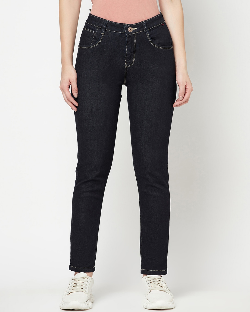


 Products that inspired by your selected product!:


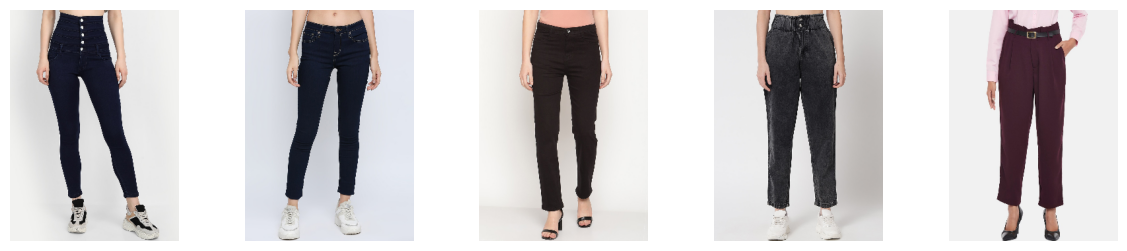

In [22]:
# Take user input for a specific image and get recommended products
name = input("Please enter the name of the image: ")

ImagePath = [name]
ImagePath_ = [('/content/Images/Images/'+name)]

indices_ = FRS(ImagePath)
Recomended_Products(indices_[0],ImagePath_)

# Prepared By:

> Layal Halwani , ID: 2007896

> Afnan Algogandi, ID: 2007926

> Lara Alhussain, ID: 2009032

> Shahd Alharbi, ID: 2005527

> Section: AI/AL